In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [184]:
df = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_ps_sps.csv', index_col=0)
dff = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_ps_sps.csv', index_col=0)
dff

travel time   distance  hour of day  living_street  motorway  \
0            1562  19784.000           17            0.0       0.0   
1            1247  18663.286           23            0.0       0.0   
2             823  11453.273            6            0.0       0.0   
3            1066  14463.104           14            0.0       0.0   
4             665  10011.876           17            0.0       0.0   
...           ...        ...          ...            ...       ...   
7608          945  15008.896           18            0.0       0.0   
7609          935  13358.373           10            0.0       0.0   
7610         1122  13258.039           16            0.0       0.0   
7611         1285  22855.665           19            0.0       0.0   
7612          499   6495.842           20            0.0       0.0   

      motorway_link    primary  primary_link  residential  road  secondary  \
0               0.0  17778.401       396.576        0.000   0.0       0.00   
1               0.0  16453.699       601.240      702.134   0.0       0.00   
2               0.0   9565.882       384.698       81.136   0.0       0.00   
3               0.0  10057.793       152.983      270.947   0.0       0.00   
4               0.0   8304.143         0.000     1033.862   0.0       0.00   
...             ...        ...           ...          ...   ...        ...   
7608            0.0   8979.961         0.000      901.487   0.0       0.00   
7609            0.0  11132.470       670.917     1068.480   0.0       0.00   
7610            0.0   9557.675       440.601     2237.822   0.0       0.00   
7611            0.0  18316.769         0.000      824.585   0.0     759.01   
7612            0.0   2166.255         0.000     1180.001   0.0       0.00   

      secondary_link  service  tertiary  track  trunk  trunk_link  \
0                0.0    0.000   893.382    0.0    0.0         0.0   
1                0.0    0.000   906.213    0.0    0.0         0.0   
2                0.0  188.852  1130.185    0.0    0.0         0.0   
3                0.0  381.502  3556.950    0.0    0.0         0.0   
4                0.0    0.000   673.871    0.0    0.0         0.0   
...              ...      ...       ...    ...    ...         ...   
7608             0.0    0.000  5127.448    0.0    0.0         0.0   
7609             0.0    0.000   486.506    0.0    0.0         0.0   
7610             0.0  148.002   873.939    0.0    0.0         0.0   
7611             0.0   49.571  2905.730    0.0    0.0         0.0   
7612             0.0    0.000  3149.586    0.0    0.0         0.0   

      unclassified  others  
0          715.641     0.0  
1            0.000     0.0  
2          102.520     0.0  
3           42.929     0.0  
4            0.000     0.0  
...            ...     ...  
7608         0.000     0.0  
7609         0.000     0.0  
7610         0.000     0.0  
7611         0.000     0.0  
7612         0.000     0.0  

[7613 rows x 19 columns]

In [185]:
df

travel time   distance  hour of day 1st ranked   2nd ranked  \
0            1562  19784.000           17    primary     tertiary   
1            1247  18663.286           23    primary     tertiary   
2             823  11453.273            6    primary     tertiary   
3            1066  14463.104           14    primary     tertiary   
4             665  10011.876           17    primary  residential   
...           ...        ...          ...        ...          ...   
7608          945  15008.896           18    primary     tertiary   
7609          935  13358.373           10    primary  residential   
7610         1122  13258.039           16    primary  residential   
7611         1285  22855.665           19    primary     tertiary   
7612          499   6495.842           20   tertiary      primary   

        3rd ranked     4d ranked    5th ranked    6th ranked  1st dist  \
0     unclassified  primary_link           NaN           NaN  0.898625   
1      residential  primary_link           NaN           NaN  0.881608   
2     primary_link       service  unclassified   residential  0.835209   
3          service   residential  primary_link  unclassified  0.695410   
4         tertiary           NaN           NaN           NaN  0.829429   
...            ...           ...           ...           ...       ...   
7608   residential           NaN           NaN           NaN  0.598309   
7609  primary_link      tertiary           NaN           NaN  0.833370   
7610      tertiary  primary_link       service           NaN  0.720897   
7611   residential     secondary       service           NaN  0.801410   
7612   residential           NaN           NaN           NaN  0.484862   

      2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0     0.045157  0.036173  0.020045       NaN       NaN  
1     0.048556  0.037621  0.032215       NaN       NaN  
2     0.098678  0.033588  0.016489  0.008951  0.007084  
3     0.245933  0.026378  0.018734  0.010577  0.002968  
4     0.103264  0.067307       NaN       NaN       NaN  
...        ...       ...       ...       ...       ...  
7608  0.341627  0.060064       NaN       NaN       NaN  
7609  0.079986  0.050224  0.036420       NaN       NaN  
7610  0.168790  0.065918  0.033233  0.011163       NaN  
7611  0.127134  0.036078  0.033209  0.002169       NaN  
7612  0.333483  0.181655       NaN       NaN       NaN  

[7613 rows x 15 columns]

In [4]:
dff.loc[(dff['travel time']==536) & (dff['distance']==9008.779)]
dff.loc[(dff['travel time']==1038) & (dff['distance']==17838.624)]

Empty DataFrame
Columns: [travel time, distance, hour of day, living_street, motorway, motorway_link, primary, primary_link, residential, road, secondary, secondary_link, service, tertiary, track, trunk, trunk_link, unclassified, others]
Index: []

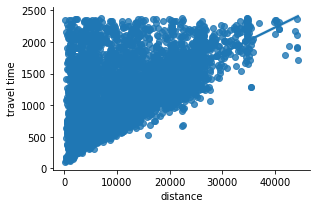

In [5]:
sns.lmplot(x='distance',y='travel time',data=df, height=3, aspect=1.5)

### Outlier removal

In [6]:
# If you have multiple columns in your dataframe and would like to
# remove all rows that have outliers in at least one column,
# the following expression would do that in one shot.
from scipy import stats
df = df[(np.abs(stats.zscore(df['distance'])) < 3)]


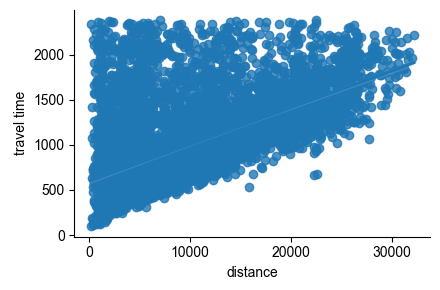

In [7]:
sns.lmplot(x='distance',y='travel time',data=df, height=3, aspect=1.5)
sns.set(rc={"figure.figsize":(10, 10)}) #width=1, #height=2

In [8]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df['distance']-df['distance'].min())/(df['distance'].max()-df['distance'].min())
normalized_distance22=(dff['distance']-dff['distance'].min())/(dff['distance'].max()-dff['distance'].min())
# normalized_distance2
# from sklearn.preprocessing import StandardScaler
# x = breast_dataset.loc[:, features].values
# x = StandardScaler().fit_transform(x) # normalizing the features

In [9]:
df['distance'] = normalized_distance2
dff['distance'] = normalized_distance22

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [11]:
df['hr_sin'] = np.sin(df['hour of day']*(2.*np.pi/24))
df['hr_cos'] = np.cos(df['hour of day']*(2.*np.pi/24))
df = df.iloc[:,[0,1,2,15,16,3,4,5,6,7,8,9,10,11,12,13,14]] # change the column order to put "hr_sin" beside the "hour of day"
df.head(4)
df

travel time  distance  hour of day    hr_sin        hr_cos 1st ranked  \
0            1562  0.612791           17 -0.965926 -2.588190e-01    primary   
1            1247  0.577763           23 -0.258819  9.659258e-01    primary   
2             823  0.352414            6  1.000000  6.123234e-17    primary   
3            1066  0.446486           14 -0.500000 -8.660254e-01    primary   
4             665  0.307363           17 -0.965926 -2.588190e-01    primary   
...           ...       ...          ...       ...           ...        ...   
7608          945  0.463545           18 -1.000000 -1.836970e-16    primary   
7609          935  0.411958           10  0.500000 -8.660254e-01    primary   
7610         1122  0.408822           16 -0.866025 -5.000000e-01    primary   
7611         1285  0.708796           19 -0.965926  2.588190e-01    primary   
7612          499  0.197469           20 -0.866025  5.000000e-01   tertiary   

       2nd ranked    3rd ranked     4d ranked    5th ranked    6th ranked  \
0        tertiary  unclassified  primary_link           NaN           NaN   
1        tertiary   residential  primary_link           NaN           NaN   
2        tertiary  primary_link       service  unclassified   residential   
3        tertiary       service   residential  primary_link  unclassified   
4     residential      tertiary           NaN           NaN           NaN   
...           ...           ...           ...           ...           ...   
7608     tertiary   residential           NaN           NaN           NaN   
7609  residential  primary_link      tertiary           NaN           NaN   
7610  residential      tertiary  primary_link       service           NaN   
7611     tertiary   residential     secondary       service           NaN   
7612      primary   residential           NaN           NaN           NaN   

      1st dist  2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0     0.898625  0.045157  0.036173  0.020045       NaN       NaN  
1     0.881608  0.048556  0.037621  0.032215       NaN       NaN  
2     0.835209  0.098678  0.033588  0.016489  0.008951  0.007084  
3     0.695410  0.245933  0.026378  0.018734  0.010577  0.002968  
4     0.829429  0.103264  0.067307       NaN       NaN       NaN  
...        ...       ...       ...       ...       ...       ...  
7608  0.598309  0.341627  0.060064       NaN       NaN       NaN  
7609  0.833370  0.079986  0.050224  0.036420       NaN       NaN  
7610  0.720897  0.168790  0.065918  0.033233  0.011163       NaN  
7611  0.801410  0.127134  0.036078  0.033209  0.002169       NaN  
7612  0.484862  0.333483  0.181655       NaN       NaN       NaN  

[7527 rows x 17 columns]

In [12]:
# fix random seed for reproducibility
#The specific seed value does not matter as long as it stays the same for each run of your code, it could be 1,2,3,...
np.random.seed(7)

In [13]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))
    print('minimum training RMSE: ',min(history.history['rmse'])/60)
    print('minimum training MAPE: ',min(history.history['mape'])/100)
    print('-----------------')    
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [14]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0))
    print('minimum training RMSE: ',min(history.history['rmse'])/60)
    print('minimum training MAPE: ',min(history.history['mape'])/100)
    print('-----------------')    
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [15]:
def plotme(model):

    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend()
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [16]:
my_df = df[['distance','travel time']]
my_df.head(3)

distance  travel time
0  0.612791         1562
1  0.577763         1247
2  0.352414          823

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

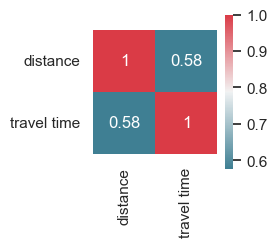

In [17]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(2,2))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [18]:
x = np.array(df[['distance']])
y = np.array(df['travel time'])
# x

In [19]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6021, 1)
(1506, 1)


In [23]:
import math

In [25]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=500)
model1_1

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1252819.7500 - mape: 99.9528 - rmse: 1119.2943 - val_loss: 1220960.8750 - val_mape: 99.9132 - val_rmse: 1104.9709
Epoch 2/500
189/189 [==============================] - 0s 766us/step - loss: 1251131.6250 - mape: 99.8585 - rmse: 1118.5399 - val_loss: 1218850.6250 - val_mape: 99.7917 - val_rmse: 1104.0156
Epoch 3/500
189/189 [==============================] - 0s 782us/step - loss: 1248520.5000 - mape: 99.7113 - rmse: 1117.3722 - val_loss: 1215776.5000 - val_mape: 99.6153 - val_rmse: 1102.6226
Epoch 4/500
189/189 [==============================] - 0s 695us/step - loss: 1244509.3750 - mape: 99.4876 - rmse: 1115.5758 - val_loss: 1210786.8750 - val_mape: 99.3290 - val_rmse: 1100.3577
Epoch 5/500
189/189 [==============================] - 0s 739us/step - loss: 1238530.3750 - mape: 99.1529 - rmse: 1112.8928 - val_loss: 1204158.3750 - val_mape: 98.9463 - val_rmse: 1097.3416
Epoch 6/500
189/189 [==========================

Epoch 88/500
189/189 [==============================] - 0s 713us/step - loss: 164821.8281 - mape: 38.5947 - rmse: 405.9825 - val_loss: 164940.6562 - val_mape: 38.6696 - val_rmse: 406.1289
Epoch 89/500
189/189 [==============================] - 0s 720us/step - loss: 164562.4375 - mape: 38.7405 - rmse: 405.6630 - val_loss: 164765.8594 - val_mape: 38.7953 - val_rmse: 405.9136
Epoch 90/500
189/189 [==============================] - 0s 776us/step - loss: 164322.6875 - mape: 38.8448 - rmse: 405.3673 - val_loss: 164593.6719 - val_mape: 38.8914 - val_rmse: 405.7014
Epoch 91/500
189/189 [==============================] - 0s 765us/step - loss: 164100.3438 - mape: 38.8976 - rmse: 405.0930 - val_loss: 164431.8125 - val_mape: 39.0014 - val_rmse: 405.5019
Epoch 92/500
189/189 [==============================] - 0s 735us/step - loss: 163894.1875 - mape: 39.0180 - rmse: 404.8385 - val_loss: 164262.0938 - val_mape: 39.0433 - val_rmse: 405.2926
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 742us/step - loss: 154807.8750 - mape: 35.4957 - rmse: 393.4563 - val_loss: 155175.9375 - val_mape: 35.5226 - val_rmse: 393.9238
Epoch 175/500
189/189 [==============================] - 0s 765us/step - loss: 154767.6406 - mape: 35.4778 - rmse: 393.4052 - val_loss: 155141.5312 - val_mape: 35.5073 - val_rmse: 393.8801
Epoch 176/500
189/189 [==============================] - 0s 711us/step - loss: 154733.0938 - mape: 35.4017 - rmse: 393.3613 - val_loss: 155101.5625 - val_mape: 35.4717 - val_rmse: 393.8293
Epoch 177/500
189/189 [==============================] - 0s 730us/step - loss: 154698.4219 - mape: 35.4517 - rmse: 393.3172 - val_loss: 155067.2656 - val_mape: 35.4514 - val_rmse: 393.7858
Epoch 178/500
189/189 [==============================] - 0s 759us/step - loss: 154666.1562 - mape: 35.4065 - rmse: 393.2762 - val_loss: 155027.4375 - val_mape: 35.4072 - val_rmse: 393.7352
Epoch 179/500
189/189 [==============================] - 0s 822us/ste

189/189 [==============================] - 0s 694us/step - loss: 153672.0938 - mape: 34.0353 - rmse: 392.0103 - val_loss: 153909.4844 - val_mape: 34.1323 - val_rmse: 392.3130
Epoch 261/500
189/189 [==============================] - 0s 780us/step - loss: 153666.6719 - mape: 34.1054 - rmse: 392.0034 - val_loss: 153912.9531 - val_mape: 34.1480 - val_rmse: 392.3174
Epoch 262/500
189/189 [==============================] - 0s 757us/step - loss: 153661.6562 - mape: 34.0849 - rmse: 391.9970 - val_loss: 153901.4688 - val_mape: 34.1144 - val_rmse: 392.3028
Epoch 263/500
189/189 [==============================] - 0s 688us/step - loss: 153661.9844 - mape: 34.1058 - rmse: 391.9974 - val_loss: 153898.1406 - val_mape: 34.1078 - val_rmse: 392.2985
Epoch 264/500
189/189 [==============================] - 0s 674us/step - loss: 153656.9688 - mape: 34.0348 - rmse: 391.9910 - val_loss: 153899.7969 - val_mape: 34.1170 - val_rmse: 392.3007
Epoch 265/500
189/189 [==============================] - 0s 789us/ste

189/189 [==============================] - 0s 755us/step - loss: 153583.2031 - mape: 33.6970 - rmse: 391.8969 - val_loss: 153780.8906 - val_mape: 33.7607 - val_rmse: 392.1491
Epoch 347/500
189/189 [==============================] - 0s 792us/step - loss: 153586.6562 - mape: 33.6993 - rmse: 391.9013 - val_loss: 153781.1875 - val_mape: 33.7608 - val_rmse: 392.1494
Epoch 348/500
189/189 [==============================] - 0s 747us/step - loss: 153586.4844 - mape: 33.8033 - rmse: 391.9011 - val_loss: 153786.8438 - val_mape: 33.7791 - val_rmse: 392.1566
Epoch 349/500
189/189 [==============================] - 0s 752us/step - loss: 153590.2031 - mape: 33.6996 - rmse: 391.9059 - val_loss: 153794.0000 - val_mape: 33.8016 - val_rmse: 392.1658
Epoch 350/500
189/189 [==============================] - 0s 760us/step - loss: 153584.6094 - mape: 33.7632 - rmse: 391.8987 - val_loss: 153797.7812 - val_mape: 33.8137 - val_rmse: 392.1706
Epoch 351/500
189/189 [==============================] - 0s 755us/ste

189/189 [==============================] - 0s 761us/step - loss: 153584.6562 - mape: 33.5930 - rmse: 391.8988 - val_loss: 153759.1562 - val_mape: 33.6524 - val_rmse: 392.1214
Epoch 433/500
189/189 [==============================] - 0s 745us/step - loss: 153582.9062 - mape: 33.5610 - rmse: 391.8965 - val_loss: 153758.6719 - val_mape: 33.6509 - val_rmse: 392.1207
Epoch 434/500
189/189 [==============================] - 0s 720us/step - loss: 153579.5000 - mape: 33.6395 - rmse: 391.8922 - val_loss: 153752.5000 - val_mape: 33.6287 - val_rmse: 392.1129
Epoch 435/500
189/189 [==============================] - 0s 734us/step - loss: 153578.2344 - mape: 33.6003 - rmse: 391.8906 - val_loss: 153760.0938 - val_mape: 33.6548 - val_rmse: 392.1226
Epoch 436/500
189/189 [==============================] - 0s 773us/step - loss: 153587.4844 - mape: 33.5464 - rmse: 391.9024 - val_loss: 153761.9062 - val_mape: 33.6615 - val_rmse: 392.1248
Epoch 437/500
189/189 [==============================] - 0s 750us/ste

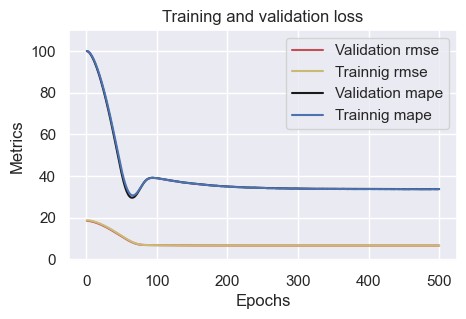

In [26]:
plotme(model1_1)

In [27]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model1_2

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1252461.3750 - mape: 99.9330 - rmse: 1119.1342 - val_loss: 1220030.2500 - val_mape: 99.8615 - val_rmse: 1104.5498
Epoch 2/500
189/189 [==============================] - 0s 744us/step - loss: 1249178.3750 - mape: 99.7530 - rmse: 1117.6665 - val_loss: 1215709.5000 - val_mape: 99.6154 - val_rmse: 1102.5922
Epoch 3/500
189/189 [==============================] - 0s 746us/step - loss: 1243638.5000 - mape: 99.4417 - rmse: 1115.1854 - val_loss: 1209123.6250 - val_mape: 99.2371 - val_rmse: 1099.6016
Epoch 4/500
189/189 [==============================] - 0s 744us/step - loss: 1235828.1250 - mape: 99.0019 - rmse: 1111.6781 - val_loss: 1200353.3750 - val_mape: 98.7301 - val_rmse: 1095.6064
Epoch 5/500
189/189 [==============================] - 0s 739us/step - loss: 1225842.7500 - mape: 98.4428 - rmse: 1107.1779 - val_loss: 1189514.7500 - val_mape: 98.0997 - val_rmse: 1090.6488
Epoch 6/500
189/189 [==========================

Epoch 88/500
189/189 [==============================] - 0s 790us/step - loss: 158645.2344 - mape: 37.5837 - rmse: 398.3029 - val_loss: 159108.3750 - val_mape: 37.6245 - val_rmse: 398.8839
Epoch 89/500
189/189 [==============================] - 0s 743us/step - loss: 158475.1875 - mape: 37.4371 - rmse: 398.0894 - val_loss: 158922.7344 - val_mape: 37.5324 - val_rmse: 398.6512
Epoch 90/500
189/189 [==============================] - 0s 740us/step - loss: 158300.8281 - mape: 37.4946 - rmse: 397.8704 - val_loss: 158765.6250 - val_mape: 37.5003 - val_rmse: 398.4540
Epoch 91/500
189/189 [==============================] - 0s 760us/step - loss: 158133.2344 - mape: 37.3525 - rmse: 397.6597 - val_loss: 158598.7031 - val_mape: 37.4388 - val_rmse: 398.2445
Epoch 92/500
189/189 [==============================] - 0s 738us/step - loss: 157965.8906 - mape: 37.3235 - rmse: 397.4492 - val_loss: 158410.7656 - val_mape: 37.3025 - val_rmse: 398.0085
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 756us/step - loss: 153726.9688 - mape: 34.1784 - rmse: 392.0803 - val_loss: 153973.9688 - val_mape: 34.2517 - val_rmse: 392.3952
Epoch 175/500
189/189 [==============================] - 0s 735us/step - loss: 153722.3906 - mape: 34.1708 - rmse: 392.0745 - val_loss: 153974.1719 - val_mape: 34.2642 - val_rmse: 392.3954
Epoch 176/500
189/189 [==============================] - 0s 745us/step - loss: 153721.7656 - mape: 34.1947 - rmse: 392.0737 - val_loss: 153980.5469 - val_mape: 34.2933 - val_rmse: 392.4036
Epoch 177/500
189/189 [==============================] - 0s 744us/step - loss: 153710.9219 - mape: 34.2075 - rmse: 392.0598 - val_loss: 153966.2500 - val_mape: 34.2575 - val_rmse: 392.3853
Epoch 178/500
189/189 [==============================] - 0s 761us/step - loss: 153708.9688 - mape: 34.1970 - rmse: 392.0573 - val_loss: 153949.8281 - val_mape: 34.2138 - val_rmse: 392.3644
Epoch 179/500
189/189 [==============================] - 0s 728us/ste

189/189 [==============================] - 0s 750us/step - loss: 153586.3594 - mape: 33.7084 - rmse: 391.9010 - val_loss: 153778.4062 - val_mape: 33.7392 - val_rmse: 392.1459
Epoch 261/500
189/189 [==============================] - 0s 773us/step - loss: 153587.1094 - mape: 33.6739 - rmse: 391.9019 - val_loss: 153788.5000 - val_mape: 33.7710 - val_rmse: 392.1588
Epoch 262/500
189/189 [==============================] - 0s 780us/step - loss: 153586.7031 - mape: 33.6834 - rmse: 391.9014 - val_loss: 153785.4219 - val_mape: 33.7612 - val_rmse: 392.1548
Epoch 263/500
189/189 [==============================] - 0s 748us/step - loss: 153584.6094 - mape: 33.7026 - rmse: 391.8987 - val_loss: 153776.8125 - val_mape: 33.7321 - val_rmse: 392.1439
Epoch 264/500
189/189 [==============================] - 0s 760us/step - loss: 153584.6406 - mape: 33.6755 - rmse: 391.8988 - val_loss: 153770.5781 - val_mape: 33.7113 - val_rmse: 392.1359
Epoch 265/500
189/189 [==============================] - 0s 778us/ste

189/189 [==============================] - 0s 728us/step - loss: 153578.4531 - mape: 33.6318 - rmse: 391.8909 - val_loss: 153749.9375 - val_mape: 33.6118 - val_rmse: 392.1096
Epoch 347/500
189/189 [==============================] - 0s 735us/step - loss: 153582.5000 - mape: 33.5572 - rmse: 391.8960 - val_loss: 153746.0312 - val_mape: 33.5972 - val_rmse: 392.1046
Epoch 348/500
189/189 [==============================] - 0s 745us/step - loss: 153588.2500 - mape: 33.5135 - rmse: 391.9034 - val_loss: 153754.6719 - val_mape: 33.6284 - val_rmse: 392.1156
Epoch 349/500
189/189 [==============================] - 0s 746us/step - loss: 153581.0938 - mape: 33.6360 - rmse: 391.8942 - val_loss: 153763.1562 - val_mape: 33.6560 - val_rmse: 392.1265
Epoch 350/500
189/189 [==============================] - 0s 742us/step - loss: 153586.2031 - mape: 33.6230 - rmse: 391.9008 - val_loss: 153749.8750 - val_mape: 33.6103 - val_rmse: 392.1095
Epoch 351/500
189/189 [==============================] - 0s 759us/ste

189/189 [==============================] - 0s 732us/step - loss: 153587.1562 - mape: 33.6714 - rmse: 391.9020 - val_loss: 153758.3750 - val_mape: 33.6382 - val_rmse: 392.1204
Epoch 433/500
189/189 [==============================] - 0s 747us/step - loss: 153586.1875 - mape: 33.6411 - rmse: 391.9007 - val_loss: 153765.6875 - val_mape: 33.6623 - val_rmse: 392.1297
Epoch 434/500
189/189 [==============================] - 0s 772us/step - loss: 153584.9688 - mape: 33.5410 - rmse: 391.8992 - val_loss: 153753.5469 - val_mape: 33.6210 - val_rmse: 392.1142
Epoch 435/500
189/189 [==============================] - 0s 762us/step - loss: 153579.7344 - mape: 33.5245 - rmse: 391.8925 - val_loss: 153753.4531 - val_mape: 33.6215 - val_rmse: 392.1141
Epoch 436/500
189/189 [==============================] - 0s 735us/step - loss: 153582.8906 - mape: 33.5668 - rmse: 391.8965 - val_loss: 153762.1719 - val_mape: 33.6507 - val_rmse: 392.1252
Epoch 437/500
189/189 [==============================] - 0s 734us/ste

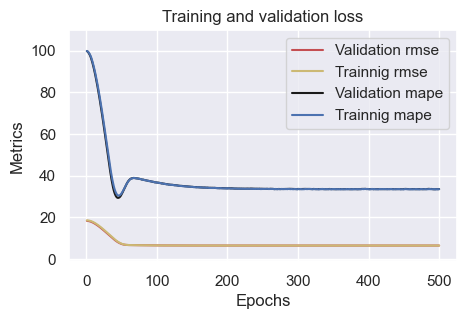

In [28]:
plotme(model1_2)

In [29]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=500)
model1_3

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1252545.0000 - mape: 99.9352 - rmse: 1119.1715 - val_loss: 1219806.6250 - val_mape: 99.8461 - val_rmse: 1104.4486
Epoch 2/500
189/189 [==============================] - 0s 760us/step - loss: 1248351.7500 - mape: 99.7035 - rmse: 1117.2966 - val_loss: 1214105.5000 - val_mape: 99.5202 - val_rmse: 1101.8645
Epoch 3/500
189/189 [==============================] - 0s 735us/step - loss: 1240896.3750 - mape: 99.2865 - rmse: 1113.9553 - val_loss: 1205141.0000 - val_mape: 99.0033 - val_rmse: 1097.7892
Epoch 4/500
189/189 [==============================] - 0s 748us/step - loss: 1230186.8750 - mape: 98.6842 - rmse: 1109.1379 - val_loss: 1193092.3750 - val_mape: 98.3037 - val_rmse: 1092.2877
Epoch 5/500
189/189 [==============================] - 0s 785us/step - loss: 1216524.0000 - mape: 97.9019 - rmse: 1102.9614 - val_loss: 1178274.8750 - val_mape: 97.4365 - val_rmse: 1085.4838
Epoch 6/500
189/189 [==========================

Epoch 88/500
189/189 [==============================] - 0s 729us/step - loss: 157565.8906 - mape: 37.0999 - rmse: 396.9457 - val_loss: 158021.0469 - val_mape: 37.1966 - val_rmse: 397.5186
Epoch 89/500
189/189 [==============================] - 0s 752us/step - loss: 157408.0469 - mape: 37.0648 - rmse: 396.7468 - val_loss: 157865.7500 - val_mape: 37.1351 - val_rmse: 397.3232
Epoch 90/500
189/189 [==============================] - 0s 747us/step - loss: 157251.4062 - mape: 37.0069 - rmse: 396.5494 - val_loss: 157699.1250 - val_mape: 37.0370 - val_rmse: 397.1135
Epoch 91/500
189/189 [==============================] - 0s 768us/step - loss: 157100.2812 - mape: 36.9575 - rmse: 396.3588 - val_loss: 157535.5938 - val_mape: 36.9315 - val_rmse: 396.9075
Epoch 92/500
189/189 [==============================] - 0s 761us/step - loss: 156964.2500 - mape: 36.8459 - rmse: 396.1871 - val_loss: 157396.3906 - val_mape: 36.8780 - val_rmse: 396.7321
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 744us/step - loss: 153658.4688 - mape: 34.0359 - rmse: 391.9930 - val_loss: 153879.9844 - val_mape: 34.0574 - val_rmse: 392.2754
Epoch 175/500
189/189 [==============================] - 0s 751us/step - loss: 153652.0469 - mape: 33.9994 - rmse: 391.9847 - val_loss: 153859.3438 - val_mape: 33.9896 - val_rmse: 392.2491
Epoch 176/500
189/189 [==============================] - 0s 746us/step - loss: 153648.4375 - mape: 33.9829 - rmse: 391.9802 - val_loss: 153863.9688 - val_mape: 34.0136 - val_rmse: 392.2550
Epoch 177/500
189/189 [==============================] - 0s 768us/step - loss: 153649.6250 - mape: 34.0076 - rmse: 391.9817 - val_loss: 153871.0156 - val_mape: 34.0429 - val_rmse: 392.2639
Epoch 178/500
189/189 [==============================] - 0s 753us/step - loss: 153641.9688 - mape: 33.9623 - rmse: 391.9719 - val_loss: 153879.1875 - val_mape: 34.0738 - val_rmse: 392.2744
Epoch 179/500
189/189 [==============================] - 0s 787us/ste

189/189 [==============================] - 0s 779us/step - loss: 153583.4219 - mape: 33.6499 - rmse: 391.8972 - val_loss: 153764.0156 - val_mape: 33.6785 - val_rmse: 392.1276
Epoch 261/500
189/189 [==============================] - 0s 737us/step - loss: 153583.3281 - mape: 33.6126 - rmse: 391.8971 - val_loss: 153780.4531 - val_mape: 33.7339 - val_rmse: 392.1485
Epoch 262/500
189/189 [==============================] - 0s 737us/step - loss: 153584.7344 - mape: 33.6796 - rmse: 391.8989 - val_loss: 153762.9219 - val_mape: 33.6749 - val_rmse: 392.1262
Epoch 263/500
189/189 [==============================] - 0s 740us/step - loss: 153584.8594 - mape: 33.6416 - rmse: 391.8990 - val_loss: 153781.1875 - val_mape: 33.7345 - val_rmse: 392.1494
Epoch 264/500
189/189 [==============================] - 0s 741us/step - loss: 153584.0312 - mape: 33.6576 - rmse: 391.8980 - val_loss: 153774.0938 - val_mape: 33.7125 - val_rmse: 392.1404
Epoch 265/500
189/189 [==============================] - 0s 741us/ste

189/189 [==============================] - 0s 714us/step - loss: 153584.9062 - mape: 33.6221 - rmse: 391.8991 - val_loss: 153746.2031 - val_mape: 33.5898 - val_rmse: 392.1048
Epoch 347/500
189/189 [==============================] - 0s 744us/step - loss: 153585.0156 - mape: 33.6491 - rmse: 391.8992 - val_loss: 153760.5625 - val_mape: 33.6411 - val_rmse: 392.1231
Epoch 348/500
189/189 [==============================] - 0s 740us/step - loss: 153583.8281 - mape: 33.5026 - rmse: 391.8977 - val_loss: 153759.4375 - val_mape: 33.6380 - val_rmse: 392.1217
Epoch 349/500
189/189 [==============================] - 0s 750us/step - loss: 153582.4844 - mape: 33.5659 - rmse: 391.8960 - val_loss: 153782.9062 - val_mape: 33.7117 - val_rmse: 392.1516
Epoch 350/500
189/189 [==============================] - 0s 773us/step - loss: 153589.3125 - mape: 33.6589 - rmse: 391.9047 - val_loss: 153787.1250 - val_mape: 33.7249 - val_rmse: 392.1570
Epoch 351/500
189/189 [==============================] - 0s 772us/ste

189/189 [==============================] - 0s 737us/step - loss: 153584.2500 - mape: 33.6148 - rmse: 391.8983 - val_loss: 153745.5312 - val_mape: 33.5901 - val_rmse: 392.1040
Epoch 433/500
189/189 [==============================] - 0s 745us/step - loss: 153583.8281 - mape: 33.6483 - rmse: 391.8977 - val_loss: 153743.1875 - val_mape: 33.5819 - val_rmse: 392.1010
Epoch 434/500
189/189 [==============================] - 0s 734us/step - loss: 153582.3281 - mape: 33.5215 - rmse: 391.8958 - val_loss: 153735.1719 - val_mape: 33.5515 - val_rmse: 392.0908
Epoch 435/500
189/189 [==============================] - 0s 746us/step - loss: 153584.6719 - mape: 33.5446 - rmse: 391.8988 - val_loss: 153743.9688 - val_mape: 33.5850 - val_rmse: 392.1020
Epoch 436/500
189/189 [==============================] - 0s 739us/step - loss: 153587.7031 - mape: 33.5232 - rmse: 391.9027 - val_loss: 153732.8594 - val_mape: 33.5414 - val_rmse: 392.0878
Epoch 437/500
189/189 [==============================] - 0s 731us/ste

In [30]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model1_4

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1253115.5000 - mape: 99.9625 - rmse: 1119.4264 - val_loss: 1220886.2500 - val_mape: 99.9015 - val_rmse: 1104.9373
Epoch 2/500
189/189 [==============================] - 0s 767us/step - loss: 1249015.7500 - mape: 99.7332 - rmse: 1117.5938 - val_loss: 1213394.6250 - val_mape: 99.4682 - val_rmse: 1101.5419
Epoch 3/500
189/189 [==============================] - 0s 765us/step - loss: 1236166.3750 - mape: 99.0080 - rmse: 1111.8302 - val_loss: 1194821.0000 - val_mape: 98.3887 - val_rmse: 1093.0787
Epoch 4/500
189/189 [==============================] - 0s 787us/step - loss: 1209285.6250 - mape: 97.4839 - rmse: 1099.6753 - val_loss: 1158477.5000 - val_mape: 96.2591 - val_rmse: 1076.3259
Epoch 5/500
189/189 [==============================] - 0s 767us/step - loss: 1160338.0000 - mape: 94.6360 - rmse: 1077.1898 - val_loss: 1098762.5000 - val_mape: 92.6656 - val_rmse: 1048.2188
Epoch 6/500
189/189 [==========================

Epoch 88/500
189/189 [==============================] - 0s 772us/step - loss: 153618.5625 - mape: 33.8155 - rmse: 391.9420 - val_loss: 153720.1094 - val_mape: 33.4860 - val_rmse: 392.0716
Epoch 89/500
189/189 [==============================] - 0s 765us/step - loss: 153615.7500 - mape: 33.6657 - rmse: 391.9384 - val_loss: 153749.5469 - val_mape: 33.6471 - val_rmse: 392.1091
Epoch 90/500
189/189 [==============================] - 0s 766us/step - loss: 153627.4531 - mape: 33.5972 - rmse: 391.9534 - val_loss: 153842.9219 - val_mape: 33.9572 - val_rmse: 392.2281
Epoch 91/500
189/189 [==============================] - 0s 759us/step - loss: 153612.3125 - mape: 33.8947 - rmse: 391.9341 - val_loss: 153768.1094 - val_mape: 33.7219 - val_rmse: 392.1328
Epoch 92/500
189/189 [==============================] - 0s 769us/step - loss: 153612.6562 - mape: 33.6024 - rmse: 391.9345 - val_loss: 153866.3125 - val_mape: 34.0123 - val_rmse: 392.2580
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 760us/step - loss: 153600.6094 - mape: 33.3724 - rmse: 391.9191 - val_loss: 153886.0781 - val_mape: 33.9768 - val_rmse: 392.2832
Epoch 175/500
189/189 [==============================] - 0s 764us/step - loss: 153646.5000 - mape: 33.9567 - rmse: 391.9777 - val_loss: 153688.4219 - val_mape: 33.3300 - val_rmse: 392.0312
Epoch 176/500
189/189 [==============================] - 0s 771us/step - loss: 153603.6094 - mape: 33.4845 - rmse: 391.9230 - val_loss: 153737.2812 - val_mape: 33.5560 - val_rmse: 392.0934
Epoch 177/500
189/189 [==============================] - 0s 781us/step - loss: 153613.9062 - mape: 33.5872 - rmse: 391.9361 - val_loss: 153776.4219 - val_mape: 33.6915 - val_rmse: 392.1434
Epoch 178/500
189/189 [==============================] - 0s 761us/step - loss: 153620.1250 - mape: 33.5440 - rmse: 391.9440 - val_loss: 153749.4062 - val_mape: 33.5977 - val_rmse: 392.1089
Epoch 179/500
189/189 [==============================] - 0s 756us/ste

189/189 [==============================] - 0s 756us/step - loss: 153602.3125 - mape: 33.7108 - rmse: 391.9213 - val_loss: 153766.7656 - val_mape: 33.6636 - val_rmse: 392.1310
Epoch 261/500
189/189 [==============================] - 0s 773us/step - loss: 153604.6875 - mape: 33.5683 - rmse: 391.9243 - val_loss: 153754.4375 - val_mape: 33.6233 - val_rmse: 392.1153
Epoch 262/500
189/189 [==============================] - 0s 812us/step - loss: 153601.9375 - mape: 33.6498 - rmse: 391.9208 - val_loss: 153785.2812 - val_mape: 33.7258 - val_rmse: 392.1547
Epoch 263/500
189/189 [==============================] - 0s 765us/step - loss: 153599.3281 - mape: 33.6457 - rmse: 391.9175 - val_loss: 153787.4688 - val_mape: 33.7342 - val_rmse: 392.1574
Epoch 264/500
189/189 [==============================] - 0s 781us/step - loss: 153592.2344 - mape: 33.5274 - rmse: 391.9084 - val_loss: 153788.2344 - val_mape: 33.7327 - val_rmse: 392.1584
Epoch 265/500
189/189 [==============================] - 0s 761us/ste

189/189 [==============================] - 0s 784us/step - loss: 153586.3594 - mape: 33.5987 - rmse: 391.9010 - val_loss: 153782.5625 - val_mape: 33.7116 - val_rmse: 392.1512
Epoch 347/500
189/189 [==============================] - 0s 777us/step - loss: 153595.8594 - mape: 33.5341 - rmse: 391.9131 - val_loss: 153809.8125 - val_mape: 33.7957 - val_rmse: 392.1859
Epoch 348/500
189/189 [==============================] - 0s 770us/step - loss: 153608.8438 - mape: 33.5895 - rmse: 391.9296 - val_loss: 153846.2031 - val_mape: 33.8901 - val_rmse: 392.2323
Epoch 349/500
189/189 [==============================] - 0s 779us/step - loss: 153588.5781 - mape: 33.7549 - rmse: 391.9038 - val_loss: 153727.5156 - val_mape: 33.5246 - val_rmse: 392.0810
Epoch 350/500
189/189 [==============================] - 0s 761us/step - loss: 153612.5156 - mape: 33.5538 - rmse: 391.9343 - val_loss: 153761.7031 - val_mape: 33.6559 - val_rmse: 392.1246
Epoch 351/500
189/189 [==============================] - 0s 766us/ste

189/189 [==============================] - 0s 762us/step - loss: 153629.3281 - mape: 33.7086 - rmse: 391.9558 - val_loss: 153793.9375 - val_mape: 33.7423 - val_rmse: 392.1657
Epoch 433/500
189/189 [==============================] - 0s 762us/step - loss: 153594.3281 - mape: 33.8415 - rmse: 391.9111 - val_loss: 153716.5938 - val_mape: 33.4675 - val_rmse: 392.0671
Epoch 434/500
189/189 [==============================] - 0s 751us/step - loss: 153621.9219 - mape: 33.5771 - rmse: 391.9463 - val_loss: 153716.9219 - val_mape: 33.4714 - val_rmse: 392.0675
Epoch 435/500
189/189 [==============================] - 0s 754us/step - loss: 153600.9688 - mape: 33.4181 - rmse: 391.9196 - val_loss: 153788.5781 - val_mape: 33.7223 - val_rmse: 392.1589
Epoch 436/500
189/189 [==============================] - 0s 799us/step - loss: 153604.3438 - mape: 33.7301 - rmse: 391.9239 - val_loss: 153701.6562 - val_mape: 33.4008 - val_rmse: 392.0480
Epoch 437/500
189/189 [==============================] - 0s 755us/ste

In [31]:
# plotme(model1_4)

In [32]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model1_5

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1251242.7500 - mape: 99.8609 - rmse: 1118.5896 - val_loss: 1215317.3750 - val_mape: 99.5893 - val_rmse: 1102.4143
Epoch 2/500
189/189 [==============================] - 0s 773us/step - loss: 1233068.2500 - mape: 98.8376 - rmse: 1110.4360 - val_loss: 1182653.6250 - val_mape: 97.7002 - val_rmse: 1087.4988
Epoch 3/500
189/189 [==============================] - 0s 775us/step - loss: 1177367.5000 - mape: 95.6483 - rmse: 1085.0657 - val_loss: 1101132.0000 - val_mape: 92.8450 - val_rmse: 1049.3484
Epoch 4/500
189/189 [==============================] - 0s 787us/step - loss: 1062719.1250 - mape: 88.7994 - rmse: 1030.8827 - val_loss: 957282.2500 - val_mape: 83.7096 - val_rmse: 978.4080
Epoch 5/500
189/189 [==============================] - 0s 763us/step - loss: 889056.2500 - mape: 77.5358 - rmse: 942.8978 - val_loss: 765160.1250 - val_mape: 70.1539 - val_rmse: 874.7343
Epoch 6/500
189/189 [==============================] 

Epoch 88/500
189/189 [==============================] - 0s 773us/step - loss: 153611.3281 - mape: 33.4602 - rmse: 391.9328 - val_loss: 153771.0312 - val_mape: 33.6733 - val_rmse: 392.1365
Epoch 89/500
189/189 [==============================] - 0s 755us/step - loss: 153611.7500 - mape: 33.7318 - rmse: 391.9333 - val_loss: 153751.5781 - val_mape: 33.6116 - val_rmse: 392.1117
Epoch 90/500
189/189 [==============================] - 0s 773us/step - loss: 153598.4531 - mape: 33.4588 - rmse: 391.9164 - val_loss: 153863.6875 - val_mape: 33.9240 - val_rmse: 392.2546
Epoch 91/500
189/189 [==============================] - 0s 762us/step - loss: 153611.1250 - mape: 33.6140 - rmse: 391.9326 - val_loss: 153806.4531 - val_mape: 33.7836 - val_rmse: 392.1817
Epoch 92/500
189/189 [==============================] - 0s 783us/step - loss: 153632.3906 - mape: 33.6668 - rmse: 391.9597 - val_loss: 153811.1094 - val_mape: 33.7979 - val_rmse: 392.1876
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 767us/step - loss: 153635.2656 - mape: 33.5841 - rmse: 391.9633 - val_loss: 153702.0938 - val_mape: 33.4073 - val_rmse: 392.0486
Epoch 175/500
189/189 [==============================] - 0s 769us/step - loss: 153672.4531 - mape: 33.4818 - rmse: 392.0108 - val_loss: 153794.3125 - val_mape: 33.7491 - val_rmse: 392.1662
Epoch 176/500
189/189 [==============================] - 0s 825us/step - loss: 153651.7188 - mape: 33.6273 - rmse: 391.9843 - val_loss: 153828.9688 - val_mape: 33.8418 - val_rmse: 392.2104
Epoch 177/500
189/189 [==============================] - 0s 781us/step - loss: 153600.6250 - mape: 33.5913 - rmse: 391.9192 - val_loss: 153825.5469 - val_mape: 33.8326 - val_rmse: 392.2060
Epoch 178/500
189/189 [==============================] - 0s 762us/step - loss: 153612.9375 - mape: 33.3820 - rmse: 391.9349 - val_loss: 153926.0000 - val_mape: 34.0630 - val_rmse: 392.3340
Epoch 179/500
189/189 [==============================] - 0s 771us/ste

189/189 [==============================] - 0s 812us/step - loss: 153638.0156 - mape: 33.6386 - rmse: 391.9669 - val_loss: 153714.3750 - val_mape: 33.4680 - val_rmse: 392.0642
Epoch 261/500
189/189 [==============================] - 0s 784us/step - loss: 153615.9531 - mape: 33.6272 - rmse: 391.9387 - val_loss: 153752.4688 - val_mape: 33.6175 - val_rmse: 392.1128
Epoch 262/500
189/189 [==============================] - 0s 778us/step - loss: 153621.9219 - mape: 33.7530 - rmse: 391.9463 - val_loss: 153744.6250 - val_mape: 33.5849 - val_rmse: 392.1028
Epoch 263/500
189/189 [==============================] - 0s 767us/step - loss: 153610.5938 - mape: 33.3505 - rmse: 391.9319 - val_loss: 153858.9375 - val_mape: 33.9096 - val_rmse: 392.2486
Epoch 264/500
189/189 [==============================] - 0s 762us/step - loss: 153593.4375 - mape: 33.8797 - rmse: 391.9100 - val_loss: 153663.5000 - val_mape: 33.1184 - val_rmse: 391.9994
Epoch 265/500
189/189 [==============================] - 0s 767us/ste

189/189 [==============================] - 0s 768us/step - loss: 153645.5312 - mape: 33.4736 - rmse: 391.9764 - val_loss: 153752.8594 - val_mape: 33.6113 - val_rmse: 392.1133
Epoch 347/500
189/189 [==============================] - 0s 766us/step - loss: 153608.6406 - mape: 33.7433 - rmse: 391.9294 - val_loss: 153692.9531 - val_mape: 33.3538 - val_rmse: 392.0369
Epoch 348/500
189/189 [==============================] - 0s 772us/step - loss: 153634.0469 - mape: 33.3579 - rmse: 391.9618 - val_loss: 153760.5156 - val_mape: 33.6324 - val_rmse: 392.1231
Epoch 349/500
189/189 [==============================] - 0s 762us/step - loss: 153636.1562 - mape: 33.7351 - rmse: 391.9645 - val_loss: 153745.5469 - val_mape: 33.5806 - val_rmse: 392.1040
Epoch 350/500
189/189 [==============================] - 0s 761us/step - loss: 153613.3594 - mape: 33.6235 - rmse: 391.9354 - val_loss: 153745.1094 - val_mape: 33.5799 - val_rmse: 392.1035
Epoch 351/500
189/189 [==============================] - 0s 772us/ste

189/189 [==============================] - 0s 774us/step - loss: 153646.3281 - mape: 33.6049 - rmse: 391.9774 - val_loss: 153682.0938 - val_mape: 33.2904 - val_rmse: 392.0231
Epoch 433/500
189/189 [==============================] - 0s 777us/step - loss: 153591.9844 - mape: 33.3283 - rmse: 391.9081 - val_loss: 153899.9062 - val_mape: 34.0198 - val_rmse: 392.3008
Epoch 434/500
189/189 [==============================] - 0s 764us/step - loss: 153616.1719 - mape: 33.8135 - rmse: 391.9390 - val_loss: 153764.8125 - val_mape: 33.6630 - val_rmse: 392.1286
Epoch 435/500
189/189 [==============================] - 0s 764us/step - loss: 153617.5781 - mape: 33.7266 - rmse: 391.9408 - val_loss: 153710.3125 - val_mape: 33.4515 - val_rmse: 392.0591
Epoch 436/500
189/189 [==============================] - 0s 800us/step - loss: 153584.6562 - mape: 33.3156 - rmse: 391.8988 - val_loss: 153993.2969 - val_mape: 34.2043 - val_rmse: 392.4198
Epoch 437/500
189/189 [==============================] - 0s 772us/ste

In [33]:
# inputs: distance
model1_6 = nnmodel(2, num_hlayers=1,Epoch=500)
model1_6

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1253589.0000 - mape: 99.9885 - rmse: 1119.6379 - val_loss: 1222207.6250 - val_mape: 99.9766 - val_rmse: 1105.5350
Epoch 2/500
189/189 [==============================] - 0s 729us/step - loss: 1253202.1250 - mape: 99.9651 - rmse: 1119.4651 - val_loss: 1221832.6250 - val_mape: 99.9529 - val_rmse: 1105.3654
Epoch 3/500
189/189 [==============================] - 0s 740us/step - loss: 1252820.7500 - mape: 99.9415 - rmse: 1119.2948 - val_loss: 1221457.1250 - val_mape: 99.9291 - val_rmse: 1105.1956
Epoch 4/500
189/189 [==============================] - 0s 726us/step - loss: 1252440.0000 - mape: 99.9180 - rmse: 1119.1246 - val_loss: 1221082.0000 - val_mape: 99.9054 - val_rmse: 1105.0258
Epoch 5/500
189/189 [==============================] - 0s 748us/step - loss: 1252060.1250 - mape: 99.8947 - rmse: 1118.9550 - val_loss: 1220708.2500 - val_mape: 99.8817 - val_rmse: 1104.8567
Epoch 6/500
189/189 [==========================

Epoch 44/500
189/189 [==============================] - 0s 739us/step - loss: 1237281.5000 - mape: 98.9786 - rmse: 1112.3315 - val_loss: 1206152.3750 - val_mape: 98.9573 - val_rmse: 1098.2496
Epoch 45/500
189/189 [==============================] - 0s 731us/step - loss: 1236904.2500 - mape: 98.9552 - rmse: 1112.1620 - val_loss: 1205780.8750 - val_mape: 98.9337 - val_rmse: 1098.0806
Epoch 46/500
189/189 [==============================] - 0s 746us/step - loss: 1236526.3750 - mape: 98.9316 - rmse: 1111.9921 - val_loss: 1205408.7500 - val_mape: 98.9099 - val_rmse: 1097.9111
Epoch 47/500
189/189 [==============================] - 0s 743us/step - loss: 1236149.2500 - mape: 98.9080 - rmse: 1111.8225 - val_loss: 1205036.8750 - val_mape: 98.8862 - val_rmse: 1097.7417
Epoch 48/500
189/189 [==============================] - 0s 720us/step - loss: 1235771.8750 - mape: 98.8846 - rmse: 1111.6527 - val_loss: 1204665.5000 - val_mape: 98.8625 - val_rmse: 1097.5725
Epoch 49/500
189/189 [==================

Epoch 87/500
189/189 [==============================] - 0s 734us/step - loss: 1221111.8750 - mape: 97.9685 - rmse: 1105.0393 - val_loss: 1190228.8750 - val_mape: 97.9382 - val_rmse: 1090.9761
Epoch 88/500
189/189 [==============================] - 0s 739us/step - loss: 1220738.0000 - mape: 97.9452 - rmse: 1104.8701 - val_loss: 1189860.0000 - val_mape: 97.9145 - val_rmse: 1090.8070
Epoch 89/500
189/189 [==============================] - 0s 747us/step - loss: 1220362.7500 - mape: 97.9215 - rmse: 1104.7003 - val_loss: 1189491.3750 - val_mape: 97.8908 - val_rmse: 1090.6381
Epoch 90/500
189/189 [==============================] - 0s 721us/step - loss: 1219988.6250 - mape: 97.8981 - rmse: 1104.5310 - val_loss: 1189122.6250 - val_mape: 97.8671 - val_rmse: 1090.4690
Epoch 91/500
189/189 [==============================] - 0s 738us/step - loss: 1219614.1250 - mape: 97.8744 - rmse: 1104.3615 - val_loss: 1188754.5000 - val_mape: 97.8434 - val_rmse: 1090.3002
Epoch 92/500
189/189 [==================

189/189 [==============================] - 0s 748us/step - loss: 1189907.0000 - mape: 95.9957 - rmse: 1090.8286 - val_loss: 1159504.8750 - val_mape: 95.9476 - val_rmse: 1076.8031
Epoch 172/500
189/189 [==============================] - 0s 729us/step - loss: 1189538.7500 - mape: 95.9723 - rmse: 1090.6598 - val_loss: 1159142.1250 - val_mape: 95.9239 - val_rmse: 1076.6346
Epoch 173/500
189/189 [==============================] - 0s 730us/step - loss: 1189170.5000 - mape: 95.9488 - rmse: 1090.4910 - val_loss: 1158779.7500 - val_mape: 95.9002 - val_rmse: 1076.4663
Epoch 174/500
189/189 [==============================] - 0s 717us/step - loss: 1188801.8750 - mape: 95.9253 - rmse: 1090.3219 - val_loss: 1158416.8750 - val_mape: 95.8764 - val_rmse: 1076.2977
Epoch 175/500
189/189 [==============================] - 0s 744us/step - loss: 1188434.7500 - mape: 95.9017 - rmse: 1090.1536 - val_loss: 1158054.3750 - val_mape: 95.8528 - val_rmse: 1076.1294
Epoch 176/500
189/189 [==========================

189/189 [==============================] - 0s 734us/step - loss: 1159207.2500 - mape: 94.0232 - rmse: 1076.6649 - val_loss: 1129285.6250 - val_mape: 93.9573 - val_rmse: 1062.6785
Epoch 256/500
189/189 [==============================] - 0s 752us/step - loss: 1158844.7500 - mape: 93.9997 - rmse: 1076.4965 - val_loss: 1128928.5000 - val_mape: 93.9336 - val_rmse: 1062.5105
Epoch 257/500
189/189 [==============================] - 0s 742us/step - loss: 1158482.5000 - mape: 93.9762 - rmse: 1076.3282 - val_loss: 1128572.0000 - val_mape: 93.9099 - val_rmse: 1062.3427
Epoch 258/500
189/189 [==============================] - 0s 717us/step - loss: 1158120.7500 - mape: 93.9528 - rmse: 1076.1602 - val_loss: 1128215.8750 - val_mape: 93.8862 - val_rmse: 1062.1750
Epoch 259/500
189/189 [==============================] - 0s 723us/step - loss: 1157758.0000 - mape: 93.9295 - rmse: 1075.9916 - val_loss: 1127858.8750 - val_mape: 93.8625 - val_rmse: 1062.0070
Epoch 260/500
189/189 [==========================

189/189 [==============================] - 0s 729us/step - loss: 1129010.6250 - mape: 92.0512 - rmse: 1062.5491 - val_loss: 1099568.6250 - val_mape: 91.9673 - val_rmse: 1048.6031
Epoch 340/500
189/189 [==============================] - 0s 721us/step - loss: 1128653.6250 - mape: 92.0278 - rmse: 1062.3811 - val_loss: 1099218.7500 - val_mape: 91.9436 - val_rmse: 1048.4363
Epoch 341/500
189/189 [==============================] - 0s 734us/step - loss: 1128297.8750 - mape: 92.0042 - rmse: 1062.2136 - val_loss: 1098868.1250 - val_mape: 91.9199 - val_rmse: 1048.2692
Epoch 342/500
189/189 [==============================] - 0s 754us/step - loss: 1127942.0000 - mape: 91.9809 - rmse: 1062.0461 - val_loss: 1098517.5000 - val_mape: 91.8962 - val_rmse: 1048.1018
Epoch 343/500
189/189 [==============================] - 0s 728us/step - loss: 1127586.1250 - mape: 91.9573 - rmse: 1061.8785 - val_loss: 1098167.6250 - val_mape: 91.8726 - val_rmse: 1047.9349
Epoch 344/500
189/189 [==========================

189/189 [==============================] - 0s 759us/step - loss: 1099321.5000 - mape: 90.0796 - rmse: 1048.4854 - val_loss: 1070360.1250 - val_mape: 89.9779 - val_rmse: 1034.5822
Epoch 424/500
189/189 [==============================] - 0s 741us/step - loss: 1098970.8750 - mape: 90.0560 - rmse: 1048.3181 - val_loss: 1070015.1250 - val_mape: 89.9541 - val_rmse: 1034.4154
Epoch 425/500
189/189 [==============================] - 0s 731us/step - loss: 1098619.8750 - mape: 90.0326 - rmse: 1048.1506 - val_loss: 1069671.6250 - val_mape: 89.9305 - val_rmse: 1034.2493
Epoch 426/500
189/189 [==============================] - 0s 722us/step - loss: 1098269.6250 - mape: 90.0091 - rmse: 1047.9836 - val_loss: 1069326.0000 - val_mape: 89.9068 - val_rmse: 1034.0822
Epoch 427/500
189/189 [==============================] - 0s 747us/step - loss: 1097919.3750 - mape: 89.9856 - rmse: 1047.8165 - val_loss: 1068981.2500 - val_mape: 89.8831 - val_rmse: 1033.9155
Epoch 428/500
189/189 [==========================

In [30]:
# plotme(model1_6)

# sub-problem 2:     ******* input: distance & hour *********

In [34]:
df.shape

(7527, 17)

In [35]:
df.head()

travel time  distance  hour of day    hr_sin        hr_cos 1st ranked  \
0         1562  0.612791           17 -0.965926 -2.588190e-01    primary   
1         1247  0.577763           23 -0.258819  9.659258e-01    primary   
2          823  0.352414            6  1.000000  6.123234e-17    primary   
3         1066  0.446486           14 -0.500000 -8.660254e-01    primary   
4          665  0.307363           17 -0.965926 -2.588190e-01    primary   

    2nd ranked    3rd ranked     4d ranked    5th ranked    6th ranked  \
0     tertiary  unclassified  primary_link           NaN           NaN   
1     tertiary   residential  primary_link           NaN           NaN   
2     tertiary  primary_link       service  unclassified   residential   
3     tertiary       service   residential  primary_link  unclassified   
4  residential      tertiary           NaN           NaN           NaN   

   1st dist  2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0  0.898625  0.045157  0.036173  0.020045       NaN       NaN  
1  0.881608  0.048556  0.037621  0.032215       NaN       NaN  
2  0.835209  0.098678  0.033588  0.016489  0.008951  0.007084  
3  0.695410  0.245933  0.026378  0.018734  0.010577  0.002968  
4  0.829429  0.103264  0.067307       NaN       NaN       NaN

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

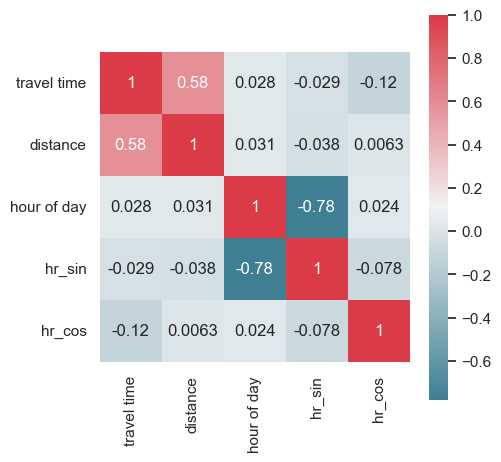

In [36]:
# run correlation matrix and plot
my_df = df[['travel time','distance','hour of day','hr_sin','hr_cos']]
f, ax = plt.subplots(figsize=(5,5))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

### cyclical encoding of hour

In [37]:
x = np.array(df[['distance','hr_sin','hr_cos']])
y = np.array(df['travel time'])
x

array([[ 6.12791363e-01, -9.65925826e-01, -2.58819045e-01],
       [ 5.77763367e-01, -2.58819045e-01,  9.65925826e-01],
       [ 3.52413898e-01,  1.00000000e+00,  6.12323400e-17],
       ...,
       [ 4.08821988e-01, -8.66025404e-01, -5.00000000e-01],
       [ 7.08796471e-01, -9.65925826e-01,  2.58819045e-01],
       [ 1.97469039e-01, -8.66025404e-01,  5.00000000e-01]])

In [38]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6021, 3)
(1506, 3)


In [40]:
# inputs: distance + hour
model2_0 = nnmodel(5, num_hlayers=1,Epoch=500)
model2_0

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1254231.5000 - mape: 100.0284 - rmse: 1119.9248 - val_loss: 1222455.3750 - val_mape: 99.9917 - val_rmse: 1105.6471
Epoch 2/500
189/189 [==============================] - 0s 814us/step - loss: 1253111.5000 - mape: 99.9591 - rmse: 1119.4247 - val_loss: 1221375.6250 - val_mape: 99.9239 - val_rmse: 1105.1587
Epoch 3/500
189/189 [==============================] - 0s 755us/step - loss: 1251849.1250 - mape: 99.8824 - rmse: 1118.8606 - val_loss: 1219921.7500 - val_mape: 99.8359 - val_rmse: 1104.5007
Epoch 4/500
189/189 [==============================] - 0s 737us/step - loss: 1250029.2500 - mape: 99.7759 - rmse: 1118.0471 - val_loss: 1217752.0000 - val_mape: 99.7082 - val_rmse: 1103.5181
Epoch 5/500
189/189 [==============================] - 0s 748us/step - loss: 1247523.3750 - mape: 99.6302 - rmse: 1116.9259 - val_loss: 1214995.7500 - val_mape: 99.5459 - val_rmse: 1102.2684
Epoch 6/500
189/189 [=========================

Epoch 44/500
189/189 [==============================] - 0s 760us/step - loss: 940028.2500 - mape: 80.7794 - rmse: 969.5505 - val_loss: 906160.5000 - val_mape: 80.0165 - val_rmse: 951.9246
Epoch 45/500
189/189 [==============================] - 0s 749us/step - loss: 929056.0000 - mape: 80.0469 - rmse: 963.8755 - val_loss: 895240.0000 - val_mape: 79.2566 - val_rmse: 946.1712
Epoch 46/500
189/189 [==============================] - 0s 781us/step - loss: 918046.5000 - mape: 79.3010 - rmse: 958.1475 - val_loss: 884328.4375 - val_mape: 78.4928 - val_rmse: 940.3874
Epoch 47/500
189/189 [==============================] - 0s 791us/step - loss: 906956.3125 - mape: 78.5470 - rmse: 952.3425 - val_loss: 873301.2500 - val_mape: 77.7247 - val_rmse: 934.5059
Epoch 48/500
189/189 [==============================] - 0s 683us/step - loss: 895779.0000 - mape: 77.7798 - rmse: 946.4560 - val_loss: 862226.3750 - val_mape: 76.9497 - val_rmse: 928.5615
Epoch 49/500
189/189 [==============================] - 0s 6

189/189 [==============================] - 0s 696us/step - loss: 193837.8125 - mape: 35.1004 - rmse: 440.2702 - val_loss: 188107.2031 - val_mape: 35.4648 - val_rmse: 433.7133
Epoch 131/500
189/189 [==============================] - 0s 809us/step - loss: 191432.0469 - mape: 35.2676 - rmse: 437.5295 - val_loss: 186090.7031 - val_mape: 35.6840 - val_rmse: 431.3823
Epoch 132/500
189/189 [==============================] - 0s 716us/step - loss: 189201.5625 - mape: 35.4578 - rmse: 434.9731 - val_loss: 184231.5781 - val_mape: 35.9105 - val_rmse: 429.2221
Epoch 133/500
189/189 [==============================] - 0s 691us/step - loss: 187133.7031 - mape: 35.6757 - rmse: 432.5895 - val_loss: 182523.4062 - val_mape: 36.1376 - val_rmse: 427.2276
Epoch 134/500
189/189 [==============================] - 0s 754us/step - loss: 185216.9844 - mape: 35.8735 - rmse: 430.3684 - val_loss: 180954.3750 - val_mape: 36.3670 - val_rmse: 425.3873
Epoch 135/500
189/189 [==============================] - 0s 794us/ste

189/189 [==============================] - 0s 741us/step - loss: 155117.2500 - mape: 36.9072 - rmse: 393.8493 - val_loss: 156308.3438 - val_mape: 37.1399 - val_rmse: 395.3585
Epoch 217/500
189/189 [==============================] - 0s 768us/step - loss: 155040.9844 - mape: 36.8516 - rmse: 393.7524 - val_loss: 156228.0000 - val_mape: 37.0906 - val_rmse: 395.2569
Epoch 218/500
189/189 [==============================] - 0s 738us/step - loss: 154963.9688 - mape: 36.8065 - rmse: 393.6546 - val_loss: 156155.7344 - val_mape: 37.0666 - val_rmse: 395.1655
Epoch 219/500
189/189 [==============================] - 0s 807us/step - loss: 154886.8906 - mape: 36.7974 - rmse: 393.5567 - val_loss: 156083.6094 - val_mape: 37.0439 - val_rmse: 395.0742
Epoch 220/500
189/189 [==============================] - 0s 770us/step - loss: 154815.7500 - mape: 36.7560 - rmse: 393.4663 - val_loss: 156007.9062 - val_mape: 37.0025 - val_rmse: 394.9784
Epoch 221/500
189/189 [==============================] - 0s 772us/ste

189/189 [==============================] - 0s 806us/step - loss: 151250.7812 - mape: 34.8325 - rmse: 388.9097 - val_loss: 152427.3438 - val_mape: 35.1330 - val_rmse: 390.4194
Epoch 303/500
189/189 [==============================] - 0s 759us/step - loss: 151226.5938 - mape: 34.8276 - rmse: 388.8786 - val_loss: 152399.1875 - val_mape: 35.1066 - val_rmse: 390.3834
Epoch 304/500
189/189 [==============================] - 0s 735us/step - loss: 151204.0938 - mape: 34.7997 - rmse: 388.8497 - val_loss: 152384.0469 - val_mape: 35.1030 - val_rmse: 390.3640
Epoch 305/500
189/189 [==============================] - 0s 695us/step - loss: 151183.9688 - mape: 34.8086 - rmse: 388.8238 - val_loss: 152355.3281 - val_mape: 35.0783 - val_rmse: 390.3272
Epoch 306/500
189/189 [==============================] - 0s 732us/step - loss: 151163.2656 - mape: 34.7731 - rmse: 388.7972 - val_loss: 152333.8906 - val_mape: 35.0615 - val_rmse: 390.2997
Epoch 307/500
189/189 [==============================] - 0s 748us/ste

189/189 [==============================] - 0s 725us/step - loss: 150236.0312 - mape: 33.7781 - rmse: 387.6029 - val_loss: 151325.0625 - val_mape: 34.0884 - val_rmse: 389.0052
Epoch 389/500
189/189 [==============================] - 0s 853us/step - loss: 150231.2031 - mape: 33.7664 - rmse: 387.5967 - val_loss: 151320.7188 - val_mape: 34.0912 - val_rmse: 388.9996
Epoch 390/500
189/189 [==============================] - 0s 745us/step - loss: 150224.8125 - mape: 33.7890 - rmse: 387.5885 - val_loss: 151317.4688 - val_mape: 34.0852 - val_rmse: 388.9955
Epoch 391/500
189/189 [==============================] - 0s 722us/step - loss: 150221.3750 - mape: 33.7499 - rmse: 387.5840 - val_loss: 151306.2656 - val_mape: 34.0622 - val_rmse: 388.9810
Epoch 392/500
189/189 [==============================] - 0s 750us/step - loss: 150215.0000 - mape: 33.7204 - rmse: 387.5758 - val_loss: 151300.2031 - val_mape: 34.0490 - val_rmse: 388.9733
Epoch 393/500
189/189 [==============================] - 0s 719us/ste

189/189 [==============================] - 0s 745us/step - loss: 150000.1875 - mape: 33.2811 - rmse: 387.2986 - val_loss: 151040.7812 - val_mape: 33.6069 - val_rmse: 388.6396
Epoch 475/500
189/189 [==============================] - 0s 747us/step - loss: 150002.7031 - mape: 33.2492 - rmse: 387.3018 - val_loss: 151036.0000 - val_mape: 33.5921 - val_rmse: 388.6335
Epoch 476/500
189/189 [==============================] - 0s 741us/step - loss: 149997.9062 - mape: 33.2802 - rmse: 387.2956 - val_loss: 151048.2500 - val_mape: 33.6315 - val_rmse: 388.6493
Epoch 477/500
189/189 [==============================] - 0s 752us/step - loss: 149999.5312 - mape: 33.3257 - rmse: 387.2977 - val_loss: 151051.5625 - val_mape: 33.6459 - val_rmse: 388.6535
Epoch 478/500
189/189 [==============================] - 0s 730us/step - loss: 149998.7031 - mape: 33.3299 - rmse: 387.2967 - val_loss: 151053.9844 - val_mape: 33.6504 - val_rmse: 388.6566
Epoch 479/500
189/189 [==============================] - 0s 723us/ste

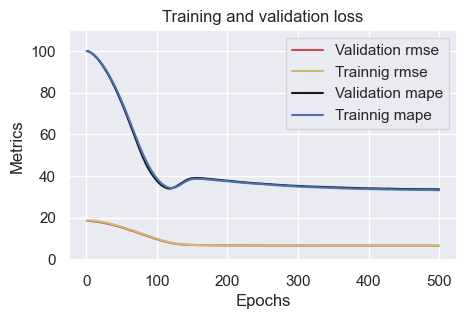

In [41]:
plotme(model2_0)

In [42]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1251349.5000 - mape: 99.8606 - rmse: 1118.6373 - val_loss: 1217364.6250 - val_mape: 99.6869 - val_rmse: 1103.3425
Epoch 2/500
189/189 [==============================] - 0s 766us/step - loss: 1243312.6250 - mape: 99.3934 - rmse: 1115.0393 - val_loss: 1205751.7500 - val_mape: 99.0051 - val_rmse: 1098.0673
Epoch 3/500
189/189 [==============================] - 0s 744us/step - loss: 1227070.1250 - mape: 98.4723 - rmse: 1107.7319 - val_loss: 1184966.5000 - val_mape: 97.7954 - val_rmse: 1088.5616
Epoch 4/500
189/189 [==============================] - 0s 751us/step - loss: 1201427.3750 - mape: 97.0182 - rmse: 1096.0964 - val_loss: 1154965.3750 - val_mape: 96.0363 - val_rmse: 1074.6931
Epoch 5/500
189/189 [==============================] - 0s 760us/step - loss: 1167267.0000 - mape: 95.0459 - rmse: 1080.4014 - val_loss: 1117310.2500 - val_mape: 93.7821 - val_rmse: 1057.0289
Epoch 6/500
189/189 [==========================

Epoch 88/500
189/189 [==============================] - 0s 734us/step - loss: 150547.2344 - mape: 34.1732 - rmse: 388.0042 - val_loss: 151652.5938 - val_mape: 34.5226 - val_rmse: 389.4260
Epoch 89/500
189/189 [==============================] - 0s 749us/step - loss: 150505.6406 - mape: 34.0457 - rmse: 387.9506 - val_loss: 151603.1406 - val_mape: 34.4712 - val_rmse: 389.3625
Epoch 90/500
189/189 [==============================] - 0s 762us/step - loss: 150462.1875 - mape: 34.1516 - rmse: 387.8946 - val_loss: 151559.5469 - val_mape: 34.4172 - val_rmse: 389.3065
Epoch 91/500
189/189 [==============================] - 0s 762us/step - loss: 150433.9844 - mape: 33.9947 - rmse: 387.8582 - val_loss: 151511.9844 - val_mape: 34.3501 - val_rmse: 389.2454
Epoch 92/500
189/189 [==============================] - 0s 768us/step - loss: 150392.7812 - mape: 34.0171 - rmse: 387.8051 - val_loss: 151487.0156 - val_mape: 34.3633 - val_rmse: 389.2133
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 737us/step - loss: 149964.0781 - mape: 32.9230 - rmse: 387.2520 - val_loss: 150914.6719 - val_mape: 33.1739 - val_rmse: 388.4774
Epoch 175/500
189/189 [==============================] - 0s 742us/step - loss: 149965.3125 - mape: 32.9319 - rmse: 387.2535 - val_loss: 150935.7500 - val_mape: 33.2294 - val_rmse: 388.5045
Epoch 176/500
189/189 [==============================] - 0s 727us/step - loss: 149965.1250 - mape: 33.0095 - rmse: 387.2533 - val_loss: 150927.2812 - val_mape: 33.1976 - val_rmse: 388.4936
Epoch 177/500
189/189 [==============================] - 0s 766us/step - loss: 149964.1562 - mape: 32.9292 - rmse: 387.2520 - val_loss: 150911.7500 - val_mape: 33.1449 - val_rmse: 388.4736
Epoch 178/500
189/189 [==============================] - 0s 742us/step - loss: 149958.2969 - mape: 32.8774 - rmse: 387.2445 - val_loss: 150946.5000 - val_mape: 33.2514 - val_rmse: 388.5183
Epoch 179/500
189/189 [==============================] - 0s 745us/ste

189/189 [==============================] - 0s 790us/step - loss: 149965.0312 - mape: 32.8780 - rmse: 387.2532 - val_loss: 150953.8750 - val_mape: 33.2470 - val_rmse: 388.5278
Epoch 261/500
189/189 [==============================] - 0s 768us/step - loss: 149960.6250 - mape: 32.9727 - rmse: 387.2475 - val_loss: 150947.6250 - val_mape: 33.2228 - val_rmse: 388.5198
Epoch 262/500
189/189 [==============================] - 0s 762us/step - loss: 149956.5938 - mape: 32.7560 - rmse: 387.2423 - val_loss: 150963.6094 - val_mape: 33.2679 - val_rmse: 388.5403
Epoch 263/500
189/189 [==============================] - 0s 748us/step - loss: 149966.1562 - mape: 32.9052 - rmse: 387.2546 - val_loss: 150961.9219 - val_mape: 33.2574 - val_rmse: 388.5382
Epoch 264/500
189/189 [==============================] - 0s 739us/step - loss: 149957.7656 - mape: 32.8092 - rmse: 387.2438 - val_loss: 150966.0938 - val_mape: 33.3099 - val_rmse: 388.5435
Epoch 265/500
189/189 [==============================] - 0s 743us/ste

189/189 [==============================] - 0s 735us/step - loss: 149961.5312 - mape: 32.7573 - rmse: 387.2487 - val_loss: 150936.7344 - val_mape: 33.2490 - val_rmse: 388.5058
Epoch 347/500
189/189 [==============================] - 0s 749us/step - loss: 149963.0312 - mape: 32.8562 - rmse: 387.2506 - val_loss: 150967.6875 - val_mape: 33.3422 - val_rmse: 388.5456
Epoch 348/500
189/189 [==============================] - 0s 745us/step - loss: 149960.8594 - mape: 32.9364 - rmse: 387.2478 - val_loss: 150952.9219 - val_mape: 33.2791 - val_rmse: 388.5266
Epoch 349/500
189/189 [==============================] - 0s 772us/step - loss: 149967.0781 - mape: 32.9300 - rmse: 387.2558 - val_loss: 150950.5156 - val_mape: 33.2510 - val_rmse: 388.5235
Epoch 350/500
189/189 [==============================] - 0s 745us/step - loss: 149958.6094 - mape: 32.8790 - rmse: 387.2449 - val_loss: 150946.6719 - val_mape: 33.2625 - val_rmse: 388.5186
Epoch 351/500
189/189 [==============================] - 0s 775us/ste

189/189 [==============================] - 0s 739us/step - loss: 149971.2031 - mape: 32.7900 - rmse: 387.2612 - val_loss: 150941.4844 - val_mape: 33.2417 - val_rmse: 388.5119
Epoch 433/500
189/189 [==============================] - 0s 738us/step - loss: 149971.9688 - mape: 32.8833 - rmse: 387.2621 - val_loss: 150939.7500 - val_mape: 33.2430 - val_rmse: 388.5096
Epoch 434/500
189/189 [==============================] - 0s 742us/step - loss: 149958.8594 - mape: 32.9169 - rmse: 387.2452 - val_loss: 150924.8438 - val_mape: 33.1817 - val_rmse: 388.4905
Epoch 435/500
189/189 [==============================] - 0s 742us/step - loss: 149967.5156 - mape: 32.7708 - rmse: 387.2564 - val_loss: 150915.7656 - val_mape: 33.1355 - val_rmse: 388.4788
Epoch 436/500
189/189 [==============================] - 0s 748us/step - loss: 149965.1875 - mape: 32.9338 - rmse: 387.2534 - val_loss: 150930.4062 - val_mape: 33.1921 - val_rmse: 388.4976
Epoch 437/500
189/189 [==============================] - 0s 752us/ste

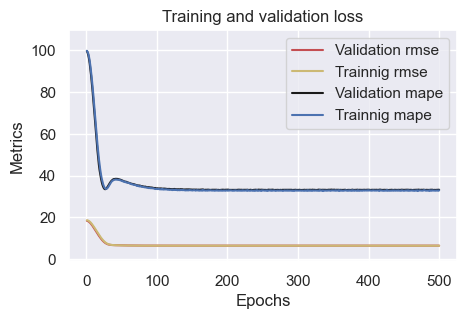

In [43]:
plotme(model2_1)

In [44]:
# inputs: distance + hour
model2_2 = nnmodel(50, num_hlayers=1,Epoch=1000)
model2_2

Epoch 1/1000
189/189 [==============================] - 0s 1ms/step - loss: 1250120.1250 - mape: 99.7764 - rmse: 1118.0878 - val_loss: 1213650.5000 - val_mape: 99.4565 - val_rmse: 1101.6581
Epoch 2/1000
189/189 [==============================] - 0s 776us/step - loss: 1233014.1250 - mape: 98.7942 - rmse: 1110.4117 - val_loss: 1186189.2500 - val_mape: 97.8397 - val_rmse: 1089.1232
Epoch 3/1000
189/189 [==============================] - 0s 787us/step - loss: 1193493.0000 - mape: 96.5202 - rmse: 1092.4711 - val_loss: 1135832.6250 - val_mape: 94.8592 - val_rmse: 1065.7545
Epoch 4/1000
189/189 [==============================] - 0s 766us/step - loss: 1133320.8750 - mape: 92.9995 - rmse: 1064.5754 - val_loss: 1067741.6250 - val_mape: 90.6946 - val_rmse: 1033.3158
Epoch 5/1000
189/189 [==============================] - 0s 791us/step - loss: 1058625.2500 - mape: 88.4086 - rmse: 1028.8951 - val_loss: 988732.6250 - val_mape: 85.6408 - val_rmse: 994.3503
Epoch 6/1000
189/189 [======================

189/189 [==============================] - 0s 780us/step - loss: 150008.4688 - mape: 33.3327 - rmse: 387.3093 - val_loss: 151037.5938 - val_mape: 33.6000 - val_rmse: 388.6356
Epoch 88/1000
189/189 [==============================] - 0s 771us/step - loss: 150007.7500 - mape: 33.1663 - rmse: 387.3083 - val_loss: 151010.6562 - val_mape: 33.5690 - val_rmse: 388.6009
Epoch 89/1000
189/189 [==============================] - 0s 783us/step - loss: 150012.0312 - mape: 33.1712 - rmse: 387.3139 - val_loss: 151017.9688 - val_mape: 33.5818 - val_rmse: 388.6103
Epoch 90/1000
189/189 [==============================] - 0s 767us/step - loss: 150007.3281 - mape: 33.2020 - rmse: 387.3078 - val_loss: 150989.4219 - val_mape: 33.4475 - val_rmse: 388.5736
Epoch 91/1000
189/189 [==============================] - 0s 771us/step - loss: 149983.7656 - mape: 33.1258 - rmse: 387.2774 - val_loss: 150998.7344 - val_mape: 33.4625 - val_rmse: 388.5856
Epoch 92/1000
189/189 [==============================] - 0s 767us/ste

189/189 [==============================] - 0s 743us/step - loss: 149974.1875 - mape: 32.7509 - rmse: 387.2650 - val_loss: 150973.1875 - val_mape: 33.3394 - val_rmse: 388.5527
Epoch 174/1000
189/189 [==============================] - 0s 753us/step - loss: 149963.9062 - mape: 32.9026 - rmse: 387.2517 - val_loss: 150968.3438 - val_mape: 33.3098 - val_rmse: 388.5464
Epoch 175/1000
189/189 [==============================] - 0s 753us/step - loss: 149959.0156 - mape: 33.0163 - rmse: 387.2454 - val_loss: 150906.1562 - val_mape: 33.0953 - val_rmse: 388.4664
Epoch 176/1000
189/189 [==============================] - 0s 778us/step - loss: 149968.1875 - mape: 32.8426 - rmse: 387.2573 - val_loss: 150918.7031 - val_mape: 33.1514 - val_rmse: 388.4826
Epoch 177/1000
189/189 [==============================] - 0s 782us/step - loss: 149982.5938 - mape: 32.9125 - rmse: 387.2758 - val_loss: 150930.0156 - val_mape: 33.1437 - val_rmse: 388.4971
Epoch 178/1000
189/189 [==============================] - 0s 815u

189/189 [==============================] - 0s 759us/step - loss: 149968.5000 - mape: 32.9298 - rmse: 387.2577 - val_loss: 150946.2031 - val_mape: 33.2169 - val_rmse: 388.5179
Epoch 260/1000
189/189 [==============================] - 0s 763us/step - loss: 149963.2344 - mape: 32.7334 - rmse: 387.2509 - val_loss: 150961.3438 - val_mape: 33.2514 - val_rmse: 388.5374
Epoch 261/1000
189/189 [==============================] - 0s 749us/step - loss: 149968.2500 - mape: 32.8998 - rmse: 387.2574 - val_loss: 150963.5156 - val_mape: 33.3016 - val_rmse: 388.5402
Epoch 262/1000
189/189 [==============================] - 0s 767us/step - loss: 149975.1250 - mape: 32.7484 - rmse: 387.2662 - val_loss: 150966.7656 - val_mape: 33.3015 - val_rmse: 388.5444
Epoch 263/1000
189/189 [==============================] - 0s 755us/step - loss: 149973.2812 - mape: 32.9038 - rmse: 387.2638 - val_loss: 150961.9062 - val_mape: 33.3061 - val_rmse: 388.5382
Epoch 264/1000
189/189 [==============================] - 0s 761u

189/189 [==============================] - 0s 766us/step - loss: 149974.1875 - mape: 32.9143 - rmse: 387.2650 - val_loss: 150978.5625 - val_mape: 33.3801 - val_rmse: 388.5596
Epoch 346/1000
189/189 [==============================] - 0s 777us/step - loss: 149968.2812 - mape: 32.8482 - rmse: 387.2574 - val_loss: 150958.6250 - val_mape: 33.3389 - val_rmse: 388.5339
Epoch 347/1000
189/189 [==============================] - 0s 771us/step - loss: 149976.7500 - mape: 32.8681 - rmse: 387.2683 - val_loss: 150958.7031 - val_mape: 33.2697 - val_rmse: 388.5341
Epoch 348/1000
189/189 [==============================] - 0s 769us/step - loss: 149973.8906 - mape: 32.7323 - rmse: 387.2646 - val_loss: 151007.7188 - val_mape: 33.4263 - val_rmse: 388.5971
Epoch 349/1000
189/189 [==============================] - 0s 776us/step - loss: 149965.6562 - mape: 32.9984 - rmse: 387.2540 - val_loss: 150919.7500 - val_mape: 33.0839 - val_rmse: 388.4839
Epoch 350/1000
189/189 [==============================] - 0s 761u

189/189 [==============================] - 0s 772us/step - loss: 149985.2031 - mape: 32.8888 - rmse: 387.2792 - val_loss: 150914.3438 - val_mape: 33.1273 - val_rmse: 388.4770
Epoch 432/1000
189/189 [==============================] - 0s 772us/step - loss: 149969.5781 - mape: 32.7705 - rmse: 387.2591 - val_loss: 150925.5000 - val_mape: 33.1449 - val_rmse: 388.4913
Epoch 433/1000
189/189 [==============================] - 0s 758us/step - loss: 149968.9062 - mape: 32.7714 - rmse: 387.2582 - val_loss: 150950.5156 - val_mape: 33.2329 - val_rmse: 388.5235
Epoch 434/1000
189/189 [==============================] - 0s 777us/step - loss: 149979.9219 - mape: 32.9030 - rmse: 387.2724 - val_loss: 150901.0312 - val_mape: 33.0559 - val_rmse: 388.4598
Epoch 435/1000
189/189 [==============================] - 0s 750us/step - loss: 149979.8750 - mape: 32.7928 - rmse: 387.2723 - val_loss: 150899.5938 - val_mape: 33.0585 - val_rmse: 388.4580
Epoch 436/1000
189/189 [==============================] - 0s 762u

189/189 [==============================] - 0s 770us/step - loss: 149969.6094 - mape: 32.8269 - rmse: 387.2591 - val_loss: 150963.1094 - val_mape: 33.2554 - val_rmse: 388.5397
Epoch 518/1000
189/189 [==============================] - 0s 775us/step - loss: 149975.1719 - mape: 32.9549 - rmse: 387.2663 - val_loss: 150935.3438 - val_mape: 33.2253 - val_rmse: 388.5040
Epoch 519/1000
189/189 [==============================] - 0s 776us/step - loss: 149973.0625 - mape: 32.8653 - rmse: 387.2635 - val_loss: 150913.5625 - val_mape: 33.0847 - val_rmse: 388.4760
Epoch 520/1000
189/189 [==============================] - 0s 767us/step - loss: 149976.1562 - mape: 32.7653 - rmse: 387.2675 - val_loss: 150903.9844 - val_mape: 33.0833 - val_rmse: 388.4636
Epoch 521/1000
189/189 [==============================] - 0s 763us/step - loss: 149975.6562 - mape: 32.9245 - rmse: 387.2669 - val_loss: 150917.5000 - val_mape: 33.1505 - val_rmse: 388.4810
Epoch 522/1000
189/189 [==============================] - 0s 766u

189/189 [==============================] - 0s 771us/step - loss: 149970.0625 - mape: 32.9025 - rmse: 387.2597 - val_loss: 150909.5938 - val_mape: 33.1478 - val_rmse: 388.4708
Epoch 604/1000
189/189 [==============================] - 0s 776us/step - loss: 149981.6562 - mape: 32.8014 - rmse: 387.2747 - val_loss: 150910.1875 - val_mape: 33.1308 - val_rmse: 388.4716
Epoch 605/1000
189/189 [==============================] - 0s 771us/step - loss: 149964.9844 - mape: 32.7951 - rmse: 387.2531 - val_loss: 150916.3594 - val_mape: 33.1491 - val_rmse: 388.4796
Epoch 606/1000
189/189 [==============================] - 0s 773us/step - loss: 149965.9062 - mape: 32.8207 - rmse: 387.2543 - val_loss: 150914.7969 - val_mape: 33.1401 - val_rmse: 388.4775
Epoch 607/1000
189/189 [==============================] - 0s 775us/step - loss: 149973.7500 - mape: 32.9966 - rmse: 387.2644 - val_loss: 150909.2812 - val_mape: 33.0810 - val_rmse: 388.4704
Epoch 608/1000
189/189 [==============================] - 0s 767u

189/189 [==============================] - 0s 774us/step - loss: 149974.2500 - mape: 32.8521 - rmse: 387.2651 - val_loss: 150966.3594 - val_mape: 33.3216 - val_rmse: 388.5439
Epoch 690/1000
189/189 [==============================] - 0s 768us/step - loss: 149962.4219 - mape: 32.9004 - rmse: 387.2498 - val_loss: 150928.4844 - val_mape: 33.1815 - val_rmse: 388.4951
Epoch 691/1000
189/189 [==============================] - 0s 754us/step - loss: 149974.6094 - mape: 32.8463 - rmse: 387.2656 - val_loss: 150906.0781 - val_mape: 33.1140 - val_rmse: 388.4663
Epoch 692/1000
189/189 [==============================] - 0s 768us/step - loss: 149966.8125 - mape: 32.7774 - rmse: 387.2555 - val_loss: 150930.5156 - val_mape: 33.1615 - val_rmse: 388.4978
Epoch 693/1000
189/189 [==============================] - 0s 776us/step - loss: 149978.2656 - mape: 32.8369 - rmse: 387.2703 - val_loss: 151003.2969 - val_mape: 33.3859 - val_rmse: 388.5914
Epoch 694/1000
189/189 [==============================] - 0s 773u

189/189 [==============================] - 0s 766us/step - loss: 149982.0469 - mape: 32.8525 - rmse: 387.2751 - val_loss: 150928.4375 - val_mape: 33.2076 - val_rmse: 388.4951
Epoch 776/1000
189/189 [==============================] - 0s 777us/step - loss: 149961.8906 - mape: 32.8997 - rmse: 387.2491 - val_loss: 150918.1406 - val_mape: 33.1985 - val_rmse: 388.4818
Epoch 777/1000
189/189 [==============================] - 0s 756us/step - loss: 149988.0156 - mape: 32.8048 - rmse: 387.2829 - val_loss: 150944.5469 - val_mape: 33.2313 - val_rmse: 388.5158
Epoch 778/1000
189/189 [==============================] - 0s 757us/step - loss: 149965.7812 - mape: 32.7683 - rmse: 387.2542 - val_loss: 150955.1562 - val_mape: 33.2728 - val_rmse: 388.5295
Epoch 779/1000
189/189 [==============================] - 0s 756us/step - loss: 149980.2188 - mape: 32.9382 - rmse: 387.2728 - val_loss: 150916.3906 - val_mape: 33.1531 - val_rmse: 388.4796
Epoch 780/1000
189/189 [==============================] - 0s 772u

189/189 [==============================] - 0s 771us/step - loss: 149969.4062 - mape: 32.7936 - rmse: 387.2589 - val_loss: 150899.7031 - val_mape: 33.1345 - val_rmse: 388.4581
Epoch 862/1000
189/189 [==============================] - 0s 771us/step - loss: 149966.3906 - mape: 32.8040 - rmse: 387.2549 - val_loss: 150927.2812 - val_mape: 33.2576 - val_rmse: 388.4936
Epoch 863/1000
189/189 [==============================] - 0s 771us/step - loss: 149976.9375 - mape: 32.9955 - rmse: 387.2686 - val_loss: 150928.4844 - val_mape: 33.2027 - val_rmse: 388.4951
Epoch 864/1000
189/189 [==============================] - 0s 763us/step - loss: 149969.7656 - mape: 32.7484 - rmse: 387.2593 - val_loss: 150911.4375 - val_mape: 33.1658 - val_rmse: 388.4732
Epoch 865/1000
189/189 [==============================] - 0s 772us/step - loss: 149976.2344 - mape: 32.8553 - rmse: 387.2676 - val_loss: 150940.7344 - val_mape: 33.2560 - val_rmse: 388.5109
Epoch 866/1000
189/189 [==============================] - 0s 768u

189/189 [==============================] - 0s 755us/step - loss: 149979.5156 - mape: 32.7586 - rmse: 387.2719 - val_loss: 150975.8438 - val_mape: 33.2992 - val_rmse: 388.5561
Epoch 948/1000
189/189 [==============================] - 0s 751us/step - loss: 149967.5781 - mape: 32.8614 - rmse: 387.2565 - val_loss: 150961.2500 - val_mape: 33.2674 - val_rmse: 388.5373
Epoch 949/1000
189/189 [==============================] - 0s 769us/step - loss: 149974.3125 - mape: 32.8830 - rmse: 387.2652 - val_loss: 150987.8281 - val_mape: 33.3820 - val_rmse: 388.5715
Epoch 950/1000
189/189 [==============================] - 0s 763us/step - loss: 149968.9062 - mape: 33.0120 - rmse: 387.2582 - val_loss: 150904.0938 - val_mape: 33.0608 - val_rmse: 388.4638
Epoch 951/1000
189/189 [==============================] - 0s 769us/step - loss: 149969.2656 - mape: 32.7356 - rmse: 387.2587 - val_loss: 150935.2812 - val_mape: 33.1788 - val_rmse: 388.5039
Epoch 952/1000
189/189 [==============================] - 0s 769u

In [45]:
# plotme(model2_2)

In [46]:
# inputs: distance + hour
model2_3 = nnmodel(100, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1247239.0000 - mape: 99.6244 - rmse: 1116.7986 - val_loss: 1205485.7500 - val_mape: 98.9996 - val_rmse: 1097.9462
Epoch 2/500
189/189 [==============================] - 0s 817us/step - loss: 1213646.8750 - mape: 97.7020 - rmse: 1101.6564 - val_loss: 1152996.0000 - val_mape: 95.9196 - val_rmse: 1073.7765
Epoch 3/500
189/189 [==============================] - 0s 782us/step - loss: 1142440.2500 - mape: 93.5655 - rmse: 1068.8500 - val_loss: 1065854.3750 - val_mape: 90.6119 - val_rmse: 1032.4022
Epoch 4/500
189/189 [==============================] - 0s 805us/step - loss: 1042340.5625 - mape: 87.4581 - rmse: 1020.9508 - val_loss: 955944.1875 - val_mape: 83.4957 - val_rmse: 977.7240
Epoch 5/500
189/189 [==============================] - 0s 808us/step - loss: 924690.4375 - mape: 79.8383 - rmse: 961.6083 - val_loss: 834896.7500 - val_mape: 75.1035 - val_rmse: 913.7269
Epoch 6/500
189/189 [==============================] 

Epoch 88/500
189/189 [==============================] - 0s 794us/step - loss: 149973.2188 - mape: 32.7319 - rmse: 387.2638 - val_loss: 150997.1719 - val_mape: 33.4132 - val_rmse: 388.5836
Epoch 89/500
189/189 [==============================] - 0s 823us/step - loss: 149983.1250 - mape: 32.8933 - rmse: 387.2766 - val_loss: 151049.1094 - val_mape: 33.5313 - val_rmse: 388.6504
Epoch 90/500
189/189 [==============================] - 0s 809us/step - loss: 149997.2656 - mape: 33.0947 - rmse: 387.2948 - val_loss: 151013.3594 - val_mape: 33.4291 - val_rmse: 388.6044
Epoch 91/500
189/189 [==============================] - 0s 790us/step - loss: 149990.3281 - mape: 32.9623 - rmse: 387.2859 - val_loss: 150954.5469 - val_mape: 33.2434 - val_rmse: 388.5287
Epoch 92/500
189/189 [==============================] - 0s 782us/step - loss: 149977.5000 - mape: 32.9293 - rmse: 387.2693 - val_loss: 150984.7500 - val_mape: 33.3653 - val_rmse: 388.5676
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 801us/step - loss: 149992.8750 - mape: 32.7278 - rmse: 387.2891 - val_loss: 150975.8906 - val_mape: 33.2947 - val_rmse: 388.5562
Epoch 175/500
189/189 [==============================] - 0s 801us/step - loss: 149977.7188 - mape: 32.7343 - rmse: 387.2696 - val_loss: 151004.6250 - val_mape: 33.3970 - val_rmse: 388.5931
Epoch 176/500
189/189 [==============================] - 0s 805us/step - loss: 150012.6562 - mape: 33.0765 - rmse: 387.3147 - val_loss: 150946.4375 - val_mape: 33.2160 - val_rmse: 388.5182
Epoch 177/500
189/189 [==============================] - 0s 791us/step - loss: 149977.7031 - mape: 32.7293 - rmse: 387.2696 - val_loss: 150954.4688 - val_mape: 33.3004 - val_rmse: 388.5286
Epoch 178/500
189/189 [==============================] - 0s 784us/step - loss: 149971.9688 - mape: 33.0227 - rmse: 387.2621 - val_loss: 150874.3906 - val_mape: 33.0192 - val_rmse: 388.4255
Epoch 179/500
189/189 [==============================] - 0s 797us/ste

189/189 [==============================] - 0s 771us/step - loss: 149989.9531 - mape: 32.9359 - rmse: 387.2854 - val_loss: 150943.5625 - val_mape: 33.2729 - val_rmse: 388.5146
Epoch 261/500
189/189 [==============================] - 0s 797us/step - loss: 149988.6250 - mape: 32.8400 - rmse: 387.2837 - val_loss: 150968.8594 - val_mape: 33.3097 - val_rmse: 388.5471
Epoch 262/500
189/189 [==============================] - 0s 800us/step - loss: 149986.2969 - mape: 32.9596 - rmse: 387.2806 - val_loss: 150954.5625 - val_mape: 33.2471 - val_rmse: 388.5287
Epoch 263/500
189/189 [==============================] - 0s 777us/step - loss: 149994.5938 - mape: 32.8621 - rmse: 387.2914 - val_loss: 150974.4062 - val_mape: 33.2957 - val_rmse: 388.5543
Epoch 264/500
189/189 [==============================] - 0s 812us/step - loss: 149990.9062 - mape: 32.8222 - rmse: 387.2866 - val_loss: 150929.4375 - val_mape: 33.1945 - val_rmse: 388.4964
Epoch 265/500
189/189 [==============================] - 0s 798us/ste

189/189 [==============================] - 0s 802us/step - loss: 149986.2188 - mape: 32.6525 - rmse: 387.2805 - val_loss: 150953.3281 - val_mape: 33.2721 - val_rmse: 388.5271
Epoch 347/500
189/189 [==============================] - 0s 807us/step - loss: 149984.7031 - mape: 32.9131 - rmse: 387.2786 - val_loss: 150922.1406 - val_mape: 33.1737 - val_rmse: 388.4870
Epoch 348/500
189/189 [==============================] - 0s 797us/step - loss: 149972.6250 - mape: 32.7746 - rmse: 387.2630 - val_loss: 150979.1094 - val_mape: 33.3910 - val_rmse: 388.5603
Epoch 349/500
189/189 [==============================] - 0s 789us/step - loss: 149981.9062 - mape: 32.8785 - rmse: 387.2750 - val_loss: 150917.3750 - val_mape: 33.1428 - val_rmse: 388.4809
Epoch 350/500
189/189 [==============================] - 0s 785us/step - loss: 149988.0156 - mape: 32.8460 - rmse: 387.2829 - val_loss: 150938.6250 - val_mape: 33.2445 - val_rmse: 388.5082
Epoch 351/500
189/189 [==============================] - 0s 790us/ste

189/189 [==============================] - 0s 786us/step - loss: 149986.3281 - mape: 32.7924 - rmse: 387.2807 - val_loss: 150947.5312 - val_mape: 33.2252 - val_rmse: 388.5197
Epoch 433/500
189/189 [==============================] - 0s 797us/step - loss: 149973.6562 - mape: 32.6798 - rmse: 387.2643 - val_loss: 150989.0938 - val_mape: 33.3642 - val_rmse: 388.5732
Epoch 434/500
189/189 [==============================] - 0s 809us/step - loss: 149984.7344 - mape: 32.9236 - rmse: 387.2786 - val_loss: 150919.5938 - val_mape: 33.1749 - val_rmse: 388.4837
Epoch 435/500
189/189 [==============================] - 0s 816us/step - loss: 149975.2969 - mape: 33.1054 - rmse: 387.2664 - val_loss: 150895.2188 - val_mape: 33.0521 - val_rmse: 388.4523
Epoch 436/500
189/189 [==============================] - 0s 794us/step - loss: 149990.2188 - mape: 32.6277 - rmse: 387.2857 - val_loss: 150919.7031 - val_mape: 33.2192 - val_rmse: 388.4839
Epoch 437/500
189/189 [==============================] - 0s 782us/ste

In [47]:
# inputs: distance + hour
model2_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1188974.2500 - mape: 96.1505 - rmse: 1090.4010 - val_loss: 952368.9375 - val_mape: 82.8623 - val_rmse: 975.8939
Epoch 2/500
189/189 [==============================] - 0s 832us/step - loss: 530617.8750 - mape: 52.4069 - rmse: 728.4352 - val_loss: 209090.7344 - val_mape: 35.7388 - val_rmse: 457.2644
Epoch 3/500
189/189 [==============================] - 0s 805us/step - loss: 175689.5938 - mape: 37.7032 - rmse: 419.1534 - val_loss: 163984.4688 - val_mape: 40.3479 - val_rmse: 404.9500
Epoch 4/500
189/189 [==============================] - 0s 822us/step - loss: 160440.3750 - mape: 38.7581 - rmse: 400.5501 - val_loss: 160044.0000 - val_mape: 38.8278 - val_rmse: 400.0550
Epoch 5/500
189/189 [==============================] - 0s 820us/step - loss: 157425.3750 - mape: 37.8244 - rmse: 396.7687 - val_loss: 157298.4219 - val_mape: 37.4162 - val_rmse: 396.6086
Epoch 6/500
189/189 [==============================] - 0s 820us/s

Epoch 45/500
189/189 [==============================] - 0s 801us/step - loss: 149176.7969 - mape: 32.7533 - rmse: 386.2341 - val_loss: 150005.0938 - val_mape: 33.5115 - val_rmse: 387.3049
Epoch 46/500
189/189 [==============================] - 0s 809us/step - loss: 149253.7969 - mape: 32.9073 - rmse: 386.3338 - val_loss: 149886.6562 - val_mape: 32.3461 - val_rmse: 387.1520
Epoch 47/500
189/189 [==============================] - 0s 818us/step - loss: 149140.0781 - mape: 32.7744 - rmse: 386.1866 - val_loss: 150242.0938 - val_mape: 33.7659 - val_rmse: 387.6107
Epoch 48/500
189/189 [==============================] - 0s 820us/step - loss: 149255.1250 - mape: 32.7325 - rmse: 386.3355 - val_loss: 150346.8438 - val_mape: 34.0725 - val_rmse: 387.7458
Epoch 49/500
189/189 [==============================] - 0s 824us/step - loss: 148983.2969 - mape: 32.9481 - rmse: 385.9836 - val_loss: 149794.6562 - val_mape: 32.0382 - val_rmse: 387.0331
Epoch 50/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 805us/step - loss: 148689.4062 - mape: 32.7774 - rmse: 385.6027 - val_loss: 149506.3281 - val_mape: 32.7258 - val_rmse: 386.6605
Epoch 132/500
189/189 [==============================] - 0s 803us/step - loss: 148664.6719 - mape: 32.6291 - rmse: 385.5706 - val_loss: 150310.5625 - val_mape: 34.1058 - val_rmse: 387.6991
Epoch 133/500
189/189 [==============================] - 0s 809us/step - loss: 148597.6406 - mape: 32.9360 - rmse: 385.4836 - val_loss: 149435.3438 - val_mape: 32.2573 - val_rmse: 386.5687
Epoch 134/500
189/189 [==============================] - 0s 816us/step - loss: 148678.2969 - mape: 32.8521 - rmse: 385.5883 - val_loss: 149814.5938 - val_mape: 31.2412 - val_rmse: 387.0589
Epoch 135/500
189/189 [==============================] - 0s 818us/step - loss: 148629.6250 - mape: 32.6211 - rmse: 385.5251 - val_loss: 149621.5000 - val_mape: 32.6045 - val_rmse: 386.8094
Epoch 136/500
189/189 [==============================] - 0s 809us/ste

189/189 [==============================] - 0s 812us/step - loss: 148432.1406 - mape: 32.7777 - rmse: 385.2689 - val_loss: 149519.8125 - val_mape: 33.5252 - val_rmse: 386.6779
Epoch 218/500
189/189 [==============================] - 0s 809us/step - loss: 148387.5938 - mape: 32.8063 - rmse: 385.2111 - val_loss: 149152.7656 - val_mape: 32.6031 - val_rmse: 386.2030
Epoch 219/500
189/189 [==============================] - 0s 808us/step - loss: 148462.5625 - mape: 32.8931 - rmse: 385.3084 - val_loss: 149481.2656 - val_mape: 33.1934 - val_rmse: 386.6281
Epoch 220/500
189/189 [==============================] - 0s 806us/step - loss: 148341.2500 - mape: 32.6933 - rmse: 385.1509 - val_loss: 149648.9062 - val_mape: 33.5160 - val_rmse: 386.8448
Epoch 221/500
189/189 [==============================] - 0s 812us/step - loss: 148300.4062 - mape: 32.9132 - rmse: 385.0979 - val_loss: 149451.8750 - val_mape: 33.1532 - val_rmse: 386.5901
Epoch 222/500
189/189 [==============================] - 0s 808us/ste

189/189 [==============================] - 0s 810us/step - loss: 148213.9062 - mape: 32.7839 - rmse: 384.9856 - val_loss: 149252.8906 - val_mape: 33.4664 - val_rmse: 386.3326
Epoch 304/500
189/189 [==============================] - 0s 823us/step - loss: 148108.7344 - mape: 32.7719 - rmse: 384.8490 - val_loss: 149073.1094 - val_mape: 32.8413 - val_rmse: 386.0999
Epoch 305/500
189/189 [==============================] - 0s 802us/step - loss: 148155.8750 - mape: 32.7347 - rmse: 384.9102 - val_loss: 148985.4375 - val_mape: 32.8380 - val_rmse: 385.9863
Epoch 306/500
189/189 [==============================] - 0s 814us/step - loss: 148123.9844 - mape: 32.8956 - rmse: 384.8688 - val_loss: 148937.9844 - val_mape: 32.7475 - val_rmse: 385.9248
Epoch 307/500
189/189 [==============================] - 0s 815us/step - loss: 148281.4219 - mape: 32.8092 - rmse: 385.0733 - val_loss: 149301.6094 - val_mape: 33.6026 - val_rmse: 386.3957
Epoch 308/500
189/189 [==============================] - 0s 816us/ste

189/189 [==============================] - 0s 813us/step - loss: 147597.5781 - mape: 32.8127 - rmse: 384.1843 - val_loss: 148492.4375 - val_mape: 32.4344 - val_rmse: 385.3472
Epoch 390/500
189/189 [==============================] - 0s 815us/step - loss: 147689.4688 - mape: 32.5782 - rmse: 384.3039 - val_loss: 148606.4531 - val_mape: 33.0490 - val_rmse: 385.4951
Epoch 391/500
189/189 [==============================] - 0s 835us/step - loss: 147646.2188 - mape: 32.9109 - rmse: 384.2476 - val_loss: 148631.0156 - val_mape: 33.2297 - val_rmse: 385.5269
Epoch 392/500
189/189 [==============================] - 0s 803us/step - loss: 147605.1562 - mape: 32.7814 - rmse: 384.1942 - val_loss: 148514.2969 - val_mape: 32.1359 - val_rmse: 385.3755
Epoch 393/500
189/189 [==============================] - 0s 818us/step - loss: 147688.2188 - mape: 32.6368 - rmse: 384.3022 - val_loss: 149162.1250 - val_mape: 34.0775 - val_rmse: 386.2151
Epoch 394/500
189/189 [==============================] - 0s 834us/ste

189/189 [==============================] - 0s 824us/step - loss: 147146.1875 - mape: 32.6493 - rmse: 383.5964 - val_loss: 148594.5781 - val_mape: 33.8695 - val_rmse: 385.4797
Epoch 476/500
189/189 [==============================] - 0s 803us/step - loss: 147042.7031 - mape: 32.8468 - rmse: 383.4615 - val_loss: 148260.8906 - val_mape: 31.8047 - val_rmse: 385.0466
Epoch 477/500
189/189 [==============================] - 0s 810us/step - loss: 147119.7031 - mape: 32.6759 - rmse: 383.5619 - val_loss: 148144.3125 - val_mape: 32.9791 - val_rmse: 384.8952
Epoch 478/500
189/189 [==============================] - 0s 809us/step - loss: 147116.0469 - mape: 32.7337 - rmse: 383.5571 - val_loss: 148181.3594 - val_mape: 33.2456 - val_rmse: 384.9433
Epoch 479/500
189/189 [==============================] - 0s 818us/step - loss: 147278.7188 - mape: 32.9655 - rmse: 383.7691 - val_loss: 148059.2188 - val_mape: 32.2474 - val_rmse: 384.7846
Epoch 480/500
189/189 [==============================] - 0s 815us/ste

In [48]:
# inputs: distance + hour
model2_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1041782.9375 - mape: 86.1369 - rmse: 1020.6777 - val_loss: 459139.6562 - val_mape: 44.3825 - val_rmse: 677.5984
Epoch 2/500
189/189 [==============================] - 0s 894us/step - loss: 216119.5312 - mape: 38.1088 - rmse: 464.8866 - val_loss: 162599.0156 - val_mape: 38.7873 - val_rmse: 403.2357
Epoch 3/500
189/189 [==============================] - 0s 879us/step - loss: 159106.4844 - mape: 38.2608 - rmse: 398.8815 - val_loss: 158421.4688 - val_mape: 38.3760 - val_rmse: 398.0219
Epoch 4/500
189/189 [==============================] - 0s 890us/step - loss: 155364.2188 - mape: 37.2968 - rmse: 394.1627 - val_loss: 154900.0938 - val_mape: 36.6414 - val_rmse: 393.5735
Epoch 5/500
189/189 [==============================] - 0s 870us/step - loss: 152813.4844 - mape: 35.8625 - rmse: 390.9137 - val_loss: 152797.4688 - val_mape: 35.4619 - val_rmse: 390.8932
Epoch 6/500
189/189 [==============================] - 0s 874us/s

Epoch 45/500
189/189 [==============================] - 0s 877us/step - loss: 149098.9375 - mape: 32.6814 - rmse: 386.1333 - val_loss: 150830.4375 - val_mape: 34.8758 - val_rmse: 388.3690
Epoch 46/500
189/189 [==============================] - 0s 878us/step - loss: 149000.5469 - mape: 32.9175 - rmse: 386.0059 - val_loss: 150521.7500 - val_mape: 34.6291 - val_rmse: 387.9713
Epoch 47/500
189/189 [==============================] - 0s 877us/step - loss: 149016.9375 - mape: 32.9668 - rmse: 386.0271 - val_loss: 149917.5625 - val_mape: 33.4915 - val_rmse: 387.1919
Epoch 48/500
189/189 [==============================] - 0s 882us/step - loss: 148860.6875 - mape: 32.9212 - rmse: 385.8247 - val_loss: 149805.1406 - val_mape: 31.9177 - val_rmse: 387.0467
Epoch 49/500
189/189 [==============================] - 0s 875us/step - loss: 148922.6875 - mape: 32.5904 - rmse: 385.9050 - val_loss: 150963.4531 - val_mape: 34.9081 - val_rmse: 388.5402
Epoch 50/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 881us/step - loss: 148691.9375 - mape: 32.8020 - rmse: 385.6059 - val_loss: 149444.7500 - val_mape: 33.1713 - val_rmse: 386.5808
Epoch 132/500
189/189 [==============================] - 0s 886us/step - loss: 148458.3125 - mape: 32.7222 - rmse: 385.3029 - val_loss: 149553.4844 - val_mape: 32.6196 - val_rmse: 386.7215
Epoch 133/500
189/189 [==============================] - 0s 889us/step - loss: 148326.3906 - mape: 32.6954 - rmse: 385.1317 - val_loss: 149927.9844 - val_mape: 34.2451 - val_rmse: 387.2054
Epoch 134/500
189/189 [==============================] - 0s 881us/step - loss: 148471.4062 - mape: 32.9603 - rmse: 385.3199 - val_loss: 150426.7656 - val_mape: 34.6661 - val_rmse: 387.8489
Epoch 135/500
189/189 [==============================] - 0s 879us/step - loss: 148444.4688 - mape: 32.9513 - rmse: 385.2849 - val_loss: 149299.7188 - val_mape: 32.6578 - val_rmse: 386.3932
Epoch 136/500
189/189 [==============================] - 0s 873us/ste

189/189 [==============================] - 0s 880us/step - loss: 147933.0312 - mape: 32.8885 - rmse: 384.6206 - val_loss: 149082.0781 - val_mape: 32.4947 - val_rmse: 386.1115
Epoch 218/500
189/189 [==============================] - 0s 882us/step - loss: 148116.7656 - mape: 32.6308 - rmse: 384.8594 - val_loss: 149108.9219 - val_mape: 33.0043 - val_rmse: 386.1462
Epoch 219/500
189/189 [==============================] - 0s 882us/step - loss: 147953.7188 - mape: 32.7833 - rmse: 384.6475 - val_loss: 148896.3125 - val_mape: 32.1653 - val_rmse: 385.8708
Epoch 220/500
189/189 [==============================] - 0s 886us/step - loss: 148180.5625 - mape: 32.7320 - rmse: 384.9423 - val_loss: 149002.2188 - val_mape: 31.7411 - val_rmse: 386.0081
Epoch 221/500
189/189 [==============================] - 0s 881us/step - loss: 148074.8750 - mape: 32.6184 - rmse: 384.8050 - val_loss: 149261.8594 - val_mape: 33.6815 - val_rmse: 386.3442
Epoch 222/500
189/189 [==============================] - 0s 866us/ste

189/189 [==============================] - 0s 884us/step - loss: 147306.4219 - mape: 32.7344 - rmse: 383.8052 - val_loss: 148253.9531 - val_mape: 32.9044 - val_rmse: 385.0376
Epoch 304/500
189/189 [==============================] - 0s 888us/step - loss: 147228.7656 - mape: 32.7974 - rmse: 383.7040 - val_loss: 148532.0156 - val_mape: 33.7219 - val_rmse: 385.3985
Epoch 305/500
189/189 [==============================] - 0s 882us/step - loss: 147419.6406 - mape: 32.7328 - rmse: 383.9527 - val_loss: 148151.9531 - val_mape: 32.0037 - val_rmse: 384.9051
Epoch 306/500
189/189 [==============================] - 0s 890us/step - loss: 147398.6250 - mape: 32.7662 - rmse: 383.9253 - val_loss: 148130.8594 - val_mape: 32.9487 - val_rmse: 384.8777
Epoch 307/500
189/189 [==============================] - 0s 882us/step - loss: 147291.2188 - mape: 32.8158 - rmse: 383.7854 - val_loss: 148304.8906 - val_mape: 33.4437 - val_rmse: 385.1037
Epoch 308/500
189/189 [==============================] - 0s 877us/ste

189/189 [==============================] - 0s 882us/step - loss: 146748.3281 - mape: 32.4743 - rmse: 383.0775 - val_loss: 147827.3438 - val_mape: 33.1909 - val_rmse: 384.4832
Epoch 390/500
189/189 [==============================] - 0s 868us/step - loss: 146740.0000 - mape: 32.7149 - rmse: 383.0666 - val_loss: 147604.6094 - val_mape: 32.1989 - val_rmse: 384.1935
Epoch 391/500
189/189 [==============================] - 0s 885us/step - loss: 146755.1562 - mape: 32.7375 - rmse: 383.0864 - val_loss: 147852.9688 - val_mape: 33.2624 - val_rmse: 384.5165
Epoch 392/500
189/189 [==============================] - 0s 885us/step - loss: 146554.4688 - mape: 32.7021 - rmse: 382.8243 - val_loss: 147622.8906 - val_mape: 32.8729 - val_rmse: 384.2173
Epoch 393/500
189/189 [==============================] - 0s 882us/step - loss: 146519.7188 - mape: 32.7033 - rmse: 382.7789 - val_loss: 148487.2188 - val_mape: 33.8186 - val_rmse: 385.3404
Epoch 394/500
189/189 [==============================] - 0s 874us/ste

189/189 [==============================] - 0s 875us/step - loss: 146165.9375 - mape: 32.8558 - rmse: 382.3165 - val_loss: 147559.2812 - val_mape: 30.9988 - val_rmse: 384.1345
Epoch 476/500
189/189 [==============================] - 0s 874us/step - loss: 146090.8906 - mape: 32.4150 - rmse: 382.2184 - val_loss: 147494.3281 - val_mape: 33.0293 - val_rmse: 384.0499
Epoch 477/500
189/189 [==============================] - 0s 881us/step - loss: 146167.5625 - mape: 32.6880 - rmse: 382.3187 - val_loss: 147248.6094 - val_mape: 32.1013 - val_rmse: 383.7299
Epoch 478/500
189/189 [==============================] - 0s 881us/step - loss: 146130.8594 - mape: 32.6550 - rmse: 382.2707 - val_loss: 147268.0625 - val_mape: 31.1756 - val_rmse: 383.7552
Epoch 479/500
189/189 [==============================] - 0s 888us/step - loss: 146078.3594 - mape: 32.3604 - rmse: 382.2020 - val_loss: 147445.2500 - val_mape: 33.6248 - val_rmse: 383.9860
Epoch 480/500
189/189 [==============================] - 0s 875us/ste

# sub-problem 3:     ******* input: distance & hour & dominated roadtype *********

In [49]:
df1 = df.iloc[:,0:6].copy()
df1 = df1.drop('hr_sin',axis=1)
df1 = df1.drop('hr_cos',axis=1)
df1.head()

travel time  distance  hour of day 1st ranked
0         1562  0.612791           17    primary
1         1247  0.577763           23    primary
2          823  0.352414            6    primary
3         1066  0.446486           14    primary
4          665  0.307363           17    primary

In [50]:
df1['1st ranked'].isna().sum()

0

In [51]:
summar1 = df.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway          89
primary         3146
residential     1121
secondary       1982
service            5
tertiary        1026
track              8
unclassified     150
Name: travel time, dtype: int64

In [52]:
option = ['residential','tertiary','primary','secondary']
df1.loc[~df1['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df1.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         252
primary        3146
residential    1121
secondary      1982
tertiary       1026
Name: travel time, dtype: int64

### 1. One-hot encoding of dominated roadtype

In [53]:
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [54]:
dummy_ = pd.get_dummies(df1['1st ranked'], prefix='dominant_')
df1 = pd.merge(
    left=df1,
    right=dummy_,
    left_index=True,
    right_index=True,)


In [55]:
df1 = df1.drop(columns = ['1st ranked'])
df1.head()

travel time  distance  hour of day  dominant__others1  dominant__primary  \
0         1562  0.612791           17                  0                  1   
1         1247  0.577763           23                  0                  1   
2          823  0.352414            6                  0                  1   
3         1066  0.446486           14                  0                  1   
4          665  0.307363           17                  0                  1   

   dominant__residential  dominant__secondary  dominant__tertiary  
0                      0                    0                   0  
1                      0                    0                   0  
2                      0                    0                   0  
3                      0                    0                   0  
4                      0                    0                   0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

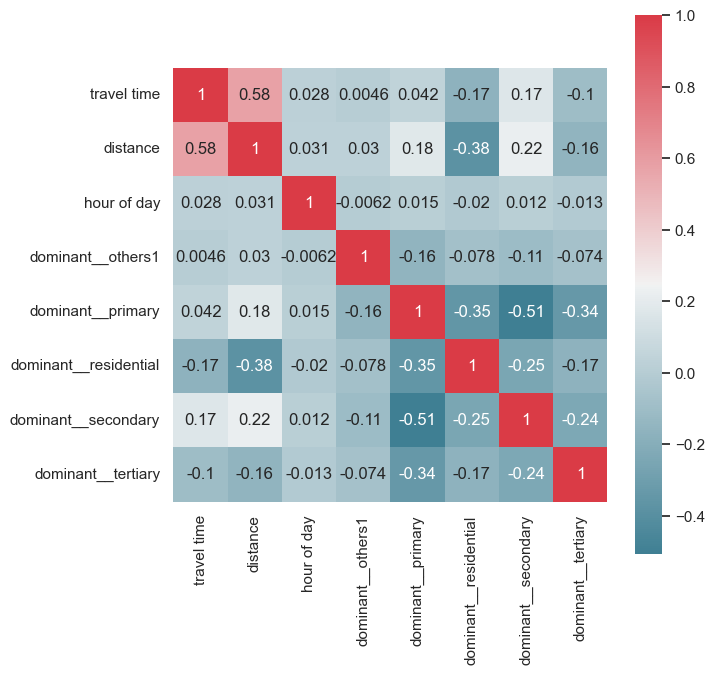

In [56]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7,7))
corr = df1.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [57]:
x = np.array(df1[['distance','dominant__others1','dominant__primary','dominant__residential','dominant__tertiary','dominant__secondary']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df1['travel time'])
x

array([[0.61279136, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.57776337, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.3524139 , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.40882199, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.70879647, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.19746904, 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [58]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6021, 6)
(1506, 6)


In [60]:
# inputs: distance +  dominant road
model3_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_1_1

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1249366.8750 - mape: 99.7505 - rmse: 1117.7509 - val_loss: 1210547.3750 - val_mape: 99.2932 - val_rmse: 1100.2488
Epoch 2/500
189/189 [==============================] - 0s 776us/step - loss: 1224332.1250 - mape: 98.2809 - rmse: 1106.4955 - val_loss: 1171476.7500 - val_mape: 96.9317 - val_rmse: 1082.3478
Epoch 3/500
189/189 [==============================] - 0s 834us/step - loss: 1171085.3750 - mape: 95.0954 - rmse: 1082.1670 - val_loss: 1107016.8750 - val_mape: 92.9261 - val_rmse: 1052.1487
Epoch 4/500
189/189 [==============================] - 0s 833us/step - loss: 1095760.5000 - mape: 90.4149 - rmse: 1046.7858 - val_loss: 1024297.5000 - val_mape: 87.5720 - val_rmse: 1012.0759
Epoch 5/500
189/189 [==============================] - 0s 856us/step - loss: 1005073.6875 - mape: 84.5483 - rmse: 1002.5336 - val_loss: 929480.5625 - val_mape: 81.0973 - val_rmse: 964.0957
Epoch 6/500
189/189 [============================

Epoch 88/500
189/189 [==============================] - 0s 818us/step - loss: 152667.9844 - mape: 34.1339 - rmse: 390.7275 - val_loss: 152611.1406 - val_mape: 34.3566 - val_rmse: 390.6548
Epoch 89/500
189/189 [==============================] - 0s 864us/step - loss: 152611.9375 - mape: 34.2404 - rmse: 390.6558 - val_loss: 152544.8125 - val_mape: 34.2409 - val_rmse: 390.5699
Epoch 90/500
189/189 [==============================] - 0s 732us/step - loss: 152573.0000 - mape: 34.1784 - rmse: 390.6059 - val_loss: 152477.6250 - val_mape: 34.0882 - val_rmse: 390.4838
Epoch 91/500
189/189 [==============================] - 0s 814us/step - loss: 152537.3125 - mape: 33.8834 - rmse: 390.5602 - val_loss: 152521.2188 - val_mape: 34.3307 - val_rmse: 390.5396
Epoch 92/500
189/189 [==============================] - 0s 832us/step - loss: 152507.0938 - mape: 34.0667 - rmse: 390.5216 - val_loss: 152479.6406 - val_mape: 34.2720 - val_rmse: 390.4864
Epoch 93/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 799us/step - loss: 152098.7812 - mape: 33.1641 - rmse: 389.9984 - val_loss: 151944.3125 - val_mape: 33.4447 - val_rmse: 389.8004
Epoch 175/500
189/189 [==============================] - 0s 794us/step - loss: 152084.2656 - mape: 33.2804 - rmse: 389.9798 - val_loss: 151987.5312 - val_mape: 33.5649 - val_rmse: 389.8558
Epoch 176/500
189/189 [==============================] - 0s 818us/step - loss: 152080.5000 - mape: 33.2910 - rmse: 389.9750 - val_loss: 151943.0312 - val_mape: 33.4495 - val_rmse: 389.7987
Epoch 177/500
189/189 [==============================] - 0s 798us/step - loss: 152076.0781 - mape: 33.1168 - rmse: 389.9693 - val_loss: 151935.3594 - val_mape: 33.4262 - val_rmse: 389.7889
Epoch 178/500
189/189 [==============================] - 0s 813us/step - loss: 152089.0156 - mape: 33.2989 - rmse: 389.9859 - val_loss: 151925.2812 - val_mape: 33.3873 - val_rmse: 389.7759
Epoch 179/500
189/189 [==============================] - 0s 791us/ste

189/189 [==============================] - 0s 843us/step - loss: 152045.5938 - mape: 33.3298 - rmse: 389.9302 - val_loss: 151797.2969 - val_mape: 33.1334 - val_rmse: 389.6117
Epoch 261/500
189/189 [==============================] - 0s 812us/step - loss: 152036.8281 - mape: 33.0452 - rmse: 389.9190 - val_loss: 151898.3438 - val_mape: 33.4902 - val_rmse: 389.7414
Epoch 262/500
189/189 [==============================] - 0s 822us/step - loss: 152041.3906 - mape: 33.1446 - rmse: 389.9249 - val_loss: 151886.2188 - val_mape: 33.4478 - val_rmse: 389.7258
Epoch 263/500
189/189 [==============================] - 0s 813us/step - loss: 152046.9375 - mape: 33.2356 - rmse: 389.9320 - val_loss: 151865.7656 - val_mape: 33.3898 - val_rmse: 389.6996
Epoch 264/500
189/189 [==============================] - 0s 802us/step - loss: 152039.9062 - mape: 33.1634 - rmse: 389.9229 - val_loss: 151846.8906 - val_mape: 33.3230 - val_rmse: 389.6754
Epoch 265/500
189/189 [==============================] - 0s 814us/ste

189/189 [==============================] - 0s 811us/step - loss: 152030.2500 - mape: 33.0172 - rmse: 389.9106 - val_loss: 151825.2344 - val_mape: 33.3140 - val_rmse: 389.6476
Epoch 347/500
189/189 [==============================] - 0s 811us/step - loss: 152034.5312 - mape: 33.0287 - rmse: 389.9160 - val_loss: 151847.6406 - val_mape: 33.3807 - val_rmse: 389.6763
Epoch 348/500
189/189 [==============================] - 0s 813us/step - loss: 152031.0312 - mape: 33.1539 - rmse: 389.9116 - val_loss: 151902.5000 - val_mape: 33.5388 - val_rmse: 389.7467
Epoch 349/500
189/189 [==============================] - 0s 804us/step - loss: 152026.9219 - mape: 33.0848 - rmse: 389.9063 - val_loss: 151872.7031 - val_mape: 33.4612 - val_rmse: 389.7085
Epoch 350/500
189/189 [==============================] - 0s 788us/step - loss: 152045.3750 - mape: 33.1780 - rmse: 389.9300 - val_loss: 151884.0469 - val_mape: 33.4878 - val_rmse: 389.7231
Epoch 351/500
189/189 [==============================] - 0s 810us/ste

189/189 [==============================] - 0s 800us/step - loss: 152015.6719 - mape: 33.1039 - rmse: 389.8919 - val_loss: 151834.1250 - val_mape: 33.3896 - val_rmse: 389.6590
Epoch 433/500
189/189 [==============================] - 0s 792us/step - loss: 152012.9531 - mape: 33.1814 - rmse: 389.8884 - val_loss: 151810.7344 - val_mape: 33.3209 - val_rmse: 389.6290
Epoch 434/500
189/189 [==============================] - 0s 817us/step - loss: 152028.1719 - mape: 33.0509 - rmse: 389.9079 - val_loss: 151827.8438 - val_mape: 33.3816 - val_rmse: 389.6509
Epoch 435/500
189/189 [==============================] - 0s 819us/step - loss: 152024.2812 - mape: 33.1450 - rmse: 389.9029 - val_loss: 151803.3906 - val_mape: 33.2953 - val_rmse: 389.6195
Epoch 436/500
189/189 [==============================] - 0s 817us/step - loss: 152021.3125 - mape: 33.2375 - rmse: 389.8991 - val_loss: 151783.1875 - val_mape: 33.2288 - val_rmse: 389.5936
Epoch 437/500
189/189 [==============================] - 0s 810us/ste

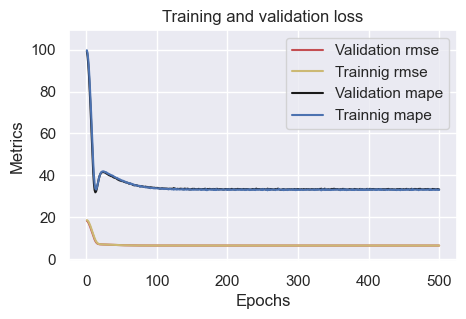

In [61]:
plotme(model3_1_1)


In [62]:
# inputs: distance +  dominant road
model3_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_1_2

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1247519.5000 - mape: 99.6384 - rmse: 1116.9241 - val_loss: 1203221.6250 - val_mape: 98.8367 - val_rmse: 1096.9146
Epoch 2/500
189/189 [==============================] - 0s 760us/step - loss: 1204226.0000 - mape: 97.0816 - rmse: 1097.3723 - val_loss: 1135963.2500 - val_mape: 94.7075 - val_rmse: 1065.8158
Epoch 3/500
189/189 [==============================] - 0s 769us/step - loss: 1114270.1250 - mape: 91.4960 - rmse: 1055.5900 - val_loss: 1028139.2500 - val_mape: 87.7757 - val_rmse: 1013.9720
Epoch 4/500
189/189 [==============================] - 0s 761us/step - loss: 990580.3750 - mape: 83.5015 - rmse: 995.2791 - val_loss: 895303.6250 - val_mape: 78.6060 - val_rmse: 946.2048
Epoch 5/500
189/189 [==============================] - 0s 770us/step - loss: 848939.5625 - mape: 73.6135 - rmse: 921.3792 - val_loss: 752925.4375 - val_mape: 67.9076 - val_rmse: 867.7128
Epoch 6/500
189/189 [==============================] - 

Epoch 88/500
189/189 [==============================] - 0s 767us/step - loss: 152060.7656 - mape: 33.4842 - rmse: 389.9497 - val_loss: 151940.3281 - val_mape: 33.6239 - val_rmse: 389.7952
Epoch 89/500
189/189 [==============================] - 0s 762us/step - loss: 152034.2344 - mape: 33.2925 - rmse: 389.9157 - val_loss: 152000.8594 - val_mape: 33.8190 - val_rmse: 389.8729
Epoch 90/500
189/189 [==============================] - 0s 766us/step - loss: 152057.1250 - mape: 33.2768 - rmse: 389.9450 - val_loss: 151972.6562 - val_mape: 33.7469 - val_rmse: 389.8367
Epoch 91/500
189/189 [==============================] - 0s 763us/step - loss: 152028.5156 - mape: 33.4190 - rmse: 389.9084 - val_loss: 151942.3438 - val_mape: 33.6856 - val_rmse: 389.7978
Epoch 92/500
189/189 [==============================] - 0s 765us/step - loss: 152029.7969 - mape: 33.2069 - rmse: 389.9100 - val_loss: 151971.5312 - val_mape: 33.7642 - val_rmse: 389.8353
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 759us/step - loss: 151854.4062 - mape: 33.1370 - rmse: 389.6850 - val_loss: 151687.7500 - val_mape: 33.5506 - val_rmse: 389.4711
Epoch 175/500
189/189 [==============================] - 0s 768us/step - loss: 151839.2188 - mape: 33.1654 - rmse: 389.6655 - val_loss: 151664.6875 - val_mape: 33.4947 - val_rmse: 389.4415
Epoch 176/500
189/189 [==============================] - 0s 760us/step - loss: 151831.0938 - mape: 33.1871 - rmse: 389.6551 - val_loss: 151604.9219 - val_mape: 33.3463 - val_rmse: 389.3648
Epoch 177/500
189/189 [==============================] - 0s 761us/step - loss: 151850.9375 - mape: 33.2565 - rmse: 389.6806 - val_loss: 151575.7656 - val_mape: 33.2618 - val_rmse: 389.3273
Epoch 178/500
189/189 [==============================] - 0s 771us/step - loss: 151834.7188 - mape: 32.9371 - rmse: 389.6598 - val_loss: 151611.7031 - val_mape: 33.3846 - val_rmse: 389.3735
Epoch 179/500
189/189 [==============================] - 0s 766us/ste

189/189 [==============================] - 0s 763us/step - loss: 151769.7500 - mape: 33.1141 - rmse: 389.5764 - val_loss: 151539.7031 - val_mape: 33.3545 - val_rmse: 389.2810
Epoch 261/500
189/189 [==============================] - 0s 770us/step - loss: 151779.2656 - mape: 33.1479 - rmse: 389.5886 - val_loss: 151589.5000 - val_mape: 33.4984 - val_rmse: 389.3450
Epoch 262/500
189/189 [==============================] - 0s 776us/step - loss: 151784.7188 - mape: 33.0438 - rmse: 389.5956 - val_loss: 151637.4688 - val_mape: 33.6121 - val_rmse: 389.4066
Epoch 263/500
189/189 [==============================] - 0s 778us/step - loss: 151778.5625 - mape: 33.2670 - rmse: 389.5877 - val_loss: 151504.2500 - val_mape: 33.2540 - val_rmse: 389.2355
Epoch 264/500
189/189 [==============================] - 0s 755us/step - loss: 151765.7344 - mape: 33.0858 - rmse: 389.5712 - val_loss: 151496.4844 - val_mape: 33.2441 - val_rmse: 389.2255
Epoch 265/500
189/189 [==============================] - 0s 780us/ste

189/189 [==============================] - 0s 760us/step - loss: 151727.0625 - mape: 33.0759 - rmse: 389.5216 - val_loss: 151442.1094 - val_mape: 33.2718 - val_rmse: 389.1556
Epoch 347/500
189/189 [==============================] - 0s 751us/step - loss: 151724.0938 - mape: 33.2467 - rmse: 389.5178 - val_loss: 151365.6875 - val_mape: 32.9865 - val_rmse: 389.0574
Epoch 348/500
189/189 [==============================] - 0s 754us/step - loss: 151737.5000 - mape: 32.9168 - rmse: 389.5350 - val_loss: 151424.4062 - val_mape: 33.2210 - val_rmse: 389.1329
Epoch 349/500
189/189 [==============================] - 0s 758us/step - loss: 151764.3906 - mape: 33.1355 - rmse: 389.5695 - val_loss: 151531.5781 - val_mape: 33.5546 - val_rmse: 389.2706
Epoch 350/500
189/189 [==============================] - 0s 753us/step - loss: 151718.4688 - mape: 33.1397 - rmse: 389.5106 - val_loss: 151451.8750 - val_mape: 33.3205 - val_rmse: 389.1682
Epoch 351/500
189/189 [==============================] - 0s 777us/ste

189/189 [==============================] - 0s 801us/step - loss: 151682.8750 - mape: 33.0443 - rmse: 389.4648 - val_loss: 151370.6094 - val_mape: 33.2564 - val_rmse: 389.0638
Epoch 433/500
189/189 [==============================] - 0s 767us/step - loss: 151669.5000 - mape: 33.0466 - rmse: 389.4477 - val_loss: 151391.3125 - val_mape: 33.3211 - val_rmse: 389.0904
Epoch 434/500
189/189 [==============================] - 0s 770us/step - loss: 151665.2500 - mape: 33.1208 - rmse: 389.4422 - val_loss: 151330.4531 - val_mape: 33.1152 - val_rmse: 389.0121
Epoch 435/500
189/189 [==============================] - 0s 761us/step - loss: 151666.4844 - mape: 32.9321 - rmse: 389.4438 - val_loss: 151441.4219 - val_mape: 33.4533 - val_rmse: 389.1548
Epoch 436/500
189/189 [==============================] - 0s 776us/step - loss: 151690.4531 - mape: 33.1035 - rmse: 389.4746 - val_loss: 151427.4219 - val_mape: 33.4303 - val_rmse: 389.1368
Epoch 437/500
189/189 [==============================] - 0s 764us/ste

In [64]:
# inputs: distance +  dominant road
model3_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model3_1_3

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1238421.7500 - mape: 99.0962 - rmse: 1112.8440 - val_loss: 1174857.5000 - val_mape: 97.1278 - val_rmse: 1083.9084
Epoch 2/500
189/189 [==============================] - 0s 792us/step - loss: 1135766.1250 - mape: 92.8846 - rmse: 1065.7233 - val_loss: 1021067.5625 - val_mape: 87.3275 - val_rmse: 1010.4789
Epoch 3/500
189/189 [==============================] - 0s 815us/step - loss: 941507.6875 - mape: 80.1993 - rmse: 970.3132 - val_loss: 801701.0625 - val_mape: 71.7253 - val_rmse: 895.3776
Epoch 4/500
189/189 [==============================] - 0s 776us/step - loss: 708877.0625 - mape: 62.9205 - rmse: 841.9484 - val_loss: 575784.6875 - val_mape: 52.9944 - val_rmse: 758.8047
Epoch 5/500
189/189 [==============================] - 0s 789us/step - loss: 495296.5625 - mape: 45.3354 - rmse: 703.7731 - val_loss: 391710.2500 - val_mape: 37.1939 - val_rmse: 625.8676
Epoch 6/500
189/189 [==============================] - 0s 7

Epoch 88/500
189/189 [==============================] - 0s 791us/step - loss: 152029.8125 - mape: 33.0303 - rmse: 389.9100 - val_loss: 151764.8594 - val_mape: 33.3596 - val_rmse: 389.5701
Epoch 89/500
189/189 [==============================] - 0s 772us/step - loss: 151924.8125 - mape: 33.3607 - rmse: 389.7753 - val_loss: 151647.8438 - val_mape: 32.7352 - val_rmse: 389.4199
Epoch 90/500
189/189 [==============================] - 0s 776us/step - loss: 151952.2188 - mape: 32.8156 - rmse: 389.8105 - val_loss: 151909.1562 - val_mape: 33.7509 - val_rmse: 389.7552
Epoch 91/500
189/189 [==============================] - 0s 795us/step - loss: 151977.7031 - mape: 33.2880 - rmse: 389.8432 - val_loss: 151785.9688 - val_mape: 33.4617 - val_rmse: 389.5972
Epoch 92/500
189/189 [==============================] - 0s 794us/step - loss: 151959.9531 - mape: 33.2375 - rmse: 389.8204 - val_loss: 151737.4062 - val_mape: 33.3095 - val_rmse: 389.5349
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 781us/step - loss: 151779.5938 - mape: 33.0794 - rmse: 389.5890 - val_loss: 151435.6094 - val_mape: 33.1470 - val_rmse: 389.1473
Epoch 175/500
189/189 [==============================] - 0s 783us/step - loss: 151773.4688 - mape: 33.2083 - rmse: 389.5811 - val_loss: 151521.2500 - val_mape: 33.4544 - val_rmse: 389.2573
Epoch 176/500
189/189 [==============================] - 0s 785us/step - loss: 151787.6562 - mape: 33.2298 - rmse: 389.5994 - val_loss: 151429.6562 - val_mape: 33.2009 - val_rmse: 389.1396
Epoch 177/500
189/189 [==============================] - 0s 781us/step - loss: 151762.7969 - mape: 33.0400 - rmse: 389.5674 - val_loss: 151524.2031 - val_mape: 33.4508 - val_rmse: 389.2611
Epoch 178/500
189/189 [==============================] - 0s 779us/step - loss: 151789.0000 - mape: 33.1259 - rmse: 389.6011 - val_loss: 151475.0625 - val_mape: 33.3274 - val_rmse: 389.1980
Epoch 179/500
189/189 [==============================] - 0s 804us/ste

189/189 [==============================] - 0s 792us/step - loss: 151611.9531 - mape: 32.9460 - rmse: 389.3738 - val_loss: 151264.7812 - val_mape: 33.3601 - val_rmse: 388.9277
Epoch 261/500
189/189 [==============================] - 0s 777us/step - loss: 151594.2344 - mape: 33.1191 - rmse: 389.3510 - val_loss: 151217.0156 - val_mape: 33.2206 - val_rmse: 388.8663
Epoch 262/500
189/189 [==============================] - 0s 794us/step - loss: 151585.0781 - mape: 33.0151 - rmse: 389.3393 - val_loss: 151231.6562 - val_mape: 33.2719 - val_rmse: 388.8851
Epoch 263/500
189/189 [==============================] - 0s 779us/step - loss: 151576.8906 - mape: 33.0855 - rmse: 389.3288 - val_loss: 151328.0156 - val_mape: 33.5477 - val_rmse: 389.0090
Epoch 264/500
189/189 [==============================] - 0s 781us/step - loss: 151606.3125 - mape: 33.1863 - rmse: 389.3665 - val_loss: 151205.4688 - val_mape: 33.1732 - val_rmse: 388.8515
Epoch 265/500
189/189 [==============================] - 0s 772us/ste

189/189 [==============================] - 0s 780us/step - loss: 151412.5938 - mape: 32.8439 - rmse: 389.1177 - val_loss: 151206.3750 - val_mape: 33.7292 - val_rmse: 388.8526
Epoch 347/500
189/189 [==============================] - 0s 788us/step - loss: 151438.7969 - mape: 33.0879 - rmse: 389.1514 - val_loss: 151042.1875 - val_mape: 33.3538 - val_rmse: 388.6414
Epoch 348/500
189/189 [==============================] - 0s 783us/step - loss: 151439.3594 - mape: 33.0848 - rmse: 389.1521 - val_loss: 150981.5938 - val_mape: 33.1817 - val_rmse: 388.5635
Epoch 349/500
189/189 [==============================] - 0s 775us/step - loss: 151410.2969 - mape: 33.1188 - rmse: 389.1147 - val_loss: 150919.1719 - val_mape: 32.9241 - val_rmse: 388.4832
Epoch 350/500
189/189 [==============================] - 0s 834us/step - loss: 151432.6250 - mape: 32.9042 - rmse: 389.1435 - val_loss: 151023.4688 - val_mape: 33.3316 - val_rmse: 388.6174
Epoch 351/500
189/189 [==============================] - 0s 792us/ste

189/189 [==============================] - 0s 793us/step - loss: 151313.3438 - mape: 33.1964 - rmse: 388.9902 - val_loss: 150917.2812 - val_mape: 33.5328 - val_rmse: 388.4807
Epoch 433/500
189/189 [==============================] - 0s 776us/step - loss: 151309.4375 - mape: 33.0391 - rmse: 388.9851 - val_loss: 150821.9844 - val_mape: 33.2708 - val_rmse: 388.3581
Epoch 434/500
189/189 [==============================] - 0s 784us/step - loss: 151314.2031 - mape: 32.9032 - rmse: 388.9913 - val_loss: 151007.0469 - val_mape: 33.7131 - val_rmse: 388.5963
Epoch 435/500
189/189 [==============================] - 0s 778us/step - loss: 151312.0469 - mape: 33.1443 - rmse: 388.9885 - val_loss: 150845.8594 - val_mape: 33.3409 - val_rmse: 388.3888
Epoch 436/500
189/189 [==============================] - 0s 777us/step - loss: 151296.2344 - mape: 32.9966 - rmse: 388.9682 - val_loss: 150899.3281 - val_mape: 33.4904 - val_rmse: 388.4576
Epoch 437/500
189/189 [==============================] - 0s 779us/ste

In [66]:
# inputs: distance +  dominant road
model3_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_1_4

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1158915.8750 - mape: 94.3500 - rmse: 1076.5295 - val_loss: 834321.5000 - val_mape: 74.2335 - val_rmse: 913.4120
Epoch 2/500
189/189 [==============================] - 0s 821us/step - loss: 397505.8438 - mape: 44.0401 - rmse: 630.4807 - val_loss: 182214.6719 - val_mape: 40.1674 - val_rmse: 426.8661
Epoch 3/500
189/189 [==============================] - 0s 797us/step - loss: 178680.0469 - mape: 42.1661 - rmse: 422.7056 - val_loss: 175309.9375 - val_mape: 41.4460 - val_rmse: 418.7003
Epoch 4/500
189/189 [==============================] - 0s 825us/step - loss: 173564.0156 - mape: 41.2353 - rmse: 416.6101 - val_loss: 171334.9219 - val_mape: 40.8823 - val_rmse: 413.9262
Epoch 5/500
189/189 [==============================] - 0s 802us/step - loss: 169682.8906 - mape: 40.3481 - rmse: 411.9258 - val_loss: 167540.0625 - val_mape: 39.1977 - val_rmse: 409.3166
Epoch 6/500
189/189 [==============================] - 0s 811us/s

Epoch 45/500
189/189 [==============================] - 0s 820us/step - loss: 152529.2344 - mape: 33.3647 - rmse: 390.5499 - val_loss: 151999.5156 - val_mape: 33.0079 - val_rmse: 389.8712
Epoch 46/500
189/189 [==============================] - 0s 813us/step - loss: 152403.5156 - mape: 33.0657 - rmse: 390.3889 - val_loss: 152209.0156 - val_mape: 33.7394 - val_rmse: 390.1397
Epoch 47/500
189/189 [==============================] - 0s 808us/step - loss: 152486.9531 - mape: 33.3966 - rmse: 390.4958 - val_loss: 152055.6562 - val_mape: 32.0954 - val_rmse: 389.9431
Epoch 48/500
189/189 [==============================] - 0s 824us/step - loss: 152405.4062 - mape: 33.1110 - rmse: 390.3914 - val_loss: 152477.9219 - val_mape: 34.2614 - val_rmse: 390.4842
Epoch 49/500
189/189 [==============================] - 0s 808us/step - loss: 152724.3281 - mape: 33.4088 - rmse: 390.7996 - val_loss: 152020.0000 - val_mape: 33.1164 - val_rmse: 389.8974
Epoch 50/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 811us/step - loss: 152317.6875 - mape: 33.1964 - rmse: 390.2790 - val_loss: 151993.1562 - val_mape: 32.9684 - val_rmse: 389.8630
Epoch 132/500
189/189 [==============================] - 0s 811us/step - loss: 152412.6875 - mape: 32.9960 - rmse: 390.4007 - val_loss: 153337.5469 - val_mape: 35.1106 - val_rmse: 391.5834
Epoch 133/500
189/189 [==============================] - 0s 817us/step - loss: 152607.0625 - mape: 33.4173 - rmse: 390.6495 - val_loss: 152041.5156 - val_mape: 33.2279 - val_rmse: 389.9250
Epoch 134/500
189/189 [==============================] - 0s 807us/step - loss: 152472.0000 - mape: 33.3941 - rmse: 390.4766 - val_loss: 151995.7656 - val_mape: 33.0679 - val_rmse: 389.8663
Epoch 135/500
189/189 [==============================] - 0s 807us/step - loss: 152364.7812 - mape: 33.0350 - rmse: 390.3393 - val_loss: 152685.3125 - val_mape: 34.5469 - val_rmse: 390.7497
Epoch 136/500
189/189 [==============================] - 0s 797us/ste

189/189 [==============================] - 0s 823us/step - loss: 152360.3438 - mape: 33.1533 - rmse: 390.3336 - val_loss: 152032.9531 - val_mape: 32.1754 - val_rmse: 389.9140
Epoch 218/500
189/189 [==============================] - 0s 816us/step - loss: 152352.4844 - mape: 33.3493 - rmse: 390.3236 - val_loss: 152884.0312 - val_mape: 34.7571 - val_rmse: 391.0039
Epoch 219/500
189/189 [==============================] - 0s 812us/step - loss: 152536.5312 - mape: 33.2092 - rmse: 390.5593 - val_loss: 151978.8594 - val_mape: 32.7017 - val_rmse: 389.8447
Epoch 220/500
189/189 [==============================] - 0s 829us/step - loss: 152365.5156 - mape: 33.1458 - rmse: 390.3403 - val_loss: 152010.1719 - val_mape: 32.3827 - val_rmse: 389.8848
Epoch 221/500
189/189 [==============================] - 0s 813us/step - loss: 152443.9219 - mape: 33.2648 - rmse: 390.4407 - val_loss: 152029.3750 - val_mape: 32.2621 - val_rmse: 389.9095
Epoch 222/500
189/189 [==============================] - 0s 806us/ste

189/189 [==============================] - 0s 802us/step - loss: 152421.4062 - mape: 33.0224 - rmse: 390.4118 - val_loss: 152237.4688 - val_mape: 33.8006 - val_rmse: 390.1762
Epoch 304/500
189/189 [==============================] - 0s 802us/step - loss: 152460.0312 - mape: 33.3742 - rmse: 390.4613 - val_loss: 152052.0312 - val_mape: 32.0815 - val_rmse: 389.9385
Epoch 305/500
189/189 [==============================] - 0s 806us/step - loss: 152462.9531 - mape: 33.1945 - rmse: 390.4651 - val_loss: 152133.3594 - val_mape: 33.5381 - val_rmse: 390.0428
Epoch 306/500
189/189 [==============================] - 0s 804us/step - loss: 152399.2500 - mape: 33.1430 - rmse: 390.3835 - val_loss: 152266.9844 - val_mape: 33.9067 - val_rmse: 390.2140
Epoch 307/500
189/189 [==============================] - 0s 811us/step - loss: 152438.6719 - mape: 33.3956 - rmse: 390.4340 - val_loss: 152439.2656 - val_mape: 34.1974 - val_rmse: 390.4347
Epoch 308/500
189/189 [==============================] - 0s 820us/ste

189/189 [==============================] - 0s 794us/step - loss: 152404.4531 - mape: 33.2770 - rmse: 390.3901 - val_loss: 151972.5000 - val_mape: 32.5330 - val_rmse: 389.8365
Epoch 390/500
189/189 [==============================] - 0s 809us/step - loss: 152372.5000 - mape: 33.1817 - rmse: 390.3492 - val_loss: 152069.3281 - val_mape: 33.3198 - val_rmse: 389.9607
Epoch 391/500
189/189 [==============================] - 0s 810us/step - loss: 152302.7969 - mape: 33.0338 - rmse: 390.2599 - val_loss: 152998.5156 - val_mape: 34.8678 - val_rmse: 391.1502
Epoch 392/500
189/189 [==============================] - 0s 807us/step - loss: 152426.0938 - mape: 33.4303 - rmse: 390.4178 - val_loss: 152081.8281 - val_mape: 31.9119 - val_rmse: 389.9767
Epoch 393/500
189/189 [==============================] - 0s 812us/step - loss: 152400.9219 - mape: 32.9085 - rmse: 390.3856 - val_loss: 152468.9219 - val_mape: 34.2335 - val_rmse: 390.4727
Epoch 394/500
189/189 [==============================] - 0s 803us/ste

189/189 [==============================] - 0s 808us/step - loss: 152481.0312 - mape: 33.2359 - rmse: 390.4882 - val_loss: 152274.4219 - val_mape: 33.8840 - val_rmse: 390.2235
Epoch 476/500
189/189 [==============================] - 0s 807us/step - loss: 152350.8750 - mape: 33.2138 - rmse: 390.3215 - val_loss: 152767.9062 - val_mape: 34.6283 - val_rmse: 390.8553
Epoch 477/500
189/189 [==============================] - 0s 805us/step - loss: 152384.2031 - mape: 33.2587 - rmse: 390.3642 - val_loss: 152957.1094 - val_mape: 34.8817 - val_rmse: 391.0973
Epoch 478/500
189/189 [==============================] - 0s 806us/step - loss: 152526.7500 - mape: 33.4072 - rmse: 390.5467 - val_loss: 152260.6875 - val_mape: 33.9199 - val_rmse: 390.2060
Epoch 479/500
189/189 [==============================] - 0s 803us/step - loss: 152475.8281 - mape: 33.2117 - rmse: 390.4815 - val_loss: 152237.6875 - val_mape: 33.7834 - val_rmse: 390.1765
Epoch 480/500
189/189 [==============================] - 0s 798us/ste

In [68]:
# inputs: distance +  dominant road
model3_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_1_5

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 961788.0625 - mape: 80.1382 - rmse: 980.7079 - val_loss: 273072.4375 - val_mape: 31.8601 - val_rmse: 522.5634
Epoch 2/500
189/189 [==============================] - 0s 894us/step - loss: 186904.3125 - mape: 40.6399 - rmse: 432.3243 - val_loss: 174316.6094 - val_mape: 41.6042 - val_rmse: 417.5124
Epoch 3/500
189/189 [==============================] - 0s 889us/step - loss: 171690.7656 - mape: 40.8157 - rmse: 414.3558 - val_loss: 168754.0156 - val_mape: 40.8065 - val_rmse: 410.7968
Epoch 4/500
189/189 [==============================] - 0s 890us/step - loss: 165899.9688 - mape: 39.3624 - rmse: 407.3082 - val_loss: 163099.4062 - val_mape: 37.8163 - val_rmse: 403.8557
Epoch 5/500
189/189 [==============================] - 0s 896us/step - loss: 161417.8750 - mape: 37.9579 - rmse: 401.7684 - val_loss: 159459.4375 - val_mape: 37.9884 - val_rmse: 399.3237
Epoch 6/500
189/189 [==============================] - 0s 892us/ste

Epoch 45/500
189/189 [==============================] - 0s 894us/step - loss: 152153.2031 - mape: 33.2602 - rmse: 390.0682 - val_loss: 151439.7500 - val_mape: 33.1654 - val_rmse: 389.1526
Epoch 46/500
189/189 [==============================] - 0s 889us/step - loss: 151923.4531 - mape: 33.2363 - rmse: 389.7736 - val_loss: 151875.0625 - val_mape: 31.0692 - val_rmse: 389.7115
Epoch 47/500
189/189 [==============================] - 0s 899us/step - loss: 151662.4219 - mape: 33.0349 - rmse: 389.4386 - val_loss: 151327.0938 - val_mape: 32.6045 - val_rmse: 389.0078
Epoch 48/500
189/189 [==============================] - 0s 895us/step - loss: 152104.1719 - mape: 33.1569 - rmse: 390.0053 - val_loss: 151786.1406 - val_mape: 33.9971 - val_rmse: 389.5974
Epoch 49/500
189/189 [==============================] - 0s 880us/step - loss: 151904.7031 - mape: 32.9231 - rmse: 389.7495 - val_loss: 152029.5625 - val_mape: 34.3420 - val_rmse: 389.9097
Epoch 50/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 892us/step - loss: 150251.5469 - mape: 32.7596 - rmse: 387.6230 - val_loss: 151967.5156 - val_mape: 35.4504 - val_rmse: 389.8301
Epoch 132/500
189/189 [==============================] - 0s 878us/step - loss: 150576.0312 - mape: 33.1946 - rmse: 388.0413 - val_loss: 150133.6562 - val_mape: 31.7281 - val_rmse: 387.4709
Epoch 133/500
189/189 [==============================] - 0s 884us/step - loss: 150431.8281 - mape: 32.9356 - rmse: 387.8554 - val_loss: 150168.5312 - val_mape: 33.1716 - val_rmse: 387.5158
Epoch 134/500
189/189 [==============================] - 0s 874us/step - loss: 150356.5000 - mape: 32.7325 - rmse: 387.7583 - val_loss: 151106.3125 - val_mape: 34.8168 - val_rmse: 388.7240
Epoch 135/500
189/189 [==============================] - 0s 888us/step - loss: 150383.4062 - mape: 32.9165 - rmse: 387.7930 - val_loss: 150198.2188 - val_mape: 33.4363 - val_rmse: 387.5541
Epoch 136/500
189/189 [==============================] - 0s 894us/ste

189/189 [==============================] - 0s 890us/step - loss: 149394.7656 - mape: 32.7464 - rmse: 386.5162 - val_loss: 150737.4375 - val_mape: 34.8444 - val_rmse: 388.2492
Epoch 218/500
189/189 [==============================] - 0s 875us/step - loss: 149468.1406 - mape: 32.9837 - rmse: 386.6111 - val_loss: 149360.9531 - val_mape: 32.3194 - val_rmse: 386.4724
Epoch 219/500
189/189 [==============================] - 0s 882us/step - loss: 149229.6250 - mape: 32.8660 - rmse: 386.3025 - val_loss: 149597.3281 - val_mape: 33.3985 - val_rmse: 386.7781
Epoch 220/500
189/189 [==============================] - 0s 874us/step - loss: 149322.0312 - mape: 32.7564 - rmse: 386.4221 - val_loss: 149458.7500 - val_mape: 32.2292 - val_rmse: 386.5989
Epoch 221/500
189/189 [==============================] - 0s 885us/step - loss: 149344.1875 - mape: 32.9656 - rmse: 386.4507 - val_loss: 149384.0625 - val_mape: 31.9356 - val_rmse: 386.5023
Epoch 222/500
189/189 [==============================] - 0s 876us/ste

189/189 [==============================] - 0s 891us/step - loss: 148603.7188 - mape: 32.7264 - rmse: 385.4915 - val_loss: 149398.5938 - val_mape: 33.8991 - val_rmse: 386.5211
Epoch 304/500
189/189 [==============================] - 0s 881us/step - loss: 148544.5781 - mape: 32.8597 - rmse: 385.4148 - val_loss: 149481.7188 - val_mape: 33.8348 - val_rmse: 386.6287
Epoch 305/500
189/189 [==============================] - 0s 889us/step - loss: 148848.0000 - mape: 32.6440 - rmse: 385.8082 - val_loss: 149179.0000 - val_mape: 33.4535 - val_rmse: 386.2370
Epoch 306/500
189/189 [==============================] - 0s 891us/step - loss: 148637.4375 - mape: 32.6463 - rmse: 385.5352 - val_loss: 150487.6875 - val_mape: 35.2051 - val_rmse: 387.9274
Epoch 307/500
189/189 [==============================] - 0s 890us/step - loss: 148850.3750 - mape: 32.8811 - rmse: 385.8113 - val_loss: 149561.3125 - val_mape: 34.2595 - val_rmse: 386.7316
Epoch 308/500
189/189 [==============================] - 0s 887us/ste

189/189 [==============================] - 0s 909us/step - loss: 148086.3750 - mape: 32.7012 - rmse: 384.8199 - val_loss: 148659.7031 - val_mape: 31.8799 - val_rmse: 385.5641
Epoch 390/500
189/189 [==============================] - 0s 886us/step - loss: 148359.7969 - mape: 32.4969 - rmse: 385.1750 - val_loss: 149293.8750 - val_mape: 34.0416 - val_rmse: 386.3857
Epoch 391/500
189/189 [==============================] - 0s 892us/step - loss: 147956.8125 - mape: 32.9911 - rmse: 384.6516 - val_loss: 148756.4688 - val_mape: 31.8645 - val_rmse: 385.6896
Epoch 392/500
189/189 [==============================] - 0s 888us/step - loss: 148315.5312 - mape: 32.5744 - rmse: 385.1176 - val_loss: 148683.8906 - val_mape: 32.4997 - val_rmse: 385.5955
Epoch 393/500
189/189 [==============================] - 0s 880us/step - loss: 148361.0781 - mape: 32.5512 - rmse: 385.1767 - val_loss: 148652.1250 - val_mape: 31.9923 - val_rmse: 385.5543
Epoch 394/500
189/189 [==============================] - 0s 879us/ste

189/189 [==============================] - 0s 889us/step - loss: 147536.5156 - mape: 32.9036 - rmse: 384.1048 - val_loss: 148662.0156 - val_mape: 32.5673 - val_rmse: 385.5671
Epoch 476/500
189/189 [==============================] - 0s 901us/step - loss: 147629.0156 - mape: 32.6314 - rmse: 384.2252 - val_loss: 149367.8125 - val_mape: 34.3895 - val_rmse: 386.4813
Epoch 477/500
189/189 [==============================] - 0s 887us/step - loss: 147484.6094 - mape: 32.7917 - rmse: 384.0373 - val_loss: 148579.0000 - val_mape: 32.0077 - val_rmse: 385.4595
Epoch 478/500
189/189 [==============================] - 0s 889us/step - loss: 147669.0781 - mape: 32.7009 - rmse: 384.2773 - val_loss: 148800.8281 - val_mape: 33.0011 - val_rmse: 385.7471
Epoch 479/500
189/189 [==============================] - 0s 896us/step - loss: 147576.0938 - mape: 32.5891 - rmse: 384.1563 - val_loss: 149042.3125 - val_mape: 33.6864 - val_rmse: 386.0600
Epoch 480/500
189/189 [==============================] - 0s 884us/ste

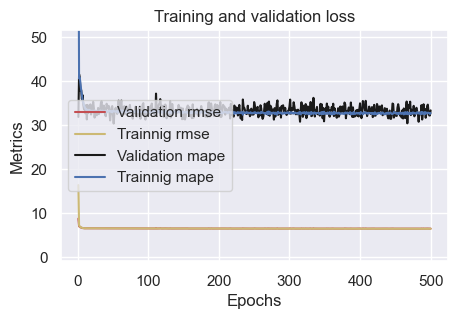

In [81]:
plotme(model3_1_5)

#### 2. Target (mean) encoding of dominated roadtype

In [69]:
df2 = df.iloc[:,0:6].copy()
df2 = df2.drop('hour of day',axis=1)
df2.head()

travel time  distance    hr_sin        hr_cos 1st ranked
0         1562  0.612791 -0.965926 -2.588190e-01    primary
1         1247  0.577763 -0.258819  9.659258e-01    primary
2          823  0.352414  1.000000  6.123234e-17    primary
3         1066  0.446486 -0.500000 -8.660254e-01    primary
4          665  0.307363 -0.965926 -2.588190e-01    primary

In [70]:
te = TargetEncoder()
df2['1st ranked'] = te.fit_transform(df2['1st ranked'],df2['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [71]:
df2.head()

travel time  distance    hr_sin        hr_cos   1st ranked
0         1562  0.612791 -0.965926 -2.588190e-01  1032.134774
1         1247  0.577763 -0.258819  9.659258e-01  1032.134774
2          823  0.352414  1.000000  6.123234e-17  1032.134774
3         1066  0.446486 -0.500000 -8.660254e-01  1032.134774
4          665  0.307363 -0.965926 -2.588190e-01  1032.134774

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

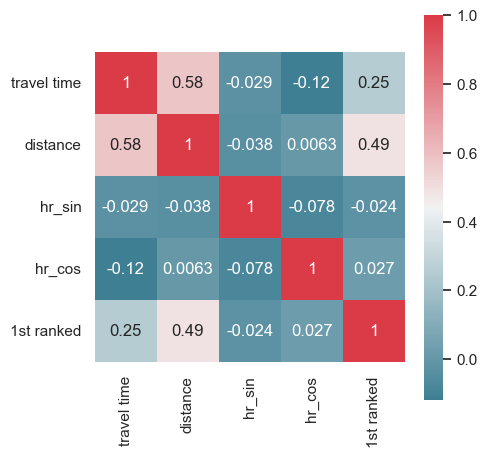

In [72]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(5,5))
corr = df2.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [73]:
x = np.array(df2[['distance','hr_sin','hr_cos','1st ranked']])
y = np.array(df2['travel time'])
x

array([[ 6.12791363e-01, -9.65925826e-01, -2.58819045e-01,
         1.03213477e+03],
       [ 5.77763367e-01, -2.58819045e-01,  9.65925826e-01,
         1.03213477e+03],
       [ 3.52413898e-01,  1.00000000e+00,  6.12323400e-17,
         1.03213477e+03],
       ...,
       [ 4.08821988e-01, -8.66025404e-01, -5.00000000e-01,
         1.03213477e+03],
       [ 7.08796471e-01, -9.65925826e-01,  2.58819045e-01,
         1.03213477e+03],
       [ 1.97469039e-01, -8.66025404e-01,  5.00000000e-01,
         8.82589669e+02]])

In [74]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6021, 4)
(1506, 4)


In [76]:
# inputs: distance + hour + dominant road
model3_3_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_3_1

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 332792.3125 - mape: 45.6531 - rmse: 576.8815 - val_loss: 214589.5938 - val_mape: 45.1852 - val_rmse: 463.2382
Epoch 2/500
189/189 [==============================] - 0s 812us/step - loss: 215792.3594 - mape: 46.8893 - rmse: 464.5346 - val_loss: 214587.5000 - val_mape: 45.8580 - val_rmse: 463.2359
Epoch 3/500
189/189 [==============================] - 0s 1ms/step - loss: 215700.3281 - mape: 46.8700 - rmse: 464.4355 - val_loss: 215250.6406 - val_mape: 47.2491 - val_rmse: 463.9511
Epoch 4/500
189/189 [==============================] - 0s 749us/step - loss: 215638.0000 - mape: 46.9301 - rmse: 464.3684 - val_loss: 214587.8750 - val_mape: 46.3351 - val_rmse: 463.2363
Epoch 5/500
189/189 [==============================] - 0s 719us/step - loss: 215686.4844 - mape: 46.8419 - rmse: 464.4206 - val_loss: 214293.1250 - val_mape: 44.7908 - val_rmse: 462.9181
Epoch 6/500
189/189 [==============================] - 0s 763us/step 

Epoch 45/500
189/189 [==============================] - 0s 744us/step - loss: 206740.0312 - mape: 45.4983 - rmse: 454.6867 - val_loss: 205809.9062 - val_mape: 44.0107 - val_rmse: 453.6628
Epoch 46/500
189/189 [==============================] - 0s 757us/step - loss: 206454.3438 - mape: 45.5876 - rmse: 454.3725 - val_loss: 206280.2812 - val_mape: 45.9973 - val_rmse: 454.1809
Epoch 47/500
189/189 [==============================] - 0s 750us/step - loss: 206270.2656 - mape: 45.2040 - rmse: 454.1699 - val_loss: 206126.2969 - val_mape: 46.1718 - val_rmse: 454.0114
Epoch 48/500
189/189 [==============================] - 0s 770us/step - loss: 205402.5625 - mape: 45.4561 - rmse: 453.2136 - val_loss: 204763.8125 - val_mape: 43.6803 - val_rmse: 452.5084
Epoch 49/500
189/189 [==============================] - 0s 739us/step - loss: 204922.0938 - mape: 45.1542 - rmse: 452.6832 - val_loss: 204520.2031 - val_mape: 44.6194 - val_rmse: 452.2391
Epoch 50/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 758us/step - loss: 169944.0938 - mape: 38.1322 - rmse: 412.2428 - val_loss: 171760.6719 - val_mape: 39.6822 - val_rmse: 414.4402
Epoch 132/500
189/189 [==============================] - 0s 734us/step - loss: 169153.3281 - mape: 37.7710 - rmse: 411.2825 - val_loss: 170169.7500 - val_mape: 37.9428 - val_rmse: 412.5164
Epoch 133/500
189/189 [==============================] - 0s 720us/step - loss: 169427.4062 - mape: 38.0811 - rmse: 411.6156 - val_loss: 171010.9844 - val_mape: 39.4272 - val_rmse: 413.5347
Epoch 134/500
189/189 [==============================] - 0s 738us/step - loss: 168564.0469 - mape: 37.7469 - rmse: 410.5655 - val_loss: 169135.5156 - val_mape: 37.0946 - val_rmse: 411.2609
Epoch 135/500
189/189 [==============================] - 0s 751us/step - loss: 168554.0469 - mape: 37.6546 - rmse: 410.5533 - val_loss: 169058.8750 - val_mape: 35.5944 - val_rmse: 411.1677
Epoch 136/500
189/189 [==============================] - 0s 735us/ste

189/189 [==============================] - 0s 745us/step - loss: 155787.0000 - mape: 33.0662 - rmse: 394.6986 - val_loss: 156274.2344 - val_mape: 30.6023 - val_rmse: 395.3154
Epoch 218/500
189/189 [==============================] - 0s 745us/step - loss: 155706.6250 - mape: 33.0123 - rmse: 394.5968 - val_loss: 155904.6406 - val_mape: 32.3483 - val_rmse: 394.8476
Epoch 219/500
189/189 [==============================] - 0s 745us/step - loss: 155482.8438 - mape: 33.1655 - rmse: 394.3131 - val_loss: 157190.3125 - val_mape: 34.9975 - val_rmse: 396.4723
Epoch 220/500
189/189 [==============================] - 0s 749us/step - loss: 155552.1250 - mape: 33.2827 - rmse: 394.4010 - val_loss: 155628.2656 - val_mape: 32.1353 - val_rmse: 394.4975
Epoch 221/500
189/189 [==============================] - 0s 729us/step - loss: 155975.2969 - mape: 33.0906 - rmse: 394.9371 - val_loss: 155652.9688 - val_mape: 32.4012 - val_rmse: 394.5288
Epoch 222/500
189/189 [==============================] - 0s 744us/ste

189/189 [==============================] - 0s 746us/step - loss: 153445.2500 - mape: 32.5840 - rmse: 391.7209 - val_loss: 154568.5781 - val_mape: 30.3221 - val_rmse: 393.1521
Epoch 304/500
189/189 [==============================] - 0s 752us/step - loss: 153739.8906 - mape: 32.5888 - rmse: 392.0968 - val_loss: 155031.6719 - val_mape: 30.4218 - val_rmse: 393.7406
Epoch 305/500
189/189 [==============================] - 0s 767us/step - loss: 153421.2656 - mape: 32.3525 - rmse: 391.6903 - val_loss: 155584.0469 - val_mape: 34.3981 - val_rmse: 394.4414
Epoch 306/500
189/189 [==============================] - 0s 741us/step - loss: 153509.4844 - mape: 32.5128 - rmse: 391.8029 - val_loss: 154972.4531 - val_mape: 32.8239 - val_rmse: 393.6654
Epoch 307/500
189/189 [==============================] - 0s 734us/step - loss: 153877.7969 - mape: 32.4303 - rmse: 392.2726 - val_loss: 154448.3906 - val_mape: 31.9188 - val_rmse: 392.9992
Epoch 308/500
189/189 [==============================] - 0s 754us/ste

189/189 [==============================] - 0s 743us/step - loss: 153333.7500 - mape: 32.3129 - rmse: 391.5785 - val_loss: 156763.0156 - val_mape: 35.4389 - val_rmse: 395.9331
Epoch 390/500
189/189 [==============================] - 0s 733us/step - loss: 152805.8125 - mape: 32.4461 - rmse: 390.9038 - val_loss: 154644.0000 - val_mape: 34.3134 - val_rmse: 393.2480
Epoch 391/500
189/189 [==============================] - 0s 754us/step - loss: 153021.4844 - mape: 32.5572 - rmse: 391.1796 - val_loss: 153423.8906 - val_mape: 32.0073 - val_rmse: 391.6936
Epoch 392/500
189/189 [==============================] - 0s 734us/step - loss: 152639.3281 - mape: 32.1730 - rmse: 390.6908 - val_loss: 162991.9844 - val_mape: 39.1085 - val_rmse: 403.7227
Epoch 393/500
189/189 [==============================] - 0s 736us/step - loss: 152956.9531 - mape: 32.5599 - rmse: 391.0971 - val_loss: 156331.0156 - val_mape: 35.9656 - val_rmse: 395.3872
Epoch 394/500
189/189 [==============================] - 0s 739us/ste

189/189 [==============================] - 0s 742us/step - loss: 151677.4531 - mape: 32.3727 - rmse: 389.4579 - val_loss: 154196.0625 - val_mape: 33.7357 - val_rmse: 392.6781
Epoch 476/500
189/189 [==============================] - 0s 759us/step - loss: 151894.6094 - mape: 32.1511 - rmse: 389.7366 - val_loss: 154127.5625 - val_mape: 34.2053 - val_rmse: 392.5908
Epoch 477/500
189/189 [==============================] - 0s 735us/step - loss: 152286.3750 - mape: 32.3923 - rmse: 390.2389 - val_loss: 153091.6406 - val_mape: 33.2074 - val_rmse: 391.2693
Epoch 478/500
189/189 [==============================] - 0s 724us/step - loss: 152803.3281 - mape: 32.5251 - rmse: 390.9007 - val_loss: 153662.0469 - val_mape: 29.9900 - val_rmse: 391.9975
Epoch 479/500
189/189 [==============================] - 0s 751us/step - loss: 152111.4219 - mape: 32.2079 - rmse: 390.0146 - val_loss: 152617.9688 - val_mape: 31.6616 - val_rmse: 390.6635
Epoch 480/500
189/189 [==============================] - 0s 739us/ste

In [77]:
# inputs: distance + hour + dominant road
model3_3_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_3_2

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 403864.5625 - mape: 50.4878 - rmse: 635.5034 - val_loss: 214664.8125 - val_mape: 46.0791 - val_rmse: 463.3193
Epoch 2/500
189/189 [==============================] - 0s 787us/step - loss: 215730.4062 - mape: 46.7784 - rmse: 464.4679 - val_loss: 214610.2969 - val_mape: 46.1863 - val_rmse: 463.2605
Epoch 3/500
189/189 [==============================] - 0s 786us/step - loss: 215671.5000 - mape: 46.8050 - rmse: 464.4044 - val_loss: 214529.7031 - val_mape: 46.2419 - val_rmse: 463.1735
Epoch 4/500
189/189 [==============================] - 0s 777us/step - loss: 215704.6250 - mape: 46.9241 - rmse: 464.4401 - val_loss: 214350.5938 - val_mape: 44.4338 - val_rmse: 462.9801
Epoch 5/500
189/189 [==============================] - 0s 764us/step - loss: 215458.8438 - mape: 46.5868 - rmse: 464.1754 - val_loss: 214704.0156 - val_mape: 46.9398 - val_rmse: 463.3616
Epoch 6/500
189/189 [==============================] - 0s 775us/ste

Epoch 45/500
189/189 [==============================] - 0s 774us/step - loss: 202801.6406 - mape: 44.8344 - rmse: 450.3350 - val_loss: 202347.1406 - val_mape: 42.7487 - val_rmse: 449.8301
Epoch 46/500
189/189 [==============================] - 0s 776us/step - loss: 202248.5938 - mape: 44.8395 - rmse: 449.7206 - val_loss: 201855.2344 - val_mape: 42.6587 - val_rmse: 449.2830
Epoch 47/500
189/189 [==============================] - 0s 844us/step - loss: 202037.4844 - mape: 44.6070 - rmse: 449.4858 - val_loss: 202140.2656 - val_mape: 45.3808 - val_rmse: 449.6001
Epoch 48/500
189/189 [==============================] - 0s 773us/step - loss: 201796.0469 - mape: 44.6712 - rmse: 449.2172 - val_loss: 201741.3906 - val_mape: 41.2737 - val_rmse: 449.1563
Epoch 49/500
189/189 [==============================] - 0s 777us/step - loss: 201209.4062 - mape: 44.6995 - rmse: 448.5637 - val_loss: 202610.5312 - val_mape: 40.1840 - val_rmse: 450.1228
Epoch 50/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 779us/step - loss: 160230.6406 - mape: 34.8574 - rmse: 400.2882 - val_loss: 167333.3281 - val_mape: 40.2426 - val_rmse: 409.0640
Epoch 132/500
189/189 [==============================] - 0s 788us/step - loss: 161453.1875 - mape: 35.1752 - rmse: 401.8124 - val_loss: 162512.5781 - val_mape: 37.1665 - val_rmse: 403.1285
Epoch 133/500
189/189 [==============================] - 0s 769us/step - loss: 160887.8281 - mape: 34.9528 - rmse: 401.1082 - val_loss: 160878.1562 - val_mape: 32.5951 - val_rmse: 401.0962
Epoch 134/500
189/189 [==============================] - 0s 769us/step - loss: 160002.9688 - mape: 34.9222 - rmse: 400.0037 - val_loss: 168103.5156 - val_mape: 28.8581 - val_rmse: 410.0043
Epoch 135/500
189/189 [==============================] - 0s 764us/step - loss: 159639.2656 - mape: 34.6132 - rmse: 399.5488 - val_loss: 160130.8438 - val_mape: 33.9553 - val_rmse: 400.1635
Epoch 136/500
189/189 [==============================] - 0s 790us/ste

189/189 [==============================] - 0s 778us/step - loss: 156215.1719 - mape: 32.5905 - rmse: 395.2407 - val_loss: 159184.5156 - val_mape: 36.3010 - val_rmse: 398.9793
Epoch 218/500
189/189 [==============================] - 0s 776us/step - loss: 155623.5312 - mape: 32.8258 - rmse: 394.4915 - val_loss: 157445.1094 - val_mape: 29.5317 - val_rmse: 396.7935
Epoch 219/500
189/189 [==============================] - 0s 769us/step - loss: 156088.4062 - mape: 32.8073 - rmse: 395.0803 - val_loss: 158020.2344 - val_mape: 29.0825 - val_rmse: 397.5176
Epoch 220/500
189/189 [==============================] - 0s 782us/step - loss: 156266.0000 - mape: 32.6718 - rmse: 395.3049 - val_loss: 157088.4219 - val_mape: 29.8006 - val_rmse: 396.3438
Epoch 221/500
189/189 [==============================] - 0s 791us/step - loss: 155970.4062 - mape: 32.5623 - rmse: 394.9309 - val_loss: 163653.2031 - val_mape: 38.9036 - val_rmse: 404.5407
Epoch 222/500
189/189 [==============================] - 0s 781us/ste

189/189 [==============================] - 0s 792us/step - loss: 154968.4219 - mape: 32.7746 - rmse: 393.6603 - val_loss: 159564.8906 - val_mape: 37.3398 - val_rmse: 399.4557
Epoch 304/500
189/189 [==============================] - 0s 784us/step - loss: 155519.5781 - mape: 32.6943 - rmse: 394.3597 - val_loss: 154858.5469 - val_mape: 32.8338 - val_rmse: 393.5207
Epoch 305/500
189/189 [==============================] - 0s 805us/step - loss: 155038.0625 - mape: 32.6313 - rmse: 393.7487 - val_loss: 154885.0469 - val_mape: 32.9488 - val_rmse: 393.5544
Epoch 306/500
189/189 [==============================] - 0s 820us/step - loss: 154846.0312 - mape: 32.7797 - rmse: 393.5048 - val_loss: 155233.4219 - val_mape: 30.2940 - val_rmse: 393.9967
Epoch 307/500
189/189 [==============================] - 0s 843us/step - loss: 155445.6719 - mape: 32.5860 - rmse: 394.2660 - val_loss: 156822.1094 - val_mape: 35.4569 - val_rmse: 396.0077
Epoch 308/500
189/189 [==============================] - 0s 784us/ste

189/189 [==============================] - 0s 780us/step - loss: 155248.0938 - mape: 32.5350 - rmse: 394.0154 - val_loss: 156368.2500 - val_mape: 35.8723 - val_rmse: 395.4343
Epoch 390/500
189/189 [==============================] - 0s 779us/step - loss: 153639.3750 - mape: 32.6830 - rmse: 391.9686 - val_loss: 153756.2344 - val_mape: 31.4139 - val_rmse: 392.1176
Epoch 391/500
189/189 [==============================] - 0s 767us/step - loss: 154421.6562 - mape: 32.7065 - rmse: 392.9652 - val_loss: 154658.3125 - val_mape: 29.7846 - val_rmse: 393.2662
Epoch 392/500
189/189 [==============================] - 0s 785us/step - loss: 153815.5000 - mape: 32.3664 - rmse: 392.1932 - val_loss: 155255.9219 - val_mape: 34.9246 - val_rmse: 394.0253
Epoch 393/500
189/189 [==============================] - 0s 779us/step - loss: 153974.6250 - mape: 32.7093 - rmse: 392.3960 - val_loss: 155335.8750 - val_mape: 29.1556 - val_rmse: 394.1267
Epoch 394/500
189/189 [==============================] - 0s 828us/ste

189/189 [==============================] - 0s 792us/step - loss: 153239.2656 - mape: 32.7079 - rmse: 391.4579 - val_loss: 152948.7656 - val_mape: 32.0786 - val_rmse: 391.0866
Epoch 476/500
189/189 [==============================] - 0s 781us/step - loss: 154740.1094 - mape: 32.8330 - rmse: 393.3702 - val_loss: 157377.9531 - val_mape: 37.1777 - val_rmse: 396.7089
Epoch 477/500
189/189 [==============================] - 0s 772us/step - loss: 153780.1250 - mape: 32.6236 - rmse: 392.1481 - val_loss: 154999.6250 - val_mape: 35.4497 - val_rmse: 393.6999
Epoch 478/500
189/189 [==============================] - 0s 770us/step - loss: 152841.4062 - mape: 32.4900 - rmse: 390.9494 - val_loss: 156878.5469 - val_mape: 36.8665 - val_rmse: 396.0790
Epoch 479/500
189/189 [==============================] - 0s 779us/step - loss: 153131.4375 - mape: 32.6503 - rmse: 391.3201 - val_loss: 154647.9219 - val_mape: 35.1332 - val_rmse: 393.2530
Epoch 480/500
189/189 [==============================] - 0s 788us/ste

In [78]:
# inputs: distance + hour + dominant road
model3_3_3 = nnmodel(300, num_hlayers=1,Epoch=500)
model3_3_3

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 303895.2500 - mape: 48.6938 - rmse: 551.2670 - val_loss: 214488.9062 - val_mape: 45.4992 - val_rmse: 463.1295
Epoch 2/500
189/189 [==============================] - 0s 798us/step - loss: 215663.4219 - mape: 46.9011 - rmse: 464.3958 - val_loss: 214888.9844 - val_mape: 43.6696 - val_rmse: 463.5612
Epoch 3/500
189/189 [==============================] - 0s 825us/step - loss: 215568.5781 - mape: 46.7161 - rmse: 464.2936 - val_loss: 214642.5312 - val_mape: 46.7960 - val_rmse: 463.2953
Epoch 4/500
189/189 [==============================] - 0s 801us/step - loss: 215573.8750 - mape: 46.8114 - rmse: 464.2993 - val_loss: 214271.6562 - val_mape: 43.9953 - val_rmse: 462.8949
Epoch 5/500
189/189 [==============================] - 0s 793us/step - loss: 215408.6562 - mape: 46.7477 - rmse: 464.1214 - val_loss: 214248.4844 - val_mape: 43.6973 - val_rmse: 462.8698
Epoch 6/500
189/189 [==============================] - 0s 790us/ste

Epoch 45/500
189/189 [==============================] - 0s 784us/step - loss: 191166.3750 - mape: 42.6960 - rmse: 437.2258 - val_loss: 190174.9219 - val_mape: 40.8778 - val_rmse: 436.0905
Epoch 46/500
189/189 [==============================] - 0s 801us/step - loss: 189274.5000 - mape: 42.2772 - rmse: 435.0569 - val_loss: 189195.6094 - val_mape: 40.5045 - val_rmse: 434.9662
Epoch 47/500
189/189 [==============================] - 0s 796us/step - loss: 188770.1719 - mape: 42.0787 - rmse: 434.4769 - val_loss: 188345.1562 - val_mape: 41.7404 - val_rmse: 433.9875
Epoch 48/500
189/189 [==============================] - 0s 791us/step - loss: 187421.1719 - mape: 42.0046 - rmse: 432.9217 - val_loss: 193056.1562 - val_mape: 36.3305 - val_rmse: 439.3816
Epoch 49/500
189/189 [==============================] - 0s 781us/step - loss: 187743.0625 - mape: 41.9484 - rmse: 433.2933 - val_loss: 193918.6875 - val_mape: 35.6117 - val_rmse: 440.3620
Epoch 50/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 785us/step - loss: 155323.6562 - mape: 32.7477 - rmse: 394.1112 - val_loss: 159619.5469 - val_mape: 28.1668 - val_rmse: 399.5241
Epoch 132/500
189/189 [==============================] - 0s 782us/step - loss: 155883.4688 - mape: 32.6355 - rmse: 394.8208 - val_loss: 155194.6719 - val_mape: 31.7388 - val_rmse: 393.9475
Epoch 133/500
189/189 [==============================] - 0s 790us/step - loss: 154997.7500 - mape: 32.6862 - rmse: 393.6975 - val_loss: 155861.9219 - val_mape: 33.4158 - val_rmse: 394.7935
Epoch 134/500
189/189 [==============================] - 0s 787us/step - loss: 155924.2656 - mape: 32.7677 - rmse: 394.8725 - val_loss: 155548.5000 - val_mape: 32.3934 - val_rmse: 394.3964
Epoch 135/500
189/189 [==============================] - 0s 789us/step - loss: 155386.2344 - mape: 32.7182 - rmse: 394.1906 - val_loss: 163482.7344 - val_mape: 27.2239 - val_rmse: 404.3300
Epoch 136/500
189/189 [==============================] - 0s 789us/ste

189/189 [==============================] - 0s 784us/step - loss: 154652.0000 - mape: 32.3739 - rmse: 393.2582 - val_loss: 153938.6406 - val_mape: 32.3391 - val_rmse: 392.3502
Epoch 218/500
189/189 [==============================] - 0s 782us/step - loss: 154139.2500 - mape: 32.5103 - rmse: 392.6057 - val_loss: 154135.5781 - val_mape: 32.9461 - val_rmse: 392.6010
Epoch 219/500
189/189 [==============================] - 0s 787us/step - loss: 155520.6875 - mape: 32.7005 - rmse: 394.3611 - val_loss: 153814.2656 - val_mape: 32.2082 - val_rmse: 392.1916
Epoch 220/500
189/189 [==============================] - 0s 787us/step - loss: 154898.9531 - mape: 32.5530 - rmse: 393.5721 - val_loss: 162005.9844 - val_mape: 38.4724 - val_rmse: 402.4997
Epoch 221/500
189/189 [==============================] - 0s 797us/step - loss: 155002.1406 - mape: 32.8537 - rmse: 393.7031 - val_loss: 161365.8906 - val_mape: 38.9674 - val_rmse: 401.7037
Epoch 222/500
189/189 [==============================] - 0s 801us/ste

189/189 [==============================] - 0s 787us/step - loss: 154057.7969 - mape: 32.6211 - rmse: 392.5020 - val_loss: 154223.1875 - val_mape: 34.2291 - val_rmse: 392.7126
Epoch 304/500
189/189 [==============================] - 0s 774us/step - loss: 154857.9688 - mape: 32.6591 - rmse: 393.5200 - val_loss: 153999.4219 - val_mape: 33.7543 - val_rmse: 392.4276
Epoch 305/500
189/189 [==============================] - 0s 777us/step - loss: 154499.3125 - mape: 32.8306 - rmse: 393.0640 - val_loss: 153216.8750 - val_mape: 32.1304 - val_rmse: 391.4293
Epoch 306/500
189/189 [==============================] - 0s 787us/step - loss: 153763.8281 - mape: 32.5294 - rmse: 392.1273 - val_loss: 153546.5781 - val_mape: 33.2848 - val_rmse: 391.8502
Epoch 307/500
189/189 [==============================] - 0s 795us/step - loss: 153894.8438 - mape: 32.5764 - rmse: 392.2943 - val_loss: 153204.2031 - val_mape: 31.4234 - val_rmse: 391.4131
Epoch 308/500
189/189 [==============================] - 0s 793us/ste

189/189 [==============================] - 0s 781us/step - loss: 153266.7969 - mape: 32.6618 - rmse: 391.4930 - val_loss: 162746.8125 - val_mape: 26.1182 - val_rmse: 403.4189
Epoch 390/500
189/189 [==============================] - 0s 791us/step - loss: 153743.4688 - mape: 32.7175 - rmse: 392.1013 - val_loss: 153128.3906 - val_mape: 29.9486 - val_rmse: 391.3162
Epoch 391/500
189/189 [==============================] - 0s 782us/step - loss: 154083.2344 - mape: 32.7360 - rmse: 392.5344 - val_loss: 157825.4688 - val_mape: 37.7659 - val_rmse: 397.2725
Epoch 392/500
189/189 [==============================] - 0s 775us/step - loss: 152600.1406 - mape: 32.7854 - rmse: 390.6407 - val_loss: 156160.3750 - val_mape: 36.4606 - val_rmse: 395.1713
Epoch 393/500
189/189 [==============================] - 0s 792us/step - loss: 153999.2812 - mape: 33.0254 - rmse: 392.4274 - val_loss: 156453.6250 - val_mape: 27.9676 - val_rmse: 395.5422
Epoch 394/500
189/189 [==============================] - 0s 791us/ste

189/189 [==============================] - 0s 821us/step - loss: 152348.6719 - mape: 32.6502 - rmse: 390.3187 - val_loss: 151525.4531 - val_mape: 31.3606 - val_rmse: 389.2627
Epoch 476/500
189/189 [==============================] - 0s 814us/step - loss: 152501.9688 - mape: 32.7916 - rmse: 390.5150 - val_loss: 153759.2969 - val_mape: 35.2939 - val_rmse: 392.1215
Epoch 477/500
189/189 [==============================] - 0s 809us/step - loss: 153465.4062 - mape: 32.9420 - rmse: 391.7466 - val_loss: 151573.6406 - val_mape: 30.9251 - val_rmse: 389.3246
Epoch 478/500
189/189 [==============================] - 0s 787us/step - loss: 152576.0625 - mape: 32.6809 - rmse: 390.6099 - val_loss: 151619.9375 - val_mape: 32.8294 - val_rmse: 389.3841
Epoch 479/500
189/189 [==============================] - 0s 792us/step - loss: 151968.2344 - mape: 32.7826 - rmse: 389.8310 - val_loss: 153685.1875 - val_mape: 28.7688 - val_rmse: 392.0270
Epoch 480/500
189/189 [==============================] - 0s 777us/ste

In [79]:
# inputs: distance + hour + dominant road
model3_3_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_3_4

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 265437.5312 - mape: 47.8199 - rmse: 515.2063 - val_loss: 214764.4375 - val_mape: 46.3339 - val_rmse: 463.4268
Epoch 2/500
189/189 [==============================] - 0s 807us/step - loss: 215828.8281 - mape: 46.8969 - rmse: 464.5738 - val_loss: 214412.9844 - val_mape: 45.5912 - val_rmse: 463.0475
Epoch 3/500
189/189 [==============================] - 0s 811us/step - loss: 216057.2656 - mape: 46.9372 - rmse: 464.8196 - val_loss: 214503.9062 - val_mape: 44.1733 - val_rmse: 463.1457
Epoch 4/500
189/189 [==============================] - 0s 815us/step - loss: 215750.8125 - mape: 46.6381 - rmse: 464.4898 - val_loss: 215195.7500 - val_mape: 43.0730 - val_rmse: 463.8920
Epoch 5/500
189/189 [==============================] - 0s 816us/step - loss: 216080.4688 - mape: 46.8493 - rmse: 464.8446 - val_loss: 215208.4531 - val_mape: 42.9054 - val_rmse: 463.9056
Epoch 6/500
189/189 [==============================] - 0s 815us/ste

Epoch 45/500
189/189 [==============================] - 0s 806us/step - loss: 167604.5156 - mape: 36.6049 - rmse: 409.3953 - val_loss: 167880.3281 - val_mape: 32.6069 - val_rmse: 409.7320
Epoch 46/500
189/189 [==============================] - 0s 805us/step - loss: 163653.8906 - mape: 36.0619 - rmse: 404.5416 - val_loss: 166397.8750 - val_mape: 30.8347 - val_rmse: 407.9189
Epoch 47/500
189/189 [==============================] - 0s 805us/step - loss: 162933.1094 - mape: 35.2819 - rmse: 403.6497 - val_loss: 160972.1406 - val_mape: 35.7989 - val_rmse: 401.2133
Epoch 48/500
189/189 [==============================] - 0s 802us/step - loss: 161442.9219 - mape: 35.3737 - rmse: 401.7996 - val_loss: 158712.7188 - val_mape: 32.6769 - val_rmse: 398.3876
Epoch 49/500
189/189 [==============================] - 0s 804us/step - loss: 161891.9062 - mape: 34.9888 - rmse: 402.3579 - val_loss: 157573.3750 - val_mape: 32.7656 - val_rmse: 396.9551
Epoch 50/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 809us/step - loss: 155988.2344 - mape: 32.8567 - rmse: 394.9535 - val_loss: 165846.1875 - val_mape: 40.3678 - val_rmse: 407.2422
Epoch 132/500
189/189 [==============================] - 0s 797us/step - loss: 155908.7969 - mape: 33.0535 - rmse: 394.8529 - val_loss: 160982.8750 - val_mape: 37.5483 - val_rmse: 401.2267
Epoch 133/500
189/189 [==============================] - 0s 804us/step - loss: 157620.9062 - mape: 33.1272 - rmse: 397.0150 - val_loss: 167195.4062 - val_mape: 40.6112 - val_rmse: 408.8954
Epoch 134/500
189/189 [==============================] - 0s 803us/step - loss: 158516.9219 - mape: 33.4153 - rmse: 398.1418 - val_loss: 156291.4062 - val_mape: 34.9424 - val_rmse: 395.3371
Epoch 135/500
189/189 [==============================] - 0s 803us/step - loss: 156081.1875 - mape: 33.1604 - rmse: 395.0711 - val_loss: 158261.0938 - val_mape: 36.7454 - val_rmse: 397.8204
Epoch 136/500
189/189 [==============================] - 0s 802us/ste

189/189 [==============================] - 0s 802us/step - loss: 154311.5625 - mape: 32.8300 - rmse: 392.8251 - val_loss: 154418.1406 - val_mape: 31.4056 - val_rmse: 392.9607
Epoch 218/500
189/189 [==============================] - 0s 809us/step - loss: 152787.0781 - mape: 32.8391 - rmse: 390.8799 - val_loss: 156601.7188 - val_mape: 35.6363 - val_rmse: 395.7293
Epoch 219/500
189/189 [==============================] - 0s 799us/step - loss: 154058.6562 - mape: 33.0243 - rmse: 392.5031 - val_loss: 153964.7188 - val_mape: 28.9618 - val_rmse: 392.3834
Epoch 220/500
189/189 [==============================] - 0s 803us/step - loss: 154480.4062 - mape: 33.1039 - rmse: 393.0399 - val_loss: 154410.1406 - val_mape: 35.0102 - val_rmse: 392.9506
Epoch 221/500
189/189 [==============================] - 0s 805us/step - loss: 153348.6250 - mape: 32.9821 - rmse: 391.5975 - val_loss: 164757.5156 - val_mape: 28.2854 - val_rmse: 405.9033
Epoch 222/500
189/189 [==============================] - 0s 810us/ste

189/189 [==============================] - 0s 801us/step - loss: 151708.8125 - mape: 32.7855 - rmse: 389.4982 - val_loss: 151842.9062 - val_mape: 33.1535 - val_rmse: 389.6703
Epoch 304/500
189/189 [==============================] - 0s 809us/step - loss: 151767.7969 - mape: 33.0648 - rmse: 389.5739 - val_loss: 169435.9688 - val_mape: 26.7147 - val_rmse: 411.6260
Epoch 305/500
189/189 [==============================] - 0s 810us/step - loss: 152204.2969 - mape: 32.6798 - rmse: 390.1337 - val_loss: 155632.0938 - val_mape: 31.9958 - val_rmse: 394.5023
Epoch 306/500
189/189 [==============================] - 0s 801us/step - loss: 152346.2969 - mape: 32.7937 - rmse: 390.3156 - val_loss: 152422.5625 - val_mape: 34.4361 - val_rmse: 390.4133
Epoch 307/500
189/189 [==============================] - 0s 799us/step - loss: 152142.4062 - mape: 33.0978 - rmse: 390.0544 - val_loss: 151639.8594 - val_mape: 33.0435 - val_rmse: 389.4096
Epoch 308/500
189/189 [==============================] - 0s 799us/ste

189/189 [==============================] - 0s 801us/step - loss: 152665.2812 - mape: 32.8848 - rmse: 390.7241 - val_loss: 154519.3125 - val_mape: 28.0323 - val_rmse: 393.0894
Epoch 390/500
189/189 [==============================] - 0s 812us/step - loss: 151469.4531 - mape: 32.7171 - rmse: 389.1908 - val_loss: 152226.2344 - val_mape: 33.6353 - val_rmse: 390.1618
Epoch 391/500
189/189 [==============================] - 0s 809us/step - loss: 150725.3125 - mape: 32.6196 - rmse: 388.2336 - val_loss: 150569.2500 - val_mape: 32.1395 - val_rmse: 388.0325
Epoch 392/500
189/189 [==============================] - 0s 810us/step - loss: 150595.5000 - mape: 32.6954 - rmse: 388.0663 - val_loss: 152637.1562 - val_mape: 32.7806 - val_rmse: 390.6880
Epoch 393/500
189/189 [==============================] - 0s 812us/step - loss: 151389.7969 - mape: 32.7570 - rmse: 389.0884 - val_loss: 151331.2656 - val_mape: 33.6164 - val_rmse: 389.0132
Epoch 394/500
189/189 [==============================] - 0s 801us/ste

189/189 [==============================] - 0s 817us/step - loss: 151029.6875 - mape: 32.8362 - rmse: 388.6254 - val_loss: 150379.5000 - val_mape: 32.6344 - val_rmse: 387.7880
Epoch 476/500
189/189 [==============================] - 0s 817us/step - loss: 151094.0469 - mape: 32.7576 - rmse: 388.7082 - val_loss: 152775.6562 - val_mape: 35.0621 - val_rmse: 390.8653
Epoch 477/500
189/189 [==============================] - 0s 807us/step - loss: 152117.7500 - mape: 33.1492 - rmse: 390.0228 - val_loss: 150401.7969 - val_mape: 32.8301 - val_rmse: 387.8167
Epoch 478/500
189/189 [==============================] - 0s 811us/step - loss: 152139.0469 - mape: 33.2483 - rmse: 390.0500 - val_loss: 150260.2969 - val_mape: 32.4050 - val_rmse: 387.6342
Epoch 479/500
189/189 [==============================] - 0s 815us/step - loss: 151985.3906 - mape: 32.8611 - rmse: 389.8530 - val_loss: 151508.5938 - val_mape: 31.8019 - val_rmse: 389.2411
Epoch 480/500
189/189 [==============================] - 0s 807us/ste

In [80]:
# inputs: distance + hour + dominant road
model3_3_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_3_5

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 266757.4062 - mape: 48.2179 - rmse: 516.4857 - val_loss: 216303.8281 - val_mape: 42.5237 - val_rmse: 465.0847
Epoch 2/500
189/189 [==============================] - 0s 894us/step - loss: 216664.4375 - mape: 47.0472 - rmse: 465.4723 - val_loss: 214321.5312 - val_mape: 44.9725 - val_rmse: 462.9487
Epoch 3/500
189/189 [==============================] - 0s 885us/step - loss: 216167.4531 - mape: 46.6096 - rmse: 464.9381 - val_loss: 214336.0156 - val_mape: 46.2489 - val_rmse: 462.9644
Epoch 4/500
189/189 [==============================] - 0s 882us/step - loss: 217244.3750 - mape: 46.9686 - rmse: 466.0948 - val_loss: 214202.6875 - val_mape: 46.3628 - val_rmse: 462.8204
Epoch 5/500
189/189 [==============================] - 0s 892us/step - loss: 216152.5938 - mape: 46.7198 - rmse: 464.9221 - val_loss: 213793.7812 - val_mape: 45.8006 - val_rmse: 462.3784
Epoch 6/500
189/189 [==============================] - 0s 886us/ste

Epoch 45/500
189/189 [==============================] - 0s 889us/step - loss: 157827.2344 - mape: 33.8728 - rmse: 397.2747 - val_loss: 160226.2031 - val_mape: 28.8326 - val_rmse: 400.2827
Epoch 46/500
189/189 [==============================] - 0s 896us/step - loss: 158028.3594 - mape: 33.4261 - rmse: 397.5278 - val_loss: 157284.7031 - val_mape: 31.3059 - val_rmse: 396.5914
Epoch 47/500
189/189 [==============================] - 0s 888us/step - loss: 156700.4688 - mape: 33.5027 - rmse: 395.8541 - val_loss: 159543.4531 - val_mape: 29.5754 - val_rmse: 399.4289
Epoch 48/500
189/189 [==============================] - 0s 889us/step - loss: 156738.2031 - mape: 33.2824 - rmse: 395.9018 - val_loss: 168589.8594 - val_mape: 29.3433 - val_rmse: 410.5970
Epoch 49/500
189/189 [==============================] - 0s 885us/step - loss: 156101.0625 - mape: 33.0749 - rmse: 395.0963 - val_loss: 168887.6250 - val_mape: 40.8683 - val_rmse: 410.9594
Epoch 50/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 930us/step - loss: 155274.4531 - mape: 32.9896 - rmse: 394.0488 - val_loss: 156508.0000 - val_mape: 28.6214 - val_rmse: 395.6109
Epoch 132/500
189/189 [==============================] - 0s 962us/step - loss: 154150.2344 - mape: 32.9907 - rmse: 392.6197 - val_loss: 157855.0938 - val_mape: 36.8070 - val_rmse: 397.3098
Epoch 133/500
189/189 [==============================] - 0s 947us/step - loss: 155373.5000 - mape: 32.9740 - rmse: 394.1745 - val_loss: 154690.7656 - val_mape: 34.5744 - val_rmse: 393.3075
Epoch 134/500
189/189 [==============================] - 0s 927us/step - loss: 155332.2344 - mape: 33.1810 - rmse: 394.1221 - val_loss: 154113.0156 - val_mape: 33.4095 - val_rmse: 392.5723
Epoch 135/500
189/189 [==============================] - 0s 997us/step - loss: 154083.6875 - mape: 32.7645 - rmse: 392.5349 - val_loss: 155461.0938 - val_mape: 30.5242 - val_rmse: 394.2856
Epoch 136/500
189/189 [==============================] - 0s 982us/ste

189/189 [==============================] - 0s 884us/step - loss: 154101.7969 - mape: 32.8186 - rmse: 392.5580 - val_loss: 155132.3906 - val_mape: 34.8765 - val_rmse: 393.8685
Epoch 218/500
189/189 [==============================] - 0s 885us/step - loss: 153804.7188 - mape: 32.7253 - rmse: 392.1794 - val_loss: 155362.2031 - val_mape: 35.8534 - val_rmse: 394.1601
Epoch 219/500
189/189 [==============================] - 0s 878us/step - loss: 153178.4219 - mape: 33.1063 - rmse: 391.3802 - val_loss: 159017.9062 - val_mape: 27.7170 - val_rmse: 398.7705
Epoch 220/500
189/189 [==============================] - 0s 888us/step - loss: 152519.8281 - mape: 32.7501 - rmse: 390.5379 - val_loss: 154038.4531 - val_mape: 30.2533 - val_rmse: 392.4773
Epoch 221/500
189/189 [==============================] - 0s 890us/step - loss: 153787.4219 - mape: 32.8289 - rmse: 392.1574 - val_loss: 152168.6406 - val_mape: 32.5841 - val_rmse: 390.0880
Epoch 222/500
189/189 [==============================] - 0s 887us/ste

189/189 [==============================] - 0s 900us/step - loss: 152423.8750 - mape: 33.0974 - rmse: 390.4150 - val_loss: 152911.2500 - val_mape: 34.1076 - val_rmse: 391.0387
Epoch 304/500
189/189 [==============================] - 0s 941us/step - loss: 151674.0781 - mape: 32.6664 - rmse: 389.4536 - val_loss: 150960.2656 - val_mape: 30.7493 - val_rmse: 388.5360
Epoch 305/500
189/189 [==============================] - 0s 907us/step - loss: 152141.3281 - mape: 32.6042 - rmse: 390.0530 - val_loss: 153679.7969 - val_mape: 30.2945 - val_rmse: 392.0201
Epoch 306/500
189/189 [==============================] - 0s 895us/step - loss: 152350.5156 - mape: 33.0135 - rmse: 390.3210 - val_loss: 151221.3906 - val_mape: 32.7060 - val_rmse: 388.8719
Epoch 307/500
189/189 [==============================] - 0s 822us/step - loss: 153735.3438 - mape: 32.9286 - rmse: 392.0910 - val_loss: 155627.5625 - val_mape: 36.9219 - val_rmse: 394.4966
Epoch 308/500
189/189 [==============================] - 0s 882us/ste

189/189 [==============================] - 0s 926us/step - loss: 151395.7188 - mape: 32.7688 - rmse: 389.0960 - val_loss: 151848.5156 - val_mape: 29.0450 - val_rmse: 389.6775
Epoch 390/500
189/189 [==============================] - 0s 880us/step - loss: 151831.0938 - mape: 32.6834 - rmse: 389.6551 - val_loss: 150695.9844 - val_mape: 32.7386 - val_rmse: 388.1958
Epoch 391/500
189/189 [==============================] - 0s 827us/step - loss: 152255.0781 - mape: 32.9647 - rmse: 390.1988 - val_loss: 153927.1250 - val_mape: 36.2289 - val_rmse: 392.3355
Epoch 392/500
189/189 [==============================] - 0s 891us/step - loss: 152824.2656 - mape: 33.3913 - rmse: 390.9274 - val_loss: 152266.7188 - val_mape: 34.8352 - val_rmse: 390.2137
Epoch 393/500
189/189 [==============================] - 0s 930us/step - loss: 151902.5000 - mape: 33.1768 - rmse: 389.7467 - val_loss: 151269.5000 - val_mape: 33.6353 - val_rmse: 388.9338
Epoch 394/500
189/189 [==============================] - 0s 860us/ste

189/189 [==============================] - 0s 928us/step - loss: 152862.5000 - mape: 33.4982 - rmse: 390.9763 - val_loss: 150613.7188 - val_mape: 30.3334 - val_rmse: 388.0898
Epoch 476/500
189/189 [==============================] - 0s 836us/step - loss: 151231.0156 - mape: 32.8352 - rmse: 388.8843 - val_loss: 150289.1719 - val_mape: 31.2580 - val_rmse: 387.6715
Epoch 477/500
189/189 [==============================] - 0s 942us/step - loss: 150450.1875 - mape: 32.7327 - rmse: 387.8791 - val_loss: 150651.4844 - val_mape: 31.7171 - val_rmse: 388.1385
Epoch 478/500
189/189 [==============================] - 0s 832us/step - loss: 150937.6094 - mape: 32.7826 - rmse: 388.5069 - val_loss: 154713.3906 - val_mape: 29.8107 - val_rmse: 393.3362
Epoch 479/500
189/189 [==============================] - 0s 820us/step - loss: 151170.1875 - mape: 33.1892 - rmse: 388.8061 - val_loss: 150698.4375 - val_mape: 32.0177 - val_rmse: 388.1990
Epoch 480/500
189/189 [==============================] - 0s 941us/ste

# sub-problem 4:     ******* input: distance & hour & [1,2,3]ranked roadtypes *********

#### Analysis of features

In [82]:
df4 = df.iloc[:,0:8].copy()
df4 = df4.drop(['hr_sin','hr_cos','hour of day'],axis=1)
df4.head()

travel time  distance 1st ranked   2nd ranked    3rd ranked
0         1562  0.612791    primary     tertiary  unclassified
1         1247  0.577763    primary     tertiary   residential
2          823  0.352414    primary     tertiary  primary_link
3         1066  0.446486    primary     tertiary       service
4          665  0.307363    primary  residential      tertiary

In [83]:
df4 = df4.replace({np.nan:None})
df4.head()

travel time  distance 1st ranked   2nd ranked    3rd ranked
0         1562  0.612791    primary     tertiary  unclassified
1         1247  0.577763    primary     tertiary   residential
2          823  0.352414    primary     tertiary  primary_link
3         1066  0.446486    primary     tertiary       service
4          665  0.307363    primary  residential      tertiary

In [84]:
#### column wise count of non missing values 
print('shape of df: ',df.shape)
df.count(axis = 0)

shape of df:  (7527, 17)


travel time    7527
distance       7527
hour of day    7527
hr_sin         7527
hr_cos         7527
1st ranked     7527
2nd ranked     7186
3rd ranked     5784
4d ranked      3684
5th ranked     1950
6th ranked      849
1st dist       7527
2nd dist       7186
3rd dist       5784
4rd dist       3684
5th dist       1950
6th dist        849
dtype: int64

In [85]:
df4['1st ranked'].isna().sum()

0

In [86]:
df4['2nd ranked'].isna().sum()

341

In [87]:
df4['3rd ranked'].isna().sum()

1743

In [88]:
summar1 = df4.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway          89
primary         3146
residential     1121
secondary       1982
service            5
tertiary        1026
track              8
unclassified     150
Name: travel time, dtype: int64

In [89]:
option = ['residential','tertiary','primary','secondary']
df4.loc[~df4['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df4.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         252
primary        3146
residential    1121
secondary      1982
tertiary       1026
Name: travel time, dtype: int64

In [90]:
summar1 = df4.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
living_street      49
motorway            8
primary          1241
primary_link       94
residential      2173
road                7
secondary         364
service           259
tertiary         2192
track              16
unclassified      783
Name: travel time, dtype: int64

In [91]:
option = ['residential','tertiary','secondary','primary',None]
df4.loc[~df4['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df4.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        1216
primary        1241
residential    2173
secondary       364
tertiary       2192
Name: travel time, dtype: int64

In [92]:
summar1 = df4.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
living_street      145
motorway_link       33
primary            640
primary_link       721
residential       1817
road                 1
secondary          209
secondary_link      45
service            748
tertiary           578
track               45
trunk                3
unclassified       799
Name: travel time, dtype: int64

In [93]:
option = ['residential','primary_link','tertiary','primary','service',None]
df4.loc[~df4['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df4.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3         1280
primary          640
primary_link     721
residential     1817
service          748
tertiary         578
Name: travel time, dtype: int64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [94]:
te = TargetEncoder()
df4['1st ranked'] = te.fit_transform(df4['1st ranked'],df4['travel time'])
df4['2nd ranked'] = te.fit_transform(df4['2nd ranked'],df4['travel time'])
df4['3rd ranked'] = te.fit_transform(df4['3rd ranked'],df4['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [95]:
# Normalize using Min/Max Normalization.
normalize=(df4['1st ranked']-df4['1st ranked'].min())/(df4['1st ranked'].max()-df4['1st ranked'].min())
df4['1st ranked'] = normalize
normalize=(df4['2nd ranked']-df4['2nd ranked'].min())/(df4['2nd ranked'].max()-df4['2nd ranked'].min())
df4['2nd ranked'] = normalize
normalize=(df4['3rd ranked']-df4['3rd ranked'].min())/(df4['3rd ranked'].max()-df4['3rd ranked'].min())
df4['3rd ranked'] = normalize

In [96]:
df4.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked
0         1562  0.612791    0.659601    0.690525    0.518193
1         1247  0.577763    0.659601    0.690525    0.803880
2          823  0.352414    0.659601    0.690525    0.461188
3         1066  0.446486    0.659601    0.690525    0.298336
4          665  0.307363    0.659601    0.230429    1.000000

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

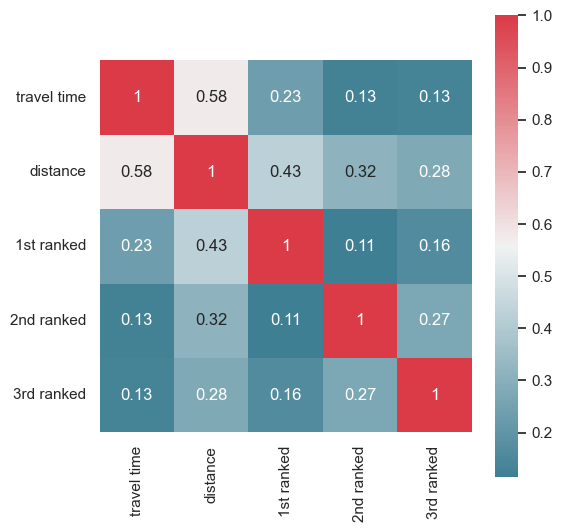

In [97]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df4.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [98]:
x = np.array(df4[['distance','1st ranked','2nd ranked','3rd ranked']])
y = np.array(df4['travel time'])
x

array([[0.61279136, 0.65960129, 0.69052462, 0.51819304],
       [0.57776337, 0.65960129, 0.69052462, 0.80388036],
       [0.3524139 , 0.65960129, 0.69052462, 0.46118756],
       ...,
       [0.40882199, 0.65960129, 0.23042909, 1.        ],
       [0.70879647, 0.65960129, 0.69052462, 0.80388036],
       [0.19746904, 0.19759155, 0.74481868, 0.80388036]])

In [99]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6021, 4)
(1506, 4)


In [101]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_1_1

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1247151.1250 - mape: 99.6422 - rmse: 1116.7592 - val_loss: 1204894.6250 - val_mape: 99.0004 - val_rmse: 1097.6769
Epoch 2/500
189/189 [==============================] - 0s 760us/step - loss: 1216098.1250 - mape: 97.8950 - rmse: 1102.7684 - val_loss: 1161842.7500 - val_mape: 96.5222 - val_rmse: 1077.8881
Epoch 3/500
189/189 [==============================] - 0s 776us/step - loss: 1160689.5000 - mape: 94.7163 - rmse: 1077.3530 - val_loss: 1096422.3750 - val_mape: 92.6464 - val_rmse: 1047.1019
Epoch 4/500
189/189 [==============================] - 0s 815us/step - loss: 1084469.1250 - mape: 90.2047 - rmse: 1041.3784 - val_loss: 1013220.3125 - val_mape: 87.5043 - val_rmse: 1006.5884
Epoch 5/500
189/189 [==============================] - 0s 768us/step - loss: 992940.6875 - mape: 84.4614 - rmse: 996.4641 - val_loss: 917880.3750 - val_mape: 81.2725 - val_rmse: 958.0607
Epoch 6/500
189/189 [==============================

Epoch 88/500
189/189 [==============================] - 0s 739us/step - loss: 154668.9062 - mape: 34.6091 - rmse: 393.2797 - val_loss: 154776.9375 - val_mape: 34.2282 - val_rmse: 393.4170
Epoch 89/500
189/189 [==============================] - 0s 746us/step - loss: 154535.6719 - mape: 34.4267 - rmse: 393.1103 - val_loss: 154638.4531 - val_mape: 34.1863 - val_rmse: 393.2410
Epoch 90/500
189/189 [==============================] - 0s 779us/step - loss: 154396.6406 - mape: 34.3911 - rmse: 392.9334 - val_loss: 154496.0781 - val_mape: 34.0918 - val_rmse: 393.0599
Epoch 91/500
189/189 [==============================] - 0s 836us/step - loss: 154295.1094 - mape: 34.2118 - rmse: 392.8042 - val_loss: 154396.9531 - val_mape: 34.1610 - val_rmse: 392.9338
Epoch 92/500
189/189 [==============================] - 0s 844us/step - loss: 154160.1562 - mape: 34.2865 - rmse: 392.6324 - val_loss: 154290.0781 - val_mape: 34.1461 - val_rmse: 392.7978
Epoch 93/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 771us/step - loss: 152696.9219 - mape: 33.4710 - rmse: 390.7645 - val_loss: 152785.1094 - val_mape: 33.4762 - val_rmse: 390.8773
Epoch 175/500
189/189 [==============================] - 0s 756us/step - loss: 152674.5312 - mape: 33.2953 - rmse: 390.7359 - val_loss: 152864.6406 - val_mape: 33.7672 - val_rmse: 390.9791
Epoch 176/500
189/189 [==============================] - 0s 737us/step - loss: 152683.6406 - mape: 33.6061 - rmse: 390.7475 - val_loss: 152812.6875 - val_mape: 33.5908 - val_rmse: 390.9126
Epoch 177/500
189/189 [==============================] - 0s 761us/step - loss: 152702.0312 - mape: 33.5684 - rmse: 390.7711 - val_loss: 152796.5625 - val_mape: 33.5295 - val_rmse: 390.8920
Epoch 178/500
189/189 [==============================] - 0s 745us/step - loss: 152681.1406 - mape: 33.3520 - rmse: 390.7444 - val_loss: 152835.9062 - val_mape: 33.6727 - val_rmse: 390.9423
Epoch 179/500
189/189 [==============================] - 0s 748us/ste

189/189 [==============================] - 0s 756us/step - loss: 152688.7969 - mape: 33.4791 - rmse: 390.7542 - val_loss: 152833.3281 - val_mape: 33.6827 - val_rmse: 390.9390
Epoch 261/500
189/189 [==============================] - 0s 761us/step - loss: 152688.5000 - mape: 33.4707 - rmse: 390.7538 - val_loss: 152814.3281 - val_mape: 33.6185 - val_rmse: 390.9147
Epoch 262/500
189/189 [==============================] - 0s 792us/step - loss: 152696.4375 - mape: 33.6434 - rmse: 390.7639 - val_loss: 152807.5938 - val_mape: 33.5974 - val_rmse: 390.9061
Epoch 263/500
189/189 [==============================] - 0s 775us/step - loss: 152681.5156 - mape: 33.2843 - rmse: 390.7448 - val_loss: 152830.6094 - val_mape: 33.6737 - val_rmse: 390.9355
Epoch 264/500
189/189 [==============================] - 0s 773us/step - loss: 152684.0000 - mape: 33.5959 - rmse: 390.7480 - val_loss: 152796.1406 - val_mape: 33.5496 - val_rmse: 390.8915
Epoch 265/500
189/189 [==============================] - 0s 865us/ste

189/189 [==============================] - 0s 708us/step - loss: 152693.2500 - mape: 33.4611 - rmse: 390.7598 - val_loss: 152799.5625 - val_mape: 33.5844 - val_rmse: 390.8958
Epoch 347/500
189/189 [==============================] - 0s 725us/step - loss: 152692.2812 - mape: 33.4768 - rmse: 390.7586 - val_loss: 152805.5625 - val_mape: 33.6051 - val_rmse: 390.9035
Epoch 348/500
189/189 [==============================] - 0s 696us/step - loss: 152689.9219 - mape: 33.6198 - rmse: 390.7556 - val_loss: 152779.7031 - val_mape: 33.5062 - val_rmse: 390.8705
Epoch 349/500
189/189 [==============================] - 0s 738us/step - loss: 152686.3906 - mape: 33.4786 - rmse: 390.7511 - val_loss: 152780.3594 - val_mape: 33.4987 - val_rmse: 390.8713
Epoch 350/500
189/189 [==============================] - 0s 683us/step - loss: 152684.9375 - mape: 33.4500 - rmse: 390.7492 - val_loss: 152786.6875 - val_mape: 33.5283 - val_rmse: 390.8794
Epoch 351/500
189/189 [==============================] - 0s 761us/ste

189/189 [==============================] - 0s 753us/step - loss: 152701.4844 - mape: 33.4060 - rmse: 390.7704 - val_loss: 152819.6094 - val_mape: 33.6476 - val_rmse: 390.9215
Epoch 433/500
189/189 [==============================] - 0s 763us/step - loss: 152680.2344 - mape: 33.4861 - rmse: 390.7432 - val_loss: 152860.5938 - val_mape: 33.7733 - val_rmse: 390.9739
Epoch 434/500
189/189 [==============================] - 0s 793us/step - loss: 152705.7500 - mape: 33.6258 - rmse: 390.7758 - val_loss: 152819.2969 - val_mape: 33.6426 - val_rmse: 390.9211
Epoch 435/500
189/189 [==============================] - 0s 695us/step - loss: 152701.6875 - mape: 33.5546 - rmse: 390.7706 - val_loss: 152799.6094 - val_mape: 33.5761 - val_rmse: 390.8959
Epoch 436/500
189/189 [==============================] - 0s 742us/step - loss: 152685.9375 - mape: 33.3196 - rmse: 390.7505 - val_loss: 152810.3125 - val_mape: 33.6146 - val_rmse: 390.9096
Epoch 437/500
189/189 [==============================] - 0s 762us/ste

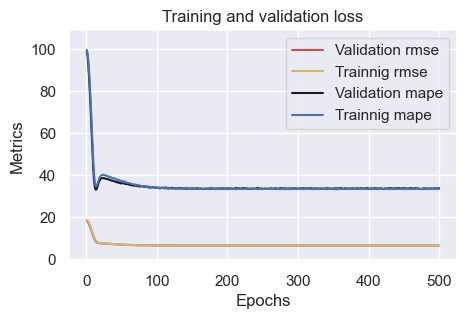

In [102]:
plotme(model4_1_1)

In [103]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_1_2

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1244242.8750 - mape: 99.4621 - rmse: 1115.4563 - val_loss: 1195116.7500 - val_mape: 98.4428 - val_rmse: 1093.2140
Epoch 2/500
189/189 [==============================] - 0s 766us/step - loss: 1189346.8750 - mape: 96.3591 - rmse: 1090.5718 - val_loss: 1114170.0000 - val_mape: 93.7126 - val_rmse: 1055.5425
Epoch 3/500
189/189 [==============================] - 0s 733us/step - loss: 1083553.8750 - mape: 90.1055 - rmse: 1040.9390 - val_loss: 989775.8750 - val_mape: 86.0094 - val_rmse: 994.8748
Epoch 4/500
189/189 [==============================] - 0s 835us/step - loss: 942817.1875 - mape: 81.1456 - rmse: 970.9877 - val_loss: 840520.8125 - val_mape: 75.9157 - val_rmse: 916.7992
Epoch 5/500
189/189 [==============================] - 0s 729us/step - loss: 784958.6875 - mape: 70.1939 - rmse: 885.9789 - val_loss: 684113.9375 - val_mape: 64.1517 - val_rmse: 827.1118
Epoch 6/500
189/189 [==============================] - 0s

Epoch 88/500
189/189 [==============================] - 0s 734us/step - loss: 152763.7812 - mape: 33.5972 - rmse: 390.8501 - val_loss: 152965.8125 - val_mape: 33.8704 - val_rmse: 391.1084
Epoch 89/500
189/189 [==============================] - 0s 853us/step - loss: 152748.5000 - mape: 33.6452 - rmse: 390.8305 - val_loss: 152939.7344 - val_mape: 33.8266 - val_rmse: 391.0751
Epoch 90/500
189/189 [==============================] - 0s 754us/step - loss: 152745.8281 - mape: 33.8354 - rmse: 390.8271 - val_loss: 152889.1406 - val_mape: 33.6715 - val_rmse: 391.0104
Epoch 91/500
189/189 [==============================] - 0s 785us/step - loss: 152734.5781 - mape: 33.3552 - rmse: 390.8127 - val_loss: 152987.6094 - val_mape: 33.9952 - val_rmse: 391.1363
Epoch 92/500
189/189 [==============================] - 0s 852us/step - loss: 152743.5156 - mape: 33.7658 - rmse: 390.8242 - val_loss: 152934.5625 - val_mape: 33.8708 - val_rmse: 391.0685
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 805us/step - loss: 152643.6562 - mape: 33.7138 - rmse: 390.6964 - val_loss: 152728.4688 - val_mape: 33.2874 - val_rmse: 390.8049
Epoch 175/500
189/189 [==============================] - 0s 750us/step - loss: 152689.9062 - mape: 33.3279 - rmse: 390.7556 - val_loss: 152778.4688 - val_mape: 33.5456 - val_rmse: 390.8689
Epoch 176/500
189/189 [==============================] - 0s 767us/step - loss: 152648.6875 - mape: 33.3363 - rmse: 390.7028 - val_loss: 152841.7031 - val_mape: 33.7566 - val_rmse: 390.9497
Epoch 177/500
189/189 [==============================] - 0s 856us/step - loss: 152672.2031 - mape: 33.6238 - rmse: 390.7329 - val_loss: 152777.0156 - val_mape: 33.5400 - val_rmse: 390.8670
Epoch 178/500
189/189 [==============================] - 0s 783us/step - loss: 152679.2500 - mape: 33.5166 - rmse: 390.7419 - val_loss: 152782.5625 - val_mape: 33.5643 - val_rmse: 390.8741
Epoch 179/500
189/189 [==============================] - 0s 726us/ste

189/189 [==============================] - 0s 753us/step - loss: 152634.4219 - mape: 33.2849 - rmse: 390.6846 - val_loss: 152865.4844 - val_mape: 33.9003 - val_rmse: 390.9802
Epoch 261/500
189/189 [==============================] - 0s 815us/step - loss: 152649.4688 - mape: 33.4437 - rmse: 390.7038 - val_loss: 153002.9688 - val_mape: 34.1929 - val_rmse: 391.1559
Epoch 262/500
189/189 [==============================] - 0s 792us/step - loss: 152683.9219 - mape: 33.7249 - rmse: 390.7479 - val_loss: 152789.4219 - val_mape: 33.6842 - val_rmse: 390.8829
Epoch 263/500
189/189 [==============================] - 0s 790us/step - loss: 152648.1406 - mape: 33.6089 - rmse: 390.7021 - val_loss: 152747.2344 - val_mape: 33.5201 - val_rmse: 390.8289
Epoch 264/500
189/189 [==============================] - 0s 799us/step - loss: 152636.7969 - mape: 33.4332 - rmse: 390.6876 - val_loss: 152858.1875 - val_mape: 33.8807 - val_rmse: 390.9708
Epoch 265/500
189/189 [==============================] - 0s 730us/ste

189/189 [==============================] - 0s 813us/step - loss: 152660.5156 - mape: 33.3615 - rmse: 390.7180 - val_loss: 152799.8906 - val_mape: 33.7305 - val_rmse: 390.8963
Epoch 347/500
189/189 [==============================] - 0s 729us/step - loss: 152652.3281 - mape: 33.5851 - rmse: 390.7075 - val_loss: 152766.4062 - val_mape: 33.6241 - val_rmse: 390.8534
Epoch 348/500
189/189 [==============================] - 0s 737us/step - loss: 152652.2500 - mape: 33.4602 - rmse: 390.7074 - val_loss: 152754.1562 - val_mape: 33.5831 - val_rmse: 390.8378
Epoch 349/500
189/189 [==============================] - 0s 800us/step - loss: 152662.0938 - mape: 33.3909 - rmse: 390.7200 - val_loss: 152725.3281 - val_mape: 33.4623 - val_rmse: 390.8009
Epoch 350/500
189/189 [==============================] - 0s 734us/step - loss: 152663.9375 - mape: 33.5125 - rmse: 390.7223 - val_loss: 152764.5781 - val_mape: 33.6228 - val_rmse: 390.8511
Epoch 351/500
189/189 [==============================] - 0s 775us/ste

189/189 [==============================] - 0s 809us/step - loss: 152621.2500 - mape: 33.6703 - rmse: 390.6677 - val_loss: 152677.6094 - val_mape: 33.2975 - val_rmse: 390.7398
Epoch 433/500
189/189 [==============================] - 0s 788us/step - loss: 152633.2656 - mape: 33.1629 - rmse: 390.6831 - val_loss: 152781.8281 - val_mape: 33.7345 - val_rmse: 390.8732
Epoch 434/500
189/189 [==============================] - 0s 809us/step - loss: 152636.8281 - mape: 33.3224 - rmse: 390.6876 - val_loss: 152845.9375 - val_mape: 33.9027 - val_rmse: 390.9552
Epoch 435/500
189/189 [==============================] - 0s 789us/step - loss: 152653.7500 - mape: 33.5881 - rmse: 390.7093 - val_loss: 152773.3594 - val_mape: 33.7038 - val_rmse: 390.8623
Epoch 436/500
189/189 [==============================] - 0s 695us/step - loss: 152666.9375 - mape: 33.5424 - rmse: 390.7262 - val_loss: 152751.0469 - val_mape: 33.6246 - val_rmse: 390.8338
Epoch 437/500
189/189 [==============================] - 0s 734us/ste

In [104]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_1_3

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1236379.6250 - mape: 99.0245 - rmse: 1111.9261 - val_loss: 1170870.0000 - val_mape: 97.0446 - val_rmse: 1082.0675
Epoch 2/500
189/189 [==============================] - 0s 781us/step - loss: 1130203.0000 - mape: 92.8938 - rmse: 1063.1101 - val_loss: 1015521.3125 - val_mape: 87.6479 - val_rmse: 1007.7308
Epoch 3/500
189/189 [==============================] - 0s 793us/step - loss: 936104.1250 - mape: 80.6539 - rmse: 967.5247 - val_loss: 797694.5625 - val_mape: 72.8306 - val_rmse: 893.1375
Epoch 4/500
189/189 [==============================] - 0s 738us/step - loss: 704648.9375 - mape: 64.0789 - rmse: 839.4337 - val_loss: 573007.5000 - val_mape: 54.8997 - val_rmse: 756.9726
Epoch 5/500
189/189 [==============================] - 0s 761us/step - loss: 494352.1250 - mape: 47.0409 - rmse: 703.1018 - val_loss: 394595.4062 - val_mape: 39.6702 - val_rmse: 628.1683
Epoch 6/500
189/189 [==============================] - 0s 8

Epoch 88/500
189/189 [==============================] - 0s 746us/step - loss: 152623.1719 - mape: 33.3895 - rmse: 390.6702 - val_loss: 152828.4531 - val_mape: 33.8318 - val_rmse: 390.9328
Epoch 89/500
189/189 [==============================] - 0s 796us/step - loss: 152607.5312 - mape: 33.4461 - rmse: 390.6501 - val_loss: 152892.7969 - val_mape: 33.9848 - val_rmse: 391.0151
Epoch 90/500
189/189 [==============================] - 0s 704us/step - loss: 152643.4375 - mape: 33.6184 - rmse: 390.6961 - val_loss: 152803.2188 - val_mape: 33.7535 - val_rmse: 390.9005
Epoch 91/500
189/189 [==============================] - 0s 741us/step - loss: 152604.7812 - mape: 33.4206 - rmse: 390.6466 - val_loss: 152855.4531 - val_mape: 33.8906 - val_rmse: 390.9673
Epoch 92/500
189/189 [==============================] - 0s 836us/step - loss: 152626.1562 - mape: 33.5480 - rmse: 390.6740 - val_loss: 152725.8750 - val_mape: 33.4793 - val_rmse: 390.8016
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 824us/step - loss: 152524.0000 - mape: 33.7027 - rmse: 390.5432 - val_loss: 152629.0312 - val_mape: 33.1041 - val_rmse: 390.6776
Epoch 175/500
189/189 [==============================] - 0s 796us/step - loss: 152573.6875 - mape: 33.4375 - rmse: 390.6068 - val_loss: 152630.3281 - val_mape: 33.0989 - val_rmse: 390.6793
Epoch 176/500
189/189 [==============================] - 0s 777us/step - loss: 152558.6250 - mape: 33.2747 - rmse: 390.5875 - val_loss: 152867.5938 - val_mape: 34.0332 - val_rmse: 390.9828
Epoch 177/500
189/189 [==============================] - 0s 743us/step - loss: 152541.7031 - mape: 33.7678 - rmse: 390.5659 - val_loss: 152632.2656 - val_mape: 33.1673 - val_rmse: 390.6818
Epoch 178/500
189/189 [==============================] - 0s 722us/step - loss: 152614.3281 - mape: 33.1346 - rmse: 390.6588 - val_loss: 152816.3281 - val_mape: 33.9051 - val_rmse: 390.9173
Epoch 179/500
189/189 [==============================] - 0s 735us/ste

189/189 [==============================] - 0s 778us/step - loss: 152525.8438 - mape: 33.3716 - rmse: 390.5456 - val_loss: 152680.7500 - val_mape: 33.6038 - val_rmse: 390.7438
Epoch 261/500
189/189 [==============================] - 0s 824us/step - loss: 152541.9375 - mape: 33.5528 - rmse: 390.5662 - val_loss: 152647.2500 - val_mape: 33.4837 - val_rmse: 390.7010
Epoch 262/500
189/189 [==============================] - 0s 834us/step - loss: 152503.7344 - mape: 33.3385 - rmse: 390.5173 - val_loss: 152818.0156 - val_mape: 33.9948 - val_rmse: 390.9195
Epoch 263/500
189/189 [==============================] - 0s 777us/step - loss: 152484.6250 - mape: 33.6101 - rmse: 390.4928 - val_loss: 152600.2969 - val_mape: 33.1610 - val_rmse: 390.6409
Epoch 264/500
189/189 [==============================] - 0s 746us/step - loss: 152578.0781 - mape: 33.3637 - rmse: 390.6124 - val_loss: 152699.2031 - val_mape: 33.6671 - val_rmse: 390.7675
Epoch 265/500
189/189 [==============================] - 0s 868us/ste

189/189 [==============================] - 0s 737us/step - loss: 152439.8281 - mape: 33.2045 - rmse: 390.4354 - val_loss: 152810.8125 - val_mape: 34.0130 - val_rmse: 390.9102
Epoch 347/500
189/189 [==============================] - 0s 825us/step - loss: 152414.8125 - mape: 33.7324 - rmse: 390.4034 - val_loss: 152569.4219 - val_mape: 33.0667 - val_rmse: 390.6013
Epoch 348/500
189/189 [==============================] - 0s 822us/step - loss: 152535.9219 - mape: 33.3942 - rmse: 390.5585 - val_loss: 152581.8125 - val_mape: 33.2013 - val_rmse: 390.6172
Epoch 349/500
189/189 [==============================] - 0s 726us/step - loss: 152502.1406 - mape: 33.4089 - rmse: 390.5152 - val_loss: 152655.5312 - val_mape: 33.5927 - val_rmse: 390.7116
Epoch 350/500
189/189 [==============================] - 0s 788us/step - loss: 152485.4531 - mape: 33.4461 - rmse: 390.4939 - val_loss: 152585.8750 - val_mape: 33.2624 - val_rmse: 390.6224
Epoch 351/500
189/189 [==============================] - 0s 792us/ste

189/189 [==============================] - 0s 787us/step - loss: 152422.9531 - mape: 33.4843 - rmse: 390.4138 - val_loss: 152559.4844 - val_mape: 33.2046 - val_rmse: 390.5887
Epoch 433/500
189/189 [==============================] - 0s 789us/step - loss: 152466.9062 - mape: 33.3662 - rmse: 390.4701 - val_loss: 152551.2188 - val_mape: 33.1311 - val_rmse: 390.5781
Epoch 434/500
189/189 [==============================] - 0s 724us/step - loss: 152484.0469 - mape: 33.2767 - rmse: 390.4921 - val_loss: 152710.1875 - val_mape: 33.8244 - val_rmse: 390.7815
Epoch 435/500
189/189 [==============================] - 0s 817us/step - loss: 152418.2969 - mape: 33.6056 - rmse: 390.4079 - val_loss: 152549.5938 - val_mape: 33.1545 - val_rmse: 390.5760
Epoch 436/500
189/189 [==============================] - 0s 781us/step - loss: 152453.6094 - mape: 33.3893 - rmse: 390.4531 - val_loss: 152576.8906 - val_mape: 33.3708 - val_rmse: 390.6109
Epoch 437/500
189/189 [==============================] - 0s 825us/ste

In [105]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_1_4

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1118039.2500 - mape: 91.6443 - rmse: 1057.3738 - val_loss: 702034.5625 - val_mape: 65.6180 - val_rmse: 837.8750
Epoch 2/500
189/189 [==============================] - 0s 859us/step - loss: 328786.0312 - mape: 41.7296 - rmse: 573.3987 - val_loss: 206360.2031 - val_mape: 38.9958 - val_rmse: 454.2689
Epoch 3/500
189/189 [==============================] - 0s 936us/step - loss: 204532.1562 - mape: 40.1679 - rmse: 452.2523 - val_loss: 198489.3125 - val_mape: 38.6589 - val_rmse: 445.5214
Epoch 4/500
189/189 [==============================] - 0s 758us/step - loss: 196020.0469 - mape: 39.7417 - rmse: 442.7415 - val_loss: 190403.4375 - val_mape: 37.2885 - val_rmse: 436.3524
Epoch 5/500
189/189 [==============================] - 0s 800us/step - loss: 187964.0625 - mape: 38.7265 - rmse: 433.5482 - val_loss: 182856.0156 - val_mape: 36.0959 - val_rmse: 427.6167
Epoch 6/500
189/189 [==============================] - 0s 792us/s

Epoch 45/500
189/189 [==============================] - 0s 825us/step - loss: 152669.9219 - mape: 33.5018 - rmse: 390.7300 - val_loss: 152913.5781 - val_mape: 34.0927 - val_rmse: 391.0417
Epoch 46/500
189/189 [==============================] - 0s 817us/step - loss: 152786.7656 - mape: 33.4220 - rmse: 390.8795 - val_loss: 152880.8750 - val_mape: 34.0027 - val_rmse: 390.9998
Epoch 47/500
189/189 [==============================] - 0s 852us/step - loss: 152599.9219 - mape: 33.5708 - rmse: 390.6404 - val_loss: 152842.9219 - val_mape: 33.9891 - val_rmse: 390.9513
Epoch 48/500
189/189 [==============================] - 0s 772us/step - loss: 152672.0781 - mape: 33.5719 - rmse: 390.7328 - val_loss: 152692.2656 - val_mape: 33.5312 - val_rmse: 390.7586
Epoch 49/500
189/189 [==============================] - 0s 778us/step - loss: 152649.1875 - mape: 33.4158 - rmse: 390.7035 - val_loss: 153154.8750 - val_mape: 34.5606 - val_rmse: 391.3501
Epoch 50/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 789us/step - loss: 151478.1719 - mape: 33.3157 - rmse: 389.2020 - val_loss: 151659.0938 - val_mape: 32.1989 - val_rmse: 389.4343
Epoch 132/500
189/189 [==============================] - 0s 829us/step - loss: 151479.0781 - mape: 33.1361 - rmse: 389.2031 - val_loss: 152028.2031 - val_mape: 34.2089 - val_rmse: 389.9079
Epoch 133/500
189/189 [==============================] - 0s 749us/step - loss: 151576.4219 - mape: 33.3317 - rmse: 389.3282 - val_loss: 151835.9375 - val_mape: 33.8621 - val_rmse: 389.6613
Epoch 134/500
189/189 [==============================] - 0s 822us/step - loss: 151460.9688 - mape: 33.3441 - rmse: 389.1799 - val_loss: 151728.9219 - val_mape: 33.6914 - val_rmse: 389.5240
Epoch 135/500
189/189 [==============================] - 0s 835us/step - loss: 151356.9062 - mape: 33.2248 - rmse: 389.0461 - val_loss: 151581.2031 - val_mape: 33.2259 - val_rmse: 389.3343
Epoch 136/500
189/189 [==============================] - 0s 856us/ste

189/189 [==============================] - 0s 803us/step - loss: 150626.6094 - mape: 33.1225 - rmse: 388.1064 - val_loss: 150903.3906 - val_mape: 32.9356 - val_rmse: 388.4629
Epoch 218/500
189/189 [==============================] - 0s 756us/step - loss: 150648.6094 - mape: 33.0226 - rmse: 388.1348 - val_loss: 151048.1250 - val_mape: 33.4582 - val_rmse: 388.6491
Epoch 219/500
189/189 [==============================] - 0s 777us/step - loss: 150451.6875 - mape: 33.1236 - rmse: 387.8810 - val_loss: 151934.6094 - val_mape: 34.8056 - val_rmse: 389.7879
Epoch 220/500
189/189 [==============================] - 0s 828us/step - loss: 150352.3125 - mape: 33.2844 - rmse: 387.7529 - val_loss: 150886.9375 - val_mape: 32.7348 - val_rmse: 388.4417
Epoch 221/500
189/189 [==============================] - 0s 745us/step - loss: 150272.3438 - mape: 33.0551 - rmse: 387.6498 - val_loss: 151467.6562 - val_mape: 30.9926 - val_rmse: 389.1884
Epoch 222/500
189/189 [==============================] - 0s 748us/ste

189/189 [==============================] - 0s 852us/step - loss: 149965.8750 - mape: 33.1158 - rmse: 387.2543 - val_loss: 150484.7656 - val_mape: 32.1053 - val_rmse: 387.9236
Epoch 304/500
189/189 [==============================] - 0s 784us/step - loss: 149714.1406 - mape: 32.8965 - rmse: 386.9291 - val_loss: 150431.1094 - val_mape: 32.5032 - val_rmse: 387.8545
Epoch 305/500
189/189 [==============================] - 0s 814us/step - loss: 149967.2656 - mape: 32.9914 - rmse: 387.2561 - val_loss: 150455.6562 - val_mape: 32.8494 - val_rmse: 387.8861
Epoch 306/500
189/189 [==============================] - 0s 817us/step - loss: 149837.5938 - mape: 33.2952 - rmse: 387.0886 - val_loss: 150480.2500 - val_mape: 32.0285 - val_rmse: 387.9178
Epoch 307/500
189/189 [==============================] - 0s 764us/step - loss: 149815.7344 - mape: 32.7703 - rmse: 387.0604 - val_loss: 152056.0312 - val_mape: 35.3727 - val_rmse: 389.9436
Epoch 308/500
189/189 [==============================] - 0s 841us/ste

189/189 [==============================] - 0s 769us/step - loss: 149112.3594 - mape: 32.8100 - rmse: 386.1507 - val_loss: 150980.0000 - val_mape: 34.9727 - val_rmse: 388.5615
Epoch 390/500
189/189 [==============================] - 0s 805us/step - loss: 149074.5625 - mape: 32.9304 - rmse: 386.1017 - val_loss: 149682.8438 - val_mape: 32.1364 - val_rmse: 386.8887
Epoch 391/500
189/189 [==============================] - 0s 810us/step - loss: 149133.0469 - mape: 32.9292 - rmse: 386.1775 - val_loss: 149730.4375 - val_mape: 32.8982 - val_rmse: 386.9502
Epoch 392/500
189/189 [==============================] - 0s 742us/step - loss: 149102.3906 - mape: 32.9722 - rmse: 386.1378 - val_loss: 149676.8281 - val_mape: 32.5517 - val_rmse: 386.8809
Epoch 393/500
189/189 [==============================] - 0s 738us/step - loss: 149045.4375 - mape: 32.8683 - rmse: 386.0640 - val_loss: 150307.7969 - val_mape: 34.1786 - val_rmse: 387.6955
Epoch 394/500
189/189 [==============================] - 0s 819us/ste

189/189 [==============================] - 0s 825us/step - loss: 148510.0625 - mape: 32.9178 - rmse: 385.3700 - val_loss: 149641.9688 - val_mape: 33.9179 - val_rmse: 386.8358
Epoch 476/500
189/189 [==============================] - 0s 779us/step - loss: 148309.6562 - mape: 32.5165 - rmse: 385.1099 - val_loss: 151105.7344 - val_mape: 35.4924 - val_rmse: 388.7232
Epoch 477/500
189/189 [==============================] - 0s 803us/step - loss: 148699.4688 - mape: 33.1447 - rmse: 385.6157 - val_loss: 149111.4062 - val_mape: 32.3827 - val_rmse: 386.1495
Epoch 478/500
189/189 [==============================] - 0s 834us/step - loss: 148462.3594 - mape: 32.9040 - rmse: 385.3081 - val_loss: 149456.2812 - val_mape: 33.6121 - val_rmse: 386.5958
Epoch 479/500
189/189 [==============================] - 0s 741us/step - loss: 148351.6406 - mape: 32.7258 - rmse: 385.1644 - val_loss: 150567.8281 - val_mape: 35.0316 - val_rmse: 388.0307
Epoch 480/500
189/189 [==============================] - 0s 828us/ste

In [106]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_1_5

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 965391.5000 - mape: 81.4361 - rmse: 982.5434 - val_loss: 305243.1875 - val_mape: 34.3345 - val_rmse: 552.4882
Epoch 2/500
189/189 [==============================] - 0s 875us/step - loss: 215361.7344 - mape: 39.5119 - rmse: 464.0708 - val_loss: 201257.0938 - val_mape: 39.0634 - val_rmse: 448.6169
Epoch 3/500
189/189 [==============================] - 0s 897us/step - loss: 197690.6094 - mape: 39.8415 - rmse: 444.6241 - val_loss: 190796.0625 - val_mape: 38.0629 - val_rmse: 436.8021
Epoch 4/500
189/189 [==============================] - 0s 887us/step - loss: 186987.5625 - mape: 38.7777 - rmse: 432.4206 - val_loss: 180812.2656 - val_mape: 36.5214 - val_rmse: 425.2202
Epoch 5/500
189/189 [==============================] - 0s 860us/step - loss: 177467.7031 - mape: 37.7009 - rmse: 421.2692 - val_loss: 172195.2344 - val_mape: 34.9076 - val_rmse: 414.9641
Epoch 6/500
189/189 [==============================] - 0s 831us/ste

Epoch 45/500
189/189 [==============================] - 0s 893us/step - loss: 152599.7812 - mape: 33.3430 - rmse: 390.6402 - val_loss: 152626.6094 - val_mape: 33.3170 - val_rmse: 390.6746
Epoch 46/500
189/189 [==============================] - 0s 858us/step - loss: 152654.4844 - mape: 33.4604 - rmse: 390.7102 - val_loss: 152671.0781 - val_mape: 33.6522 - val_rmse: 390.7315
Epoch 47/500
189/189 [==============================] - 0s 823us/step - loss: 152785.7344 - mape: 33.4605 - rmse: 390.8781 - val_loss: 152657.0781 - val_mape: 33.6383 - val_rmse: 390.7136
Epoch 48/500
189/189 [==============================] - 0s 892us/step - loss: 152820.0781 - mape: 33.3523 - rmse: 390.9221 - val_loss: 152537.0625 - val_mape: 32.8510 - val_rmse: 390.5599
Epoch 49/500
189/189 [==============================] - 0s 865us/step - loss: 152595.2656 - mape: 33.4308 - rmse: 390.6344 - val_loss: 152726.0156 - val_mape: 33.8361 - val_rmse: 390.8018
Epoch 50/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 853us/step - loss: 151274.1875 - mape: 33.1936 - rmse: 388.9398 - val_loss: 151331.1406 - val_mape: 32.5530 - val_rmse: 389.0130
Epoch 132/500
189/189 [==============================] - 0s 910us/step - loss: 151045.7500 - mape: 33.2865 - rmse: 388.6461 - val_loss: 151666.4375 - val_mape: 31.5168 - val_rmse: 389.4438
Epoch 133/500
189/189 [==============================] - 0s 892us/step - loss: 151187.6875 - mape: 33.0987 - rmse: 388.8286 - val_loss: 151370.0781 - val_mape: 33.2437 - val_rmse: 389.0631
Epoch 134/500
189/189 [==============================] - 0s 849us/step - loss: 151081.8438 - mape: 33.1491 - rmse: 388.6925 - val_loss: 151492.2656 - val_mape: 33.6619 - val_rmse: 389.2201
Epoch 135/500
189/189 [==============================] - 0s 886us/step - loss: 150913.2969 - mape: 33.2242 - rmse: 388.4756 - val_loss: 151316.5312 - val_mape: 33.1257 - val_rmse: 388.9943
Epoch 136/500
189/189 [==============================] - 0s 926us/ste

189/189 [==============================] - 0s 831us/step - loss: 150307.9219 - mape: 33.1050 - rmse: 387.6956 - val_loss: 150648.2500 - val_mape: 32.2978 - val_rmse: 388.1343
Epoch 218/500
189/189 [==============================] - 0s 818us/step - loss: 150135.8750 - mape: 33.1156 - rmse: 387.4737 - val_loss: 150664.8125 - val_mape: 32.9898 - val_rmse: 388.1557
Epoch 219/500
189/189 [==============================] - 0s 819us/step - loss: 150282.4531 - mape: 32.9757 - rmse: 387.6628 - val_loss: 150665.2500 - val_mape: 33.0094 - val_rmse: 388.1562
Epoch 220/500
189/189 [==============================] - 0s 888us/step - loss: 150129.1875 - mape: 33.0475 - rmse: 387.4651 - val_loss: 151738.3906 - val_mape: 34.9201 - val_rmse: 389.5361
Epoch 221/500
189/189 [==============================] - 0s 829us/step - loss: 150246.0469 - mape: 33.2778 - rmse: 387.6158 - val_loss: 150756.2656 - val_mape: 33.4448 - val_rmse: 388.2734
Epoch 222/500
189/189 [==============================] - 0s 877us/ste

189/189 [==============================] - 0s 876us/step - loss: 149802.5625 - mape: 33.0726 - rmse: 387.0434 - val_loss: 150305.6719 - val_mape: 31.8328 - val_rmse: 387.6927
Epoch 304/500
189/189 [==============================] - 0s 854us/step - loss: 149813.9062 - mape: 32.9215 - rmse: 387.0580 - val_loss: 150453.1875 - val_mape: 33.5613 - val_rmse: 387.8830
Epoch 305/500
189/189 [==============================] - 0s 847us/step - loss: 149737.7969 - mape: 33.0233 - rmse: 386.9597 - val_loss: 150229.1250 - val_mape: 32.2209 - val_rmse: 387.5940
Epoch 306/500
189/189 [==============================] - 0s 870us/step - loss: 149908.1406 - mape: 32.9568 - rmse: 387.1797 - val_loss: 150195.7031 - val_mape: 32.4321 - val_rmse: 387.5509
Epoch 307/500
189/189 [==============================] - 0s 876us/step - loss: 149783.9688 - mape: 33.0405 - rmse: 387.0193 - val_loss: 150287.5156 - val_mape: 31.9866 - val_rmse: 387.6693
Epoch 308/500
189/189 [==============================] - 0s 889us/ste

189/189 [==============================] - 0s 861us/step - loss: 149471.4219 - mape: 32.9274 - rmse: 386.6153 - val_loss: 150078.1406 - val_mape: 32.2050 - val_rmse: 387.3992
Epoch 390/500
189/189 [==============================] - 0s 941us/step - loss: 149433.7812 - mape: 32.8440 - rmse: 386.5667 - val_loss: 150305.8125 - val_mape: 33.6616 - val_rmse: 387.6929
Epoch 391/500
189/189 [==============================] - 0s 876us/step - loss: 149680.7656 - mape: 33.2480 - rmse: 386.8860 - val_loss: 150119.1875 - val_mape: 33.1628 - val_rmse: 387.4522
Epoch 392/500
189/189 [==============================] - 0s 889us/step - loss: 149877.7656 - mape: 33.0297 - rmse: 387.1405 - val_loss: 151127.5781 - val_mape: 30.4267 - val_rmse: 388.7513
Epoch 393/500
189/189 [==============================] - 0s 891us/step - loss: 149469.6250 - mape: 33.1135 - rmse: 386.6130 - val_loss: 150430.8906 - val_mape: 31.2369 - val_rmse: 387.8542
Epoch 394/500
189/189 [==============================] - 0s 828us/ste

189/189 [==============================] - 0s 887us/step - loss: 149362.9062 - mape: 32.9314 - rmse: 386.4750 - val_loss: 150351.2031 - val_mape: 33.8070 - val_rmse: 387.7515
Epoch 476/500
189/189 [==============================] - 0s 812us/step - loss: 149428.9844 - mape: 32.9222 - rmse: 386.5605 - val_loss: 150012.0469 - val_mape: 32.8647 - val_rmse: 387.3139
Epoch 477/500
189/189 [==============================] - 0s 831us/step - loss: 149718.4844 - mape: 32.9770 - rmse: 386.9347 - val_loss: 150015.8906 - val_mape: 32.7627 - val_rmse: 387.3188
Epoch 478/500
189/189 [==============================] - 0s 857us/step - loss: 149530.5156 - mape: 32.9672 - rmse: 386.6918 - val_loss: 150470.3906 - val_mape: 31.1487 - val_rmse: 387.9051
Epoch 479/500
189/189 [==============================] - 0s 844us/step - loss: 149666.1719 - mape: 32.9260 - rmse: 386.8671 - val_loss: 150464.1094 - val_mape: 31.1747 - val_rmse: 387.8970
Epoch 480/500
189/189 [==============================] - 0s 886us/ste

### missing value handling approach 2: 

In [108]:
### missing value handling approach 2: 
df6 = df.iloc[:,0:8].copy()
df6[['1st ranked', '2nd ranked','3rd ranked']] = df6[['1st ranked', '2nd ranked','3rd ranked']].fillna(0)
df6.head()

travel time  distance  hour of day    hr_sin        hr_cos 1st ranked  \
0         1562  0.612791           17 -0.965926 -2.588190e-01    primary   
1         1247  0.577763           23 -0.258819  9.659258e-01    primary   
2          823  0.352414            6  1.000000  6.123234e-17    primary   
3         1066  0.446486           14 -0.500000 -8.660254e-01    primary   
4          665  0.307363           17 -0.965926 -2.588190e-01    primary   

    2nd ranked    3rd ranked  
0     tertiary  unclassified  
1     tertiary   residential  
2     tertiary  primary_link  
3     tertiary       service  
4  residential      tertiary

#### 2. encoding of ranked roadtype with binary-encoding

In [109]:
option = ['residential','tertiary','primary']
df6.loc[~df6['1st ranked'].isin(option),'1st ranked'] = 'others1'
option = ['residential','tertiary','secondary',0]
df6.loc[~df6['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
option = ['residential','tertiary',0]
df6.loc[~df6['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
df6.head(20)

travel time  distance  hour of day        hr_sin        hr_cos 1st ranked  \
0          1562  0.612791           17 -9.659258e-01 -2.588190e-01    primary   
1          1247  0.577763           23 -2.588190e-01  9.659258e-01    primary   
2           823  0.352414            6  1.000000e+00  6.123234e-17    primary   
3          1066  0.446486           14 -5.000000e-01 -8.660254e-01    primary   
4           665  0.307363           17 -9.659258e-01 -2.588190e-01    primary   
5          1053  0.421253           21 -7.071068e-01  7.071068e-01    primary   
7          1441  0.359127           22 -5.000000e-01  8.660254e-01    primary   
8          1130  0.595781           20 -8.660254e-01  5.000000e-01    primary   
9           663  0.360745           19 -9.659258e-01  2.588190e-01    primary   
10          838  0.362530           14 -5.000000e-01 -8.660254e-01    primary   
11         1193  0.358618           14 -5.000000e-01 -8.660254e-01    primary   
12          753  0.296815           16 -8.660254e-01 -5.000000e-01    primary   
13          948  0.466134           23 -2.588190e-01  9.659258e-01    primary   
14          761  0.328770           23 -2.588190e-01  9.659258e-01    primary   
15         1211  0.498373           20 -8.660254e-01  5.000000e-01    primary   
16         2108  0.011004            1  2.588190e-01  9.659258e-01   tertiary   
17          971  0.196363           12  1.224647e-16 -1.000000e+00    primary   
18          642  0.352391            1  2.588190e-01  9.659258e-01    primary   
19          382  0.136404            4  8.660254e-01  5.000000e-01    primary   
20          518  0.218950           13 -2.588190e-01 -9.659258e-01    primary   

     2nd ranked   3rd ranked  
0      tertiary      others3  
1      tertiary  residential  
2      tertiary      others3  
3      tertiary      others3  
4   residential     tertiary  
5      tertiary      others3  
7   residential     tertiary  
8   residential     tertiary  
9      tertiary      others3  
10  residential     tertiary  
11  residential     tertiary  
12     tertiary  residential  
13     tertiary  residential  
14     tertiary      others3  
15     tertiary      others3  
16            0            0  
17     tertiary            0  
18  residential     tertiary  
19     tertiary  residential  
20     tertiary            0

In [110]:
#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['1st ranked','2nd ranked','3rd ranked'],return_df=True)
#Fit and Transform Data 
df6=encoder.fit_transform(df6) 
df6

travel time  distance  hour of day    hr_sin        hr_cos  \
0            1562  0.612791           17 -0.965926 -2.588190e-01   
1            1247  0.577763           23 -0.258819  9.659258e-01   
2             823  0.352414            6  1.000000  6.123234e-17   
3            1066  0.446486           14 -0.500000 -8.660254e-01   
4             665  0.307363           17 -0.965926 -2.588190e-01   
...           ...       ...          ...       ...           ...   
7608          945  0.463545           18 -1.000000 -1.836970e-16   
7609          935  0.411958           10  0.500000 -8.660254e-01   
7610         1122  0.408822           16 -0.866025 -5.000000e-01   
7611         1285  0.708796           19 -0.965926  2.588190e-01   
7612          499  0.197469           20 -0.866025  5.000000e-01   

      1st ranked_0  1st ranked_1  1st ranked_2  2nd ranked_0  2nd ranked_1  \
0                0             0             1             0             0   
1                0             0             1             0             0   
2                0             0             1             0             0   
3                0             0             1             0             0   
4                0             0             1             0             1   
...            ...           ...           ...           ...           ...   
7608             0             0             1             0             0   
7609             0             0             1             0             1   
7610             0             0             1             0             1   
7611             0             0             1             0             0   
7612             0             1             0             1             0   

      2nd ranked_2  3rd ranked_0  3rd ranked_1  3rd ranked_2  
0                1             0             0             1  
1                1             0             1             0  
2                1             0             0             1  
3                1             0             0             1  
4                0             0             1             1  
...            ...           ...           ...           ...  
7608             1             0             1             0  
7609             0             0             0             1  
7610             0             0             1             1  
7611             1             0             1             0  
7612             0             0             1             0  

[7527 rows x 14 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

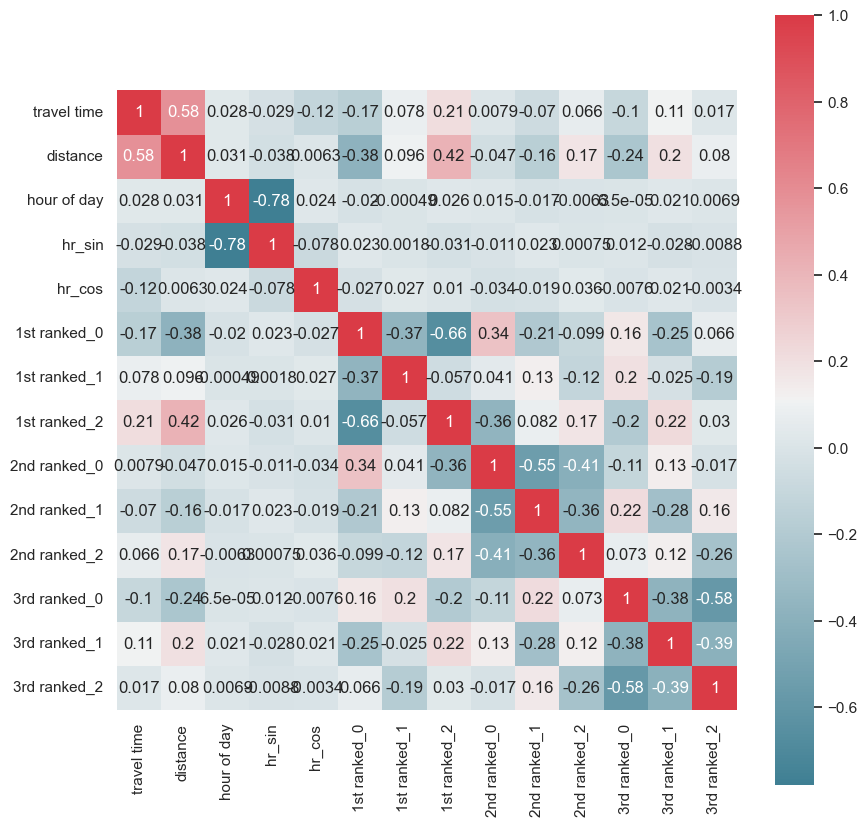

In [111]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10,10))
corr = df6.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [112]:
x = np.array(df6[['distance','1st ranked_0','1st ranked_1','1st ranked_2','2nd ranked_0','2nd ranked_1','2nd ranked_2','3rd ranked_0','3rd ranked_1','3rd ranked_2']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df6['travel time'])
x.shape

(7527, 10)

In [113]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [114]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6021, 10)
(1506, 10)


In [115]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_4_1

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1243672.6250 - mape: 99.3999 - rmse: 1115.2007 - val_loss: 1194166.7500 - val_mape: 98.2784 - val_rmse: 1092.7794
Epoch 2/500
189/189 [==============================] - 0s 789us/step - loss: 1188122.8750 - mape: 96.0802 - rmse: 1090.0105 - val_loss: 1112969.3750 - val_mape: 93.2107 - val_rmse: 1054.9736
Epoch 3/500
189/189 [==============================] - 0s 715us/step - loss: 1081598.8750 - mape: 89.4517 - rmse: 1039.9995 - val_loss: 987615.8750 - val_mape: 84.9224 - val_rmse: 993.7886
Epoch 4/500
189/189 [==============================] - 0s 854us/step - loss: 938839.4375 - mape: 79.9004 - rmse: 968.9373 - val_loss: 837290.7500 - val_mape: 74.1991 - val_rmse: 915.0359
Epoch 5/500
189/189 [==============================] - 0s 783us/step - loss: 780620.2500 - mape: 68.3979 - rmse: 883.5272 - val_loss: 679995.6875 - val_mape: 61.7863 - val_rmse: 824.6185
Epoch 6/500
189/189 [==============================] - 0s

Epoch 88/500
189/189 [==============================] - 0s 803us/step - loss: 152488.9844 - mape: 33.1463 - rmse: 390.4984 - val_loss: 152921.6094 - val_mape: 33.6903 - val_rmse: 391.0519
Epoch 89/500
189/189 [==============================] - 0s 740us/step - loss: 152413.4219 - mape: 33.4349 - rmse: 390.4016 - val_loss: 152835.6719 - val_mape: 33.5952 - val_rmse: 390.9420
Epoch 90/500
189/189 [==============================] - 0s 783us/step - loss: 152353.7656 - mape: 33.5640 - rmse: 390.3252 - val_loss: 152693.8906 - val_mape: 33.1820 - val_rmse: 390.7607
Epoch 91/500
189/189 [==============================] - 0s 792us/step - loss: 152320.6094 - mape: 33.2797 - rmse: 390.2827 - val_loss: 152700.7969 - val_mape: 33.4016 - val_rmse: 390.7695
Epoch 92/500
189/189 [==============================] - 0s 716us/step - loss: 152251.8594 - mape: 33.5219 - rmse: 390.1946 - val_loss: 152626.1406 - val_mape: 33.2709 - val_rmse: 390.6740
Epoch 93/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 773us/step - loss: 151042.7500 - mape: 32.6656 - rmse: 388.6422 - val_loss: 151919.8906 - val_mape: 32.9304 - val_rmse: 389.7690
Epoch 175/500
189/189 [==============================] - 0s 773us/step - loss: 151002.5938 - mape: 32.7813 - rmse: 388.5905 - val_loss: 151970.8750 - val_mape: 33.1337 - val_rmse: 389.8344
Epoch 176/500
189/189 [==============================] - 0s 799us/step - loss: 150990.7812 - mape: 33.0383 - rmse: 388.5753 - val_loss: 151851.0625 - val_mape: 32.4925 - val_rmse: 389.6807
Epoch 177/500
189/189 [==============================] - 0s 775us/step - loss: 151060.4375 - mape: 32.5628 - rmse: 388.6649 - val_loss: 151923.2969 - val_mape: 32.9479 - val_rmse: 389.7734
Epoch 178/500
189/189 [==============================] - 0s 769us/step - loss: 150981.9062 - mape: 33.1369 - rmse: 388.5639 - val_loss: 151827.3125 - val_mape: 32.4127 - val_rmse: 389.6502
Epoch 179/500
189/189 [==============================] - 0s 770us/ste

189/189 [==============================] - 0s 792us/step - loss: 150735.4062 - mape: 32.7344 - rmse: 388.2466 - val_loss: 151881.3281 - val_mape: 33.2115 - val_rmse: 389.7195
Epoch 261/500
189/189 [==============================] - 0s 805us/step - loss: 150776.4062 - mape: 32.9585 - rmse: 388.2994 - val_loss: 151798.2500 - val_mape: 32.8665 - val_rmse: 389.6129
Epoch 262/500
189/189 [==============================] - 0s 806us/step - loss: 150750.6094 - mape: 32.9612 - rmse: 388.2661 - val_loss: 151801.6875 - val_mape: 32.9589 - val_rmse: 389.6174
Epoch 263/500
189/189 [==============================] - 0s 791us/step - loss: 150749.3438 - mape: 32.6931 - rmse: 388.2645 - val_loss: 151986.0781 - val_mape: 33.4721 - val_rmse: 389.8539
Epoch 264/500
189/189 [==============================] - 0s 746us/step - loss: 150767.2812 - mape: 33.0815 - rmse: 388.2876 - val_loss: 151816.4219 - val_mape: 32.9748 - val_rmse: 389.6363
Epoch 265/500
189/189 [==============================] - 0s 799us/ste

189/189 [==============================] - 0s 772us/step - loss: 150677.1875 - mape: 32.9255 - rmse: 388.1716 - val_loss: 151764.2969 - val_mape: 32.9308 - val_rmse: 389.5694
Epoch 347/500
189/189 [==============================] - 0s 710us/step - loss: 150649.2812 - mape: 32.9184 - rmse: 388.1357 - val_loss: 151973.5156 - val_mape: 33.5949 - val_rmse: 389.8378
Epoch 348/500
189/189 [==============================] - 0s 766us/step - loss: 150697.7031 - mape: 33.1869 - rmse: 388.1980 - val_loss: 151776.9219 - val_mape: 32.9062 - val_rmse: 389.5856
Epoch 349/500
189/189 [==============================] - 0s 804us/step - loss: 150662.6562 - mape: 32.8517 - rmse: 388.1529 - val_loss: 151926.3281 - val_mape: 33.4568 - val_rmse: 389.7773
Epoch 350/500
189/189 [==============================] - 0s 692us/step - loss: 150695.5156 - mape: 33.1811 - rmse: 388.1952 - val_loss: 151781.6094 - val_mape: 32.9937 - val_rmse: 389.5916
Epoch 351/500
189/189 [==============================] - 0s 711us/ste

189/189 [==============================] - 0s 775us/step - loss: 150650.6250 - mape: 33.0676 - rmse: 388.1374 - val_loss: 151796.0938 - val_mape: 33.1062 - val_rmse: 389.6102
Epoch 433/500
189/189 [==============================] - 0s 773us/step - loss: 150648.6562 - mape: 33.3532 - rmse: 388.1349 - val_loss: 151745.5156 - val_mape: 32.7837 - val_rmse: 389.5453
Epoch 434/500
189/189 [==============================] - 0s 758us/step - loss: 150661.3906 - mape: 32.7649 - rmse: 388.1512 - val_loss: 151819.4688 - val_mape: 33.1689 - val_rmse: 389.6402
Epoch 435/500
189/189 [==============================] - 0s 826us/step - loss: 150645.9531 - mape: 33.1123 - rmse: 388.1313 - val_loss: 151791.8906 - val_mape: 33.0614 - val_rmse: 389.6048
Epoch 436/500
189/189 [==============================] - 0s 747us/step - loss: 150645.7812 - mape: 32.9145 - rmse: 388.1311 - val_loss: 151837.3438 - val_mape: 33.2605 - val_rmse: 389.6631
Epoch 437/500
189/189 [==============================] - 0s 801us/ste

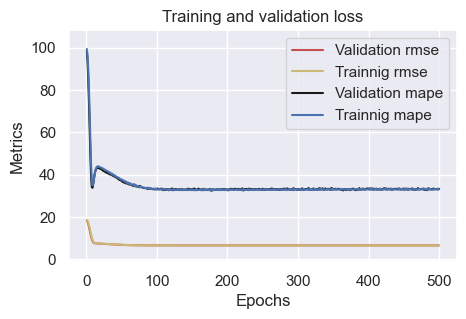

In [116]:
plotme(model4_4_1)
    

In [117]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_4_2

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1236794.7500 - mape: 99.0004 - rmse: 1112.1128 - val_loss: 1173570.2500 - val_mape: 97.0104 - val_rmse: 1083.3145
Epoch 2/500
189/189 [==============================] - 0s 807us/step - loss: 1136350.7500 - mape: 92.8268 - rmse: 1065.9976 - val_loss: 1023503.5000 - val_mape: 87.3273 - val_rmse: 1011.6835
Epoch 3/500
189/189 [==============================] - 0s 770us/step - loss: 943583.8750 - mape: 80.1805 - rmse: 971.3824 - val_loss: 806906.7500 - val_mape: 71.8627 - val_rmse: 898.2799
Epoch 4/500
189/189 [==============================] - 0s 766us/step - loss: 713974.0000 - mape: 63.1977 - rmse: 844.9698 - val_loss: 583906.3750 - val_mape: 53.4991 - val_rmse: 764.1377
Epoch 5/500
189/189 [==============================] - 0s 761us/step - loss: 504488.0625 - mape: 45.9049 - rmse: 710.2733 - val_loss: 404759.5312 - val_mape: 38.3716 - val_rmse: 636.2072
Epoch 6/500
189/189 [==============================] - 0s 8

Epoch 88/500
189/189 [==============================] - 0s 763us/step - loss: 151810.0781 - mape: 33.1450 - rmse: 389.6281 - val_loss: 152386.3281 - val_mape: 33.3095 - val_rmse: 390.3669
Epoch 89/500
189/189 [==============================] - 0s 753us/step - loss: 151718.2656 - mape: 33.1348 - rmse: 389.5103 - val_loss: 152229.5000 - val_mape: 32.7407 - val_rmse: 390.1660
Epoch 90/500
189/189 [==============================] - 0s 809us/step - loss: 151722.1406 - mape: 32.8274 - rmse: 389.5153 - val_loss: 152303.6094 - val_mape: 33.0630 - val_rmse: 390.2610
Epoch 91/500
189/189 [==============================] - 0s 786us/step - loss: 151692.0469 - mape: 32.9184 - rmse: 389.4766 - val_loss: 152276.6094 - val_mape: 33.0307 - val_rmse: 390.2263
Epoch 92/500
189/189 [==============================] - 0s 815us/step - loss: 151651.6094 - mape: 33.2259 - rmse: 389.4247 - val_loss: 152231.9219 - val_mape: 32.8414 - val_rmse: 390.1691
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 711us/step - loss: 150875.4062 - mape: 32.8052 - rmse: 388.4268 - val_loss: 151991.4375 - val_mape: 33.3172 - val_rmse: 389.8608
Epoch 175/500
189/189 [==============================] - 0s 744us/step - loss: 150840.1562 - mape: 33.0693 - rmse: 388.3815 - val_loss: 151811.2344 - val_mape: 32.5141 - val_rmse: 389.6296
Epoch 176/500
189/189 [==============================] - 0s 762us/step - loss: 150869.2500 - mape: 32.5592 - rmse: 388.4189 - val_loss: 151895.9844 - val_mape: 33.0700 - val_rmse: 389.7383
Epoch 177/500
189/189 [==============================] - 0s 838us/step - loss: 150888.7031 - mape: 32.9957 - rmse: 388.4439 - val_loss: 151864.4375 - val_mape: 32.8958 - val_rmse: 389.6979
Epoch 178/500
189/189 [==============================] - 0s 745us/step - loss: 150874.8750 - mape: 32.6833 - rmse: 388.4261 - val_loss: 151896.4375 - val_mape: 33.0125 - val_rmse: 389.7389
Epoch 179/500
189/189 [==============================] - 0s 854us/ste

189/189 [==============================] - 0s 771us/step - loss: 150689.7031 - mape: 32.7292 - rmse: 388.1877 - val_loss: 151966.4062 - val_mape: 33.4683 - val_rmse: 389.8287
Epoch 261/500
189/189 [==============================] - 0s 809us/step - loss: 150684.9062 - mape: 33.1690 - rmse: 388.1815 - val_loss: 151802.4375 - val_mape: 32.9600 - val_rmse: 389.6183
Epoch 262/500
189/189 [==============================] - 0s 751us/step - loss: 150697.0469 - mape: 32.8852 - rmse: 388.1972 - val_loss: 151882.1406 - val_mape: 33.2326 - val_rmse: 389.7206
Epoch 263/500
189/189 [==============================] - 0s 831us/step - loss: 150700.7031 - mape: 32.9722 - rmse: 388.2019 - val_loss: 151784.5469 - val_mape: 32.7846 - val_rmse: 389.5954
Epoch 264/500
189/189 [==============================] - 0s 757us/step - loss: 150676.3438 - mape: 32.9621 - rmse: 388.1705 - val_loss: 151817.8750 - val_mape: 33.0341 - val_rmse: 389.6381
Epoch 265/500
189/189 [==============================] - 0s 771us/ste

189/189 [==============================] - 0s 727us/step - loss: 150603.6562 - mape: 33.0892 - rmse: 388.0769 - val_loss: 151842.8125 - val_mape: 33.1420 - val_rmse: 389.6701
Epoch 347/500
189/189 [==============================] - 0s 728us/step - loss: 150653.0469 - mape: 33.0892 - rmse: 388.1405 - val_loss: 151783.4531 - val_mape: 32.8437 - val_rmse: 389.5940
Epoch 348/500
189/189 [==============================] - 0s 779us/step - loss: 150630.0781 - mape: 32.6978 - rmse: 388.1109 - val_loss: 151978.1719 - val_mape: 33.5562 - val_rmse: 389.8438
Epoch 349/500
189/189 [==============================] - 0s 729us/step - loss: 150709.1094 - mape: 33.2458 - rmse: 388.2127 - val_loss: 151945.9375 - val_mape: 33.4854 - val_rmse: 389.8024
Epoch 350/500
189/189 [==============================] - 0s 821us/step - loss: 150609.1094 - mape: 32.9705 - rmse: 388.0839 - val_loss: 151865.1406 - val_mape: 33.2538 - val_rmse: 389.6988
Epoch 351/500
189/189 [==============================] - 0s 773us/ste

189/189 [==============================] - 0s 844us/step - loss: 150608.0781 - mape: 33.0576 - rmse: 388.0826 - val_loss: 151820.4375 - val_mape: 32.9594 - val_rmse: 389.6414
Epoch 433/500
189/189 [==============================] - 0s 769us/step - loss: 150604.2500 - mape: 32.9054 - rmse: 388.0776 - val_loss: 151779.1094 - val_mape: 32.7961 - val_rmse: 389.5884
Epoch 434/500
189/189 [==============================] - 0s 798us/step - loss: 150602.9688 - mape: 32.9634 - rmse: 388.0760 - val_loss: 151862.7656 - val_mape: 33.2109 - val_rmse: 389.6957
Epoch 435/500
189/189 [==============================] - 0s 830us/step - loss: 150587.4062 - mape: 32.8772 - rmse: 388.0559 - val_loss: 151965.8750 - val_mape: 33.5261 - val_rmse: 389.8280
Epoch 436/500
189/189 [==============================] - 0s 698us/step - loss: 150605.5156 - mape: 33.1120 - rmse: 388.0793 - val_loss: 151822.0938 - val_mape: 33.0161 - val_rmse: 389.6436
Epoch 437/500
189/189 [==============================] - 0s 738us/ste

In [118]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_4_3

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1220196.3750 - mape: 97.9990 - rmse: 1104.6250 - val_loss: 1123681.7500 - val_mape: 93.8925 - val_rmse: 1060.0386
Epoch 2/500
189/189 [==============================] - 0s 756us/step - loss: 1025073.3750 - mape: 85.5992 - rmse: 1012.4590 - val_loss: 849484.0625 - val_mape: 75.0876 - val_rmse: 921.6746
Epoch 3/500
189/189 [==============================] - 0s 738us/step - loss: 706716.4375 - mape: 62.3209 - rmse: 840.6643 - val_loss: 529733.5000 - val_mape: 48.7618 - val_rmse: 727.8279
Epoch 4/500
189/189 [==============================] - 0s 807us/step - loss: 420874.2188 - mape: 40.3692 - rmse: 648.7482 - val_loss: 310159.5625 - val_mape: 33.8337 - val_rmse: 556.9197
Epoch 5/500
189/189 [==============================] - 0s 723us/step - loss: 263314.6875 - mape: 35.5518 - rmse: 513.1420 - val_loss: 222402.2500 - val_mape: 36.3440 - val_rmse: 471.5954
Epoch 6/500
189/189 [==============================] - 0s 848

Epoch 88/500
189/189 [==============================] - 0s 845us/step - loss: 150723.9375 - mape: 32.8298 - rmse: 388.2318 - val_loss: 151700.2344 - val_mape: 32.4718 - val_rmse: 389.4872
Epoch 89/500
189/189 [==============================] - 0s 756us/step - loss: 150699.5000 - mape: 32.4606 - rmse: 388.2003 - val_loss: 151861.3594 - val_mape: 33.1576 - val_rmse: 389.6939
Epoch 90/500
189/189 [==============================] - 0s 779us/step - loss: 150727.1250 - mape: 32.8469 - rmse: 388.2359 - val_loss: 151850.9844 - val_mape: 33.0997 - val_rmse: 389.6806
Epoch 91/500
189/189 [==============================] - 0s 804us/step - loss: 150695.2344 - mape: 32.7600 - rmse: 388.1949 - val_loss: 151665.3750 - val_mape: 32.2823 - val_rmse: 389.4424
Epoch 92/500
189/189 [==============================] - 0s 749us/step - loss: 150637.9844 - mape: 32.5407 - rmse: 388.1211 - val_loss: 151870.6250 - val_mape: 33.3069 - val_rmse: 389.7058
Epoch 93/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 771us/step - loss: 149962.7812 - mape: 33.0437 - rmse: 387.2503 - val_loss: 151719.5156 - val_mape: 33.5910 - val_rmse: 389.5119
Epoch 175/500
189/189 [==============================] - 0s 778us/step - loss: 149977.4531 - mape: 33.2018 - rmse: 387.2692 - val_loss: 151607.7500 - val_mape: 33.1627 - val_rmse: 389.3684
Epoch 176/500
189/189 [==============================] - 0s 753us/step - loss: 149888.3438 - mape: 33.0747 - rmse: 387.1542 - val_loss: 151493.1875 - val_mape: 32.7516 - val_rmse: 389.2213
Epoch 177/500
189/189 [==============================] - 0s 763us/step - loss: 149956.3438 - mape: 33.0000 - rmse: 387.2420 - val_loss: 151481.2656 - val_mape: 32.6909 - val_rmse: 389.2059
Epoch 178/500
189/189 [==============================] - 0s 785us/step - loss: 149893.3125 - mape: 32.7511 - rmse: 387.1606 - val_loss: 151570.9688 - val_mape: 33.2153 - val_rmse: 389.3212
Epoch 179/500
189/189 [==============================] - 0s 766us/ste

189/189 [==============================] - 0s 710us/step - loss: 149510.0469 - mape: 32.7659 - rmse: 386.6653 - val_loss: 151365.0469 - val_mape: 33.0129 - val_rmse: 389.0566
Epoch 261/500
189/189 [==============================] - 0s 850us/step - loss: 149491.3906 - mape: 33.0245 - rmse: 386.6412 - val_loss: 151309.3281 - val_mape: 32.5095 - val_rmse: 388.9850
Epoch 262/500
189/189 [==============================] - 0s 775us/step - loss: 149476.8594 - mape: 32.8682 - rmse: 386.6224 - val_loss: 151399.7188 - val_mape: 33.0842 - val_rmse: 389.1012
Epoch 263/500
189/189 [==============================] - 0s 807us/step - loss: 149503.1250 - mape: 32.9163 - rmse: 386.6563 - val_loss: 151355.0000 - val_mape: 32.8369 - val_rmse: 389.0437
Epoch 264/500
189/189 [==============================] - 0s 727us/step - loss: 149474.3281 - mape: 32.7310 - rmse: 386.6191 - val_loss: 151425.6250 - val_mape: 33.1793 - val_rmse: 389.1345
Epoch 265/500
189/189 [==============================] - 0s 797us/ste

189/189 [==============================] - 0s 798us/step - loss: 149067.4219 - mape: 33.2219 - rmse: 386.0925 - val_loss: 151214.9375 - val_mape: 32.2231 - val_rmse: 388.8636
Epoch 347/500
189/189 [==============================] - 0s 776us/step - loss: 149168.8906 - mape: 32.6624 - rmse: 386.2239 - val_loss: 151298.0469 - val_mape: 33.0360 - val_rmse: 388.9705
Epoch 348/500
189/189 [==============================] - 0s 758us/step - loss: 149131.9844 - mape: 32.9270 - rmse: 386.1761 - val_loss: 151313.9688 - val_mape: 33.1795 - val_rmse: 388.9910
Epoch 349/500
189/189 [==============================] - 0s 779us/step - loss: 149130.7031 - mape: 32.7434 - rmse: 386.1744 - val_loss: 151383.1562 - val_mape: 33.4247 - val_rmse: 389.0799
Epoch 350/500
189/189 [==============================] - 0s 810us/step - loss: 149102.7656 - mape: 33.0059 - rmse: 386.1383 - val_loss: 151192.0156 - val_mape: 32.5967 - val_rmse: 388.8342
Epoch 351/500
189/189 [==============================] - 0s 735us/ste

189/189 [==============================] - 0s 764us/step - loss: 148793.5469 - mape: 33.0938 - rmse: 385.7377 - val_loss: 151093.2969 - val_mape: 32.5637 - val_rmse: 388.7072
Epoch 433/500
189/189 [==============================] - 0s 751us/step - loss: 148860.4219 - mape: 32.7259 - rmse: 385.8243 - val_loss: 151262.5938 - val_mape: 33.4508 - val_rmse: 388.9249
Epoch 434/500
189/189 [==============================] - 0s 826us/step - loss: 148855.3750 - mape: 32.8059 - rmse: 385.8178 - val_loss: 151196.8125 - val_mape: 33.2303 - val_rmse: 388.8403
Epoch 435/500
189/189 [==============================] - 0s 740us/step - loss: 148782.0156 - mape: 33.0288 - rmse: 385.7227 - val_loss: 151100.9531 - val_mape: 32.7963 - val_rmse: 388.7171
Epoch 436/500
189/189 [==============================] - 0s 830us/step - loss: 148796.0469 - mape: 32.8473 - rmse: 385.7409 - val_loss: 151105.8906 - val_mape: 32.8403 - val_rmse: 388.7234
Epoch 437/500
189/189 [==============================] - 0s 778us/ste

In [119]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_4_4

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1110276.5000 - mape: 90.6229 - rmse: 1053.6965 - val_loss: 657699.3750 - val_mape: 59.7269 - val_rmse: 810.9867
Epoch 2/500
189/189 [==============================] - 0s 849us/step - loss: 296334.5000 - mape: 42.2788 - rmse: 544.3661 - val_loss: 200240.4531 - val_mape: 44.5720 - val_rmse: 447.4824
Epoch 3/500
189/189 [==============================] - 0s 788us/step - loss: 197728.5000 - mape: 44.4354 - rmse: 444.6667 - val_loss: 193500.6875 - val_mape: 41.5729 - val_rmse: 439.8871
Epoch 4/500
189/189 [==============================] - 0s 815us/step - loss: 192400.3438 - mape: 43.1386 - rmse: 438.6346 - val_loss: 188566.8594 - val_mape: 41.0314 - val_rmse: 434.2429
Epoch 5/500
189/189 [==============================] - 0s 833us/step - loss: 187791.3750 - mape: 42.2764 - rmse: 433.3490 - val_loss: 184095.5156 - val_mape: 40.3359 - val_rmse: 429.0635
Epoch 6/500
189/189 [==============================] - 0s 851us/s

Epoch 45/500
189/189 [==============================] - 0s 750us/step - loss: 149947.2656 - mape: 32.9418 - rmse: 387.2303 - val_loss: 151137.5000 - val_mape: 32.9931 - val_rmse: 388.7641
Epoch 46/500
189/189 [==============================] - 0s 809us/step - loss: 149862.1250 - mape: 32.6196 - rmse: 387.1203 - val_loss: 151611.1875 - val_mape: 33.8917 - val_rmse: 389.3728
Epoch 47/500
189/189 [==============================] - 0s 792us/step - loss: 149683.3281 - mape: 33.0198 - rmse: 386.8893 - val_loss: 151642.0000 - val_mape: 30.7218 - val_rmse: 389.4124
Epoch 48/500
189/189 [==============================] - 0s 790us/step - loss: 149928.0469 - mape: 32.7521 - rmse: 387.2054 - val_loss: 151101.2656 - val_mape: 31.7491 - val_rmse: 388.7175
Epoch 49/500
189/189 [==============================] - 0s 815us/step - loss: 149802.5781 - mape: 32.4815 - rmse: 387.0434 - val_loss: 151310.3281 - val_mape: 33.3564 - val_rmse: 388.9863
Epoch 50/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 870us/step - loss: 148342.6406 - mape: 32.7962 - rmse: 385.1527 - val_loss: 150600.9062 - val_mape: 32.9253 - val_rmse: 388.0733
Epoch 132/500
189/189 [==============================] - 0s 851us/step - loss: 148486.6250 - mape: 32.7963 - rmse: 385.3396 - val_loss: 150920.7031 - val_mape: 33.6276 - val_rmse: 388.4851
Epoch 133/500
189/189 [==============================] - 0s 760us/step - loss: 148270.8281 - mape: 32.7713 - rmse: 385.0595 - val_loss: 150649.0469 - val_mape: 31.8525 - val_rmse: 388.1353
Epoch 134/500
189/189 [==============================] - 0s 800us/step - loss: 148443.9375 - mape: 32.8709 - rmse: 385.2842 - val_loss: 150776.1094 - val_mape: 31.2841 - val_rmse: 388.2990
Epoch 135/500
189/189 [==============================] - 0s 863us/step - loss: 148377.0469 - mape: 32.5620 - rmse: 385.1974 - val_loss: 151007.8594 - val_mape: 33.7273 - val_rmse: 388.5973
Epoch 136/500
189/189 [==============================] - 0s 807us/ste

189/189 [==============================] - 0s 809us/step - loss: 146886.4688 - mape: 32.4509 - rmse: 383.2577 - val_loss: 149866.2031 - val_mape: 32.4243 - val_rmse: 387.1256
Epoch 218/500
189/189 [==============================] - 0s 837us/step - loss: 147012.5938 - mape: 32.5402 - rmse: 383.4222 - val_loss: 149826.3438 - val_mape: 32.5299 - val_rmse: 387.0741
Epoch 219/500
189/189 [==============================] - 0s 782us/step - loss: 147032.6875 - mape: 32.6975 - rmse: 383.4484 - val_loss: 149889.2188 - val_mape: 32.7936 - val_rmse: 387.1553
Epoch 220/500
189/189 [==============================] - 0s 797us/step - loss: 146940.0625 - mape: 32.5878 - rmse: 383.3276 - val_loss: 149778.1250 - val_mape: 32.4894 - val_rmse: 387.0118
Epoch 221/500
189/189 [==============================] - 0s 800us/step - loss: 146883.2031 - mape: 32.6119 - rmse: 383.2534 - val_loss: 149921.2812 - val_mape: 33.2113 - val_rmse: 387.1967
Epoch 222/500
189/189 [==============================] - 0s 811us/ste

189/189 [==============================] - 0s 806us/step - loss: 145954.6875 - mape: 32.3834 - rmse: 382.0402 - val_loss: 149965.0000 - val_mape: 34.1593 - val_rmse: 387.2531
Epoch 304/500
189/189 [==============================] - 0s 802us/step - loss: 146119.9375 - mape: 32.6182 - rmse: 382.2564 - val_loss: 149231.6875 - val_mape: 31.6475 - val_rmse: 386.3052
Epoch 305/500
189/189 [==============================] - 0s 872us/step - loss: 146134.3438 - mape: 32.5205 - rmse: 382.2752 - val_loss: 149276.8594 - val_mape: 31.5514 - val_rmse: 386.3636
Epoch 306/500
189/189 [==============================] - 0s 747us/step - loss: 145977.2188 - mape: 32.3991 - rmse: 382.0696 - val_loss: 149371.3438 - val_mape: 33.0741 - val_rmse: 386.4859
Epoch 307/500
189/189 [==============================] - 0s 828us/step - loss: 146077.6406 - mape: 32.4931 - rmse: 382.2010 - val_loss: 149363.2031 - val_mape: 33.1268 - val_rmse: 386.4754
Epoch 308/500
189/189 [==============================] - 0s 785us/ste

189/189 [==============================] - 0s 768us/step - loss: 145497.6719 - mape: 32.6533 - rmse: 381.4416 - val_loss: 149299.4219 - val_mape: 33.5153 - val_rmse: 386.3928
Epoch 390/500
189/189 [==============================] - 0s 832us/step - loss: 145649.5781 - mape: 32.7287 - rmse: 381.6406 - val_loss: 148987.4688 - val_mape: 31.9110 - val_rmse: 385.9890
Epoch 391/500
189/189 [==============================] - 0s 805us/step - loss: 145565.3750 - mape: 32.2015 - rmse: 381.5303 - val_loss: 149472.7188 - val_mape: 33.8601 - val_rmse: 386.6170
Epoch 392/500
189/189 [==============================] - 0s 900us/step - loss: 145549.2969 - mape: 32.6750 - rmse: 381.5092 - val_loss: 149185.1250 - val_mape: 33.0757 - val_rmse: 386.2449
Epoch 393/500
189/189 [==============================] - 0s 764us/step - loss: 145431.8281 - mape: 32.3160 - rmse: 381.3553 - val_loss: 149142.0938 - val_mape: 33.1443 - val_rmse: 386.1892
Epoch 394/500
189/189 [==============================] - 0s 865us/ste

189/189 [==============================] - 0s 867us/step - loss: 145086.3594 - mape: 32.6234 - rmse: 380.9020 - val_loss: 148718.3438 - val_mape: 32.1116 - val_rmse: 385.6402
Epoch 476/500
189/189 [==============================] - 0s 815us/step - loss: 145029.4375 - mape: 32.4233 - rmse: 380.8273 - val_loss: 149074.6094 - val_mape: 33.3817 - val_rmse: 386.1018
Epoch 477/500
189/189 [==============================] - 0s 827us/step - loss: 144901.6250 - mape: 32.4123 - rmse: 380.6595 - val_loss: 150510.6406 - val_mape: 35.2629 - val_rmse: 387.9570
Epoch 478/500
189/189 [==============================] - 0s 776us/step - loss: 145273.1719 - mape: 32.7925 - rmse: 381.1472 - val_loss: 148690.1875 - val_mape: 32.4260 - val_rmse: 385.6037
Epoch 479/500
189/189 [==============================] - 0s 839us/step - loss: 144963.5156 - mape: 32.3727 - rmse: 380.7408 - val_loss: 148708.4688 - val_mape: 32.3943 - val_rmse: 385.6274
Epoch 480/500
189/189 [==============================] - 0s 809us/ste

In [120]:
# plotme(model4_4_4)

In [121]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_4_5

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 798244.3750 - mape: 70.9774 - rmse: 893.4453 - val_loss: 202033.9062 - val_mape: 45.1646 - val_rmse: 449.4818
Epoch 2/500
189/189 [==============================] - 0s 979us/step - loss: 197265.0781 - mape: 44.1816 - rmse: 444.1453 - val_loss: 190840.8750 - val_mape: 42.3930 - val_rmse: 436.8534
Epoch 3/500
189/189 [==============================] - 0s 830us/step - loss: 188607.5625 - mape: 42.6366 - rmse: 434.2897 - val_loss: 183352.7500 - val_mape: 40.3588 - val_rmse: 428.1971
Epoch 4/500
189/189 [==============================] - 0s 904us/step - loss: 181393.3906 - mape: 41.0198 - rmse: 425.9030 - val_loss: 176604.5000 - val_mape: 39.5798 - val_rmse: 420.2434
Epoch 5/500
189/189 [==============================] - 0s 984us/step - loss: 174577.7500 - mape: 39.8176 - rmse: 417.8250 - val_loss: 170387.3125 - val_mape: 38.9302 - val_rmse: 412.7800
Epoch 6/500
189/189 [==============================] - 0s 874us/ste

Epoch 45/500
189/189 [==============================] - 0s 830us/step - loss: 149760.5625 - mape: 32.8787 - rmse: 386.9891 - val_loss: 151541.9531 - val_mape: 33.9001 - val_rmse: 389.2839
Epoch 46/500
189/189 [==============================] - 0s 857us/step - loss: 149432.1250 - mape: 32.7764 - rmse: 386.5645 - val_loss: 151592.0625 - val_mape: 34.1706 - val_rmse: 389.3483
Epoch 47/500
189/189 [==============================] - 0s 834us/step - loss: 149453.3438 - mape: 32.8650 - rmse: 386.5919 - val_loss: 151392.6094 - val_mape: 33.2765 - val_rmse: 389.0920
Epoch 48/500
189/189 [==============================] - 0s 823us/step - loss: 149347.0156 - mape: 32.9434 - rmse: 386.4544 - val_loss: 151240.7969 - val_mape: 31.8900 - val_rmse: 388.8969
Epoch 49/500
189/189 [==============================] - 0s 897us/step - loss: 149359.9844 - mape: 32.9578 - rmse: 386.4712 - val_loss: 151491.7969 - val_mape: 30.9481 - val_rmse: 389.2195
Epoch 50/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 899us/step - loss: 147213.1875 - mape: 32.4603 - rmse: 383.6837 - val_loss: 149894.1250 - val_mape: 33.4217 - val_rmse: 387.1616
Epoch 132/500
189/189 [==============================] - 0s 891us/step - loss: 146757.1875 - mape: 32.6409 - rmse: 383.0890 - val_loss: 149736.6719 - val_mape: 32.3903 - val_rmse: 386.9582
Epoch 133/500
189/189 [==============================] - 0s 800us/step - loss: 146979.5625 - mape: 32.4627 - rmse: 383.3792 - val_loss: 150223.2500 - val_mape: 33.9764 - val_rmse: 387.5865
Epoch 134/500
189/189 [==============================] - 0s 851us/step - loss: 147034.0625 - mape: 32.5482 - rmse: 383.4502 - val_loss: 149652.5312 - val_mape: 32.3194 - val_rmse: 386.8495
Epoch 135/500
189/189 [==============================] - 0s 901us/step - loss: 146926.6875 - mape: 32.5725 - rmse: 383.3102 - val_loss: 150336.7500 - val_mape: 34.3080 - val_rmse: 387.7328
Epoch 136/500
189/189 [==============================] - 0s 956us/ste

189/189 [==============================] - 0s 897us/step - loss: 145407.5000 - mape: 32.3043 - rmse: 381.3234 - val_loss: 148970.0156 - val_mape: 32.6294 - val_rmse: 385.9663
Epoch 218/500
189/189 [==============================] - 0s 896us/step - loss: 145114.4219 - mape: 32.3393 - rmse: 380.9389 - val_loss: 149795.0156 - val_mape: 34.3183 - val_rmse: 387.0336
Epoch 219/500
189/189 [==============================] - 0s 822us/step - loss: 145308.3750 - mape: 32.4035 - rmse: 381.1934 - val_loss: 149140.6875 - val_mape: 32.9075 - val_rmse: 386.1874
Epoch 220/500
189/189 [==============================] - 0s 814us/step - loss: 145362.1094 - mape: 32.4524 - rmse: 381.2638 - val_loss: 149255.4688 - val_mape: 33.4877 - val_rmse: 386.3360
Epoch 221/500
189/189 [==============================] - 0s 833us/step - loss: 145410.9688 - mape: 32.5108 - rmse: 381.3279 - val_loss: 149508.4375 - val_mape: 33.8387 - val_rmse: 386.6632
Epoch 222/500
189/189 [==============================] - 0s 881us/ste

189/189 [==============================] - 0s 841us/step - loss: 144193.6094 - mape: 32.2053 - rmse: 379.7283 - val_loss: 148512.2500 - val_mape: 32.4297 - val_rmse: 385.3729
Epoch 304/500
189/189 [==============================] - 0s 820us/step - loss: 144313.8438 - mape: 32.2765 - rmse: 379.8866 - val_loss: 148901.6094 - val_mape: 33.3508 - val_rmse: 385.8777
Epoch 305/500
189/189 [==============================] - 0s 891us/step - loss: 144421.1719 - mape: 32.3496 - rmse: 380.0279 - val_loss: 148690.9219 - val_mape: 32.1275 - val_rmse: 385.6046
Epoch 306/500
189/189 [==============================] - 0s 840us/step - loss: 144531.2969 - mape: 32.1880 - rmse: 380.1727 - val_loss: 148697.7812 - val_mape: 32.7464 - val_rmse: 385.6135
Epoch 307/500
189/189 [==============================] - 0s 881us/step - loss: 144559.4219 - mape: 32.3329 - rmse: 380.2097 - val_loss: 148576.4219 - val_mape: 31.1993 - val_rmse: 385.4561
Epoch 308/500
189/189 [==============================] - 0s 845us/ste

189/189 [==============================] - 0s 881us/step - loss: 142912.4219 - mape: 32.4913 - rmse: 378.0376 - val_loss: 148310.1562 - val_mape: 31.3439 - val_rmse: 385.1106
Epoch 390/500
189/189 [==============================] - 0s 886us/step - loss: 142950.2344 - mape: 31.9977 - rmse: 378.0876 - val_loss: 148754.2656 - val_mape: 33.5285 - val_rmse: 385.6867
Epoch 391/500
189/189 [==============================] - 0s 871us/step - loss: 142829.2188 - mape: 32.2063 - rmse: 377.9275 - val_loss: 148345.7656 - val_mape: 32.8872 - val_rmse: 385.1568
Epoch 392/500
189/189 [==============================] - 0s 902us/step - loss: 142996.1094 - mape: 31.9872 - rmse: 378.1483 - val_loss: 149826.9531 - val_mape: 34.8597 - val_rmse: 387.0749
Epoch 393/500
189/189 [==============================] - 0s 886us/step - loss: 142627.2344 - mape: 32.1013 - rmse: 377.6602 - val_loss: 149248.6250 - val_mape: 34.1294 - val_rmse: 386.3271
Epoch 394/500
189/189 [==============================] - 0s 904us/ste

189/189 [==============================] - 0s 844us/step - loss: 140911.1094 - mape: 32.0742 - rmse: 375.3813 - val_loss: 148203.7031 - val_mape: 32.5486 - val_rmse: 384.9724
Epoch 476/500
189/189 [==============================] - 0s 966us/step - loss: 141095.1406 - mape: 31.9515 - rmse: 375.6263 - val_loss: 148962.9062 - val_mape: 34.0070 - val_rmse: 385.9571
Epoch 477/500
189/189 [==============================] - 0s 882us/step - loss: 141080.2188 - mape: 31.9040 - rmse: 375.6065 - val_loss: 148126.1094 - val_mape: 31.6274 - val_rmse: 384.8716
Epoch 478/500
189/189 [==============================] - 0s 878us/step - loss: 140907.4375 - mape: 31.9552 - rmse: 375.3764 - val_loss: 148422.2656 - val_mape: 30.7738 - val_rmse: 385.2561
Epoch 479/500
189/189 [==============================] - 0s 922us/step - loss: 141650.9531 - mape: 32.0306 - rmse: 376.3654 - val_loss: 148264.8125 - val_mape: 30.4234 - val_rmse: 385.0517
Epoch 480/500
189/189 [==============================] - 0s 833us/ste

In [122]:
# plotme(model4_4_5)

## sub-problem 6:  **input: distance & hour &  roadtypes contribution**

#### Analysis of features

In [137]:
df7 = df.iloc[:,:].copy()
df7 = df7.drop(['hour of day','1st ranked','2nd ranked','3rd ranked','4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'], axis=1)
df7 = df7.fillna(0)
df7.head()

travel time  distance    hr_sin        hr_cos  1st dist  2nd dist  3rd dist
0         1562  0.612791 -0.965926 -2.588190e-01  0.898625  0.045157  0.036173
1         1247  0.577763 -0.258819  9.659258e-01  0.881608  0.048556  0.037621
2          823  0.352414  1.000000  6.123234e-17  0.835209  0.098678  0.033588
3         1066  0.446486 -0.500000 -8.660254e-01  0.695410  0.245933  0.026378
4          665  0.307363 -0.965926 -2.588190e-01  0.829429  0.103264  0.067307

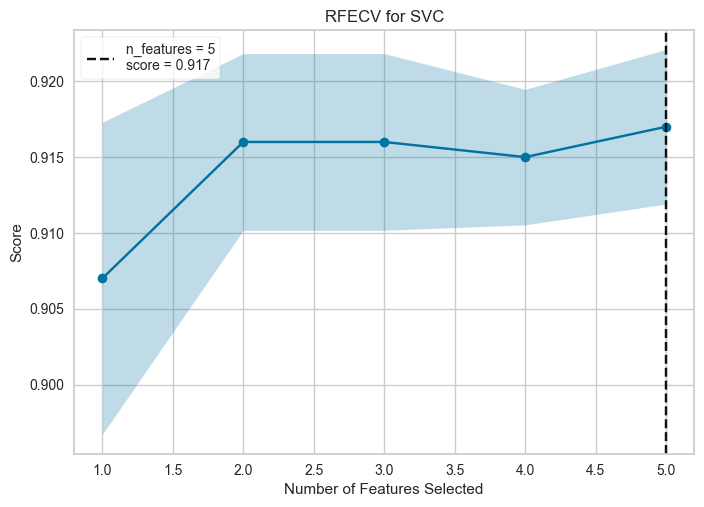

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [138]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=2, n_redundant=2,
    n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=0,
    )

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [139]:
# In this example we can see that 5 features were selected, though there doesn’t appear to be much improvement
# in the f1 score of the model after around 2 features.
# the curve jumps to an excellent accuracy when the three informative features are captured, 
# then gradually decreases in accuracy as the non informative features are added into the model.
# to find the optimal number of features cross-validation is used with RFE to score different feature subsets
# and select the best scoring collection of features.

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

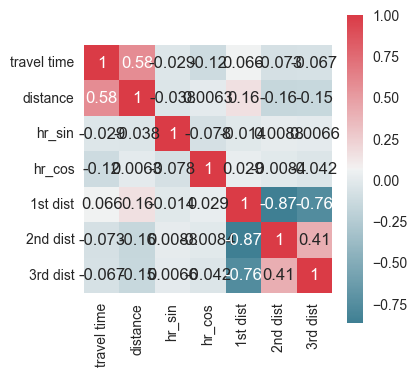

In [140]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(4,4))
corr = df7.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [142]:
x = np.array(df7[['distance','1st dist','2nd dist','3rd dist']])
y = np.array(df7['travel time'])
x

array([[0.61279136, 0.8986252 , 0.04515679, 0.03617272],
       [0.57776337, 0.88160783, 0.04855592, 0.03762113],
       [0.3524139 , 0.83520946, 0.09867791, 0.03358848],
       ...,
       [0.40882199, 0.72089658, 0.16878982, 0.06591767],
       [0.70879647, 0.80141046, 0.12713391, 0.03607793],
       [0.19746904, 0.48486185, 0.33348333, 0.18165482]])

In [143]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [144]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6021, 4)
(1506, 4)


In [145]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model6_1_1

Epoch 1/500
189/189 [==============================] - 1s 1ms/step - loss: 1185417.1250 - mape: 95.8411 - rmse: 1088.7687 - val_loss: 940935.3750 - val_mape: 81.8270 - val_rmse: 970.0182
Epoch 2/500
189/189 [==============================] - 0s 839us/step - loss: 501728.9688 - mape: 49.6935 - rmse: 708.3283 - val_loss: 196433.5312 - val_mape: 37.4332 - val_rmse: 443.2082
Epoch 3/500
189/189 [==============================] - 0s 881us/step - loss: 184807.0781 - mape: 42.4287 - rmse: 429.8919 - val_loss: 182832.6562 - val_mape: 43.6028 - val_rmse: 427.5894
Epoch 4/500
189/189 [==============================] - 0s 775us/step - loss: 179233.7656 - mape: 42.6575 - rmse: 423.3601 - val_loss: 178545.6719 - val_mape: 42.9613 - val_rmse: 422.5467
Epoch 5/500
189/189 [==============================] - 0s 860us/step - loss: 174924.4219 - mape: 41.8129 - rmse: 418.2397 - val_loss: 174091.7031 - val_mape: 41.7023 - val_rmse: 417.2430
Epoch 6/500
189/189 [==============================] - 0s 899us/s

Epoch 45/500
189/189 [==============================] - 0s 871us/step - loss: 153513.9844 - mape: 33.5806 - rmse: 391.8086 - val_loss: 154364.0312 - val_mape: 34.5240 - val_rmse: 392.8919
Epoch 46/500
189/189 [==============================] - 0s 909us/step - loss: 153424.2656 - mape: 33.4107 - rmse: 391.6941 - val_loss: 153853.4219 - val_mape: 33.4667 - val_rmse: 392.2415
Epoch 47/500
189/189 [==============================] - 0s 799us/step - loss: 153387.4688 - mape: 33.3434 - rmse: 391.6471 - val_loss: 154914.7500 - val_mape: 35.1885 - val_rmse: 393.5921
Epoch 48/500
189/189 [==============================] - 0s 914us/step - loss: 153379.5938 - mape: 33.5259 - rmse: 391.6371 - val_loss: 154119.6719 - val_mape: 34.1559 - val_rmse: 392.5808
Epoch 49/500
189/189 [==============================] - 0s 918us/step - loss: 153398.5781 - mape: 33.4758 - rmse: 391.6613 - val_loss: 153738.5469 - val_mape: 32.6471 - val_rmse: 392.0951
Epoch 50/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 908us/step - loss: 152158.3438 - mape: 33.5413 - rmse: 390.0748 - val_loss: 152601.3125 - val_mape: 32.4381 - val_rmse: 390.6422
Epoch 132/500
189/189 [==============================] - 0s 898us/step - loss: 152395.3906 - mape: 33.3605 - rmse: 390.3785 - val_loss: 152574.5938 - val_mape: 32.6118 - val_rmse: 390.6080
Epoch 133/500
189/189 [==============================] - 0s 908us/step - loss: 152290.3594 - mape: 33.2893 - rmse: 390.2440 - val_loss: 152775.1250 - val_mape: 33.7282 - val_rmse: 390.8646
Epoch 134/500
189/189 [==============================] - 0s 913us/step - loss: 152375.2656 - mape: 33.5556 - rmse: 390.3528 - val_loss: 152550.0312 - val_mape: 32.5309 - val_rmse: 390.5765
Epoch 135/500
189/189 [==============================] - 0s 909us/step - loss: 152470.6875 - mape: 33.3073 - rmse: 390.4749 - val_loss: 152606.8281 - val_mape: 33.3171 - val_rmse: 390.6492
Epoch 136/500
189/189 [==============================] - 0s 897us/ste

189/189 [==============================] - 0s 931us/step - loss: 151246.7188 - mape: 33.4727 - rmse: 388.9045 - val_loss: 151320.2031 - val_mape: 32.2579 - val_rmse: 388.9990
Epoch 218/500
189/189 [==============================] - 0s 831us/step - loss: 151213.7656 - mape: 32.9530 - rmse: 388.8622 - val_loss: 152574.0000 - val_mape: 35.0903 - val_rmse: 390.6072
Epoch 219/500
189/189 [==============================] - 0s 881us/step - loss: 151224.5938 - mape: 33.3740 - rmse: 388.8761 - val_loss: 151294.1250 - val_mape: 32.4251 - val_rmse: 388.9655
Epoch 220/500
189/189 [==============================] - 0s 848us/step - loss: 151276.3281 - mape: 33.2780 - rmse: 388.9426 - val_loss: 151371.0781 - val_mape: 33.2395 - val_rmse: 389.0644
Epoch 221/500
189/189 [==============================] - 0s 735us/step - loss: 151150.2812 - mape: 33.3029 - rmse: 388.7805 - val_loss: 151491.4375 - val_mape: 33.6307 - val_rmse: 389.2190
Epoch 222/500
189/189 [==============================] - 0s 904us/ste

189/189 [==============================] - 0s 756us/step - loss: 150238.6406 - mape: 33.0138 - rmse: 387.6063 - val_loss: 151592.9688 - val_mape: 35.1126 - val_rmse: 389.3494
Epoch 304/500
189/189 [==============================] - 0s 803us/step - loss: 150321.3438 - mape: 33.4534 - rmse: 387.7130 - val_loss: 150279.8125 - val_mape: 32.8920 - val_rmse: 387.6594
Epoch 305/500
189/189 [==============================] - 0s 809us/step - loss: 150274.9688 - mape: 33.3045 - rmse: 387.6532 - val_loss: 150551.5938 - val_mape: 33.7234 - val_rmse: 388.0098
Epoch 306/500
189/189 [==============================] - 0s 787us/step - loss: 150104.0156 - mape: 33.2275 - rmse: 387.4326 - val_loss: 150239.8906 - val_mape: 32.0020 - val_rmse: 387.6079
Epoch 307/500
189/189 [==============================] - 0s 838us/step - loss: 150412.2031 - mape: 33.0403 - rmse: 387.8301 - val_loss: 150422.2344 - val_mape: 33.4894 - val_rmse: 387.8430
Epoch 308/500
189/189 [==============================] - 0s 906us/ste

189/189 [==============================] - 0s 808us/step - loss: 149448.9844 - mape: 33.0034 - rmse: 386.5863 - val_loss: 149829.0938 - val_mape: 33.7463 - val_rmse: 387.0776
Epoch 390/500
189/189 [==============================] - 0s 827us/step - loss: 149427.8125 - mape: 33.3577 - rmse: 386.5589 - val_loss: 149751.0156 - val_mape: 33.5963 - val_rmse: 386.9768
Epoch 391/500
189/189 [==============================] - 0s 787us/step - loss: 149351.7031 - mape: 33.2412 - rmse: 386.4605 - val_loss: 149489.8125 - val_mape: 31.7074 - val_rmse: 386.6391
Epoch 392/500
189/189 [==============================] - 0s 842us/step - loss: 149473.0781 - mape: 33.0550 - rmse: 386.6175 - val_loss: 149749.4062 - val_mape: 33.6076 - val_rmse: 386.9747
Epoch 393/500
189/189 [==============================] - 0s 821us/step - loss: 149296.3281 - mape: 32.9544 - rmse: 386.3888 - val_loss: 149751.8906 - val_mape: 33.6333 - val_rmse: 386.9779
Epoch 394/500
189/189 [==============================] - 0s 868us/ste

189/189 [==============================] - 0s 839us/step - loss: 148841.4375 - mape: 32.8973 - rmse: 385.7997 - val_loss: 149180.9688 - val_mape: 33.5826 - val_rmse: 386.2395
Epoch 476/500
189/189 [==============================] - 0s 810us/step - loss: 148949.5781 - mape: 33.3937 - rmse: 385.9398 - val_loss: 149033.7500 - val_mape: 33.2437 - val_rmse: 386.0489
Epoch 477/500
189/189 [==============================] - 0s 835us/step - loss: 148742.7031 - mape: 33.1512 - rmse: 385.6718 - val_loss: 149106.4844 - val_mape: 33.4456 - val_rmse: 386.1431
Epoch 478/500
189/189 [==============================] - 0s 768us/step - loss: 148703.8594 - mape: 33.3605 - rmse: 385.6214 - val_loss: 148817.8125 - val_mape: 32.3372 - val_rmse: 385.7691
Epoch 479/500
189/189 [==============================] - 0s 884us/step - loss: 148776.7188 - mape: 32.9902 - rmse: 385.7159 - val_loss: 149143.2812 - val_mape: 33.5636 - val_rmse: 386.1907
Epoch 480/500
189/189 [==============================] - 0s 772us/ste

In [146]:
# plotme(model6_1_1)

In [147]:
# inputs: distance + hour + 1st dist + 2nd dist + 3rd dist
model6_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model6_1_2

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1071187.0000 - mape: 88.2913 - rmse: 1034.9817 - val_loss: 538214.4375 - val_mape: 49.4150 - val_rmse: 733.6310
Epoch 2/500
189/189 [==============================] - 0s 937us/step - loss: 243246.4531 - mape: 40.1388 - rmse: 493.2002 - val_loss: 185106.8906 - val_mape: 45.0284 - val_rmse: 430.2405
Epoch 3/500
189/189 [==============================] - 0s 882us/step - loss: 179581.8281 - mape: 42.9845 - rmse: 423.7710 - val_loss: 177389.9375 - val_mape: 42.0019 - val_rmse: 421.1768
Epoch 4/500
189/189 [==============================] - 0s 953us/step - loss: 173100.7812 - mape: 41.3557 - rmse: 416.0538 - val_loss: 171318.4531 - val_mape: 41.2166 - val_rmse: 413.9063
Epoch 5/500
189/189 [==============================] - 0s 867us/step - loss: 167055.5156 - mape: 39.8731 - rmse: 408.7242 - val_loss: 165767.6406 - val_mape: 39.5729 - val_rmse: 407.1457
Epoch 6/500
189/189 [==============================] - 0s 852us/s

Epoch 45/500
189/189 [==============================] - 0s 871us/step - loss: 152485.2344 - mape: 33.3913 - rmse: 390.4936 - val_loss: 152822.3125 - val_mape: 32.9501 - val_rmse: 390.9250
Epoch 46/500
189/189 [==============================] - 0s 899us/step - loss: 152429.7500 - mape: 33.2656 - rmse: 390.4225 - val_loss: 153029.9531 - val_mape: 33.7733 - val_rmse: 391.1904
Epoch 47/500
189/189 [==============================] - 0s 872us/step - loss: 152470.1562 - mape: 33.3423 - rmse: 390.4743 - val_loss: 153820.0000 - val_mape: 35.0131 - val_rmse: 392.1989
Epoch 48/500
189/189 [==============================] - 0s 835us/step - loss: 152486.4688 - mape: 33.4080 - rmse: 390.4951 - val_loss: 152863.3906 - val_mape: 33.5961 - val_rmse: 390.9775
Epoch 49/500
189/189 [==============================] - 0s 865us/step - loss: 152465.6875 - mape: 33.4552 - rmse: 390.4685 - val_loss: 153952.7500 - val_mape: 35.2068 - val_rmse: 392.3681
Epoch 50/500
189/189 [==============================] - 0s 8

189/189 [==============================] - 0s 941us/step - loss: 150490.6875 - mape: 33.1417 - rmse: 387.9313 - val_loss: 150490.1875 - val_mape: 32.5164 - val_rmse: 387.9306
Epoch 132/500
189/189 [==============================] - 0s 886us/step - loss: 150432.3750 - mape: 33.2354 - rmse: 387.8561 - val_loss: 150466.5469 - val_mape: 32.1393 - val_rmse: 387.9002
Epoch 133/500
189/189 [==============================] - 0s 848us/step - loss: 150465.6406 - mape: 33.0125 - rmse: 387.8990 - val_loss: 150783.8438 - val_mape: 33.7441 - val_rmse: 388.3090
Epoch 134/500
189/189 [==============================] - 0s 977us/step - loss: 150469.4375 - mape: 33.2412 - rmse: 387.9039 - val_loss: 150950.4219 - val_mape: 34.0622 - val_rmse: 388.5234
Epoch 135/500
189/189 [==============================] - 0s 847us/step - loss: 150509.7969 - mape: 33.2682 - rmse: 387.9559 - val_loss: 150486.7188 - val_mape: 32.9981 - val_rmse: 387.9262
Epoch 136/500
189/189 [==============================] - 0s 917us/ste

189/189 [==============================] - 0s 910us/step - loss: 149299.3281 - mape: 33.1773 - rmse: 386.3927 - val_loss: 149229.6406 - val_mape: 32.1767 - val_rmse: 386.3025
Epoch 218/500
189/189 [==============================] - 0s 901us/step - loss: 149286.1562 - mape: 33.3138 - rmse: 386.3757 - val_loss: 149226.2031 - val_mape: 32.3316 - val_rmse: 386.2981
Epoch 219/500
189/189 [==============================] - 0s 850us/step - loss: 149185.1406 - mape: 32.9421 - rmse: 386.2449 - val_loss: 149402.5938 - val_mape: 33.2915 - val_rmse: 386.5263
Epoch 220/500
189/189 [==============================] - 0s 972us/step - loss: 149112.0312 - mape: 33.2923 - rmse: 386.1503 - val_loss: 150306.2031 - val_mape: 34.7345 - val_rmse: 387.6935
Epoch 221/500
189/189 [==============================] - 0s 833us/step - loss: 149355.7812 - mape: 33.0713 - rmse: 386.4658 - val_loss: 149313.9531 - val_mape: 31.5800 - val_rmse: 386.4117
Epoch 222/500
189/189 [==============================] - 0s 902us/ste

189/189 [==============================] - 0s 883us/step - loss: 148310.5469 - mape: 33.0738 - rmse: 385.1111 - val_loss: 148606.2344 - val_mape: 33.0543 - val_rmse: 385.4948
Epoch 304/500
189/189 [==============================] - 0s 906us/step - loss: 148223.2031 - mape: 32.9697 - rmse: 384.9977 - val_loss: 148530.7188 - val_mape: 32.6974 - val_rmse: 385.3968
Epoch 305/500
189/189 [==============================] - 0s 861us/step - loss: 148175.3750 - mape: 32.7830 - rmse: 384.9355 - val_loss: 150154.5000 - val_mape: 35.4800 - val_rmse: 387.4977
Epoch 306/500
189/189 [==============================] - 0s 922us/step - loss: 148161.9844 - mape: 33.3256 - rmse: 384.9182 - val_loss: 151195.7656 - val_mape: 36.0807 - val_rmse: 388.8390
Epoch 307/500
189/189 [==============================] - 0s 893us/step - loss: 148621.5312 - mape: 33.1252 - rmse: 385.5146 - val_loss: 148961.5312 - val_mape: 33.9797 - val_rmse: 385.9554
Epoch 308/500
189/189 [==============================] - 0s 917us/ste

189/189 [==============================] - 0s 922us/step - loss: 146390.5781 - mape: 32.8679 - rmse: 382.6102 - val_loss: 146532.5469 - val_mape: 32.8722 - val_rmse: 382.7957
Epoch 390/500
189/189 [==============================] - 0s 849us/step - loss: 146519.9844 - mape: 33.0381 - rmse: 382.7793 - val_loss: 146422.4375 - val_mape: 31.2827 - val_rmse: 382.6519
Epoch 391/500
189/189 [==============================] - 0s 897us/step - loss: 146437.7344 - mape: 32.5772 - rmse: 382.6718 - val_loss: 146802.5312 - val_mape: 33.5198 - val_rmse: 383.1482
Epoch 392/500
189/189 [==============================] - 0s 905us/step - loss: 146574.2188 - mape: 32.8687 - rmse: 382.8501 - val_loss: 146446.8281 - val_mape: 32.7389 - val_rmse: 382.6837
Epoch 393/500
189/189 [==============================] - 0s 920us/step - loss: 146401.8281 - mape: 33.0228 - rmse: 382.6249 - val_loss: 146383.5781 - val_mape: 30.7938 - val_rmse: 382.6011
Epoch 394/500
189/189 [==============================] - 0s 936us/ste

189/189 [==============================] - 0s 885us/step - loss: 145687.2188 - mape: 32.9185 - rmse: 381.6899 - val_loss: 145786.8125 - val_mape: 32.4615 - val_rmse: 381.8204
Epoch 476/500
189/189 [==============================] - 0s 849us/step - loss: 145762.6875 - mape: 32.7051 - rmse: 381.7888 - val_loss: 145634.3438 - val_mape: 32.1051 - val_rmse: 381.6207
Epoch 477/500
189/189 [==============================] - 0s 838us/step - loss: 145682.1250 - mape: 32.9837 - rmse: 381.6833 - val_loss: 145607.7656 - val_mape: 31.1597 - val_rmse: 381.5858
Epoch 478/500
189/189 [==============================] - 0s 964us/step - loss: 145999.9688 - mape: 32.6630 - rmse: 382.0994 - val_loss: 146293.1875 - val_mape: 33.7912 - val_rmse: 382.4829
Epoch 479/500
189/189 [==============================] - 0s 835us/step - loss: 145682.5312 - mape: 32.6560 - rmse: 381.6838 - val_loss: 147045.4219 - val_mape: 34.6434 - val_rmse: 383.4650
Epoch 480/500
189/189 [==============================] - 0s 963us/ste

In [148]:
194.6574/60

3.24429

In [149]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model6_1_3

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1249775.3750 - mape: 99.7639 - rmse: 1117.9335 - val_loss: 1212203.6250 - val_mape: 99.3647 - val_rmse: 1101.0012
Epoch 2/500
189/189 [==============================] - 0s 751us/step - loss: 1230777.3750 - mape: 98.6328 - rmse: 1109.4041 - val_loss: 1184307.8750 - val_mape: 97.6593 - val_rmse: 1088.2592
Epoch 3/500
189/189 [==============================] - 0s 804us/step - loss: 1193368.8750 - mape: 96.3846 - rmse: 1092.4142 - val_loss: 1138978.3750 - val_mape: 94.8428 - val_rmse: 1067.2292
Epoch 4/500
189/189 [==============================] - 0s 774us/step - loss: 1140000.7500 - mape: 93.1226 - rmse: 1067.7081 - val_loss: 1079703.7500 - val_mape: 91.0599 - val_rmse: 1039.0879
Epoch 5/500
189/189 [==============================] - 0s 768us/step - loss: 1073922.8750 - mape: 88.9214 - rmse: 1036.3025 - val_loss: 1009623.4375 - val_mape: 86.4227 - val_rmse: 1004.8002
Epoch 6/500
189/189 [==========================

Epoch 88/500
189/189 [==============================] - 0s 750us/step - loss: 154675.5000 - mape: 34.9175 - rmse: 393.2881 - val_loss: 155610.1562 - val_mape: 35.1249 - val_rmse: 394.4745
Epoch 89/500
189/189 [==============================] - 0s 752us/step - loss: 154598.5469 - mape: 34.9685 - rmse: 393.1902 - val_loss: 155555.0156 - val_mape: 35.1189 - val_rmse: 394.4046
Epoch 90/500
189/189 [==============================] - 0s 765us/step - loss: 154540.6719 - mape: 35.0764 - rmse: 393.1166 - val_loss: 155455.7031 - val_mape: 34.9817 - val_rmse: 394.2787
Epoch 91/500
189/189 [==============================] - 0s 798us/step - loss: 154474.5469 - mape: 34.8518 - rmse: 393.0325 - val_loss: 155358.2812 - val_mape: 34.8349 - val_rmse: 394.1552
Epoch 92/500
189/189 [==============================] - 0s 668us/step - loss: 154410.9375 - mape: 34.9036 - rmse: 392.9516 - val_loss: 155317.0625 - val_mape: 34.8626 - val_rmse: 394.1028
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 753us/step - loss: 153705.7344 - mape: 33.5286 - rmse: 392.0532 - val_loss: 154426.6562 - val_mape: 33.7870 - val_rmse: 392.9716
Epoch 175/500
189/189 [==============================] - 0s 697us/step - loss: 153713.3281 - mape: 33.5745 - rmse: 392.0629 - val_loss: 154428.3281 - val_mape: 33.7917 - val_rmse: 392.9737
Epoch 176/500
189/189 [==============================] - 0s 695us/step - loss: 153720.3750 - mape: 33.6142 - rmse: 392.0719 - val_loss: 154403.2500 - val_mape: 33.7222 - val_rmse: 392.9418
Epoch 177/500
189/189 [==============================] - 0s 709us/step - loss: 153710.8594 - mape: 33.6705 - rmse: 392.0598 - val_loss: 154362.5312 - val_mape: 33.5894 - val_rmse: 392.8900
Epoch 178/500
189/189 [==============================] - 0s 792us/step - loss: 153709.7031 - mape: 33.3739 - rmse: 392.0583 - val_loss: 154413.9844 - val_mape: 33.7561 - val_rmse: 392.9554
Epoch 179/500
189/189 [==============================] - 0s 750us/ste

189/189 [==============================] - 0s 754us/step - loss: 153710.4219 - mape: 33.3625 - rmse: 392.0592 - val_loss: 154355.2969 - val_mape: 33.7110 - val_rmse: 392.8808
Epoch 261/500
189/189 [==============================] - 0s 833us/step - loss: 153706.1406 - mape: 33.6254 - rmse: 392.0537 - val_loss: 154325.4219 - val_mape: 33.6183 - val_rmse: 392.8427
Epoch 262/500
189/189 [==============================] - 0s 750us/step - loss: 153737.2969 - mape: 33.5762 - rmse: 392.0935 - val_loss: 154319.7188 - val_mape: 33.5992 - val_rmse: 392.8355
Epoch 263/500
189/189 [==============================] - 0s 750us/step - loss: 153704.8750 - mape: 33.4920 - rmse: 392.0521 - val_loss: 154351.6719 - val_mape: 33.7035 - val_rmse: 392.8762
Epoch 264/500
189/189 [==============================] - 0s 749us/step - loss: 153694.0781 - mape: 33.5244 - rmse: 392.0384 - val_loss: 154362.2344 - val_mape: 33.7351 - val_rmse: 392.8896
Epoch 265/500
189/189 [==============================] - 0s 800us/ste

189/189 [==============================] - 0s 834us/step - loss: 153691.3594 - mape: 33.5272 - rmse: 392.0349 - val_loss: 154322.4062 - val_mape: 33.7119 - val_rmse: 392.8389
Epoch 347/500
189/189 [==============================] - 0s 868us/step - loss: 153693.9688 - mape: 33.5066 - rmse: 392.0382 - val_loss: 154364.8281 - val_mape: 33.8329 - val_rmse: 392.8929
Epoch 348/500
189/189 [==============================] - 0s 833us/step - loss: 153686.9219 - mape: 33.6036 - rmse: 392.0292 - val_loss: 154272.4375 - val_mape: 33.5495 - val_rmse: 392.7753
Epoch 349/500
189/189 [==============================] - 0s 786us/step - loss: 153681.3281 - mape: 33.4860 - rmse: 392.0221 - val_loss: 154309.0625 - val_mape: 33.6762 - val_rmse: 392.8219
Epoch 350/500
189/189 [==============================] - 0s 710us/step - loss: 153711.9688 - mape: 33.6707 - rmse: 392.0612 - val_loss: 154306.7656 - val_mape: 33.6714 - val_rmse: 392.8190
Epoch 351/500
189/189 [==============================] - 0s 750us/ste

189/189 [==============================] - 0s 769us/step - loss: 153677.6094 - mape: 33.5627 - rmse: 392.0174 - val_loss: 154280.0469 - val_mape: 33.6414 - val_rmse: 392.7850
Epoch 433/500
189/189 [==============================] - 0s 698us/step - loss: 153684.5312 - mape: 33.4823 - rmse: 392.0262 - val_loss: 154273.4531 - val_mape: 33.6253 - val_rmse: 392.7766
Epoch 434/500
189/189 [==============================] - 0s 749us/step - loss: 153676.4844 - mape: 33.4875 - rmse: 392.0159 - val_loss: 154300.2656 - val_mape: 33.7094 - val_rmse: 392.8107
Epoch 435/500
189/189 [==============================] - 0s 837us/step - loss: 153696.9062 - mape: 33.5811 - rmse: 392.0420 - val_loss: 154285.2656 - val_mape: 33.6642 - val_rmse: 392.7916
Epoch 436/500
189/189 [==============================] - 0s 700us/step - loss: 153683.6719 - mape: 33.5884 - rmse: 392.0251 - val_loss: 154263.9531 - val_mape: 33.5939 - val_rmse: 392.7645
Epoch 437/500
189/189 [==============================] - 0s 804us/ste

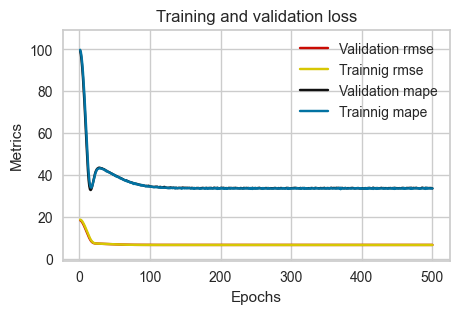

In [150]:
plotme(model6_1_3)

In [151]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model6_1_4

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1252929.2500 - mape: 99.9581 - rmse: 1119.3433 - val_loss: 1220144.5000 - val_mape: 99.8684 - val_rmse: 1104.6016
Epoch 2/500
189/189 [==============================] - 0s 749us/step - loss: 1248516.5000 - mape: 99.7112 - rmse: 1117.3704 - val_loss: 1214066.5000 - val_mape: 99.5115 - val_rmse: 1101.8468
Epoch 3/500
189/189 [==============================] - 0s 762us/step - loss: 1240717.1250 - mape: 99.2637 - rmse: 1113.8749 - val_loss: 1204735.1250 - val_mape: 98.9566 - val_rmse: 1097.6042
Epoch 4/500
189/189 [==============================] - 0s 760us/step - loss: 1229227.0000 - mape: 98.5955 - rmse: 1108.7051 - val_loss: 1191183.0000 - val_mape: 98.1431 - val_rmse: 1091.4133
Epoch 5/500
189/189 [==============================] - 0s 848us/step - loss: 1213231.8750 - mape: 97.6476 - rmse: 1101.4680 - val_loss: 1173410.2500 - val_mape: 97.0642 - val_rmse: 1083.2406
Epoch 6/500
189/189 [==========================

Epoch 88/500
189/189 [==============================] - 0s 756us/step - loss: 168807.8906 - mape: 40.4723 - rmse: 410.8624 - val_loss: 169983.3906 - val_mape: 40.5134 - val_rmse: 412.2904
Epoch 89/500
189/189 [==============================] - 0s 752us/step - loss: 168447.3438 - mape: 40.3118 - rmse: 410.4234 - val_loss: 169581.2812 - val_mape: 40.3082 - val_rmse: 411.8025
Epoch 90/500
189/189 [==============================] - 0s 752us/step - loss: 168092.1094 - mape: 40.0942 - rmse: 409.9904 - val_loss: 169253.1406 - val_mape: 40.2761 - val_rmse: 411.4039
Epoch 91/500
189/189 [==============================] - 0s 723us/step - loss: 167751.0781 - mape: 40.0758 - rmse: 409.5742 - val_loss: 168906.4219 - val_mape: 40.1843 - val_rmse: 410.9823
Epoch 92/500
189/189 [==============================] - 0s 789us/step - loss: 167406.5000 - mape: 39.9845 - rmse: 409.1534 - val_loss: 168557.2812 - val_mape: 40.0703 - val_rmse: 410.5573
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 750us/step - loss: 154556.5625 - mape: 35.0214 - rmse: 393.1368 - val_loss: 155514.5000 - val_mape: 35.1187 - val_rmse: 394.3533
Epoch 175/500
189/189 [==============================] - 0s 752us/step - loss: 154520.9688 - mape: 34.9424 - rmse: 393.0916 - val_loss: 155457.0156 - val_mape: 35.0320 - val_rmse: 394.2804
Epoch 176/500
189/189 [==============================] - 0s 800us/step - loss: 154487.8125 - mape: 34.8354 - rmse: 393.0494 - val_loss: 155433.4219 - val_mape: 35.0446 - val_rmse: 394.2505
Epoch 177/500
189/189 [==============================] - 0s 752us/step - loss: 154456.9531 - mape: 34.9900 - rmse: 393.0101 - val_loss: 155380.2188 - val_mape: 34.9677 - val_rmse: 394.1830
Epoch 178/500
189/189 [==============================] - 0s 755us/step - loss: 154436.4688 - mape: 34.7898 - rmse: 392.9841 - val_loss: 155362.3125 - val_mape: 34.9835 - val_rmse: 394.1602
Epoch 179/500
189/189 [==============================] - 0s 792us/ste

189/189 [==============================] - 0s 701us/step - loss: 153713.6875 - mape: 33.7429 - rmse: 392.0634 - val_loss: 154472.0781 - val_mape: 33.9278 - val_rmse: 393.0294
Epoch 261/500
189/189 [==============================] - 0s 739us/step - loss: 153714.0156 - mape: 33.7239 - rmse: 392.0638 - val_loss: 154459.5938 - val_mape: 33.8927 - val_rmse: 393.0135
Epoch 262/500
189/189 [==============================] - 0s 769us/step - loss: 153718.0469 - mape: 33.8147 - rmse: 392.0689 - val_loss: 154433.2969 - val_mape: 33.8132 - val_rmse: 392.9800
Epoch 263/500
189/189 [==============================] - 0s 752us/step - loss: 153716.7656 - mape: 33.6729 - rmse: 392.0673 - val_loss: 154440.3906 - val_mape: 33.8385 - val_rmse: 392.9890
Epoch 264/500
189/189 [==============================] - 0s 778us/step - loss: 153712.5781 - mape: 33.7471 - rmse: 392.0620 - val_loss: 154448.9062 - val_mape: 33.8651 - val_rmse: 392.9999
Epoch 265/500
189/189 [==============================] - 0s 760us/ste

189/189 [==============================] - 0s 827us/step - loss: 153690.8750 - mape: 33.4625 - rmse: 392.0343 - val_loss: 154366.5000 - val_mape: 33.6959 - val_rmse: 392.8950
Epoch 347/500
189/189 [==============================] - 0s 835us/step - loss: 153692.5156 - mape: 33.5376 - rmse: 392.0364 - val_loss: 154395.0781 - val_mape: 33.7824 - val_rmse: 392.9314
Epoch 348/500
189/189 [==============================] - 0s 751us/step - loss: 153693.1094 - mape: 33.5616 - rmse: 392.0371 - val_loss: 154384.1094 - val_mape: 33.7518 - val_rmse: 392.9174
Epoch 349/500
189/189 [==============================] - 0s 862us/step - loss: 153690.1875 - mape: 33.6013 - rmse: 392.0334 - val_loss: 154382.8906 - val_mape: 33.7475 - val_rmse: 392.9159
Epoch 350/500
189/189 [==============================] - 0s 801us/step - loss: 153692.7812 - mape: 33.5709 - rmse: 392.0367 - val_loss: 154369.2344 - val_mape: 33.7074 - val_rmse: 392.8985
Epoch 351/500
189/189 [==============================] - 0s 766us/ste

189/189 [==============================] - 0s 816us/step - loss: 153682.5938 - mape: 33.5967 - rmse: 392.0237 - val_loss: 154349.9844 - val_mape: 33.7193 - val_rmse: 392.8740
Epoch 433/500
189/189 [==============================] - 0s 744us/step - loss: 153685.0625 - mape: 33.6195 - rmse: 392.0269 - val_loss: 154334.8594 - val_mape: 33.6729 - val_rmse: 392.8548
Epoch 434/500
189/189 [==============================] - 0s 796us/step - loss: 153686.0938 - mape: 33.6201 - rmse: 392.0282 - val_loss: 154345.3438 - val_mape: 33.7070 - val_rmse: 392.8681
Epoch 435/500
189/189 [==============================] - 0s 734us/step - loss: 153682.4688 - mape: 33.5298 - rmse: 392.0236 - val_loss: 154330.3125 - val_mape: 33.6597 - val_rmse: 392.8490
Epoch 436/500
189/189 [==============================] - 0s 746us/step - loss: 153682.8906 - mape: 33.5384 - rmse: 392.0241 - val_loss: 154314.7031 - val_mape: 33.6075 - val_rmse: 392.8291
Epoch 437/500
189/189 [==============================] - 0s 753us/ste

In [152]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model6_1_5

Epoch 1/500
189/189 [==============================] - 0s 1ms/step - loss: 1245263.6250 - mape: 99.5008 - rmse: 1115.9138 - val_loss: 1199022.3750 - val_mape: 98.5817 - val_rmse: 1094.9988
Epoch 2/500
189/189 [==============================] - 0s 845us/step - loss: 1198361.6250 - mape: 96.7095 - rmse: 1094.6970 - val_loss: 1128540.7500 - val_mape: 94.2273 - val_rmse: 1062.3280
Epoch 3/500
189/189 [==============================] - 0s 750us/step - loss: 1105546.5000 - mape: 90.9800 - rmse: 1051.4497 - val_loss: 1018637.6250 - val_mape: 87.0931 - val_rmse: 1009.2758
Epoch 4/500
189/189 [==============================] - 0s 825us/step - loss: 979914.1875 - mape: 82.7898 - rmse: 989.9061 - val_loss: 884135.6875 - val_mape: 77.7024 - val_rmse: 940.2849
Epoch 5/500
189/189 [==============================] - 0s 731us/step - loss: 836640.1250 - mape: 72.6932 - rmse: 914.6804 - val_loss: 740147.3125 - val_mape: 66.7638 - val_rmse: 860.3182
Epoch 6/500
189/189 [==============================] - 

Epoch 88/500
189/189 [==============================] - 0s 753us/step - loss: 153747.9844 - mape: 33.6497 - rmse: 392.1071 - val_loss: 154488.8750 - val_mape: 33.9281 - val_rmse: 393.0507
Epoch 89/500
189/189 [==============================] - 0s 757us/step - loss: 153740.4844 - mape: 33.5681 - rmse: 392.0975 - val_loss: 154461.4531 - val_mape: 33.8568 - val_rmse: 393.0158
Epoch 90/500
189/189 [==============================] - 0s 752us/step - loss: 153723.4531 - mape: 33.5824 - rmse: 392.0758 - val_loss: 154447.5469 - val_mape: 33.8195 - val_rmse: 392.9981
Epoch 91/500
189/189 [==============================] - 0s 836us/step - loss: 153756.5781 - mape: 33.5774 - rmse: 392.1181 - val_loss: 154506.9531 - val_mape: 33.9800 - val_rmse: 393.0737
Epoch 92/500
189/189 [==============================] - 0s 765us/step - loss: 153729.6719 - mape: 33.7188 - rmse: 392.0838 - val_loss: 154472.0156 - val_mape: 33.8949 - val_rmse: 393.0293
Epoch 93/500
189/189 [==============================] - 0s 7

189/189 [==============================] - 0s 751us/step - loss: 153699.4531 - mape: 33.5338 - rmse: 392.0452 - val_loss: 154466.4375 - val_mape: 34.0265 - val_rmse: 393.0222
Epoch 175/500
189/189 [==============================] - 0s 734us/step - loss: 153714.1562 - mape: 33.7495 - rmse: 392.0640 - val_loss: 154322.4062 - val_mape: 33.6651 - val_rmse: 392.8389
Epoch 176/500
189/189 [==============================] - 0s 838us/step - loss: 153695.1406 - mape: 33.5210 - rmse: 392.0397 - val_loss: 154289.4531 - val_mape: 33.5520 - val_rmse: 392.7970
Epoch 177/500
189/189 [==============================] - 0s 784us/step - loss: 153708.6406 - mape: 33.2900 - rmse: 392.0569 - val_loss: 154475.2812 - val_mape: 34.0578 - val_rmse: 393.0334
Epoch 178/500
189/189 [==============================] - 0s 808us/step - loss: 153705.2188 - mape: 33.5825 - rmse: 392.0526 - val_loss: 154404.6875 - val_mape: 33.8961 - val_rmse: 392.9436
Epoch 179/500
189/189 [==============================] - 0s 719us/ste

189/189 [==============================] - 0s 820us/step - loss: 153689.9219 - mape: 33.5037 - rmse: 392.0331 - val_loss: 154300.2969 - val_mape: 33.7369 - val_rmse: 392.8108
Epoch 261/500
189/189 [==============================] - 0s 778us/step - loss: 153671.0000 - mape: 33.8085 - rmse: 392.0089 - val_loss: 154187.7969 - val_mape: 33.2944 - val_rmse: 392.6675
Epoch 262/500
189/189 [==============================] - 0s 721us/step - loss: 153715.7188 - mape: 33.3104 - rmse: 392.0659 - val_loss: 154293.4844 - val_mape: 33.7169 - val_rmse: 392.8021
Epoch 263/500
189/189 [==============================] - 0s 834us/step - loss: 153694.6406 - mape: 33.3855 - rmse: 392.0391 - val_loss: 154280.0469 - val_mape: 33.6691 - val_rmse: 392.7850
Epoch 264/500
189/189 [==============================] - 0s 706us/step - loss: 153696.7656 - mape: 33.6025 - rmse: 392.0418 - val_loss: 154264.2500 - val_mape: 33.6215 - val_rmse: 392.7649
Epoch 265/500
189/189 [==============================] - 0s 672us/ste

189/189 [==============================] - 0s 708us/step - loss: 153684.5938 - mape: 33.5983 - rmse: 392.0263 - val_loss: 154171.5000 - val_mape: 33.3770 - val_rmse: 392.6468
Epoch 347/500
189/189 [==============================] - 0s 722us/step - loss: 153697.3906 - mape: 33.3493 - rmse: 392.0426 - val_loss: 154193.5156 - val_mape: 33.4774 - val_rmse: 392.6748
Epoch 348/500
189/189 [==============================] - 0s 807us/step - loss: 153686.0938 - mape: 33.4249 - rmse: 392.0282 - val_loss: 154265.8125 - val_mape: 33.7275 - val_rmse: 392.7669
Epoch 349/500
189/189 [==============================] - 0s 752us/step - loss: 153701.0625 - mape: 33.5610 - rmse: 392.0473 - val_loss: 154278.7969 - val_mape: 33.7631 - val_rmse: 392.7834
Epoch 350/500
189/189 [==============================] - 0s 837us/step - loss: 153674.9219 - mape: 33.6631 - rmse: 392.0139 - val_loss: 154213.5938 - val_mape: 33.5595 - val_rmse: 392.7004
Epoch 351/500
189/189 [==============================] - 0s 769us/ste

189/189 [==============================] - 0s 762us/step - loss: 153658.6094 - mape: 33.4600 - rmse: 391.9931 - val_loss: 154230.8125 - val_mape: 33.7334 - val_rmse: 392.7223
Epoch 433/500
189/189 [==============================] - 0s 835us/step - loss: 153685.7656 - mape: 33.5113 - rmse: 392.0278 - val_loss: 154203.2031 - val_mape: 33.6457 - val_rmse: 392.6872
Epoch 434/500
189/189 [==============================] - 0s 741us/step - loss: 153661.0625 - mape: 33.6006 - rmse: 391.9962 - val_loss: 154146.5625 - val_mape: 33.4382 - val_rmse: 392.6150
Epoch 435/500
189/189 [==============================] - 0s 778us/step - loss: 153671.0156 - mape: 33.5498 - rmse: 392.0089 - val_loss: 154222.2188 - val_mape: 33.7117 - val_rmse: 392.7114
Epoch 436/500
189/189 [==============================] - 0s 754us/step - loss: 153667.2344 - mape: 33.5554 - rmse: 392.0041 - val_loss: 154151.6562 - val_mape: 33.4674 - val_rmse: 392.6215
Epoch 437/500
189/189 [==============================] - 0s 753us/ste

## sub-problem 7:  **input: distance & hour & all roadtypes with real distance**

In [153]:
df8 = dff.iloc[:,:].copy()
df8 = df8.drop(['hour of day'], axis=1)
df8.head(20)

travel time  distance  living_street  motorway  motorway_link    primary  \
0          1562  0.443538            0.0       0.0            0.0  17778.401   
1          1247  0.418185            0.0       0.0            0.0  16453.699   
2           823  0.255077            0.0       0.0            0.0   9565.882   
3          1066  0.323167            0.0       0.0            0.0  10057.793   
4           665  0.222469            0.0       0.0            0.0   8304.143   
5          1053  0.304903            0.0       0.0            0.0  10417.651   
6          1936  0.961562            0.0       0.0            0.0  39735.437   
7          1441  0.259936            0.0       0.0            0.0   8304.143   
8          1130  0.431226            0.0       0.0            0.0  16063.983   
9           663  0.261108            0.0       0.0            0.0  10417.651   
10          838  0.262399            0.0       0.0            0.0   8304.143   
11         1193  0.259568            0.0       0.0            0.0   8304.143   
12          753  0.214835            0.0       0.0            0.0   6598.517   
13          948  0.337388            0.0       0.0            0.0  10558.658   
14          761  0.237964            0.0       0.0            0.0   8554.998   
15         1211  0.360722            0.0       0.0            0.0  14594.525   
16         2108  0.007964            0.0       0.0            0.0      0.000   
17          971  0.142127            0.0       0.0            0.0   5554.231   
18          642  0.255060            0.0       0.0            0.0   9270.097   
19          382  0.098729            0.0       0.0            0.0   3287.012   

    primary_link  residential  road  secondary  secondary_link  service  \
0        396.576        0.000   0.0      0.000             0.0    0.000   
1        601.240      702.134   0.0      0.000             0.0    0.000   
2        384.698       81.136   0.0      0.000             0.0  188.852   
3        152.983      270.947   0.0      0.000             0.0  381.502   
4          0.000     1033.862   0.0      0.000             0.0    0.000   
5        152.983      361.635   0.0      0.000             0.0  835.884   
6        270.617        0.000   0.0   1266.655             0.0   29.222   
7          0.000     2352.489   0.0      0.000             0.0    0.000   
8        504.242     1502.905   0.0      0.000             0.0    0.000   
9        152.983        0.000   0.0      0.000             0.0    0.000   
10         0.000     2092.030   0.0      0.000             0.0    0.000   
11         0.000     2479.836   0.0      0.000             0.0    0.000   
12         0.000     1387.199   0.0      0.000             0.0    0.000   
13        59.536      291.516   0.0      0.000             0.0    0.000   
14       228.532      282.006   0.0      0.000             0.0  357.834   
15         0.000      159.421   0.0      0.000             0.0  357.834   
16         0.000        0.000   0.0      0.000             0.0    0.000   
17         0.000        0.000   0.0      0.000             0.0    0.000   
18         0.000     1057.885   0.0      0.000             0.0  357.834   
19         0.000      124.889   0.0      0.000             0.0    0.000   

    tertiary  track  trunk  trunk_link  unclassified  others  
0    893.382    0.0    0.0         0.0       715.641     0.0  
1    906.213    0.0    0.0         0.0         0.000     0.0  
2   1130.185    0.0    0.0         0.0       102.520     0.0  
3   3556.950    0.0    0.0         0.0        42.929     0.0  
4    673.871    0.0    0.0         0.0         0.000     0.0  
5   1437.041    0.0    0.0         0.0       450.567     0.0  
6   1380.763    0.0    0.0         0.0         0.000     0.0  
7   1011.418    0.0    0.0         0.0         0.000     0.0  
8   1168.612    0.0    0.0         0.0         0.000     0.0  
9   1011.418    0.0    0.0         0.0       137.788     0.0  
10  1380.763    0.0    0.0         0.0         0.000  

In [154]:
# Normalize using Min/Max Normalization.
normalize=(df8['living_street']-df8['living_street'].min())/(df8['living_street'].max()-df8['living_street'].min())
df8['living_street'] = normalize
normalize=(df8['motorway']-df8['motorway'].min())/(df8['motorway'].max()-df8['motorway'].min())
df8['motorway'] = normalize
normalize=(df8['motorway_link']-df8['motorway_link'].min())/(df8['motorway_link'].max()-df8['motorway_link'].min())
df8['motorway_link'] = normalize
normalize=(df8['primary']-df8['primary'].min())/(df8['primary'].max()-df8['primary'].min())
df8['primary'] = normalize
normalize=(df8['primary_link']-df8['primary_link'].min())/(df8['primary_link'].max()-df8['primary_link'].min())
df8['primary_link'] = normalize
normalize=(df8['residential']-df8['residential'].min())/(df8['residential'].max()-df8['residential'].min())
df8['residential'] = normalize
normalize=(df8['road']-df8['road'].min())/(df8['road'].max()-df8['road'].min())
df8['road'] = normalize
normalize=(df8['secondary']-df8['secondary'].min())/(df8['secondary'].max()-df8['secondary'].min())
df8['secondary'] = normalize
normalize=(df8['secondary_link']-df8['secondary_link'].min())/(df8['secondary_link'].max()-df8['secondary_link'].min())
df8['secondary_link'] = normalize
normalize=(df8['service']-df8['service'].min())/(df8['service'].max()-df8['service'].min())
df8['service'] = normalize
normalize=(df8['tertiary']-df8['tertiary'].min())/(df8['tertiary'].max()-df8['tertiary'].min())
df8['tertiary'] = normalize
normalize=(df8['track']-df8['track'].min())/(df8['track'].max()-df8['track'].min())
df8['track'] = normalize
normalize=(df8['trunk']-df8['trunk'].min())/(df8['trunk'].max()-df8['trunk'].min())
df8['trunk'] = normalize
normalize=(df8['trunk_link']-df8['trunk_link'].min())/(df8['trunk_link'].max()-df8['trunk_link'].min())
df8['trunk_link'] = normalize
normalize=(df8['unclassified']-df8['unclassified'].min())/(df8['unclassified'].max()-df8['unclassified'].min())
df8['unclassified'] = normalize
normalize=(df8['others']-df8['others'].min())/(df8['others'].max()-df8['others'].min())
df8['others'] = normalize
df8

travel time  distance  living_street  motorway  motorway_link   primary  \
0            1562  0.443538            0.0       0.0            0.0  0.428421   
1            1247  0.418185            0.0       0.0            0.0  0.396499   
2             823  0.255077            0.0       0.0            0.0  0.230517   
3            1066  0.323167            0.0       0.0            0.0  0.242371   
4             665  0.222469            0.0       0.0            0.0  0.200112   
...           ...       ...            ...       ...            ...       ...   
7608          945  0.335514            0.0       0.0            0.0  0.216398   
7609          935  0.298175            0.0       0.0            0.0  0.268269   
7610         1122  0.295905            0.0       0.0            0.0  0.230319   
7611         1285  0.513027            0.0       0.0            0.0  0.441395   
7612          499  0.142928            0.0       0.0            0.0  0.052202   

      primary_link  residential  road  secondary  secondary_link   service  \
0         0.273302     0.000000   0.0   0.000000             0.0  0.000000   
1         0.414347     0.080437   0.0   0.000000             0.0  0.000000   
2         0.265116     0.009295   0.0   0.000000             0.0  0.058255   
3         0.105429     0.031040   0.0   0.000000             0.0  0.117681   
4         0.000000     0.118441   0.0   0.000000             0.0  0.000000   
...            ...          ...   ...        ...             ...       ...   
7608      0.000000     0.103276   0.0   0.000000             0.0  0.000000   
7609      0.462365     0.122407   0.0   0.000000             0.0  0.000000   
7610      0.303642     0.256368   0.0   0.000000             0.0  0.045654   
7611      0.000000     0.094466   0.0   0.028689             0.0  0.015291   
7612      0.000000     0.135183   0.0   0.000000             0.0  0.000000   

      tertiary  track  trunk  trunk_link  unclassified  others  
0     0.058923    0.0    0.0         0.0      0.166138     0.0  
1     0.059769    0.0    0.0         0.0      0.000000     0.0  
2     0.074541    0.0    0.0         0.0      0.023800     0.0  
3     0.234598    0.0    0.0         0.0      0.009966     0.0  
4     0.044445    0.0    0.0         0.0      0.000000     0.0  
...        ...    ...    ...         ...           ...     ...  
7608  0.338180    0.0    0.0         0.0      0.000000     0.0  
7609  0.032087    0.0    0.0         0.0      0.000000     0.0  
7610  0.057641    0.0    0.0         0.0      0.000000     0.0  
7611  0.191647    0.0    0.0         0.0      0.000000     0.0  
7612  0.207731    0.0    0.0         0.0      0.000000     0.0  

[7613 rows x 18 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

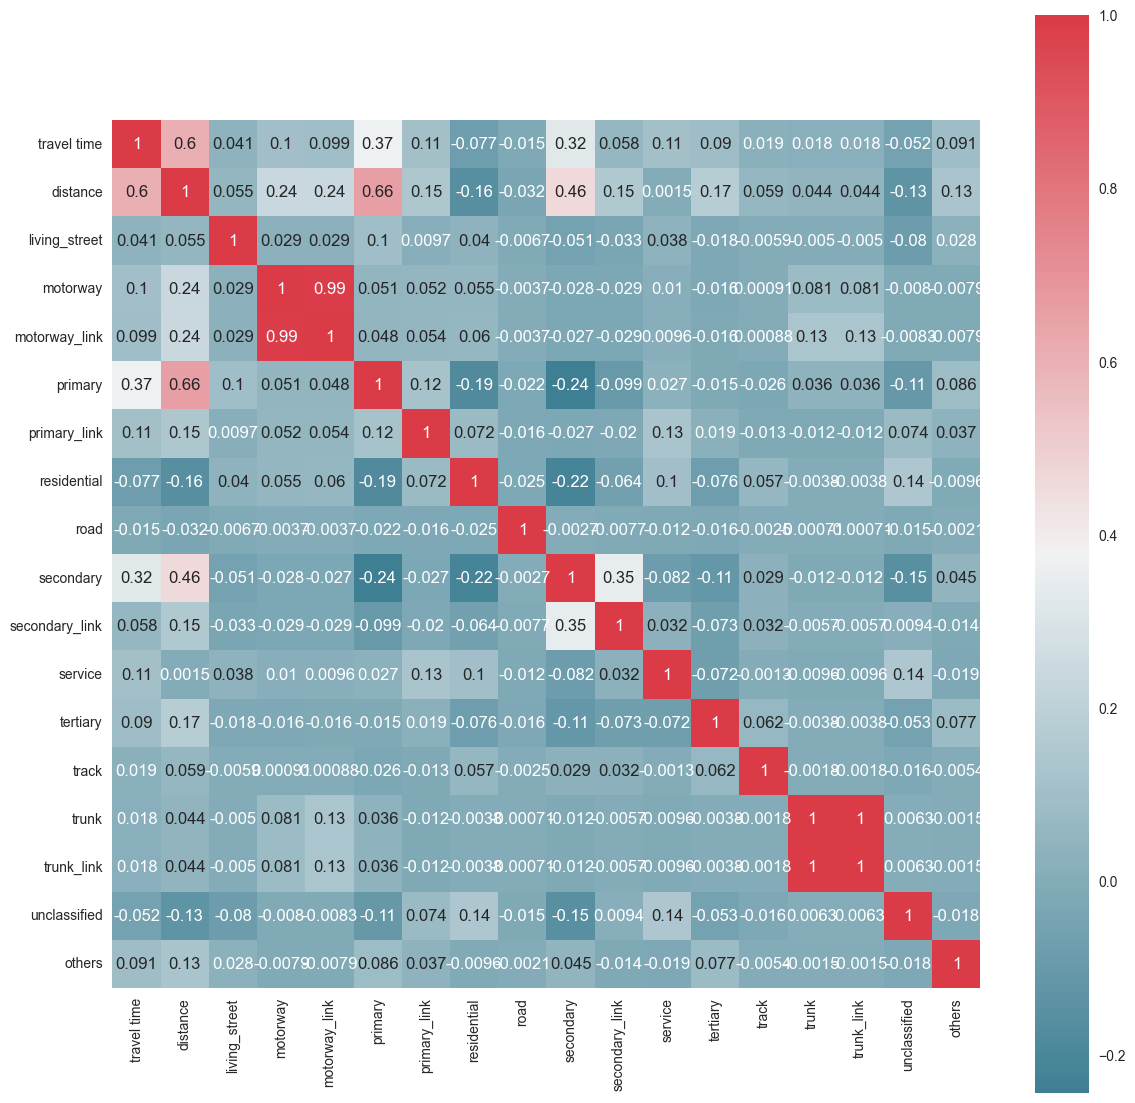

In [155]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(14,14))
corr = df8.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [156]:
x = np.array(df8.iloc[:,1:])
y = np.array(df8['travel time'])
x

array([[0.44353836, 0.        , 0.        , ..., 0.        , 0.16613782,
        0.        ],
       [0.41818509, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25507716, 0.        , 0.        , ..., 0.        , 0.02380027,
        0.        ],
       ...,
       [0.29590533, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51302685, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14292808, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [157]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [158]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6090, 17)
(1523, 17)


In [159]:
# inputs: distance + roadtypes distance
model7_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model7_1_1

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 1219639.3750 - mape: 95.8170 - rmse: 1104.3728 - val_loss: 914651.1875 - val_mape: 81.2860 - val_rmse: 956.3740
Epoch 2/500
191/191 [==============================] - 0s 863us/step - loss: 487555.6875 - mape: 47.6766 - rmse: 698.2519 - val_loss: 165018.9688 - val_mape: 32.6437 - val_rmse: 406.2253
Epoch 3/500
191/191 [==============================] - 0s 814us/step - loss: 172453.2031 - mape: 35.8177 - rmse: 415.2748 - val_loss: 151813.7969 - val_mape: 36.6205 - val_rmse: 389.6329
Epoch 4/500
191/191 [==============================] - 0s 821us/step - loss: 163115.7656 - mape: 35.8396 - rmse: 403.8759 - val_loss: 146350.0312 - val_mape: 36.5328 - val_rmse: 382.5572
Epoch 5/500
191/191 [==============================] - 0s 925us/step - loss: 157997.9062 - mape: 35.1424 - rmse: 397.4895 - val_loss: 142647.6562 - val_mape: 36.0274 - val_rmse: 377.6873
Epoch 6/500
191/191 [==============================] - 0s 788us/s

Epoch 45/500
191/191 [==============================] - 0s 808us/step - loss: 150583.2812 - mape: 32.5038 - rmse: 388.0506 - val_loss: 138056.0156 - val_mape: 34.7282 - val_rmse: 371.5589
Epoch 46/500
191/191 [==============================] - 0s 842us/step - loss: 150675.1562 - mape: 32.8543 - rmse: 388.1690 - val_loss: 136749.5781 - val_mape: 33.7035 - val_rmse: 369.7967
Epoch 47/500
191/191 [==============================] - 0s 899us/step - loss: 150699.1875 - mape: 32.6901 - rmse: 388.1999 - val_loss: 136004.5312 - val_mape: 32.7644 - val_rmse: 368.7879
Epoch 48/500
191/191 [==============================] - 0s 887us/step - loss: 150638.9062 - mape: 32.7502 - rmse: 388.1223 - val_loss: 135837.7969 - val_mape: 32.5252 - val_rmse: 368.5618
Epoch 49/500
191/191 [==============================] - 0s 909us/step - loss: 150648.0000 - mape: 32.5415 - rmse: 388.1340 - val_loss: 138460.5938 - val_mape: 34.9412 - val_rmse: 372.1029
Epoch 50/500
191/191 [==============================] - 0s 8

191/191 [==============================] - 0s 762us/step - loss: 150671.7031 - mape: 32.8655 - rmse: 388.1645 - val_loss: 136143.9062 - val_mape: 32.9688 - val_rmse: 368.9768
Epoch 132/500
191/191 [==============================] - 0s 835us/step - loss: 150673.6562 - mape: 32.3788 - rmse: 388.1671 - val_loss: 136761.0938 - val_mape: 33.6827 - val_rmse: 369.8123
Epoch 133/500
191/191 [==============================] - 0s 781us/step - loss: 150537.4531 - mape: 33.0378 - rmse: 387.9916 - val_loss: 135563.8750 - val_mape: 31.5132 - val_rmse: 368.1900
Epoch 134/500
191/191 [==============================] - 0s 826us/step - loss: 150719.7656 - mape: 32.6435 - rmse: 388.2264 - val_loss: 135825.3594 - val_mape: 32.5215 - val_rmse: 368.5449
Epoch 135/500
191/191 [==============================] - 0s 820us/step - loss: 150599.0156 - mape: 32.8033 - rmse: 388.0709 - val_loss: 135851.1406 - val_mape: 32.6131 - val_rmse: 368.5799
Epoch 136/500
191/191 [==============================] - 0s 826us/ste

191/191 [==============================] - 0s 854us/step - loss: 150661.1094 - mape: 32.7430 - rmse: 388.1509 - val_loss: 136182.9688 - val_mape: 32.9925 - val_rmse: 369.0298
Epoch 218/500
191/191 [==============================] - 0s 806us/step - loss: 150629.1719 - mape: 32.5902 - rmse: 388.1097 - val_loss: 136591.3906 - val_mape: 33.4629 - val_rmse: 369.5827
Epoch 219/500
191/191 [==============================] - 0s 846us/step - loss: 150662.3125 - mape: 32.7181 - rmse: 388.1524 - val_loss: 136165.5469 - val_mape: 33.0163 - val_rmse: 369.0062
Epoch 220/500
191/191 [==============================] - 0s 770us/step - loss: 150594.5625 - mape: 32.5466 - rmse: 388.0652 - val_loss: 138127.5312 - val_mape: 34.7312 - val_rmse: 371.6551
Epoch 221/500
191/191 [==============================] - 0s 802us/step - loss: 150678.3594 - mape: 32.8377 - rmse: 388.1731 - val_loss: 136010.8594 - val_mape: 32.7994 - val_rmse: 368.7965
Epoch 222/500
191/191 [==============================] - 0s 813us/ste

191/191 [==============================] - 0s 801us/step - loss: 150596.5625 - mape: 32.6191 - rmse: 388.0677 - val_loss: 136385.1094 - val_mape: 33.2657 - val_rmse: 369.3036
Epoch 304/500
191/191 [==============================] - 0s 793us/step - loss: 150667.1094 - mape: 32.7150 - rmse: 388.1586 - val_loss: 136078.1094 - val_mape: 32.8669 - val_rmse: 368.8877
Epoch 305/500
191/191 [==============================] - 0s 846us/step - loss: 150773.0781 - mape: 32.7107 - rmse: 388.2951 - val_loss: 135951.2656 - val_mape: 32.6838 - val_rmse: 368.7157
Epoch 306/500
191/191 [==============================] - 0s 736us/step - loss: 150706.9219 - mape: 32.6905 - rmse: 388.2099 - val_loss: 135713.8125 - val_mape: 32.2557 - val_rmse: 368.3936
Epoch 307/500
191/191 [==============================] - 0s 754us/step - loss: 150578.4844 - mape: 32.6376 - rmse: 388.0444 - val_loss: 137180.7344 - val_mape: 34.0236 - val_rmse: 370.3792
Epoch 308/500
191/191 [==============================] - 0s 820us/ste

191/191 [==============================] - 0s 831us/step - loss: 150667.5781 - mape: 32.7383 - rmse: 388.1592 - val_loss: 137035.6562 - val_mape: 33.9084 - val_rmse: 370.1833
Epoch 390/500
191/191 [==============================] - 0s 791us/step - loss: 150581.7656 - mape: 32.7221 - rmse: 388.0487 - val_loss: 135957.2031 - val_mape: 32.7225 - val_rmse: 368.7238
Epoch 391/500
191/191 [==============================] - 0s 829us/step - loss: 150671.8906 - mape: 32.6317 - rmse: 388.1648 - val_loss: 136090.2031 - val_mape: 32.9480 - val_rmse: 368.9041
Epoch 392/500
191/191 [==============================] - 0s 832us/step - loss: 150611.2031 - mape: 32.6229 - rmse: 388.0866 - val_loss: 136297.1562 - val_mape: 33.1762 - val_rmse: 369.1844
Epoch 393/500
191/191 [==============================] - 0s 843us/step - loss: 150691.8125 - mape: 32.9449 - rmse: 388.1904 - val_loss: 135950.6406 - val_mape: 32.7443 - val_rmse: 368.7148
Epoch 394/500
191/191 [==============================] - 0s 806us/ste

191/191 [==============================] - 0s 834us/step - loss: 150582.9531 - mape: 32.7399 - rmse: 388.0502 - val_loss: 136343.4375 - val_mape: 33.2165 - val_rmse: 369.2471
Epoch 476/500
191/191 [==============================] - 0s 868us/step - loss: 150535.4375 - mape: 32.6306 - rmse: 387.9890 - val_loss: 136821.5312 - val_mape: 33.7122 - val_rmse: 369.8940
Epoch 477/500
191/191 [==============================] - 0s 815us/step - loss: 150605.9844 - mape: 32.8426 - rmse: 388.0799 - val_loss: 135638.5000 - val_mape: 32.0947 - val_rmse: 368.2913
Epoch 478/500
191/191 [==============================] - 0s 829us/step - loss: 150608.0312 - mape: 32.7057 - rmse: 388.0825 - val_loss: 136143.1719 - val_mape: 32.9998 - val_rmse: 368.9758
Epoch 479/500
191/191 [==============================] - 0s 849us/step - loss: 150574.6875 - mape: 32.6507 - rmse: 388.0396 - val_loss: 136793.0469 - val_mape: 33.6824 - val_rmse: 369.8554
Epoch 480/500
191/191 [==============================] - 0s 823us/ste

In [160]:
# plotme(model7_1_1)

In [161]:
# inputs: distance + hour + roadtypes distance
model7_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model7_1_2

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 1005817.4375 - mape: 81.7137 - rmse: 1002.9045 - val_loss: 284496.5938 - val_mape: 31.4270 - val_rmse: 533.3822
Epoch 2/500
191/191 [==============================] - 0s 900us/step - loss: 185309.7656 - mape: 35.2508 - rmse: 430.4762 - val_loss: 148317.1875 - val_mape: 36.0059 - val_rmse: 385.1197
Epoch 3/500
191/191 [==============================] - 0s 875us/step - loss: 158869.1719 - mape: 35.0263 - rmse: 398.5840 - val_loss: 141614.8438 - val_mape: 35.6867 - val_rmse: 376.3175
Epoch 4/500
191/191 [==============================] - 0s 903us/step - loss: 153871.2031 - mape: 34.1290 - rmse: 392.2642 - val_loss: 138505.8281 - val_mape: 34.8666 - val_rmse: 372.1637
Epoch 5/500
191/191 [==============================] - 0s 839us/step - loss: 151892.2656 - mape: 33.5644 - rmse: 389.7336 - val_loss: 136073.6875 - val_mape: 32.3111 - val_rmse: 368.8817
Epoch 6/500
191/191 [==============================] - 0s 912us/s

Epoch 45/500
191/191 [==============================] - 0s 842us/step - loss: 150872.1562 - mape: 32.6116 - rmse: 388.4226 - val_loss: 136661.8594 - val_mape: 33.6988 - val_rmse: 369.6780
Epoch 46/500
191/191 [==============================] - 0s 815us/step - loss: 150701.3594 - mape: 32.7862 - rmse: 388.2027 - val_loss: 137112.7969 - val_mape: 34.0939 - val_rmse: 370.2874
Epoch 47/500
191/191 [==============================] - 0s 832us/step - loss: 150802.1250 - mape: 32.7318 - rmse: 388.3325 - val_loss: 137689.0469 - val_mape: 34.4786 - val_rmse: 371.0648
Epoch 48/500
191/191 [==============================] - 0s 956us/step - loss: 150682.9844 - mape: 32.8334 - rmse: 388.1791 - val_loss: 135559.7031 - val_mape: 32.0162 - val_rmse: 368.1843
Epoch 49/500
191/191 [==============================] - 0s 857us/step - loss: 150975.1406 - mape: 32.7804 - rmse: 388.5552 - val_loss: 135884.5312 - val_mape: 32.7229 - val_rmse: 368.6252
Epoch 50/500
191/191 [==============================] - 0s 8

191/191 [==============================] - 0s 883us/step - loss: 150685.7656 - mape: 32.8207 - rmse: 388.1826 - val_loss: 136500.9688 - val_mape: 33.3926 - val_rmse: 369.4604
Epoch 132/500
191/191 [==============================] - 0s 859us/step - loss: 150741.7500 - mape: 32.7754 - rmse: 388.2548 - val_loss: 136051.4531 - val_mape: 32.8808 - val_rmse: 368.8515
Epoch 133/500
191/191 [==============================] - 0s 880us/step - loss: 150646.4844 - mape: 32.7341 - rmse: 388.1320 - val_loss: 135506.9844 - val_mape: 31.7247 - val_rmse: 368.1127
Epoch 134/500
191/191 [==============================] - 0s 895us/step - loss: 150716.0156 - mape: 32.6720 - rmse: 388.2216 - val_loss: 135592.1562 - val_mape: 32.1699 - val_rmse: 368.2284
Epoch 135/500
191/191 [==============================] - 0s 949us/step - loss: 150814.6562 - mape: 32.5838 - rmse: 388.3486 - val_loss: 136463.5000 - val_mape: 33.4246 - val_rmse: 369.4097
Epoch 136/500
191/191 [==============================] - 0s 887us/ste

191/191 [==============================] - 0s 920us/step - loss: 150137.7500 - mape: 32.6265 - rmse: 387.4761 - val_loss: 135521.7812 - val_mape: 32.8277 - val_rmse: 368.1328
Epoch 218/500
191/191 [==============================] - 0s 848us/step - loss: 150088.2344 - mape: 32.7022 - rmse: 387.4122 - val_loss: 135163.6875 - val_mape: 32.2729 - val_rmse: 367.6461
Epoch 219/500
191/191 [==============================] - 0s 947us/step - loss: 150115.1406 - mape: 32.7303 - rmse: 387.4470 - val_loss: 134935.9062 - val_mape: 31.1229 - val_rmse: 367.3362
Epoch 220/500
191/191 [==============================] - 0s 942us/step - loss: 150273.3125 - mape: 32.4267 - rmse: 387.6510 - val_loss: 135796.5781 - val_mape: 33.2670 - val_rmse: 368.5059
Epoch 221/500
191/191 [==============================] - 0s 851us/step - loss: 150007.7344 - mape: 32.5981 - rmse: 387.3083 - val_loss: 137283.4219 - val_mape: 34.5747 - val_rmse: 370.5178
Epoch 222/500
191/191 [==============================] - 0s 909us/ste

191/191 [==============================] - 0s 917us/step - loss: 149070.4844 - mape: 32.6014 - rmse: 386.0965 - val_loss: 134049.2344 - val_mape: 30.8340 - val_rmse: 366.1273
Epoch 304/500
191/191 [==============================] - 0s 946us/step - loss: 149115.7344 - mape: 32.2403 - rmse: 386.1551 - val_loss: 134898.7500 - val_mape: 33.1663 - val_rmse: 367.2856
Epoch 305/500
191/191 [==============================] - 0s 864us/step - loss: 149148.1719 - mape: 32.4956 - rmse: 386.1971 - val_loss: 134347.5000 - val_mape: 32.4442 - val_rmse: 366.5345
Epoch 306/500
191/191 [==============================] - 0s 852us/step - loss: 148995.1562 - mape: 32.3046 - rmse: 385.9989 - val_loss: 135567.2969 - val_mape: 33.8433 - val_rmse: 368.1946
Epoch 307/500
191/191 [==============================] - 0s 838us/step - loss: 149216.1406 - mape: 32.3631 - rmse: 386.2851 - val_loss: 136091.0469 - val_mape: 34.3292 - val_rmse: 368.9052
Epoch 308/500
191/191 [==============================] - 0s 905us/ste

191/191 [==============================] - 0s 828us/step - loss: 148229.3438 - mape: 32.3670 - rmse: 385.0056 - val_loss: 133347.7188 - val_mape: 31.6544 - val_rmse: 365.1681
Epoch 390/500
191/191 [==============================] - 0s 892us/step - loss: 148148.1562 - mape: 32.1889 - rmse: 384.9002 - val_loss: 133328.6875 - val_mape: 31.6369 - val_rmse: 365.1420
Epoch 391/500
191/191 [==============================] - 0s 833us/step - loss: 148299.5625 - mape: 32.1632 - rmse: 385.0968 - val_loss: 133904.4219 - val_mape: 32.7645 - val_rmse: 365.9295
Epoch 392/500
191/191 [==============================] - 0s 910us/step - loss: 148351.9375 - mape: 32.3018 - rmse: 385.1648 - val_loss: 135360.9844 - val_mape: 34.1206 - val_rmse: 367.9144
Epoch 393/500
191/191 [==============================] - 0s 957us/step - loss: 148090.8906 - mape: 32.2351 - rmse: 384.8258 - val_loss: 134721.6250 - val_mape: 33.6496 - val_rmse: 367.0444
Epoch 394/500
191/191 [==============================] - 0s 919us/ste

191/191 [==============================] - 0s 889us/step - loss: 147801.1719 - mape: 32.1037 - rmse: 384.4492 - val_loss: 135189.4062 - val_mape: 34.4725 - val_rmse: 367.6811
Epoch 476/500
191/191 [==============================] - 0s 919us/step - loss: 147847.5156 - mape: 32.1664 - rmse: 384.5095 - val_loss: 132498.3594 - val_mape: 31.4546 - val_rmse: 364.0032
Epoch 477/500
191/191 [==============================] - 0s 935us/step - loss: 147650.8750 - mape: 32.2997 - rmse: 384.2537 - val_loss: 132880.7656 - val_mape: 32.2469 - val_rmse: 364.5281
Epoch 478/500
191/191 [==============================] - 0s 879us/step - loss: 147591.2812 - mape: 32.1957 - rmse: 384.1761 - val_loss: 132939.6094 - val_mape: 32.3478 - val_rmse: 364.6089
Epoch 479/500
191/191 [==============================] - 0s 891us/step - loss: 147613.7656 - mape: 32.0301 - rmse: 384.2054 - val_loss: 133370.1719 - val_mape: 32.9972 - val_rmse: 365.1988
Epoch 480/500
191/191 [==============================] - 0s 865us/ste

In [162]:
# plotme(model7_1_2)

In [163]:
# inputs: distance + roadtypes distance
model7_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model7_1_3

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 1290975.5000 - mape: 99.7714 - rmse: 1136.2111 - val_loss: 1217289.2500 - val_mape: 99.3387 - val_rmse: 1103.3083
Epoch 2/500
191/191 [==============================] - 0s 841us/step - loss: 1267706.6250 - mape: 98.5292 - rmse: 1125.9248 - val_loss: 1183205.8750 - val_mape: 97.4392 - val_rmse: 1087.7527
Epoch 3/500
191/191 [==============================] - 0s 745us/step - loss: 1223008.1250 - mape: 96.1110 - rmse: 1105.8970 - val_loss: 1129710.1250 - val_mape: 94.4001 - val_rmse: 1062.8782
Epoch 4/500
191/191 [==============================] - 0s 871us/step - loss: 1160110.6250 - mape: 92.6298 - rmse: 1077.0844 - val_loss: 1059654.8750 - val_mape: 90.2931 - val_rmse: 1029.3954
Epoch 5/500
191/191 [==============================] - 0s 827us/step - loss: 1081566.0000 - mape: 88.1149 - rmse: 1039.9836 - val_loss: 976204.2500 - val_mape: 85.1869 - val_rmse: 988.0305
Epoch 6/500
191/191 [============================

Epoch 88/500
191/191 [==============================] - 0s 866us/step - loss: 150632.9062 - mape: 32.7618 - rmse: 388.1146 - val_loss: 136068.4688 - val_mape: 33.2126 - val_rmse: 368.8746
Epoch 89/500
191/191 [==============================] - 0s 804us/step - loss: 150629.8438 - mape: 32.6942 - rmse: 388.1106 - val_loss: 136042.5000 - val_mape: 33.1792 - val_rmse: 368.8394
Epoch 90/500
191/191 [==============================] - 0s 814us/step - loss: 150604.4062 - mape: 32.8460 - rmse: 388.0779 - val_loss: 136064.0781 - val_mape: 33.2073 - val_rmse: 368.8687
Epoch 91/500
191/191 [==============================] - 0s 754us/step - loss: 150605.3750 - mape: 32.8969 - rmse: 388.0791 - val_loss: 135968.5000 - val_mape: 33.0841 - val_rmse: 368.7391
Epoch 92/500
191/191 [==============================] - 0s 848us/step - loss: 150598.6719 - mape: 32.7244 - rmse: 388.0704 - val_loss: 136050.7969 - val_mape: 33.1902 - val_rmse: 368.8506
Epoch 93/500
191/191 [==============================] - 0s 7

191/191 [==============================] - 0s 759us/step - loss: 150291.4844 - mape: 32.7105 - rmse: 387.6745 - val_loss: 135867.8750 - val_mape: 33.0115 - val_rmse: 368.6026
Epoch 175/500
191/191 [==============================] - 0s 812us/step - loss: 150288.2812 - mape: 32.6651 - rmse: 387.6703 - val_loss: 135878.5938 - val_mape: 33.0267 - val_rmse: 368.6171
Epoch 176/500
191/191 [==============================] - 0s 828us/step - loss: 150269.3906 - mape: 32.5688 - rmse: 387.6460 - val_loss: 136062.5312 - val_mape: 33.2619 - val_rmse: 368.8665
Epoch 177/500
191/191 [==============================] - 0s 756us/step - loss: 150278.2812 - mape: 32.6431 - rmse: 387.6574 - val_loss: 136023.9844 - val_mape: 33.2169 - val_rmse: 368.8143
Epoch 178/500
191/191 [==============================] - 0s 790us/step - loss: 150266.9375 - mape: 32.9897 - rmse: 387.6428 - val_loss: 135772.2344 - val_mape: 32.8962 - val_rmse: 368.4728
Epoch 179/500
191/191 [==============================] - 0s 729us/ste

191/191 [==============================] - 0s 781us/step - loss: 149981.7969 - mape: 32.6132 - rmse: 387.2748 - val_loss: 135768.7500 - val_mape: 33.1864 - val_rmse: 368.4681
Epoch 261/500
191/191 [==============================] - 0s 820us/step - loss: 149987.4062 - mape: 32.8282 - rmse: 387.2821 - val_loss: 135590.8594 - val_mape: 32.9749 - val_rmse: 368.2267
Epoch 262/500
191/191 [==============================] - 0s 745us/step - loss: 149970.9531 - mape: 32.5884 - rmse: 387.2608 - val_loss: 135655.9844 - val_mape: 33.0637 - val_rmse: 368.3151
Epoch 263/500
191/191 [==============================] - 0s 842us/step - loss: 149964.8750 - mape: 32.5770 - rmse: 387.2530 - val_loss: 135793.6250 - val_mape: 33.2363 - val_rmse: 368.5019
Epoch 264/500
191/191 [==============================] - 0s 787us/step - loss: 149968.1875 - mape: 32.7999 - rmse: 387.2573 - val_loss: 135584.7812 - val_mape: 32.9820 - val_rmse: 368.2184
Epoch 265/500
191/191 [==============================] - 0s 749us/ste

191/191 [==============================] - 0s 741us/step - loss: 149651.0469 - mape: 32.5393 - rmse: 386.8476 - val_loss: 135463.3906 - val_mape: 33.2471 - val_rmse: 368.0535
Epoch 347/500
191/191 [==============================] - 0s 785us/step - loss: 149653.8438 - mape: 32.6248 - rmse: 386.8512 - val_loss: 135471.3281 - val_mape: 33.2584 - val_rmse: 368.0643
Epoch 348/500
191/191 [==============================] - 0s 877us/step - loss: 149646.7031 - mape: 32.6088 - rmse: 386.8419 - val_loss: 135412.7812 - val_mape: 33.1955 - val_rmse: 367.9848
Epoch 349/500
191/191 [==============================] - 0s 735us/step - loss: 149652.0781 - mape: 32.6503 - rmse: 386.8489 - val_loss: 135512.9219 - val_mape: 33.3137 - val_rmse: 368.1208
Epoch 350/500
191/191 [==============================] - 0s 783us/step - loss: 149633.0781 - mape: 32.7107 - rmse: 386.8243 - val_loss: 135358.9219 - val_mape: 33.1451 - val_rmse: 367.9116
Epoch 351/500
191/191 [==============================] - 0s 843us/ste

191/191 [==============================] - 0s 749us/step - loss: 149321.0312 - mape: 32.5086 - rmse: 386.4208 - val_loss: 134931.8594 - val_mape: 33.0342 - val_rmse: 367.3307
Epoch 433/500
191/191 [==============================] - 0s 809us/step - loss: 149323.9375 - mape: 32.7616 - rmse: 386.4246 - val_loss: 134787.5000 - val_mape: 32.8558 - val_rmse: 367.1342
Epoch 434/500
191/191 [==============================] - 0s 799us/step - loss: 149334.5781 - mape: 32.4340 - rmse: 386.4383 - val_loss: 134887.4844 - val_mape: 32.9974 - val_rmse: 367.2703
Epoch 435/500
191/191 [==============================] - 0s 779us/step - loss: 149354.0938 - mape: 32.5609 - rmse: 386.4636 - val_loss: 134894.0938 - val_mape: 33.0071 - val_rmse: 367.2793
Epoch 436/500
191/191 [==============================] - 0s 753us/step - loss: 149306.1875 - mape: 32.5912 - rmse: 386.4016 - val_loss: 134868.7031 - val_mape: 32.9821 - val_rmse: 367.2448
Epoch 437/500
191/191 [==============================] - 0s 846us/ste

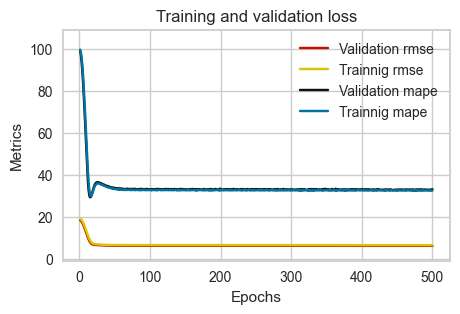

In [164]:
plotme(model7_1_3)

In [165]:
# inputs: distance + roadtypes distance
model7_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model7_1_4

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 1294073.7500 - mape: 99.9399 - rmse: 1137.5736 - val_loss: 1226508.6250 - val_mape: 99.8478 - val_rmse: 1107.4785
Epoch 2/500
191/191 [==============================] - 0s 764us/step - loss: 1289546.5000 - mape: 99.6970 - rmse: 1135.5820 - val_loss: 1220187.0000 - val_mape: 99.4971 - val_rmse: 1104.6207
Epoch 3/500
191/191 [==============================] - 0s 712us/step - loss: 1281360.5000 - mape: 99.2609 - rmse: 1131.9719 - val_loss: 1210423.2500 - val_mape: 98.9557 - val_rmse: 1100.1924
Epoch 4/500
191/191 [==============================] - 0s 729us/step - loss: 1269836.7500 - mape: 98.6413 - rmse: 1126.8704 - val_loss: 1197490.7500 - val_mape: 98.2358 - val_rmse: 1094.2992
Epoch 5/500
191/191 [==============================] - 0s 737us/step - loss: 1255248.2500 - mape: 97.8587 - rmse: 1120.3787 - val_loss: 1181702.5000 - val_mape: 97.3516 - val_rmse: 1087.0614
Epoch 6/500
191/191 [==========================

Epoch 88/500
191/191 [==============================] - 0s 767us/step - loss: 157037.7500 - mape: 34.6680 - rmse: 396.2799 - val_loss: 142510.7031 - val_mape: 35.2462 - val_rmse: 377.5059
Epoch 89/500
191/191 [==============================] - 0s 767us/step - loss: 156788.4062 - mape: 34.6522 - rmse: 395.9651 - val_loss: 142295.6719 - val_mape: 35.2214 - val_rmse: 377.2210
Epoch 90/500
191/191 [==============================] - 0s 756us/step - loss: 156555.9531 - mape: 34.6009 - rmse: 395.6715 - val_loss: 142066.7344 - val_mape: 35.1753 - val_rmse: 376.9174
Epoch 91/500
191/191 [==============================] - 0s 737us/step - loss: 156328.8750 - mape: 34.5382 - rmse: 395.3845 - val_loss: 141820.1406 - val_mape: 35.0995 - val_rmse: 376.5901
Epoch 92/500
191/191 [==============================] - 0s 684us/step - loss: 156105.0312 - mape: 34.4851 - rmse: 395.1013 - val_loss: 141539.4219 - val_mape: 34.9799 - val_rmse: 376.2173
Epoch 93/500
191/191 [==============================] - 0s 8

191/191 [==============================] - 0s 762us/step - loss: 150973.0625 - mape: 32.8268 - rmse: 388.5525 - val_loss: 136234.0156 - val_mape: 33.2454 - val_rmse: 369.0989
Epoch 175/500
191/191 [==============================] - 0s 749us/step - loss: 150961.7969 - mape: 32.8191 - rmse: 388.5380 - val_loss: 136267.5000 - val_mape: 33.2935 - val_rmse: 369.1443
Epoch 176/500
191/191 [==============================] - 0s 771us/step - loss: 150951.1562 - mape: 32.8449 - rmse: 388.5243 - val_loss: 136277.4062 - val_mape: 33.3082 - val_rmse: 369.1577
Epoch 177/500
191/191 [==============================] - 0s 777us/step - loss: 150947.4844 - mape: 32.8202 - rmse: 388.5196 - val_loss: 136267.2344 - val_mape: 33.3064 - val_rmse: 369.1439
Epoch 178/500
191/191 [==============================] - 0s 765us/step - loss: 150933.2188 - mape: 32.8757 - rmse: 388.5013 - val_loss: 136250.0156 - val_mape: 33.2866 - val_rmse: 369.1206
Epoch 179/500
191/191 [==============================] - 0s 696us/ste

191/191 [==============================] - 0s 764us/step - loss: 150610.8594 - mape: 32.7244 - rmse: 388.0862 - val_loss: 136018.0625 - val_mape: 33.1420 - val_rmse: 368.8063
Epoch 261/500
191/191 [==============================] - 0s 729us/step - loss: 150606.8750 - mape: 32.7630 - rmse: 388.0810 - val_loss: 136053.8906 - val_mape: 33.1881 - val_rmse: 368.8548
Epoch 262/500
191/191 [==============================] - 0s 821us/step - loss: 150609.7344 - mape: 32.7429 - rmse: 388.0847 - val_loss: 136050.1250 - val_mape: 33.1830 - val_rmse: 368.8497
Epoch 263/500
191/191 [==============================] - 0s 834us/step - loss: 150609.0156 - mape: 32.7519 - rmse: 388.0838 - val_loss: 136078.5938 - val_mape: 33.2191 - val_rmse: 368.8883
Epoch 264/500
191/191 [==============================] - 0s 713us/step - loss: 150609.7656 - mape: 32.7299 - rmse: 388.0847 - val_loss: 136040.9531 - val_mape: 33.1717 - val_rmse: 368.8373
Epoch 265/500
191/191 [==============================] - 0s 848us/ste

191/191 [==============================] - 0s 784us/step - loss: 150513.1719 - mape: 32.7209 - rmse: 387.9603 - val_loss: 136088.0000 - val_mape: 33.1775 - val_rmse: 368.9011
Epoch 347/500
191/191 [==============================] - 0s 732us/step - loss: 150509.0469 - mape: 32.7739 - rmse: 387.9550 - val_loss: 136064.8438 - val_mape: 33.1465 - val_rmse: 368.8697
Epoch 348/500
191/191 [==============================] - 0s 827us/step - loss: 150516.5156 - mape: 32.7631 - rmse: 387.9646 - val_loss: 136054.7031 - val_mape: 33.1338 - val_rmse: 368.8559
Epoch 349/500
191/191 [==============================] - 0s 695us/step - loss: 150510.9688 - mape: 32.7482 - rmse: 387.9574 - val_loss: 136065.9062 - val_mape: 33.1458 - val_rmse: 368.8711
Epoch 350/500
191/191 [==============================] - 0s 741us/step - loss: 150511.9531 - mape: 32.7777 - rmse: 387.9587 - val_loss: 136032.8750 - val_mape: 33.1024 - val_rmse: 368.8264
Epoch 351/500
191/191 [==============================] - 0s 790us/ste

191/191 [==============================] - 0s 699us/step - loss: 150483.5312 - mape: 32.8112 - rmse: 387.9221 - val_loss: 136115.9844 - val_mape: 33.1344 - val_rmse: 368.9390
Epoch 433/500
191/191 [==============================] - 0s 824us/step - loss: 150474.5625 - mape: 32.6785 - rmse: 387.9105 - val_loss: 136127.7188 - val_mape: 33.1497 - val_rmse: 368.9549
Epoch 434/500
191/191 [==============================] - 0s 778us/step - loss: 150475.8438 - mape: 32.7002 - rmse: 387.9122 - val_loss: 136153.4219 - val_mape: 33.1814 - val_rmse: 368.9897
Epoch 435/500
191/191 [==============================] - 0s 771us/step - loss: 150477.3750 - mape: 32.7742 - rmse: 387.9141 - val_loss: 136128.5625 - val_mape: 33.1484 - val_rmse: 368.9561
Epoch 436/500
191/191 [==============================] - 0s 737us/step - loss: 150477.9062 - mape: 32.8217 - rmse: 387.9148 - val_loss: 136122.5625 - val_mape: 33.1428 - val_rmse: 368.9479
Epoch 437/500
191/191 [==============================] - 0s 786us/ste

In [166]:
# inputs: distance + roadtypes distance
model7_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model7_1_5

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 1288028.5000 - mape: 99.6210 - rmse: 1134.9135 - val_loss: 1208706.6250 - val_mape: 98.8714 - val_rmse: 1099.4120
Epoch 2/500
191/191 [==============================] - 0s 838us/step - loss: 1246992.7500 - mape: 97.4285 - rmse: 1116.6884 - val_loss: 1147309.3750 - val_mape: 95.4274 - val_rmse: 1071.1252
Epoch 3/500
191/191 [==============================] - 0s 759us/step - loss: 1165011.5000 - mape: 92.8916 - rmse: 1079.3569 - val_loss: 1048889.5000 - val_mape: 89.6711 - val_rmse: 1024.1531
Epoch 4/500
191/191 [==============================] - 0s 857us/step - loss: 1051338.2500 - mape: 86.2991 - rmse: 1025.3479 - val_loss: 925820.1875 - val_mape: 82.0083 - val_rmse: 962.1955
Epoch 5/500
191/191 [==============================] - 0s 802us/step - loss: 918332.0000 - mape: 78.0572 - rmse: 958.2964 - val_loss: 789918.5000 - val_mape: 72.7887 - val_rmse: 888.7736
Epoch 6/500
191/191 [==============================] 

Epoch 88/500
191/191 [==============================] - 0s 808us/step - loss: 150491.2188 - mape: 32.8121 - rmse: 387.9320 - val_loss: 135952.7812 - val_mape: 32.9916 - val_rmse: 368.7177
Epoch 89/500
191/191 [==============================] - 0s 865us/step - loss: 150494.1406 - mape: 32.7647 - rmse: 387.9357 - val_loss: 135982.0781 - val_mape: 33.0390 - val_rmse: 368.7575
Epoch 90/500
191/191 [==============================] - 0s 757us/step - loss: 150483.7188 - mape: 32.6328 - rmse: 387.9223 - val_loss: 136084.3125 - val_mape: 33.1738 - val_rmse: 368.8961
Epoch 91/500
191/191 [==============================] - 0s 827us/step - loss: 150481.6094 - mape: 32.6773 - rmse: 387.9196 - val_loss: 136095.5625 - val_mape: 33.1790 - val_rmse: 368.9113
Epoch 92/500
191/191 [==============================] - 0s 788us/step - loss: 150469.4844 - mape: 32.9016 - rmse: 387.9040 - val_loss: 136000.6250 - val_mape: 33.0530 - val_rmse: 368.7826
Epoch 93/500
191/191 [==============================] - 0s 8

191/191 [==============================] - 0s 840us/step - loss: 150248.8750 - mape: 32.7320 - rmse: 387.6195 - val_loss: 135925.0625 - val_mape: 33.0072 - val_rmse: 368.6802
Epoch 175/500
191/191 [==============================] - 0s 824us/step - loss: 150237.9688 - mape: 32.7038 - rmse: 387.6054 - val_loss: 135972.5469 - val_mape: 33.0809 - val_rmse: 368.7446
Epoch 176/500
191/191 [==============================] - 0s 740us/step - loss: 150221.5156 - mape: 32.6633 - rmse: 387.5842 - val_loss: 135966.8125 - val_mape: 33.0671 - val_rmse: 368.7368
Epoch 177/500
191/191 [==============================] - 0s 785us/step - loss: 150211.8125 - mape: 32.7861 - rmse: 387.5717 - val_loss: 135959.1406 - val_mape: 33.0699 - val_rmse: 368.7264
Epoch 178/500
191/191 [==============================] - 0s 767us/step - loss: 150225.5781 - mape: 32.5461 - rmse: 387.5894 - val_loss: 135992.7969 - val_mape: 33.1098 - val_rmse: 368.7720
Epoch 179/500
191/191 [==============================] - 0s 806us/ste

191/191 [==============================] - 0s 820us/step - loss: 149894.5625 - mape: 32.6045 - rmse: 387.1622 - val_loss: 135754.9375 - val_mape: 33.1694 - val_rmse: 368.4494
Epoch 261/500
191/191 [==============================] - 0s 842us/step - loss: 149865.4375 - mape: 32.7659 - rmse: 387.1246 - val_loss: 135414.1094 - val_mape: 32.7366 - val_rmse: 367.9866
Epoch 262/500
191/191 [==============================] - 0s 779us/step - loss: 149871.4375 - mape: 32.4760 - rmse: 387.1323 - val_loss: 135713.9062 - val_mape: 33.1320 - val_rmse: 368.3937
Epoch 263/500
191/191 [==============================] - 0s 769us/step - loss: 149864.1094 - mape: 32.6387 - rmse: 387.1229 - val_loss: 135539.1094 - val_mape: 32.9251 - val_rmse: 368.1564
Epoch 264/500
191/191 [==============================] - 0s 769us/step - loss: 149875.5938 - mape: 32.6053 - rmse: 387.1377 - val_loss: 135607.2344 - val_mape: 33.0189 - val_rmse: 368.2489
Epoch 265/500
191/191 [==============================] - 0s 792us/ste

191/191 [==============================] - 0s 783us/step - loss: 149491.0000 - mape: 32.6543 - rmse: 386.6407 - val_loss: 135097.4375 - val_mape: 32.8434 - val_rmse: 367.5560
Epoch 347/500
191/191 [==============================] - 0s 763us/step - loss: 149491.2500 - mape: 32.4586 - rmse: 386.6410 - val_loss: 135294.9219 - val_mape: 33.0898 - val_rmse: 367.8246
Epoch 348/500
191/191 [==============================] - 0s 787us/step - loss: 149489.6406 - mape: 32.8057 - rmse: 386.6389 - val_loss: 135137.5156 - val_mape: 32.9036 - val_rmse: 367.6105
Epoch 349/500
191/191 [==============================] - 0s 716us/step - loss: 149495.7344 - mape: 32.5667 - rmse: 386.6468 - val_loss: 135273.7500 - val_mape: 33.0755 - val_rmse: 367.7958
Epoch 350/500
191/191 [==============================] - 0s 717us/step - loss: 149498.5000 - mape: 32.7771 - rmse: 386.6504 - val_loss: 135105.9844 - val_mape: 32.8628 - val_rmse: 367.5677
Epoch 351/500
191/191 [==============================] - 0s 781us/ste

191/191 [==============================] - 0s 780us/step - loss: 149131.8438 - mape: 32.5214 - rmse: 386.1759 - val_loss: 134893.1250 - val_mape: 33.0194 - val_rmse: 367.2780
Epoch 433/500
191/191 [==============================] - 0s 848us/step - loss: 149127.6250 - mape: 32.5893 - rmse: 386.1705 - val_loss: 134712.1562 - val_mape: 32.7897 - val_rmse: 367.0316
Epoch 434/500
191/191 [==============================] - 0s 747us/step - loss: 149121.6250 - mape: 32.4623 - rmse: 386.1627 - val_loss: 134844.0000 - val_mape: 32.9652 - val_rmse: 367.2111
Epoch 435/500
191/191 [==============================] - 0s 705us/step - loss: 149118.5156 - mape: 32.5953 - rmse: 386.1587 - val_loss: 134690.8438 - val_mape: 32.7690 - val_rmse: 367.0025
Epoch 436/500
191/191 [==============================] - 0s 788us/step - loss: 149111.2656 - mape: 32.5315 - rmse: 386.1493 - val_loss: 134823.2344 - val_mape: 32.9388 - val_rmse: 367.1828
Epoch 437/500
191/191 [==============================] - 0s 798us/ste

## model 8: take the most powerful regressors: distance, 1st dominated hot-encoded, primary road full distance

In [188]:
df_ = pd.concat([df, dff], axis=1)
df_ = df_[['travel time','distance','1st ranked','2nd ranked','3rd ranked','primary','secondary','service']]
df_ = df_.T.drop_duplicates().T
# df_ = df_.drop(df_.columns[[1, 1, 2]],axis = 1)
df_

travel time distance 1st ranked   2nd ranked    3rd ranked  primary  \
0           1562    19784    primary     tertiary  unclassified  17778.4   
1           1247  18663.3    primary     tertiary   residential  16453.7   
2            823  11453.3    primary     tertiary  primary_link  9565.88   
3           1066  14463.1    primary     tertiary       service  10057.8   
4            665  10011.9    primary  residential      tertiary  8304.14   
...          ...      ...        ...          ...           ...      ...   
7608         945  15008.9    primary     tertiary   residential  8979.96   
7609         935  13358.4    primary  residential  primary_link  11132.5   
7610        1122    13258    primary  residential      tertiary  9557.67   
7611        1285  22855.7    primary     tertiary   residential  18316.8   
7612         499  6495.84   tertiary      primary   residential  2166.26   

     secondary  service  
0            0        0  
1            0        0  
2            0  188.852  
3            0  381.502  
4            0        0  
...        ...      ...  
7608         0        0  
7609         0        0  
7610         0  148.002  
7611    759.01   49.571  
7612         0        0  

[7613 rows x 8 columns]

In [189]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   travel time  7613 non-null   object
 1   distance     7613 non-null   object
 2   1st ranked   7613 non-null   object
 3   2nd ranked   7272 non-null   object
 4   3rd ranked   5863 non-null   object
 5   primary      7613 non-null   object
 6   secondary    7613 non-null   object
 7   service      7613 non-null   object
dtypes: object(8)
memory usage: 855.3+ KB


In [190]:
df_['travel time'] = df_['travel time'].astype(float)
df_['primary'] = df_['primary'].astype(float)
df_['secondary'] = df_['secondary'].astype(float)
df_['service'] = df_['service'].astype(float)
df_['distance'] = df_['distance'].astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel time  7613 non-null   float64
 1   distance     7613 non-null   float64
 2   1st ranked   7613 non-null   object 
 3   2nd ranked   7272 non-null   object 
 4   3rd ranked   5863 non-null   object 
 5   primary      7613 non-null   float64
 6   secondary    7613 non-null   float64
 7   service      7613 non-null   float64
dtypes: float64(5), object(3)
memory usage: 855.3+ KB


In [191]:
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway          93.0
primary         3219.0
residential     1121.0
secondary       1990.0
service            5.0
tertiary        1027.0
track              8.0
unclassified     150.0
Name: travel time, dtype: float64

In [192]:
option = ['residential','tertiary','primary','secondary']
df_.loc[~df_['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         256.0
primary        3219.0
residential    1121.0
secondary      1990.0
tertiary       1027.0
Name: travel time, dtype: float64

In [193]:
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
living_street      49.0
motorway           13.0
primary          1247.0
primary_link       95.0
residential      2182.0
road                7.0
secondary         412.0
service           259.0
tertiary         2208.0
track              16.0
unclassified      784.0
Name: travel time, dtype: float64

In [194]:
option = ['residential','tertiary','secondary','primary',None]
df_.loc[~df_['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        1564.0
primary        1247.0
residential    2182.0
secondary       412.0
tertiary       2208.0
Name: travel time, dtype: float64

In [195]:
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
living_street      145.0
motorway_link       37.0
primary            645.0
primary_link       724.0
residential       1839.0
road                 1.0
secondary          223.0
secondary_link      45.0
service            770.0
tertiary           583.0
track               46.0
trunk                3.0
unclassified       802.0
Name: travel time, dtype: float64

In [196]:
option = ['residential','tertiary','primary','service',None]
df_.loc[~df_['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3        3776.0
primary         645.0
residential    1839.0
service         770.0
tertiary        583.0
Name: travel time, dtype: float64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [197]:
te = TargetEncoder()
df_['1st ranked'] = te.fit_transform(df_['1st ranked'],df_['travel time'])
df_['2nd ranked'] = te.fit_transform(df_['2nd ranked'],df_['travel time'])
df_['3rd ranked'] = te.fit_transform(df_['3rd ranked'],df_['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [198]:
df_.head()

travel time   distance   1st ranked   2nd ranked   3rd ranked    primary  \
0       1562.0  19784.000  1055.508543  1064.363225   981.565678  17778.401   
1       1247.0  18663.286  1055.508543  1064.363225  1086.653072  16453.699   
2        823.0  11453.273  1055.508543  1064.363225   981.565678   9565.882   
3       1066.0  14463.104  1055.508543  1064.363225  1009.116883  10057.793   
4        665.0  10011.876  1055.508543   971.604950  1119.897084   8304.143   

   secondary  service  
0        0.0    0.000  
1        0.0    0.000  
2        0.0  188.852  
3        0.0  381.502  
4        0.0    0.000

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

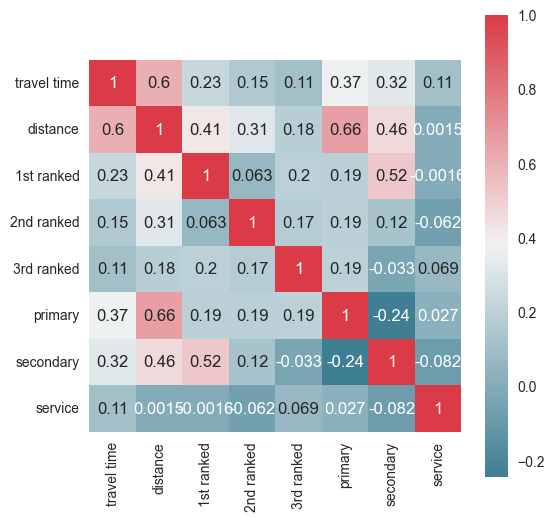

In [199]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df_.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [200]:
x = np.array(df_.iloc[:,1:])
y = np.array(df_['travel time'])
x

array([[19784.        ,  1055.50854303,  1064.36322464, ...,
        17778.401     ,     0.        ,     0.        ],
       [18663.286     ,  1055.50854303,  1064.36322464, ...,
        16453.699     ,     0.        ,     0.        ],
       [11453.273     ,  1055.50854303,  1064.36322464, ...,
         9565.882     ,     0.        ,   188.852     ],
       ...,
       [13258.039     ,  1055.50854303,   971.60494959, ...,
         9557.675     ,     0.        ,   148.002     ],
       [22855.665     ,  1055.50854303,  1064.36322464, ...,
        18316.769     ,   759.01      ,    49.571     ],
       [ 6495.842     ,   882.98442064,  1071.84522855, ...,
         2166.255     ,     0.        ,     0.        ]])

In [201]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [202]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6090, 7)
(1523, 7)


In [203]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 320976.3750 - mape: 41.2033 - rmse: 566.5478 - val_loss: 135779.9688 - val_mape: 31.7848 - val_rmse: 368.4833
Epoch 2/500
191/191 [==============================] - 0s 860us/step - loss: 147045.4062 - mape: 32.1823 - rmse: 383.4650 - val_loss: 133593.8438 - val_mape: 33.7795 - val_rmse: 365.5049
Epoch 3/500
191/191 [==============================] - 0s 761us/step - loss: 145898.9688 - mape: 32.0907 - rmse: 381.9672 - val_loss: 134912.8594 - val_mape: 32.7178 - val_rmse: 367.3049
Epoch 4/500
191/191 [==============================] - 0s 827us/step - loss: 145703.2500 - mape: 31.8104 - rmse: 381.7109 - val_loss: 131207.7188 - val_mape: 31.6804 - val_rmse: 362.2261
Epoch 5/500
191/191 [==============================] - 0s 832us/step - loss: 144796.4531 - mape: 31.8025 - rmse: 380.5213 - val_loss: 130900.3672 - val_mape: 31.1821 - val_rmse: 361.8015
Epoch 6/500
191/191 [==============================] - 0s 790us/ste

Epoch 45/500
191/191 [==============================] - 0s 824us/step - loss: 142645.3281 - mape: 30.9856 - rmse: 377.6842 - val_loss: 131066.0156 - val_mape: 33.3690 - val_rmse: 362.0304
Epoch 46/500
191/191 [==============================] - 0s 819us/step - loss: 141043.5000 - mape: 31.4054 - rmse: 375.5576 - val_loss: 139082.5781 - val_mape: 36.1918 - val_rmse: 372.9378
Epoch 47/500
191/191 [==============================] - 0s 840us/step - loss: 139110.5625 - mape: 30.9045 - rmse: 372.9753 - val_loss: 130522.5703 - val_mape: 29.2411 - val_rmse: 361.2791
Epoch 48/500
191/191 [==============================] - 0s 810us/step - loss: 142257.3594 - mape: 31.1190 - rmse: 377.1702 - val_loss: 129127.8984 - val_mape: 33.9898 - val_rmse: 359.3437
Epoch 49/500
191/191 [==============================] - 0s 850us/step - loss: 141544.8906 - mape: 31.2479 - rmse: 376.2245 - val_loss: 125439.2656 - val_mape: 29.5636 - val_rmse: 354.1741
Epoch 50/500
191/191 [==============================] - 0s 9

191/191 [==============================] - 0s 720us/step - loss: 138459.2031 - mape: 30.5368 - rmse: 372.1011 - val_loss: 127674.1172 - val_mape: 32.3424 - val_rmse: 357.3152
Epoch 132/500
191/191 [==============================] - 0s 768us/step - loss: 137550.6406 - mape: 30.1820 - rmse: 370.8782 - val_loss: 130502.3906 - val_mape: 34.7370 - val_rmse: 361.2512
Epoch 133/500
191/191 [==============================] - 0s 753us/step - loss: 137080.2500 - mape: 30.5939 - rmse: 370.2435 - val_loss: 126655.3594 - val_mape: 30.0629 - val_rmse: 355.8867
Epoch 134/500
191/191 [==============================] - 0s 758us/step - loss: 136596.7969 - mape: 30.1225 - rmse: 369.5900 - val_loss: 130098.7969 - val_mape: 33.3064 - val_rmse: 360.6921
Epoch 135/500
191/191 [==============================] - 0s 881us/step - loss: 136082.4219 - mape: 30.3928 - rmse: 368.8935 - val_loss: 133446.1719 - val_mape: 33.8217 - val_rmse: 365.3029
Epoch 136/500
191/191 [==============================] - 0s 752us/ste

191/191 [==============================] - 0s 898us/step - loss: 135201.7188 - mape: 29.9237 - rmse: 367.6979 - val_loss: 133856.9844 - val_mape: 36.1357 - val_rmse: 365.8647
Epoch 218/500
191/191 [==============================] - 0s 909us/step - loss: 134638.1094 - mape: 30.1812 - rmse: 366.9307 - val_loss: 124825.5781 - val_mape: 30.9546 - val_rmse: 353.3066
Epoch 219/500
191/191 [==============================] - 0s 960us/step - loss: 135912.1406 - mape: 30.2439 - rmse: 368.6626 - val_loss: 126331.1250 - val_mape: 30.6388 - val_rmse: 355.4309
Epoch 220/500
191/191 [==============================] - 0s 829us/step - loss: 135003.0156 - mape: 30.0757 - rmse: 367.4276 - val_loss: 129325.1953 - val_mape: 33.1171 - val_rmse: 359.6181
Epoch 221/500
191/191 [==============================] - 0s 784us/step - loss: 134705.7969 - mape: 30.0406 - rmse: 367.0229 - val_loss: 125350.3594 - val_mape: 31.1420 - val_rmse: 354.0485
Epoch 222/500
191/191 [==============================] - 0s 888us/ste

191/191 [==============================] - 0s 894us/step - loss: 134010.4375 - mape: 29.8182 - rmse: 366.0744 - val_loss: 124400.5781 - val_mape: 29.8746 - val_rmse: 352.7047
Epoch 304/500
191/191 [==============================] - 0s 859us/step - loss: 133619.1406 - mape: 29.7707 - rmse: 365.5395 - val_loss: 127215.1094 - val_mape: 32.1970 - val_rmse: 356.6723
Epoch 305/500
191/191 [==============================] - 0s 769us/step - loss: 133771.3906 - mape: 29.9467 - rmse: 365.7477 - val_loss: 125394.1953 - val_mape: 30.7241 - val_rmse: 354.1104
Epoch 306/500
191/191 [==============================] - 0s 797us/step - loss: 133323.5781 - mape: 29.8499 - rmse: 365.1350 - val_loss: 126390.4531 - val_mape: 30.9474 - val_rmse: 355.5143
Epoch 307/500
191/191 [==============================] - 0s 819us/step - loss: 133978.5000 - mape: 29.9945 - rmse: 366.0307 - val_loss: 125360.4766 - val_mape: 28.6243 - val_rmse: 354.0628
Epoch 308/500
191/191 [==============================] - 0s 765us/ste

191/191 [==============================] - 0s 842us/step - loss: 133085.7812 - mape: 29.9167 - rmse: 364.8092 - val_loss: 129041.2422 - val_mape: 33.4945 - val_rmse: 359.2231
Epoch 390/500
191/191 [==============================] - 0s 771us/step - loss: 133219.2500 - mape: 29.6862 - rmse: 364.9921 - val_loss: 124803.7500 - val_mape: 30.6434 - val_rmse: 353.2758
Epoch 391/500
191/191 [==============================] - 0s 756us/step - loss: 133391.9688 - mape: 30.0100 - rmse: 365.2286 - val_loss: 126438.2812 - val_mape: 28.1334 - val_rmse: 355.5816
Epoch 392/500
191/191 [==============================] - 0s 823us/step - loss: 133282.3906 - mape: 29.6774 - rmse: 365.0786 - val_loss: 124613.6641 - val_mape: 29.6510 - val_rmse: 353.0066
Epoch 393/500
191/191 [==============================] - 0s 806us/step - loss: 134191.5469 - mape: 29.8029 - rmse: 366.3217 - val_loss: 132488.4844 - val_mape: 32.8769 - val_rmse: 363.9897
Epoch 394/500
191/191 [==============================] - 0s 726us/ste

191/191 [==============================] - 0s 787us/step - loss: 132735.2188 - mape: 29.9293 - rmse: 364.3285 - val_loss: 124735.3281 - val_mape: 30.0227 - val_rmse: 353.1789
Epoch 476/500
191/191 [==============================] - 0s 905us/step - loss: 132055.9844 - mape: 29.3268 - rmse: 363.3951 - val_loss: 127301.8828 - val_mape: 31.2785 - val_rmse: 356.7939
Epoch 477/500
191/191 [==============================] - 0s 930us/step - loss: 133064.7812 - mape: 29.8162 - rmse: 364.7805 - val_loss: 125739.2422 - val_mape: 31.1661 - val_rmse: 354.5973
Epoch 478/500
191/191 [==============================] - 0s 804us/step - loss: 133258.1562 - mape: 29.7239 - rmse: 365.0454 - val_loss: 125632.0703 - val_mape: 31.1732 - val_rmse: 354.4461
Epoch 479/500
191/191 [==============================] - 0s 826us/step - loss: 132738.7656 - mape: 29.5272 - rmse: 364.3333 - val_loss: 132217.7031 - val_mape: 33.5959 - val_rmse: 363.6175
Epoch 480/500
191/191 [==============================] - 0s 937us/ste

In [205]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 188333.8125 - mape: 32.8013 - rmse: 433.9744 - val_loss: 138093.6406 - val_mape: 31.1350 - val_rmse: 371.6095
Epoch 2/500
191/191 [==============================] - 0s 783us/step - loss: 148464.5469 - mape: 32.2017 - rmse: 385.3110 - val_loss: 135792.9219 - val_mape: 34.4644 - val_rmse: 368.5009
Epoch 3/500
191/191 [==============================] - 0s 862us/step - loss: 146556.2656 - mape: 31.7352 - rmse: 382.8267 - val_loss: 130684.5000 - val_mape: 32.2590 - val_rmse: 361.5031
Epoch 4/500
191/191 [==============================] - 0s 918us/step - loss: 146107.8438 - mape: 31.8593 - rmse: 382.2406 - val_loss: 131927.2344 - val_mape: 33.8443 - val_rmse: 363.2179
Epoch 5/500
191/191 [==============================] - 0s 837us/step - loss: 146513.1875 - mape: 31.9681 - rmse: 382.7704 - val_loss: 133964.3906 - val_mape: 31.3575 - val_rmse: 366.0115
Epoch 6/500
191/191 [==============================] - 0s 1ms/step 

Epoch 45/500
191/191 [==============================] - 0s 822us/step - loss: 140008.4844 - mape: 31.0255 - rmse: 374.1771 - val_loss: 124807.6406 - val_mape: 30.1532 - val_rmse: 353.2812
Epoch 46/500
191/191 [==============================] - 0s 732us/step - loss: 139711.3438 - mape: 30.8069 - rmse: 373.7798 - val_loss: 127675.9766 - val_mape: 31.7334 - val_rmse: 357.3177
Epoch 47/500
191/191 [==============================] - 0s 968us/step - loss: 141434.3281 - mape: 31.0964 - rmse: 376.0775 - val_loss: 125202.8750 - val_mape: 30.2392 - val_rmse: 353.8402
Epoch 48/500
191/191 [==============================] - 0s 724us/step - loss: 140973.1250 - mape: 31.1873 - rmse: 375.4639 - val_loss: 137856.2656 - val_mape: 26.5837 - val_rmse: 371.2900
Epoch 49/500
191/191 [==============================] - 0s 839us/step - loss: 142590.8281 - mape: 30.9005 - rmse: 377.6120 - val_loss: 153464.3125 - val_mape: 31.2566 - val_rmse: 391.7452
Epoch 50/500
191/191 [==============================] - 0s 8

191/191 [==============================] - 0s 803us/step - loss: 135595.3750 - mape: 29.8633 - rmse: 368.2328 - val_loss: 132040.0000 - val_mape: 33.8707 - val_rmse: 363.3731
Epoch 132/500
191/191 [==============================] - 0s 903us/step - loss: 136784.1562 - mape: 30.3046 - rmse: 369.8434 - val_loss: 125289.6875 - val_mape: 29.1453 - val_rmse: 353.9628
Epoch 133/500
191/191 [==============================] - 0s 820us/step - loss: 136306.7812 - mape: 30.2506 - rmse: 369.1975 - val_loss: 127278.1172 - val_mape: 31.7856 - val_rmse: 356.7606
Epoch 134/500
191/191 [==============================] - 0s 798us/step - loss: 135491.4219 - mape: 29.9966 - rmse: 368.0916 - val_loss: 125872.1172 - val_mape: 30.8827 - val_rmse: 354.7846
Epoch 135/500
191/191 [==============================] - 0s 783us/step - loss: 136265.3438 - mape: 30.0743 - rmse: 369.1414 - val_loss: 128121.2656 - val_mape: 31.9425 - val_rmse: 357.9403
Epoch 136/500
191/191 [==============================] - 0s 787us/ste

191/191 [==============================] - 0s 832us/step - loss: 134477.5000 - mape: 29.8715 - rmse: 366.7117 - val_loss: 125740.8516 - val_mape: 31.0286 - val_rmse: 354.5996
Epoch 218/500
191/191 [==============================] - 0s 837us/step - loss: 134163.4219 - mape: 29.9584 - rmse: 366.2833 - val_loss: 127557.4766 - val_mape: 30.6302 - val_rmse: 357.1519
Epoch 219/500
191/191 [==============================] - 0s 832us/step - loss: 133764.2656 - mape: 29.8375 - rmse: 365.7380 - val_loss: 126972.2422 - val_mape: 30.1315 - val_rmse: 356.3316
Epoch 220/500
191/191 [==============================] - 0s 782us/step - loss: 133427.6094 - mape: 29.7492 - rmse: 365.2774 - val_loss: 126918.8828 - val_mape: 31.2534 - val_rmse: 356.2568
Epoch 221/500
191/191 [==============================] - 0s 804us/step - loss: 134406.8750 - mape: 30.0244 - rmse: 366.6154 - val_loss: 129684.7266 - val_mape: 32.8694 - val_rmse: 360.1176
Epoch 222/500
191/191 [==============================] - 0s 746us/ste

191/191 [==============================] - 0s 790us/step - loss: 133126.3438 - mape: 29.9770 - rmse: 364.8648 - val_loss: 126045.2891 - val_mape: 31.4396 - val_rmse: 355.0286
Epoch 304/500
191/191 [==============================] - 0s 747us/step - loss: 133040.6094 - mape: 29.8604 - rmse: 364.7473 - val_loss: 131645.6562 - val_mape: 33.8280 - val_rmse: 362.8301
Epoch 305/500
191/191 [==============================] - 0s 876us/step - loss: 132938.4688 - mape: 29.5896 - rmse: 364.6073 - val_loss: 127312.8750 - val_mape: 32.0578 - val_rmse: 356.8093
Epoch 306/500
191/191 [==============================] - 0s 715us/step - loss: 132722.4375 - mape: 29.7045 - rmse: 364.3109 - val_loss: 129269.7891 - val_mape: 32.0822 - val_rmse: 359.5411
Epoch 307/500
191/191 [==============================] - 0s 799us/step - loss: 133246.4375 - mape: 29.8871 - rmse: 365.0294 - val_loss: 128855.9766 - val_mape: 32.9363 - val_rmse: 358.9651
Epoch 308/500
191/191 [==============================] - 0s 818us/ste

191/191 [==============================] - 0s 784us/step - loss: 132463.2500 - mape: 29.5321 - rmse: 363.9550 - val_loss: 127520.0547 - val_mape: 32.0663 - val_rmse: 357.0995
Epoch 390/500
191/191 [==============================] - 0s 719us/step - loss: 132236.6406 - mape: 29.7153 - rmse: 363.6436 - val_loss: 126854.2188 - val_mape: 31.1004 - val_rmse: 356.1660
Epoch 391/500
191/191 [==============================] - 0s 842us/step - loss: 132307.7656 - mape: 29.7332 - rmse: 363.7413 - val_loss: 125500.1641 - val_mape: 28.5201 - val_rmse: 354.2600
Epoch 392/500
191/191 [==============================] - 0s 813us/step - loss: 132688.6719 - mape: 29.4391 - rmse: 364.2646 - val_loss: 131061.0703 - val_mape: 34.5582 - val_rmse: 362.0236
Epoch 393/500
191/191 [==============================] - 0s 818us/step - loss: 132133.9531 - mape: 29.6484 - rmse: 363.5023 - val_loss: 126752.0078 - val_mape: 31.9944 - val_rmse: 356.0225
Epoch 394/500
191/191 [==============================] - 0s 816us/ste

191/191 [==============================] - 0s 804us/step - loss: 131648.6875 - mape: 29.3666 - rmse: 362.8342 - val_loss: 131942.4844 - val_mape: 29.4259 - val_rmse: 363.2389
Epoch 476/500
191/191 [==============================] - 0s 730us/step - loss: 132401.5156 - mape: 29.3911 - rmse: 363.8702 - val_loss: 127140.5000 - val_mape: 31.1854 - val_rmse: 356.5677
Epoch 477/500
191/191 [==============================] - 0s 751us/step - loss: 131327.4844 - mape: 29.3308 - rmse: 362.3913 - val_loss: 127606.8594 - val_mape: 30.4838 - val_rmse: 357.2210
Epoch 478/500
191/191 [==============================] - 0s 751us/step - loss: 131825.0625 - mape: 29.5369 - rmse: 363.0772 - val_loss: 128915.1953 - val_mape: 30.9944 - val_rmse: 359.0476
Epoch 479/500
191/191 [==============================] - 0s 780us/step - loss: 132082.7500 - mape: 29.3275 - rmse: 363.4319 - val_loss: 131077.2500 - val_mape: 32.5038 - val_rmse: 362.0459
Epoch 480/500
191/191 [==============================] - 0s 765us/ste

In [206]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 234637.5781 - mape: 34.8954 - rmse: 484.3940 - val_loss: 140130.8438 - val_mape: 37.3492 - val_rmse: 374.3405
Epoch 2/500
191/191 [==============================] - 0s 921us/step - loss: 151157.9531 - mape: 32.7884 - rmse: 388.7904 - val_loss: 136085.0781 - val_mape: 34.5352 - val_rmse: 368.8971
Epoch 3/500
191/191 [==============================] - 0s 884us/step - loss: 147910.1406 - mape: 32.0512 - rmse: 384.5909 - val_loss: 132513.0781 - val_mape: 31.8018 - val_rmse: 364.0235
Epoch 4/500
191/191 [==============================] - 0s 925us/step - loss: 147205.6094 - mape: 31.8904 - rmse: 383.6738 - val_loss: 137796.6719 - val_mape: 26.9185 - val_rmse: 371.2097
Epoch 5/500
191/191 [==============================] - 0s 865us/step - loss: 149013.7500 - mape: 31.9797 - rmse: 386.0230 - val_loss: 135815.2812 - val_mape: 34.7039 - val_rmse: 368.5312
Epoch 6/500
191/191 [==============================] - 0s 810us/ste

Epoch 45/500
191/191 [==============================] - 0s 816us/step - loss: 136544.5000 - mape: 30.1349 - rmse: 369.5193 - val_loss: 131867.5781 - val_mape: 31.7236 - val_rmse: 363.1357
Epoch 46/500
191/191 [==============================] - 0s 796us/step - loss: 137086.5781 - mape: 30.1709 - rmse: 370.2520 - val_loss: 131883.0156 - val_mape: 35.8298 - val_rmse: 363.1570
Epoch 47/500
191/191 [==============================] - 0s 801us/step - loss: 136893.6094 - mape: 30.4762 - rmse: 369.9914 - val_loss: 124123.3594 - val_mape: 29.8239 - val_rmse: 352.3115
Epoch 48/500
191/191 [==============================] - 0s 857us/step - loss: 137398.9375 - mape: 30.2112 - rmse: 370.6736 - val_loss: 129701.6016 - val_mape: 29.0017 - val_rmse: 360.1411
Epoch 49/500
191/191 [==============================] - 0s 880us/step - loss: 137182.7031 - mape: 30.3055 - rmse: 370.3818 - val_loss: 127188.0547 - val_mape: 30.3011 - val_rmse: 356.6343
Epoch 50/500
191/191 [==============================] - 0s 8

191/191 [==============================] - 0s 962us/step - loss: 132378.5625 - mape: 29.6544 - rmse: 363.8387 - val_loss: 127217.0703 - val_mape: 29.6713 - val_rmse: 356.6750
Epoch 132/500
191/191 [==============================] - 0s 824us/step - loss: 131286.4062 - mape: 29.4375 - rmse: 362.3347 - val_loss: 128073.9688 - val_mape: 30.1750 - val_rmse: 357.8742
Epoch 133/500
191/191 [==============================] - 0s 813us/step - loss: 131426.3281 - mape: 29.3816 - rmse: 362.5277 - val_loss: 130217.5469 - val_mape: 32.3879 - val_rmse: 360.8567
Epoch 134/500
191/191 [==============================] - 0s 815us/step - loss: 131656.4219 - mape: 29.4301 - rmse: 362.8449 - val_loss: 138372.5781 - val_mape: 36.0895 - val_rmse: 371.9846
Epoch 135/500
191/191 [==============================] - 0s 803us/step - loss: 131681.2031 - mape: 29.8001 - rmse: 362.8791 - val_loss: 128631.9219 - val_mape: 29.2756 - val_rmse: 358.6529
Epoch 136/500
191/191 [==============================] - 0s 818us/ste

191/191 [==============================] - 0s 806us/step - loss: 126834.9453 - mape: 28.8718 - rmse: 356.1389 - val_loss: 134324.1406 - val_mape: 32.8645 - val_rmse: 366.5026
Epoch 218/500
191/191 [==============================] - 0s 817us/step - loss: 127313.4531 - mape: 28.8162 - rmse: 356.8101 - val_loss: 132400.5625 - val_mape: 32.8560 - val_rmse: 363.8689
Epoch 219/500
191/191 [==============================] - 0s 816us/step - loss: 127110.2734 - mape: 28.8964 - rmse: 356.5253 - val_loss: 131858.1406 - val_mape: 32.1515 - val_rmse: 363.1228
Epoch 220/500
191/191 [==============================] - 0s 800us/step - loss: 126955.3516 - mape: 28.7413 - rmse: 356.3080 - val_loss: 134728.0938 - val_mape: 34.1153 - val_rmse: 367.0533
Epoch 221/500
191/191 [==============================] - 0s 811us/step - loss: 126923.4141 - mape: 29.0969 - rmse: 356.2631 - val_loss: 130702.7734 - val_mape: 30.2452 - val_rmse: 361.5284
Epoch 222/500
191/191 [==============================] - 0s 898us/ste

191/191 [==============================] - 0s 791us/step - loss: 125104.6328 - mape: 28.5338 - rmse: 353.7013 - val_loss: 139278.2812 - val_mape: 34.4596 - val_rmse: 373.2000
Epoch 304/500
191/191 [==============================] - 0s 801us/step - loss: 125173.1250 - mape: 28.5058 - rmse: 353.7982 - val_loss: 135391.1250 - val_mape: 31.2519 - val_rmse: 367.9553
Epoch 305/500
191/191 [==============================] - 0s 776us/step - loss: 125248.1484 - mape: 28.6555 - rmse: 353.9041 - val_loss: 137046.6562 - val_mape: 31.6831 - val_rmse: 370.1981
Epoch 306/500
191/191 [==============================] - 0s 747us/step - loss: 125206.6719 - mape: 28.6814 - rmse: 353.8456 - val_loss: 135014.3594 - val_mape: 31.6627 - val_rmse: 367.4430
Epoch 307/500
191/191 [==============================] - 0s 772us/step - loss: 124674.7422 - mape: 28.5934 - rmse: 353.0931 - val_loss: 132179.0938 - val_mape: 31.1045 - val_rmse: 363.5644
Epoch 308/500
191/191 [==============================] - 0s 879us/ste

191/191 [==============================] - 0s 821us/step - loss: 122455.2656 - mape: 28.3475 - rmse: 349.9361 - val_loss: 144787.9531 - val_mape: 34.3756 - val_rmse: 380.5101
Epoch 390/500
191/191 [==============================] - 0s 776us/step - loss: 122369.4062 - mape: 28.3052 - rmse: 349.8134 - val_loss: 133684.9375 - val_mape: 29.3730 - val_rmse: 365.6295
Epoch 391/500
191/191 [==============================] - 0s 888us/step - loss: 122378.8125 - mape: 28.1145 - rmse: 349.8268 - val_loss: 136835.5781 - val_mape: 31.8296 - val_rmse: 369.9129
Epoch 392/500
191/191 [==============================] - 0s 745us/step - loss: 122411.0547 - mape: 28.0840 - rmse: 349.8729 - val_loss: 134102.8438 - val_mape: 31.8882 - val_rmse: 366.2006
Epoch 393/500
191/191 [==============================] - 0s 794us/step - loss: 122404.8828 - mape: 28.0952 - rmse: 349.8641 - val_loss: 137222.1406 - val_mape: 33.5304 - val_rmse: 370.4351
Epoch 394/500
191/191 [==============================] - 0s 805us/ste

191/191 [==============================] - 0s 791us/step - loss: 120191.7344 - mape: 28.0067 - rmse: 346.6868 - val_loss: 136101.2812 - val_mape: 30.8004 - val_rmse: 368.9191
Epoch 476/500
191/191 [==============================] - 0s 777us/step - loss: 120259.5312 - mape: 27.7884 - rmse: 346.7845 - val_loss: 140987.0000 - val_mape: 33.5230 - val_rmse: 375.4824
Epoch 477/500
191/191 [==============================] - 0s 781us/step - loss: 120807.0391 - mape: 27.9204 - rmse: 347.5731 - val_loss: 137858.3906 - val_mape: 31.3299 - val_rmse: 371.2929
Epoch 478/500
191/191 [==============================] - 0s 857us/step - loss: 120400.8438 - mape: 27.7554 - rmse: 346.9883 - val_loss: 143826.3125 - val_mape: 34.5450 - val_rmse: 379.2444
Epoch 479/500
191/191 [==============================] - 0s 863us/step - loss: 120066.8672 - mape: 28.1114 - rmse: 346.5067 - val_loss: 134183.9219 - val_mape: 30.0594 - val_rmse: 366.3112
Epoch 480/500
191/191 [==============================] - 0s 842us/ste

In [208]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 187701.1406 - mape: 35.3639 - rmse: 433.2449 - val_loss: 139363.7344 - val_mape: 31.8830 - val_rmse: 373.3145
Epoch 2/500
191/191 [==============================] - 0s 923us/step - loss: 157918.1406 - mape: 33.1493 - rmse: 397.3892 - val_loss: 144363.7500 - val_mape: 30.9716 - val_rmse: 379.9523
Epoch 3/500
191/191 [==============================] - 0s 877us/step - loss: 163624.8594 - mape: 33.3154 - rmse: 404.5057 - val_loss: 153555.7500 - val_mape: 41.0794 - val_rmse: 391.8619
Epoch 4/500
191/191 [==============================] - 0s 818us/step - loss: 153918.4375 - mape: 32.8873 - rmse: 392.3244 - val_loss: 130534.4375 - val_mape: 31.3230 - val_rmse: 361.2955
Epoch 5/500
191/191 [==============================] - 0s 857us/step - loss: 157426.0781 - mape: 33.0558 - rmse: 396.7696 - val_loss: 134377.8281 - val_mape: 32.4268 - val_rmse: 366.5758
Epoch 6/500
191/191 [==============================] - 0s 810us/ste

Epoch 45/500
191/191 [==============================] - 0s 842us/step - loss: 136896.6094 - mape: 30.3699 - rmse: 369.9954 - val_loss: 126884.4766 - val_mape: 28.8658 - val_rmse: 356.2085
Epoch 46/500
191/191 [==============================] - 0s 821us/step - loss: 137327.7188 - mape: 30.3595 - rmse: 370.5775 - val_loss: 124134.2109 - val_mape: 29.1859 - val_rmse: 352.3268
Epoch 47/500
191/191 [==============================] - 0s 905us/step - loss: 137737.3906 - mape: 30.4375 - rmse: 371.1299 - val_loss: 126890.4219 - val_mape: 32.6255 - val_rmse: 356.2168
Epoch 48/500
191/191 [==============================] - 0s 838us/step - loss: 137319.0781 - mape: 30.1412 - rmse: 370.5659 - val_loss: 127684.8125 - val_mape: 34.0501 - val_rmse: 357.3301
Epoch 49/500
191/191 [==============================] - 0s 854us/step - loss: 136119.5312 - mape: 30.2821 - rmse: 368.9438 - val_loss: 125688.5703 - val_mape: 31.6317 - val_rmse: 354.5258
Epoch 50/500
191/191 [==============================] - 0s 9

191/191 [==============================] - 0s 923us/step - loss: 131916.5469 - mape: 29.4326 - rmse: 363.2032 - val_loss: 129759.6250 - val_mape: 33.3898 - val_rmse: 360.2216
Epoch 132/500
191/191 [==============================] - 0s 854us/step - loss: 131434.7656 - mape: 29.4688 - rmse: 362.5393 - val_loss: 125580.3125 - val_mape: 27.0268 - val_rmse: 354.3731
Epoch 133/500
191/191 [==============================] - 0s 911us/step - loss: 131912.3906 - mape: 29.4903 - rmse: 363.1974 - val_loss: 126169.6406 - val_mape: 29.5275 - val_rmse: 355.2037
Epoch 134/500
191/191 [==============================] - 0s 884us/step - loss: 130985.5000 - mape: 29.2957 - rmse: 361.9192 - val_loss: 127098.9062 - val_mape: 29.1856 - val_rmse: 356.5093
Epoch 135/500
191/191 [==============================] - 0s 849us/step - loss: 131728.9062 - mape: 29.2253 - rmse: 362.9448 - val_loss: 135672.2812 - val_mape: 35.2258 - val_rmse: 368.3372
Epoch 136/500
191/191 [==============================] - 0s 866us/ste

191/191 [==============================] - 0s 820us/step - loss: 128905.8750 - mape: 28.9176 - rmse: 359.0346 - val_loss: 132149.0625 - val_mape: 31.0990 - val_rmse: 363.5231
Epoch 218/500
191/191 [==============================] - 0s 833us/step - loss: 128375.6875 - mape: 28.8439 - rmse: 358.2955 - val_loss: 130894.0156 - val_mape: 31.2352 - val_rmse: 361.7928
Epoch 219/500
191/191 [==============================] - 0s 865us/step - loss: 127295.3672 - mape: 28.8115 - rmse: 356.7848 - val_loss: 128020.0938 - val_mape: 28.5099 - val_rmse: 357.7990
Epoch 220/500
191/191 [==============================] - 0s 828us/step - loss: 128227.6172 - mape: 28.8114 - rmse: 358.0888 - val_loss: 127359.3828 - val_mape: 27.1823 - val_rmse: 356.8745
Epoch 221/500
191/191 [==============================] - 0s 796us/step - loss: 127955.8125 - mape: 28.8187 - rmse: 357.7091 - val_loss: 130309.1172 - val_mape: 29.9248 - val_rmse: 360.9836
Epoch 222/500
191/191 [==============================] - 0s 870us/ste

191/191 [==============================] - 0s 792us/step - loss: 125532.4688 - mape: 28.1519 - rmse: 354.3056 - val_loss: 131563.5156 - val_mape: 32.8407 - val_rmse: 362.7169
Epoch 304/500
191/191 [==============================] - 0s 859us/step - loss: 125295.8594 - mape: 28.5730 - rmse: 353.9716 - val_loss: 128890.8594 - val_mape: 27.0243 - val_rmse: 359.0137
Epoch 305/500
191/191 [==============================] - 0s 884us/step - loss: 124737.9375 - mape: 28.3625 - rmse: 353.1826 - val_loss: 133038.6094 - val_mape: 30.5658 - val_rmse: 364.7446
Epoch 306/500
191/191 [==============================] - 0s 857us/step - loss: 125030.9453 - mape: 28.4401 - rmse: 353.5971 - val_loss: 132697.0938 - val_mape: 31.3803 - val_rmse: 364.2761
Epoch 307/500
191/191 [==============================] - 0s 888us/step - loss: 125494.3438 - mape: 28.3008 - rmse: 354.2518 - val_loss: 132408.6562 - val_mape: 33.4894 - val_rmse: 363.8800
Epoch 308/500
191/191 [==============================] - 0s 879us/ste

191/191 [==============================] - 0s 820us/step - loss: 121289.0469 - mape: 28.0049 - rmse: 348.2658 - val_loss: 136114.9375 - val_mape: 30.7843 - val_rmse: 368.9376
Epoch 390/500
191/191 [==============================] - 0s 929us/step - loss: 122896.7812 - mape: 27.9646 - rmse: 350.5664 - val_loss: 134123.5625 - val_mape: 29.6452 - val_rmse: 366.2289
Epoch 391/500
191/191 [==============================] - 0s 861us/step - loss: 121247.4766 - mape: 27.7882 - rmse: 348.2061 - val_loss: 138568.7969 - val_mape: 33.5270 - val_rmse: 372.2483
Epoch 392/500
191/191 [==============================] - 0s 892us/step - loss: 122322.4766 - mape: 28.0475 - rmse: 349.7463 - val_loss: 135216.4844 - val_mape: 32.3649 - val_rmse: 367.7180
Epoch 393/500
191/191 [==============================] - 0s 847us/step - loss: 122263.7578 - mape: 28.1858 - rmse: 349.6624 - val_loss: 136012.1250 - val_mape: 30.6080 - val_rmse: 368.7982
Epoch 394/500
191/191 [==============================] - 0s 807us/ste

191/191 [==============================] - 0s 843us/step - loss: 119427.8594 - mape: 27.5165 - rmse: 345.5834 - val_loss: 138014.4062 - val_mape: 30.2913 - val_rmse: 371.5029
Epoch 476/500
191/191 [==============================] - 0s 835us/step - loss: 118886.3125 - mape: 27.3278 - rmse: 344.7990 - val_loss: 146991.1562 - val_mape: 33.9572 - val_rmse: 383.3943
Epoch 477/500
191/191 [==============================] - 0s 850us/step - loss: 119246.4531 - mape: 27.7702 - rmse: 345.3208 - val_loss: 135282.6406 - val_mape: 30.3714 - val_rmse: 367.8079
Epoch 478/500
191/191 [==============================] - 0s 856us/step - loss: 120163.3125 - mape: 27.5191 - rmse: 346.6458 - val_loss: 139399.6719 - val_mape: 30.3211 - val_rmse: 373.3626
Epoch 479/500
191/191 [==============================] - 0s 935us/step - loss: 119056.9922 - mape: 27.4269 - rmse: 345.0464 - val_loss: 136868.1406 - val_mape: 29.3410 - val_rmse: 369.9569
Epoch 480/500
191/191 [==============================] - 0s 871us/ste

In [210]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
191/191 [==============================] - 0s 1ms/step - loss: 1311027.6250 - mape: 68.2752 - rmse: 1145.0011 - val_loss: 225931.7031 - val_mape: 39.3656 - val_rmse: 475.3227
Epoch 2/500
191/191 [==============================] - 0s 742us/step - loss: 183466.6250 - mape: 36.3539 - rmse: 428.3300 - val_loss: 148022.3125 - val_mape: 34.6183 - val_rmse: 384.7367
Epoch 3/500
191/191 [==============================] - 0s 829us/step - loss: 166207.5781 - mape: 34.2313 - rmse: 407.6856 - val_loss: 142650.4531 - val_mape: 34.2529 - val_rmse: 377.6909
Epoch 4/500
191/191 [==============================] - 0s 764us/step - loss: 161382.9531 - mape: 33.9351 - rmse: 401.7250 - val_loss: 142584.5156 - val_mape: 34.7476 - val_rmse: 377.6036
Epoch 5/500
191/191 [==============================] - 0s 741us/step - loss: 158744.2500 - mape: 33.4326 - rmse: 398.4272 - val_loss: 137816.6406 - val_mape: 33.2211 - val_rmse: 371.2366
Epoch 6/500
191/191 [==============================] - 0s 820us/s

Epoch 45/500
191/191 [==============================] - 0s 766us/step - loss: 144361.3594 - mape: 32.0567 - rmse: 379.9492 - val_loss: 131559.3594 - val_mape: 30.4795 - val_rmse: 362.7111
Epoch 46/500
191/191 [==============================] - 0s 832us/step - loss: 144165.0938 - mape: 31.4775 - rmse: 379.6908 - val_loss: 131191.0312 - val_mape: 31.2830 - val_rmse: 362.2030
Epoch 47/500
191/191 [==============================] - 0s 791us/step - loss: 143830.3125 - mape: 31.5797 - rmse: 379.2497 - val_loss: 135603.0781 - val_mape: 34.6893 - val_rmse: 368.2432
Epoch 48/500
191/191 [==============================] - 0s 740us/step - loss: 145268.7031 - mape: 31.9901 - rmse: 381.1413 - val_loss: 132612.7031 - val_mape: 30.5172 - val_rmse: 364.1603
Epoch 49/500
191/191 [==============================] - 0s 748us/step - loss: 144899.4531 - mape: 31.3976 - rmse: 380.6566 - val_loss: 133897.2188 - val_mape: 31.3643 - val_rmse: 365.9197
Epoch 50/500
191/191 [==============================] - 0s 7

191/191 [==============================] - 0s 786us/step - loss: 142641.1562 - mape: 31.8071 - rmse: 377.6786 - val_loss: 133509.4688 - val_mape: 32.5276 - val_rmse: 365.3895
Epoch 132/500
191/191 [==============================] - 0s 732us/step - loss: 142781.6719 - mape: 31.3819 - rmse: 377.8646 - val_loss: 134455.4688 - val_mape: 34.4630 - val_rmse: 366.6817
Epoch 133/500
191/191 [==============================] - 0s 681us/step - loss: 143192.2031 - mape: 31.5274 - rmse: 378.4075 - val_loss: 130274.2031 - val_mape: 29.8956 - val_rmse: 360.9352
Epoch 134/500
191/191 [==============================] - 0s 778us/step - loss: 142682.9688 - mape: 31.4087 - rmse: 377.7340 - val_loss: 130258.7422 - val_mape: 31.2272 - val_rmse: 360.9138
Epoch 135/500
191/191 [==============================] - 0s 728us/step - loss: 142591.4062 - mape: 31.4993 - rmse: 377.6128 - val_loss: 131297.8281 - val_mape: 31.1909 - val_rmse: 362.3504
Epoch 136/500
191/191 [==============================] - 0s 933us/ste

191/191 [==============================] - 0s 833us/step - loss: 142794.0938 - mape: 31.6784 - rmse: 377.8810 - val_loss: 133054.9531 - val_mape: 33.6708 - val_rmse: 364.7670
Epoch 218/500
191/191 [==============================] - 0s 820us/step - loss: 142063.1875 - mape: 31.4429 - rmse: 376.9127 - val_loss: 130393.9375 - val_mape: 31.7744 - val_rmse: 361.1010
Epoch 219/500
191/191 [==============================] - 0s 841us/step - loss: 143146.6719 - mape: 31.3743 - rmse: 378.3473 - val_loss: 130060.0625 - val_mape: 30.5426 - val_rmse: 360.6384
Epoch 220/500
191/191 [==============================] - 0s 770us/step - loss: 142139.7031 - mape: 31.3111 - rmse: 377.0142 - val_loss: 133114.6406 - val_mape: 30.2181 - val_rmse: 364.8488
Epoch 221/500
191/191 [==============================] - 0s 826us/step - loss: 142736.7500 - mape: 31.4409 - rmse: 377.8052 - val_loss: 130937.9922 - val_mape: 32.0513 - val_rmse: 361.8535
Epoch 222/500
191/191 [==============================] - 0s 763us/ste

191/191 [==============================] - 0s 805us/step - loss: 142774.8750 - mape: 31.0507 - rmse: 377.8556 - val_loss: 135353.6875 - val_mape: 34.0973 - val_rmse: 367.9044
Epoch 304/500
191/191 [==============================] - 0s 822us/step - loss: 142672.0938 - mape: 31.5820 - rmse: 377.7196 - val_loss: 131115.0156 - val_mape: 31.8267 - val_rmse: 362.0981
Epoch 305/500
191/191 [==============================] - 0s 800us/step - loss: 142820.4531 - mape: 31.4728 - rmse: 377.9159 - val_loss: 132115.6094 - val_mape: 32.6851 - val_rmse: 363.4771
Epoch 306/500
191/191 [==============================] - 0s 832us/step - loss: 141974.1562 - mape: 31.3550 - rmse: 376.7946 - val_loss: 132109.2969 - val_mape: 32.8431 - val_rmse: 363.4684
Epoch 307/500
191/191 [==============================] - 0s 845us/step - loss: 142669.2969 - mape: 31.4094 - rmse: 377.7159 - val_loss: 131470.3125 - val_mape: 32.3628 - val_rmse: 362.5883
Epoch 308/500
191/191 [==============================] - 0s 861us/ste

191/191 [==============================] - 0s 810us/step - loss: 142882.7500 - mape: 31.6222 - rmse: 377.9984 - val_loss: 130965.1797 - val_mape: 32.0224 - val_rmse: 361.8911
Epoch 390/500
191/191 [==============================] - 0s 777us/step - loss: 142571.2969 - mape: 31.3671 - rmse: 377.5862 - val_loss: 132413.4844 - val_mape: 32.7973 - val_rmse: 363.8866
Epoch 391/500
191/191 [==============================] - 0s 792us/step - loss: 143091.0781 - mape: 31.5505 - rmse: 378.2738 - val_loss: 130715.8047 - val_mape: 31.7750 - val_rmse: 361.5464
Epoch 392/500
191/191 [==============================] - 0s 780us/step - loss: 142324.2656 - mape: 31.4267 - rmse: 377.2589 - val_loss: 132618.6250 - val_mape: 32.8522 - val_rmse: 364.1684
Epoch 393/500
191/191 [==============================] - 0s 699us/step - loss: 143873.7344 - mape: 31.4269 - rmse: 379.3069 - val_loss: 131044.7891 - val_mape: 30.6063 - val_rmse: 362.0011
Epoch 394/500
191/191 [==============================] - 0s 717us/ste

191/191 [==============================] - 0s 775us/step - loss: 142968.3125 - mape: 31.5280 - rmse: 378.1115 - val_loss: 134006.2344 - val_mape: 30.5527 - val_rmse: 366.0686
Epoch 476/500
191/191 [==============================] - 0s 756us/step - loss: 142677.6406 - mape: 31.3457 - rmse: 377.7269 - val_loss: 135227.4219 - val_mape: 33.8303 - val_rmse: 367.7328
Epoch 477/500
191/191 [==============================] - 0s 760us/step - loss: 142282.8906 - mape: 31.3322 - rmse: 377.2040 - val_loss: 131049.6719 - val_mape: 32.0971 - val_rmse: 362.0078
Epoch 478/500
191/191 [==============================] - 0s 760us/step - loss: 142523.3281 - mape: 31.3477 - rmse: 377.5226 - val_loss: 137698.4219 - val_mape: 34.8033 - val_rmse: 371.0774
Epoch 479/500
191/191 [==============================] - 0s 743us/step - loss: 143421.7188 - mape: 31.3049 - rmse: 378.7106 - val_loss: 134017.5000 - val_mape: 31.4709 - val_rmse: 366.0840
Epoch 480/500
191/191 [==============================] - 0s 744us/ste